In [1]:
import pandas as pd
import numpy as np

In [2]:
flood_data = pd.read_csv("./kenya_western/flood_history/ke_western_flood_data.csv")
flood_data.head()

Unnamed: 0  field_1    Id         Dis No  Year  Seq           Glide  \
0         153     1530  1876  2011-0504-KEN  2011  504  FL-2011-000184   
1         154     1531  2658  2020-0164-KEN  2020  164             NaN   
2         158     1474  2158  2015-0564-KEN  2015  564  FL-2015-000169   
3         337     2249  1895  2011-0504-KEN  2011  504  FL-2011-000184   
4         338     2250  2183  2015-0159-KEN  2015  159  FL-2015-000049   

  Disaster Group Disaster Subgroup Disaster Type  ...     engtype_2 cc_2  \
0        Natural      Hydrological         Flood  ...  Constituency  201   
1        Natural      Hydrological         Flood  ...  Constituency  201   
2        Natural      Hydrological         Flood  ...  Constituency  223   
3        Natural      Hydrological         Flood  ...  Constituency  264   
4        Natural      Hydrological         Flood  ...  Constituency  264   

  hasc_2                                               bbox  \
0    NaN  {"type":"Polygon","coordinates":[[[34.70991516...   
1    NaN  {"type":"Polygon","coordinates":[[[34.70991516...   
2    NaN  {"type":"Polygon","coordinates":[[[34.64166641...   
3    NaN  {"type":"Polygon","coordinates":[[[34.71281433...   
4    NaN  {"type":"Polygon","coordinates":[[[34.71281433...   

                                            centroid         area  \
0  {"type":"Point","coordinates":[34.834418947283...  425732270.4   
1  {"type":"Point","coordinates":[34.834418947283...  425732270.4   
2  {"type":"Point","coordinates":[34.733406158189...  178728431.8   
3  {"type":"Point","coordinates":[34.808592792652...  242245370.0   
4  {"type":"Point","coordinates":[34.808592792652...  242245370.0   

       area_ha gid_0     LONGIT    LATIT\  
0  42285.54467   KEN  34.834419  0.455657  
1  42285.54467   KEN  34.834419  0.455657  
2  17749.86849   KEN  34.733406  0.789089  
3  24057.40432   KEN  34.808593  0.826858  
4  24057.40432   KEN  34.808593  0.826858  

[5 rows x 56 columns]

In [3]:
lat_coords = []
lon_coords = []
for centroid in flood_data["centroid"]:
    lon_coords.append(centroid[31:47].replace(",",""))
    lat_coords.append(centroid[47:65].replace(",",""))
#     print(centroid[47:65])

In [4]:
keys = ["longitude", "latitude"]
values = [lon_coords, lat_coords]

zip_iterator = zip(keys, values)
coords = dict(zip_iterator)

In [5]:
len(coords["longitude"])
len(set(coords["longitude"]))

14

In [6]:
coords["longitude"] = list(set(coords["longitude"]))

In [7]:
print(len(coords["latitude"]))
len(set(coords["latitude"]))

66


14

In [8]:
coords["latitude"] = list(set(coords["latitude"]))

In [9]:
coords

{'longitude': ['34.8670305549363',
  '34.1302393108582',
  '34.5916595516351',
  '34.3574260796131',
  '34.7334061581899',
  '34.9294982126894',
  '34.808592792652',
  '34.2949618772753',
  '34.1811898920098',
  '34.1675134929346',
  '34.7094781098525',
  '34.7410412546229',
  '34.8344189472831',
  '34.470147559189'],
 'latitude': ['0.560572990814677',
  '-0.15691808566681',
  '0.455656771238155',
  '-0.49527819501754',
  '-0.45348661850252',
  '-0.20616295674907',
  '-0.57948883140227',
  '-1.08800571553302',
  '0.789089059144986',
  '-0.546721803243272',
  '-0.826857570256213',
  '0.408738807154319',
  '-0.11171542053960',
  '0.355026574170805']}

## Bring in the CHIRPS

Get CHIRPS data to be Time Series data

In [10]:
!pip install rasterio

In [11]:
import rasterio
import os

In [26]:
rainfall_data = pd.DataFrame(0.00, index = np.arange(1, 7945), columns = ['Date', 'Rainfall(mm)'] )
rainfall_data.head()

Date  Rainfall(mm)
1   0.0           0.0
2   0.0           0.0
3   0.0           0.0
4   0.0           0.0
5   0.0           0.0

In [56]:
# run a for loop over the chirpsm dataset to fill in the rainfall data
i=0
for file in os.listdir(r"./kenya_western/"):
    if file[-4:] == '.tif':
        i = i+1
        dataset = rasterio.open(r"./kenya_western/"+file)
        for j in range(14):
            i = i+1
            x,y = (float(coords["longitude"][j]), float(coords["latitude"][j]))
            row, col = dataset.index(x,y)
            print("row {}, col {}".format(row,col))
            data_array = dataset.read(1)
            print("Len of data array: {}".format(len(data_array)))
            rainfall_data["longitude"].loc[i] = x
            rainfall_data["latitude"].loc[i] = y
            print("i is {}".format(i))   
            # fill in the rainfall data
#             rainfall_data["Rainfall(mm)"].loc[i] = data_array[row, col]
            
            # copy date to Date column in dataframe
            rainfall_data['Date'].loc[i] = file[:-4]
            # fill in the rainfall data
            rainfall_data["Rainfall(mm)"].loc[i] = data_array[row, col]
        

row 12, col 20
Len of data array: 52
i is 2
row 27, col 5
Len of data array: 52
i is 3
row 14, col 14
Len of data array: 52
i is 4
row 33, col 10
Len of data array: 52
i is 5
row 33, col 17
Len of data array: 52
i is 6
row 28, col 21
Len of data array: 52
i is 7
row 35, col 19
Len of data array: 52
i is 8
row 45, col 8
Len of data array: 52
i is 9
row 8, col 6
Len of data array: 52
i is 10
row 34, col 6
Len of data array: 52
i is 11
row 40, col 17
Len of data array: 52
i is 12
row 15, col 17
Len of data array: 52
i is 13
row 26, col 19
Len of data array: 52
i is 14
row 16, col 12
Len of data array: 52
i is 15
row 12, col 20
Len of data array: 52
i is 17
row 27, col 5
Len of data array: 52
i is 18
row 14, col 14
Len of data array: 52
i is 19
row 33, col 10
Len of data array: 52
i is 20
row 33, col 17
Len of data array: 52
i is 21
row 28, col 21
Len of data array: 52
i is 22
row 35, col 19
Len of data array: 52
i is 23
row 45, col 8
Len of data array: 52
i is 24
row 8, col 6
Len of data 

/Users/jobdulo/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Len of data array: 52
i is 322
row 35, col 19
Len of data array: 52
i is 323
row 45, col 8
Len of data array: 52
i is 324
row 8, col 6
Len of data array: 52
i is 325
row 34, col 6
Len of data array: 52
i is 326
row 40, col 17
Len of data array: 52
i is 327
row 15, col 17
Len of data array: 52
i is 328
row 26, col 19
Len of data array: 52
i is 329
row 16, col 12
Len of data array: 52
i is 330
row 12, col 20
Len of data array: 52
i is 332
row 27, col 5
Len of data array: 52
i is 333
row 14, col 14
Len of data array: 52
i is 334
row 33, col 10
Len of data array: 52
i is 335
row 33, col 17
Len of data array: 52
i is 336
row 28, col 21
Len of data array: 52
i is 337
row 35, col 19
Len of data array: 52
i is 338
row 45, col 8
Len of data array: 52
i is 339
row 8, col 6
Len of data array: 52
i is 340
row 34, col 6
Len of data array: 52
i is 341
row 40, col 17
Len of data array: 52
i is 342
row 15, col 17
Len of data array: 52
i is 343
row 26, col 19
Len of data array: 52
i is 344
row 16, col 

i is 649
row 33, col 10
Len of data array: 52
i is 650
row 33, col 17
Len of data array: 52
i is 651
row 28, col 21
Len of data array: 52
i is 652
row 35, col 19
Len of data array: 52
i is 653
row 45, col 8
Len of data array: 52
i is 654
row 8, col 6
Len of data array: 52
i is 655
row 34, col 6
Len of data array: 52
i is 656
row 40, col 17
Len of data array: 52
i is 657
row 15, col 17
Len of data array: 52
i is 658
row 26, col 19
Len of data array: 52
i is 659
row 16, col 12
Len of data array: 52
i is 660
row 12, col 20
Len of data array: 52
i is 662
row 27, col 5
Len of data array: 52
i is 663
row 14, col 14
Len of data array: 52
i is 664
row 33, col 10
Len of data array: 52
i is 665
row 33, col 17
Len of data array: 52
i is 666
row 28, col 21
Len of data array: 52
i is 667
row 35, col 19
Len of data array: 52
i is 668
row 45, col 8
Len of data array: 52
i is 669
row 8, col 6
Len of data array: 52
i is 670
row 34, col 6
Len of data array: 52
i is 671
row 40, col 17
Len of data array: 

row 16, col 12
Len of data array: 52
i is 945
row 12, col 20
Len of data array: 52
i is 947
row 27, col 5
Len of data array: 52
i is 948
row 14, col 14
Len of data array: 52
i is 949
row 33, col 10
Len of data array: 52
i is 950
row 33, col 17
Len of data array: 52
i is 951
row 28, col 21
Len of data array: 52
i is 952
row 35, col 19
Len of data array: 52
i is 953
row 45, col 8
Len of data array: 52
i is 954
row 8, col 6
Len of data array: 52
i is 955
row 34, col 6
Len of data array: 52
i is 956
row 40, col 17
Len of data array: 52
i is 957
row 15, col 17
Len of data array: 52
i is 958
row 26, col 19
Len of data array: 52
i is 959
row 16, col 12
Len of data array: 52
i is 960
row 12, col 20
Len of data array: 52
i is 962
row 27, col 5
Len of data array: 52
i is 963
row 14, col 14
Len of data array: 52
i is 964
row 33, col 10
Len of data array: 52
i is 965
row 33, col 17
Len of data array: 52
i is 966
row 28, col 21
Len of data array: 52
i is 967
row 35, col 19
Len of data array: 52
i i

i is 1235
row 33, col 17
Len of data array: 52
i is 1236
row 28, col 21
Len of data array: 52
i is 1237
row 35, col 19
Len of data array: 52
i is 1238
row 45, col 8
Len of data array: 52
i is 1239
row 8, col 6
Len of data array: 52
i is 1240
row 34, col 6
Len of data array: 52
i is 1241
row 40, col 17
Len of data array: 52
i is 1242
row 15, col 17
Len of data array: 52
i is 1243
row 26, col 19
Len of data array: 52
i is 1244
row 16, col 12
Len of data array: 52
i is 1245
row 12, col 20
Len of data array: 52
i is 1247
row 27, col 5
Len of data array: 52
i is 1248
row 14, col 14
Len of data array: 52
i is 1249
row 33, col 10
Len of data array: 52
i is 1250
row 33, col 17
Len of data array: 52
i is 1251
row 28, col 21
Len of data array: 52
i is 1252
row 35, col 19
Len of data array: 52
i is 1253
row 45, col 8
Len of data array: 52
i is 1254
row 8, col 6
Len of data array: 52
i is 1255
row 34, col 6
Len of data array: 52
i is 1256
row 40, col 17
Len of data array: 52
i is 1257
row 15, col 

i is 1550
row 33, col 17
Len of data array: 52
i is 1551
row 28, col 21
Len of data array: 52
i is 1552
row 35, col 19
Len of data array: 52
i is 1553
row 45, col 8
Len of data array: 52
i is 1554
row 8, col 6
Len of data array: 52
i is 1555
row 34, col 6
Len of data array: 52
i is 1556
row 40, col 17
Len of data array: 52
i is 1557
row 15, col 17
Len of data array: 52
i is 1558
row 26, col 19
Len of data array: 52
i is 1559
row 16, col 12
Len of data array: 52
i is 1560
row 12, col 20
Len of data array: 52
i is 1562
row 27, col 5
Len of data array: 52
i is 1563
row 14, col 14
Len of data array: 52
i is 1564
row 33, col 10
Len of data array: 52
i is 1565
row 33, col 17
Len of data array: 52
i is 1566
row 28, col 21
Len of data array: 52
i is 1567
row 35, col 19
Len of data array: 52
i is 1568
row 45, col 8
Len of data array: 52
i is 1569
row 8, col 6
Len of data array: 52
i is 1570
row 34, col 6
Len of data array: 52
i is 1571
row 40, col 17
Len of data array: 52
i is 1572
row 15, col 

row 45, col 8
Len of data array: 52
i is 1839
row 8, col 6
Len of data array: 52
i is 1840
row 34, col 6
Len of data array: 52
i is 1841
row 40, col 17
Len of data array: 52
i is 1842
row 15, col 17
Len of data array: 52
i is 1843
row 26, col 19
Len of data array: 52
i is 1844
row 16, col 12
Len of data array: 52
i is 1845
row 12, col 20
Len of data array: 52
i is 1847
row 27, col 5
Len of data array: 52
i is 1848
row 14, col 14
Len of data array: 52
i is 1849
row 33, col 10
Len of data array: 52
i is 1850
row 33, col 17
Len of data array: 52
i is 1851
row 28, col 21
Len of data array: 52
i is 1852
row 35, col 19
Len of data array: 52
i is 1853
row 45, col 8
Len of data array: 52
i is 1854
row 8, col 6
Len of data array: 52
i is 1855
row 34, col 6
Len of data array: 52
i is 1856
row 40, col 17
Len of data array: 52
i is 1857
row 15, col 17
Len of data array: 52
i is 1858
row 26, col 19
Len of data array: 52
i is 1859
row 16, col 12
Len of data array: 52
i is 1860
row 12, col 20
Len of 

row 12, col 20
Len of data array: 52
i is 2147
row 27, col 5
Len of data array: 52
i is 2148
row 14, col 14
Len of data array: 52
i is 2149
row 33, col 10
Len of data array: 52
i is 2150
row 33, col 17
Len of data array: 52
i is 2151
row 28, col 21
Len of data array: 52
i is 2152
row 35, col 19
Len of data array: 52
i is 2153
row 45, col 8
Len of data array: 52
i is 2154
row 8, col 6
Len of data array: 52
i is 2155
row 34, col 6
Len of data array: 52
i is 2156
row 40, col 17
Len of data array: 52
i is 2157
row 15, col 17
Len of data array: 52
i is 2158
row 26, col 19
Len of data array: 52
i is 2159
row 16, col 12
Len of data array: 52
i is 2160
row 12, col 20
Len of data array: 52
i is 2162
row 27, col 5
Len of data array: 52
i is 2163
row 14, col 14
Len of data array: 52
i is 2164
row 33, col 10
Len of data array: 52
i is 2165
row 33, col 17
Len of data array: 52
i is 2166
row 28, col 21
Len of data array: 52
i is 2167
row 35, col 19
Len of data array: 52
i is 2168
row 45, col 8
Len o

row 14, col 14
Len of data array: 52
i is 2464
row 33, col 10
Len of data array: 52
i is 2465
row 33, col 17
Len of data array: 52
i is 2466
row 28, col 21
Len of data array: 52
i is 2467
row 35, col 19
Len of data array: 52
i is 2468
row 45, col 8
Len of data array: 52
i is 2469
row 8, col 6
Len of data array: 52
i is 2470
row 34, col 6
Len of data array: 52
i is 2471
row 40, col 17
Len of data array: 52
i is 2472
row 15, col 17
Len of data array: 52
i is 2473
row 26, col 19
Len of data array: 52
i is 2474
row 16, col 12
Len of data array: 52
i is 2475
row 12, col 20
Len of data array: 52
i is 2477
row 27, col 5
Len of data array: 52
i is 2478
row 14, col 14
Len of data array: 52
i is 2479
row 33, col 10
Len of data array: 52
i is 2480
row 33, col 17
Len of data array: 52
i is 2481
row 28, col 21
Len of data array: 52
i is 2482
row 35, col 19
Len of data array: 52
i is 2483
row 45, col 8
Len of data array: 52
i is 2484
row 8, col 6
Len of data array: 52
i is 2485
row 34, col 6
Len of 

i is 2788
row 26, col 19
Len of data array: 52
i is 2789
row 16, col 12
Len of data array: 52
i is 2790
row 12, col 20
Len of data array: 52
i is 2792
row 27, col 5
Len of data array: 52
i is 2793
row 14, col 14
Len of data array: 52
i is 2794
row 33, col 10
Len of data array: 52
i is 2795
row 33, col 17
Len of data array: 52
i is 2796
row 28, col 21
Len of data array: 52
i is 2797
row 35, col 19
Len of data array: 52
i is 2798
row 45, col 8
Len of data array: 52
i is 2799
row 8, col 6
Len of data array: 52
i is 2800
row 34, col 6
Len of data array: 52
i is 2801
row 40, col 17
Len of data array: 52
i is 2802
row 15, col 17
Len of data array: 52
i is 2803
row 26, col 19
Len of data array: 52
i is 2804
row 16, col 12
Len of data array: 52
i is 2805
row 12, col 20
Len of data array: 52
i is 2807
row 27, col 5
Len of data array: 52
i is 2808
row 14, col 14
Len of data array: 52
i is 2809
row 33, col 10
Len of data array: 52
i is 2810
row 33, col 17
Len of data array: 52
i is 2811
row 28, c

row 45, col 8
Len of data array: 52
i is 3084
row 8, col 6
Len of data array: 52
i is 3085
row 34, col 6
Len of data array: 52
i is 3086
row 40, col 17
Len of data array: 52
i is 3087
row 15, col 17
Len of data array: 52
i is 3088
row 26, col 19
Len of data array: 52
i is 3089
row 16, col 12
Len of data array: 52
i is 3090
row 12, col 20
Len of data array: 52
i is 3092
row 27, col 5
Len of data array: 52
i is 3093
row 14, col 14
Len of data array: 52
i is 3094
row 33, col 10
Len of data array: 52
i is 3095
row 33, col 17
Len of data array: 52
i is 3096
row 28, col 21
Len of data array: 52
i is 3097
row 35, col 19
Len of data array: 52
i is 3098
row 45, col 8
Len of data array: 52
i is 3099
row 8, col 6
Len of data array: 52
i is 3100
row 34, col 6
Len of data array: 52
i is 3101
row 40, col 17
Len of data array: 52
i is 3102
row 15, col 17
Len of data array: 52
i is 3103
row 26, col 19
Len of data array: 52
i is 3104
row 16, col 12
Len of data array: 52
i is 3105
row 12, col 20
Len of 

i is 3388
row 26, col 19
Len of data array: 52
i is 3389
row 16, col 12
Len of data array: 52
i is 3390
row 12, col 20
Len of data array: 52
i is 3392
row 27, col 5
Len of data array: 52
i is 3393
row 14, col 14
Len of data array: 52
i is 3394
row 33, col 10
Len of data array: 52
i is 3395
row 33, col 17
Len of data array: 52
i is 3396
row 28, col 21
Len of data array: 52
i is 3397
row 35, col 19
Len of data array: 52
i is 3398
row 45, col 8
Len of data array: 52
i is 3399
row 8, col 6
Len of data array: 52
i is 3400
row 34, col 6
Len of data array: 52
i is 3401
row 40, col 17
Len of data array: 52
i is 3402
row 15, col 17
Len of data array: 52
i is 3403
row 26, col 19
Len of data array: 52
i is 3404
row 16, col 12
Len of data array: 52
i is 3405
row 12, col 20
Len of data array: 52
i is 3407
row 27, col 5
Len of data array: 52
i is 3408
row 14, col 14
Len of data array: 52
i is 3409
row 33, col 10
Len of data array: 52
i is 3410
row 33, col 17
Len of data array: 52
i is 3411
row 28, c

row 15, col 17
Len of data array: 52
i is 3703
row 26, col 19
Len of data array: 52
i is 3704
row 16, col 12
Len of data array: 52
i is 3705
row 12, col 20
Len of data array: 52
i is 3707
row 27, col 5
Len of data array: 52
i is 3708
row 14, col 14
Len of data array: 52
i is 3709
row 33, col 10
Len of data array: 52
i is 3710
row 33, col 17
Len of data array: 52
i is 3711
row 28, col 21
Len of data array: 52
i is 3712
row 35, col 19
Len of data array: 52
i is 3713
row 45, col 8
Len of data array: 52
i is 3714
row 8, col 6
Len of data array: 52
i is 3715
row 34, col 6
Len of data array: 52
i is 3716
row 40, col 17
Len of data array: 52
i is 3717
row 15, col 17
Len of data array: 52
i is 3718
row 26, col 19
Len of data array: 52
i is 3719
row 16, col 12
Len of data array: 52
i is 3720
row 12, col 20
Len of data array: 52
i is 3722
row 27, col 5
Len of data array: 52
i is 3723
row 14, col 14
Len of data array: 52
i is 3724
row 33, col 10
Len of data array: 52
i is 3725
row 33, col 17
Len 

row 16, col 12
Len of data array: 52
i is 4005
row 12, col 20
Len of data array: 52
i is 4007
row 27, col 5
Len of data array: 52
i is 4008
row 14, col 14
Len of data array: 52
i is 4009
row 33, col 10
Len of data array: 52
i is 4010
row 33, col 17
Len of data array: 52
i is 4011
row 28, col 21
Len of data array: 52
i is 4012
row 35, col 19
Len of data array: 52
i is 4013
row 45, col 8
Len of data array: 52
i is 4014
row 8, col 6
Len of data array: 52
i is 4015
row 34, col 6
Len of data array: 52
i is 4016
row 40, col 17
Len of data array: 52
i is 4017
row 15, col 17
Len of data array: 52
i is 4018
row 26, col 19
Len of data array: 52
i is 4019
row 16, col 12
Len of data array: 52
i is 4020
row 12, col 20
Len of data array: 52
i is 4022
row 27, col 5
Len of data array: 52
i is 4023
row 14, col 14
Len of data array: 52
i is 4024
row 33, col 10
Len of data array: 52
i is 4025
row 33, col 17
Len of data array: 52
i is 4026
row 28, col 21
Len of data array: 52
i is 4027
row 35, col 19
Len 

Len of data array: 52
i is 4312
row 35, col 19
Len of data array: 52
i is 4313
row 45, col 8
Len of data array: 52
i is 4314
row 8, col 6
Len of data array: 52
i is 4315
row 34, col 6
Len of data array: 52
i is 4316
row 40, col 17
Len of data array: 52
i is 4317
row 15, col 17
Len of data array: 52
i is 4318
row 26, col 19
Len of data array: 52
i is 4319
row 16, col 12
Len of data array: 52
i is 4320
row 12, col 20
Len of data array: 52
i is 4322
row 27, col 5
Len of data array: 52
i is 4323
row 14, col 14
Len of data array: 52
i is 4324
row 33, col 10
Len of data array: 52
i is 4325
row 33, col 17
Len of data array: 52
i is 4326
row 28, col 21
Len of data array: 52
i is 4327
row 35, col 19
Len of data array: 52
i is 4328
row 45, col 8
Len of data array: 52
i is 4329
row 8, col 6
Len of data array: 52
i is 4330
row 34, col 6
Len of data array: 52
i is 4331
row 40, col 17
Len of data array: 52
i is 4332
row 15, col 17
Len of data array: 52
i is 4333
row 26, col 19
Len of data array: 52


row 14, col 14
Len of data array: 52
i is 4609
row 33, col 10
Len of data array: 52
i is 4610
row 33, col 17
Len of data array: 52
i is 4611
row 28, col 21
Len of data array: 52
i is 4612
row 35, col 19
Len of data array: 52
i is 4613
row 45, col 8
Len of data array: 52
i is 4614
row 8, col 6
Len of data array: 52
i is 4615
row 34, col 6
Len of data array: 52
i is 4616
row 40, col 17
Len of data array: 52
i is 4617
row 15, col 17
Len of data array: 52
i is 4618
row 26, col 19
Len of data array: 52
i is 4619
row 16, col 12
Len of data array: 52
i is 4620
row 12, col 20
Len of data array: 52
i is 4622
row 27, col 5
Len of data array: 52
i is 4623
row 14, col 14
Len of data array: 52
i is 4624
row 33, col 10
Len of data array: 52
i is 4625
row 33, col 17
Len of data array: 52
i is 4626
row 28, col 21
Len of data array: 52
i is 4627
row 35, col 19
Len of data array: 52
i is 4628
row 45, col 8
Len of data array: 52
i is 4629
row 8, col 6
Len of data array: 52
i is 4630
row 34, col 6
Len of 

row 28, col 21
Len of data array: 52
i is 4912
row 35, col 19
Len of data array: 52
i is 4913
row 45, col 8
Len of data array: 52
i is 4914
row 8, col 6
Len of data array: 52
i is 4915
row 34, col 6
Len of data array: 52
i is 4916
row 40, col 17
Len of data array: 52
i is 4917
row 15, col 17
Len of data array: 52
i is 4918
row 26, col 19
Len of data array: 52
i is 4919
row 16, col 12
Len of data array: 52
i is 4920
row 12, col 20
Len of data array: 52
i is 4922
row 27, col 5
Len of data array: 52
i is 4923
row 14, col 14
Len of data array: 52
i is 4924
row 33, col 10
Len of data array: 52
i is 4925
row 33, col 17
Len of data array: 52
i is 4926
row 28, col 21
Len of data array: 52
i is 4927
row 35, col 19
Len of data array: 52
i is 4928
row 45, col 8
Len of data array: 52
i is 4929
row 8, col 6
Len of data array: 52
i is 4930
row 34, col 6
Len of data array: 52
i is 4931
row 40, col 17
Len of data array: 52
i is 4932
row 15, col 17
Len of data array: 52
i is 4933
row 26, col 19
Len of 

Len of data array: 52
i is 5207
row 27, col 5
Len of data array: 52
i is 5208
row 14, col 14
Len of data array: 52
i is 5209
row 33, col 10
Len of data array: 52
i is 5210
row 33, col 17
Len of data array: 52
i is 5211
row 28, col 21
Len of data array: 52
i is 5212
row 35, col 19
Len of data array: 52
i is 5213
row 45, col 8
Len of data array: 52
i is 5214
row 8, col 6
Len of data array: 52
i is 5215
row 34, col 6
Len of data array: 52
i is 5216
row 40, col 17
Len of data array: 52
i is 5217
row 15, col 17
Len of data array: 52
i is 5218
row 26, col 19
Len of data array: 52
i is 5219
row 16, col 12
Len of data array: 52
i is 5220
row 12, col 20
Len of data array: 52
i is 5222
row 27, col 5
Len of data array: 52
i is 5223
row 14, col 14
Len of data array: 52
i is 5224
row 33, col 10
Len of data array: 52
i is 5225
row 33, col 17
Len of data array: 52
i is 5226
row 28, col 21
Len of data array: 52
i is 5227
row 35, col 19
Len of data array: 52
i is 5228
row 45, col 8
Len of data array: 5

row 12, col 20
Len of data array: 52
i is 5507
row 27, col 5
Len of data array: 52
i is 5508
row 14, col 14
Len of data array: 52
i is 5509
row 33, col 10
Len of data array: 52
i is 5510
row 33, col 17
Len of data array: 52
i is 5511
row 28, col 21
Len of data array: 52
i is 5512
row 35, col 19
Len of data array: 52
i is 5513
row 45, col 8
Len of data array: 52
i is 5514
row 8, col 6
Len of data array: 52
i is 5515
row 34, col 6
Len of data array: 52
i is 5516
row 40, col 17
Len of data array: 52
i is 5517
row 15, col 17
Len of data array: 52
i is 5518
row 26, col 19
Len of data array: 52
i is 5519
row 16, col 12
Len of data array: 52
i is 5520
row 12, col 20
Len of data array: 52
i is 5522
row 27, col 5
Len of data array: 52
i is 5523
row 14, col 14
Len of data array: 52
i is 5524
row 33, col 10
Len of data array: 52
i is 5525
row 33, col 17
Len of data array: 52
i is 5526
row 28, col 21
Len of data array: 52
i is 5527
row 35, col 19
Len of data array: 52
i is 5528
row 45, col 8
Len o

row 12, col 20
Len of data array: 52
i is 5807
row 27, col 5
Len of data array: 52
i is 5808
row 14, col 14
Len of data array: 52
i is 5809
row 33, col 10
Len of data array: 52
i is 5810
row 33, col 17
Len of data array: 52
i is 5811
row 28, col 21
Len of data array: 52
i is 5812
row 35, col 19
Len of data array: 52
i is 5813
row 45, col 8
Len of data array: 52
i is 5814
row 8, col 6
Len of data array: 52
i is 5815
row 34, col 6
Len of data array: 52
i is 5816
row 40, col 17
Len of data array: 52
i is 5817
row 15, col 17
Len of data array: 52
i is 5818
row 26, col 19
Len of data array: 52
i is 5819
row 16, col 12
Len of data array: 52
i is 5820
row 12, col 20
Len of data array: 52
i is 5822
row 27, col 5
Len of data array: 52
i is 5823
row 14, col 14
Len of data array: 52
i is 5824
row 33, col 10
Len of data array: 52
i is 5825
row 33, col 17
Len of data array: 52
i is 5826
row 28, col 21
Len of data array: 52
i is 5827
row 35, col 19
Len of data array: 52
i is 5828
row 45, col 8
Len o

row 28, col 21
Len of data array: 52
i is 6127
row 35, col 19
Len of data array: 52
i is 6128
row 45, col 8
Len of data array: 52
i is 6129
row 8, col 6
Len of data array: 52
i is 6130
row 34, col 6
Len of data array: 52
i is 6131
row 40, col 17
Len of data array: 52
i is 6132
row 15, col 17
Len of data array: 52
i is 6133
row 26, col 19
Len of data array: 52
i is 6134
row 16, col 12
Len of data array: 52
i is 6135
row 12, col 20
Len of data array: 52
i is 6137
row 27, col 5
Len of data array: 52
i is 6138
row 14, col 14
Len of data array: 52
i is 6139
row 33, col 10
Len of data array: 52
i is 6140
row 33, col 17
Len of data array: 52
i is 6141
row 28, col 21
Len of data array: 52
i is 6142
row 35, col 19
Len of data array: 52
i is 6143
row 45, col 8
Len of data array: 52
i is 6144
row 8, col 6
Len of data array: 52
i is 6145
row 34, col 6
Len of data array: 52
i is 6146
row 40, col 17
Len of data array: 52
i is 6147
row 15, col 17
Len of data array: 52
i is 6148
row 26, col 19
Len of 

row 35, col 19
Len of data array: 52
i is 6428
row 45, col 8
Len of data array: 52
i is 6429
row 8, col 6
Len of data array: 52
i is 6430
row 34, col 6
Len of data array: 52
i is 6431
row 40, col 17
Len of data array: 52
i is 6432
row 15, col 17
Len of data array: 52
i is 6433
row 26, col 19
Len of data array: 52
i is 6434
row 16, col 12
Len of data array: 52
i is 6435
row 12, col 20
Len of data array: 52
i is 6437
row 27, col 5
Len of data array: 52
i is 6438
row 14, col 14
Len of data array: 52
i is 6439
row 33, col 10
Len of data array: 52
i is 6440
row 33, col 17
Len of data array: 52
i is 6441
row 28, col 21
Len of data array: 52
i is 6442
row 35, col 19
Len of data array: 52
i is 6443
row 45, col 8
Len of data array: 52
i is 6444
row 8, col 6
Len of data array: 52
i is 6445
row 34, col 6
Len of data array: 52
i is 6446
row 40, col 17
Len of data array: 52
i is 6447
row 15, col 17
Len of data array: 52
i is 6448
row 26, col 19
Len of data array: 52
i is 6449
row 16, col 12
Len of 

row 45, col 8
Len of data array: 52
i is 6789
row 8, col 6
Len of data array: 52
i is 6790
row 34, col 6
Len of data array: 52
i is 6791
row 40, col 17
Len of data array: 52
i is 6792
row 15, col 17
Len of data array: 52
i is 6793
row 26, col 19
Len of data array: 52
i is 6794
row 16, col 12
Len of data array: 52
i is 6795
row 12, col 20
Len of data array: 52
i is 6797
row 27, col 5
Len of data array: 52
i is 6798
row 14, col 14
Len of data array: 52
i is 6799
row 33, col 10
Len of data array: 52
i is 6800
row 33, col 17
Len of data array: 52
i is 6801
row 28, col 21
Len of data array: 52
i is 6802
row 35, col 19
Len of data array: 52
i is 6803
row 45, col 8
Len of data array: 52
i is 6804
row 8, col 6
Len of data array: 52
i is 6805
row 34, col 6
Len of data array: 52
i is 6806
row 40, col 17
Len of data array: 52
i is 6807
row 15, col 17
Len of data array: 52
i is 6808
row 26, col 19
Len of data array: 52
i is 6809
row 16, col 12
Len of data array: 52
i is 6810
row 12, col 20
Len of 

row 45, col 8
Len of data array: 52
i is 7104
row 8, col 6
Len of data array: 52
i is 7105
row 34, col 6
Len of data array: 52
i is 7106
row 40, col 17
Len of data array: 52
i is 7107
row 15, col 17
Len of data array: 52
i is 7108
row 26, col 19
Len of data array: 52
i is 7109
row 16, col 12
Len of data array: 52
i is 7110
row 12, col 20
Len of data array: 52
i is 7112
row 27, col 5
Len of data array: 52
i is 7113
row 14, col 14
Len of data array: 52
i is 7114
row 33, col 10
Len of data array: 52
i is 7115
row 33, col 17
Len of data array: 52
i is 7116
row 28, col 21
Len of data array: 52
i is 7117
row 35, col 19
Len of data array: 52
i is 7118
row 45, col 8
Len of data array: 52
i is 7119
row 8, col 6
Len of data array: 52
i is 7120
row 34, col 6
Len of data array: 52
i is 7121
row 40, col 17
Len of data array: 52
i is 7122
row 15, col 17
Len of data array: 52
i is 7123
row 26, col 19
Len of data array: 52
i is 7124
row 16, col 12
Len of data array: 52
i is 7125
row 12, col 20
Len of 

row 12, col 20
Len of data array: 52
i is 7442
row 27, col 5
Len of data array: 52
i is 7443
row 14, col 14
Len of data array: 52
i is 7444
row 33, col 10
Len of data array: 52
i is 7445
row 33, col 17
Len of data array: 52
i is 7446
row 28, col 21
Len of data array: 52
i is 7447
row 35, col 19
Len of data array: 52
i is 7448
row 45, col 8
Len of data array: 52
i is 7449
row 8, col 6
Len of data array: 52
i is 7450
row 34, col 6
Len of data array: 52
i is 7451
row 40, col 17
Len of data array: 52
i is 7452
row 15, col 17
Len of data array: 52
i is 7453
row 26, col 19
Len of data array: 52
i is 7454
row 16, col 12
Len of data array: 52
i is 7455
row 12, col 20
Len of data array: 52
i is 7457
row 27, col 5
Len of data array: 52
i is 7458
row 14, col 14
Len of data array: 52
i is 7459
row 33, col 10
Len of data array: 52
i is 7460
row 33, col 17
Len of data array: 52
i is 7461
row 28, col 21
Len of data array: 52
i is 7462
row 35, col 19
Len of data array: 52
i is 7463
row 45, col 8
Len o

i is 7733
row 45, col 8
Len of data array: 52
i is 7734
row 8, col 6
Len of data array: 52
i is 7735
row 34, col 6
Len of data array: 52
i is 7736
row 40, col 17
Len of data array: 52
i is 7737
row 15, col 17
Len of data array: 52
i is 7738
row 26, col 19
Len of data array: 52
i is 7739
row 16, col 12
Len of data array: 52
i is 7740
row 12, col 20
Len of data array: 52
i is 7742
row 27, col 5
Len of data array: 52
i is 7743
row 14, col 14
Len of data array: 52
i is 7744
row 33, col 10
Len of data array: 52
i is 7745
row 33, col 17
Len of data array: 52
i is 7746
row 28, col 21
Len of data array: 52
i is 7747
row 35, col 19
Len of data array: 52
i is 7748
row 45, col 8
Len of data array: 52
i is 7749
row 8, col 6
Len of data array: 52
i is 7750
row 34, col 6
Len of data array: 52
i is 7751
row 40, col 17
Len of data array: 52
i is 7752
row 15, col 17
Len of data array: 52
i is 7753
row 26, col 19
Len of data array: 52
i is 7754
row 16, col 12
Len of data array: 52
i is 7755
row 12, col 

/var/folders/5g/bk99qck554x2hb7z7_z7nt540000gn/T/ipykernel_7908/1413002507.py:21: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  rainfall_data['Date'].loc[i] = file[:-4]


row 40, col 17
Len of data array: 52
i is 7947
row 15, col 17
Len of data array: 52
i is 7948
row 26, col 19
Len of data array: 52
i is 7949
row 16, col 12
Len of data array: 52
i is 7950
row 12, col 20
Len of data array: 52
i is 7952
row 27, col 5
Len of data array: 52
i is 7953
row 14, col 14
Len of data array: 52
i is 7954
row 33, col 10
Len of data array: 52
i is 7955
row 33, col 17
Len of data array: 52
i is 7956
row 28, col 21
Len of data array: 52
i is 7957
row 35, col 19
Len of data array: 52
i is 7958
row 45, col 8
Len of data array: 52
i is 7959
row 8, col 6
Len of data array: 52
i is 7960
row 34, col 6
Len of data array: 52
i is 7961
row 40, col 17
Len of data array: 52
i is 7962
row 15, col 17
Len of data array: 52
i is 7963
row 26, col 19
Len of data array: 52
i is 7964
row 16, col 12
Len of data array: 52
i is 7965
row 12, col 20
Len of data array: 52
i is 7967
row 27, col 5
Len of data array: 52
i is 7968
row 14, col 14
Len of data array: 52
i is 7969
row 33, col 10
Len 

row 27, col 5
Len of data array: 52
i is 8148
row 14, col 14
Len of data array: 52
i is 8149
row 33, col 10
Len of data array: 52
i is 8150
row 33, col 17
Len of data array: 52
i is 8151
row 28, col 21
Len of data array: 52
i is 8152
row 35, col 19
Len of data array: 52
i is 8153
row 45, col 8
Len of data array: 52
i is 8154
row 8, col 6
Len of data array: 52
i is 8155
row 34, col 6
Len of data array: 52
i is 8156
row 40, col 17
Len of data array: 52
i is 8157
row 15, col 17
Len of data array: 52
i is 8158
row 26, col 19
Len of data array: 52
i is 8159
row 16, col 12
Len of data array: 52
i is 8160
row 12, col 20
Len of data array: 52
i is 8162
row 27, col 5
Len of data array: 52
i is 8163
row 14, col 14
Len of data array: 52
i is 8164
row 33, col 10
Len of data array: 52
i is 8165
row 33, col 17
Len of data array: 52
i is 8166
row 28, col 21
Len of data array: 52
i is 8167
row 35, col 19
Len of data array: 52
i is 8168
row 45, col 8
Len of data array: 52
i is 8169
row 8, col 6
Len of 

row 40, col 17
Len of data array: 52
i is 8337
row 15, col 17
Len of data array: 52
i is 8338
row 26, col 19
Len of data array: 52
i is 8339
row 16, col 12
Len of data array: 52
i is 8340
row 12, col 20
Len of data array: 52
i is 8342
row 27, col 5
Len of data array: 52
i is 8343
row 14, col 14
Len of data array: 52
i is 8344
row 33, col 10
Len of data array: 52
i is 8345
row 33, col 17
Len of data array: 52
i is 8346
row 28, col 21
Len of data array: 52
i is 8347
row 35, col 19
Len of data array: 52
i is 8348
row 45, col 8
Len of data array: 52
i is 8349
row 8, col 6
Len of data array: 52
i is 8350
row 34, col 6
Len of data array: 52
i is 8351
row 40, col 17
Len of data array: 52
i is 8352
row 15, col 17
Len of data array: 52
i is 8353
row 26, col 19
Len of data array: 52
i is 8354
row 16, col 12
Len of data array: 52
i is 8355
row 12, col 20
Len of data array: 52
i is 8357
row 27, col 5
Len of data array: 52
i is 8358
row 14, col 14
Len of data array: 52
i is 8359
row 33, col 10
Len 

row 45, col 8
Len of data array: 52
i is 8529
row 8, col 6
Len of data array: 52
i is 8530
row 34, col 6
Len of data array: 52
i is 8531
row 40, col 17
Len of data array: 52
i is 8532
row 15, col 17
Len of data array: 52
i is 8533
row 26, col 19
Len of data array: 52
i is 8534
row 16, col 12
Len of data array: 52
i is 8535
row 12, col 20
Len of data array: 52
i is 8537
row 27, col 5
Len of data array: 52
i is 8538
row 14, col 14
Len of data array: 52
i is 8539
row 33, col 10
Len of data array: 52
i is 8540
row 33, col 17
Len of data array: 52
i is 8541
row 28, col 21
Len of data array: 52
i is 8542
row 35, col 19
Len of data array: 52
i is 8543
row 45, col 8
Len of data array: 52
i is 8544
row 8, col 6
Len of data array: 52
i is 8545
row 34, col 6
Len of data array: 52
i is 8546
row 40, col 17
Len of data array: 52
i is 8547
row 15, col 17
Len of data array: 52
i is 8548
row 26, col 19
Len of data array: 52
i is 8549
row 16, col 12
Len of data array: 52
i is 8550
row 12, col 20
Len of 

row 33, col 10
Len of data array: 52
i is 8720
row 33, col 17
Len of data array: 52
i is 8721
row 28, col 21
Len of data array: 52
i is 8722
row 35, col 19
Len of data array: 52
i is 8723
row 45, col 8
Len of data array: 52
i is 8724
row 8, col 6
Len of data array: 52
i is 8725
row 34, col 6
Len of data array: 52
i is 8726
row 40, col 17
Len of data array: 52
i is 8727
row 15, col 17
Len of data array: 52
i is 8728
row 26, col 19
Len of data array: 52
i is 8729
row 16, col 12
Len of data array: 52
i is 8730
row 12, col 20
Len of data array: 52
i is 8732
row 27, col 5
Len of data array: 52
i is 8733
row 14, col 14
Len of data array: 52
i is 8734
row 33, col 10
Len of data array: 52
i is 8735
row 33, col 17
Len of data array: 52
i is 8736
row 28, col 21
Len of data array: 52
i is 8737
row 35, col 19
Len of data array: 52
i is 8738
row 45, col 8
Len of data array: 52
i is 8739
row 8, col 6
Len of data array: 52
i is 8740
row 34, col 6
Len of data array: 52
i is 8741
row 40, col 17
Len of 

row 16, col 12
Len of data array: 52
i is 8910
row 12, col 20
Len of data array: 52
i is 8912
row 27, col 5
Len of data array: 52
i is 8913
row 14, col 14
Len of data array: 52
i is 8914
row 33, col 10
Len of data array: 52
i is 8915
row 33, col 17
Len of data array: 52
i is 8916
row 28, col 21
Len of data array: 52
i is 8917
row 35, col 19
Len of data array: 52
i is 8918
row 45, col 8
Len of data array: 52
i is 8919
row 8, col 6
Len of data array: 52
i is 8920
row 34, col 6
Len of data array: 52
i is 8921
row 40, col 17
Len of data array: 52
i is 8922
row 15, col 17
Len of data array: 52
i is 8923
row 26, col 19
Len of data array: 52
i is 8924
row 16, col 12
Len of data array: 52
i is 8925
row 12, col 20
Len of data array: 52
i is 8927
row 27, col 5
Len of data array: 52
i is 8928
row 14, col 14
Len of data array: 52
i is 8929
row 33, col 10
Len of data array: 52
i is 8930
row 33, col 17
Len of data array: 52
i is 8931
row 28, col 21
Len of data array: 52
i is 8932
row 35, col 19
Len 

row 26, col 19
Len of data array: 52
i is 9104
row 16, col 12
Len of data array: 52
i is 9105
row 12, col 20
Len of data array: 52
i is 9107
row 27, col 5
Len of data array: 52
i is 9108
row 14, col 14
Len of data array: 52
i is 9109
row 33, col 10
Len of data array: 52
i is 9110
row 33, col 17
Len of data array: 52
i is 9111
row 28, col 21
Len of data array: 52
i is 9112
row 35, col 19
Len of data array: 52
i is 9113
row 45, col 8
Len of data array: 52
i is 9114
row 8, col 6
Len of data array: 52
i is 9115
row 34, col 6
Len of data array: 52
i is 9116
row 40, col 17
Len of data array: 52
i is 9117
row 15, col 17
Len of data array: 52
i is 9118
row 26, col 19
Len of data array: 52
i is 9119
row 16, col 12
Len of data array: 52
i is 9120
row 12, col 20
Len of data array: 52
i is 9122
row 27, col 5
Len of data array: 52
i is 9123
row 14, col 14
Len of data array: 52
i is 9124
row 33, col 10
Len of data array: 52
i is 9125
row 33, col 17
Len of data array: 52
i is 9126
row 28, col 21
Len 

row 34, col 6
Len of data array: 52
i is 9296
row 40, col 17
Len of data array: 52
i is 9297
row 15, col 17
Len of data array: 52
i is 9298
row 26, col 19
Len of data array: 52
i is 9299
row 16, col 12
Len of data array: 52
i is 9300
row 12, col 20
Len of data array: 52
i is 9302
row 27, col 5
Len of data array: 52
i is 9303
row 14, col 14
Len of data array: 52
i is 9304
row 33, col 10
Len of data array: 52
i is 9305
row 33, col 17
Len of data array: 52
i is 9306
row 28, col 21
Len of data array: 52
i is 9307
row 35, col 19
Len of data array: 52
i is 9308
row 45, col 8
Len of data array: 52
i is 9309
row 8, col 6
Len of data array: 52
i is 9310
row 34, col 6
Len of data array: 52
i is 9311
row 40, col 17
Len of data array: 52
i is 9312
row 15, col 17
Len of data array: 52
i is 9313
row 26, col 19
Len of data array: 52
i is 9314
row 16, col 12
Len of data array: 52
i is 9315
row 12, col 20
Len of data array: 52
i is 9317
row 27, col 5
Len of data array: 52
i is 9318
row 14, col 14
Len o

row 8, col 6
Len of data array: 52
i is 9490
row 34, col 6
Len of data array: 52
i is 9491
row 40, col 17
Len of data array: 52
i is 9492
row 15, col 17
Len of data array: 52
i is 9493
row 26, col 19
Len of data array: 52
i is 9494
row 16, col 12
Len of data array: 52
i is 9495
row 12, col 20
Len of data array: 52
i is 9497
row 27, col 5
Len of data array: 52
i is 9498
row 14, col 14
Len of data array: 52
i is 9499
row 33, col 10
Len of data array: 52
i is 9500
row 33, col 17
Len of data array: 52
i is 9501
row 28, col 21
Len of data array: 52
i is 9502
row 35, col 19
Len of data array: 52
i is 9503
row 45, col 8
Len of data array: 52
i is 9504
row 8, col 6
Len of data array: 52
i is 9505
row 34, col 6
Len of data array: 52
i is 9506
row 40, col 17
Len of data array: 52
i is 9507
row 15, col 17
Len of data array: 52
i is 9508
row 26, col 19
Len of data array: 52
i is 9509
row 16, col 12
Len of data array: 52
i is 9510
row 12, col 20
Len of data array: 52
i is 9512
row 27, col 5
Len of 

row 33, col 17
Len of data array: 52
i is 9681
row 28, col 21
Len of data array: 52
i is 9682
row 35, col 19
Len of data array: 52
i is 9683
row 45, col 8
Len of data array: 52
i is 9684
row 8, col 6
Len of data array: 52
i is 9685
row 34, col 6
Len of data array: 52
i is 9686
row 40, col 17
Len of data array: 52
i is 9687
row 15, col 17
Len of data array: 52
i is 9688
row 26, col 19
Len of data array: 52
i is 9689
row 16, col 12
Len of data array: 52
i is 9690
row 12, col 20
Len of data array: 52
i is 9692
row 27, col 5
Len of data array: 52
i is 9693
row 14, col 14
Len of data array: 52
i is 9694
row 33, col 10
Len of data array: 52
i is 9695
row 33, col 17
Len of data array: 52
i is 9696
row 28, col 21
Len of data array: 52
i is 9697
row 35, col 19
Len of data array: 52
i is 9698
row 45, col 8
Len of data array: 52
i is 9699
row 8, col 6
Len of data array: 52
i is 9700
row 34, col 6
Len of data array: 52
i is 9701
row 40, col 17
Len of data array: 52
i is 9702
row 15, col 17
Len of 

row 26, col 19
Len of data array: 52
i is 9869
row 16, col 12
Len of data array: 52
i is 9870
row 12, col 20
Len of data array: 52
i is 9872
row 27, col 5
Len of data array: 52
i is 9873
row 14, col 14
Len of data array: 52
i is 9874
row 33, col 10
Len of data array: 52
i is 9875
row 33, col 17
Len of data array: 52
i is 9876
row 28, col 21
Len of data array: 52
i is 9877
row 35, col 19
Len of data array: 52
i is 9878
row 45, col 8
Len of data array: 52
i is 9879
row 8, col 6
Len of data array: 52
i is 9880
row 34, col 6
Len of data array: 52
i is 9881
row 40, col 17
Len of data array: 52
i is 9882
row 15, col 17
Len of data array: 52
i is 9883
row 26, col 19
Len of data array: 52
i is 9884
row 16, col 12
Len of data array: 52
i is 9885
row 12, col 20
Len of data array: 52
i is 9887
row 27, col 5
Len of data array: 52
i is 9888
row 14, col 14
Len of data array: 52
i is 9889
row 33, col 10
Len of data array: 52
i is 9890
row 33, col 17
Len of data array: 52
i is 9891
row 28, col 21
Len 

row 15, col 17
Len of data array: 52
i is 10063
row 26, col 19
Len of data array: 52
i is 10064
row 16, col 12
Len of data array: 52
i is 10065
row 12, col 20
Len of data array: 52
i is 10067
row 27, col 5
Len of data array: 52
i is 10068
row 14, col 14
Len of data array: 52
i is 10069
row 33, col 10
Len of data array: 52
i is 10070
row 33, col 17
Len of data array: 52
i is 10071
row 28, col 21
Len of data array: 52
i is 10072
row 35, col 19
Len of data array: 52
i is 10073
row 45, col 8
Len of data array: 52
i is 10074
row 8, col 6
Len of data array: 52
i is 10075
row 34, col 6
Len of data array: 52
i is 10076
row 40, col 17
Len of data array: 52
i is 10077
row 15, col 17
Len of data array: 52
i is 10078
row 26, col 19
Len of data array: 52
i is 10079
row 16, col 12
Len of data array: 52
i is 10080
row 12, col 20
Len of data array: 52
i is 10082
row 27, col 5
Len of data array: 52
i is 10083
row 14, col 14
Len of data array: 52
i is 10084
row 33, col 10
Len of data array: 52
i is 1008

row 40, col 17
Len of data array: 52
i is 10257
row 15, col 17
Len of data array: 52
i is 10258
row 26, col 19
Len of data array: 52
i is 10259
row 16, col 12
Len of data array: 52
i is 10260
row 12, col 20
Len of data array: 52
i is 10262
row 27, col 5
Len of data array: 52
i is 10263
row 14, col 14
Len of data array: 52
i is 10264
row 33, col 10
Len of data array: 52
i is 10265
row 33, col 17
Len of data array: 52
i is 10266
row 28, col 21
Len of data array: 52
i is 10267
row 35, col 19
Len of data array: 52
i is 10268
row 45, col 8
Len of data array: 52
i is 10269
row 8, col 6
Len of data array: 52
i is 10270
row 34, col 6
Len of data array: 52
i is 10271
row 40, col 17
Len of data array: 52
i is 10272
row 15, col 17
Len of data array: 52
i is 10273
row 26, col 19
Len of data array: 52
i is 10274
row 16, col 12
Len of data array: 52
i is 10275
row 12, col 20
Len of data array: 52
i is 10277
row 27, col 5
Len of data array: 52
i is 10278
row 14, col 14
Len of data array: 52
i is 1027

row 35, col 19
Len of data array: 52
i is 10448
row 45, col 8
Len of data array: 52
i is 10449
row 8, col 6
Len of data array: 52
i is 10450
row 34, col 6
Len of data array: 52
i is 10451
row 40, col 17
Len of data array: 52
i is 10452
row 15, col 17
Len of data array: 52
i is 10453
row 26, col 19
Len of data array: 52
i is 10454
row 16, col 12
Len of data array: 52
i is 10455
row 12, col 20
Len of data array: 52
i is 10457
row 27, col 5
Len of data array: 52
i is 10458
row 14, col 14
Len of data array: 52
i is 10459
row 33, col 10
Len of data array: 52
i is 10460
row 33, col 17
Len of data array: 52
i is 10461
row 28, col 21
Len of data array: 52
i is 10462
row 35, col 19
Len of data array: 52
i is 10463
row 45, col 8
Len of data array: 52
i is 10464
row 8, col 6
Len of data array: 52
i is 10465
row 34, col 6
Len of data array: 52
i is 10466
row 40, col 17
Len of data array: 52
i is 10467
row 15, col 17
Len of data array: 52
i is 10468
row 26, col 19
Len of data array: 52
i is 10469
r

row 45, col 8
Len of data array: 52
i is 10644
row 8, col 6
Len of data array: 52
i is 10645
row 34, col 6
Len of data array: 52
i is 10646
row 40, col 17
Len of data array: 52
i is 10647
row 15, col 17
Len of data array: 52
i is 10648
row 26, col 19
Len of data array: 52
i is 10649
row 16, col 12
Len of data array: 52
i is 10650
row 12, col 20
Len of data array: 52
i is 10652
row 27, col 5
Len of data array: 52
i is 10653
row 14, col 14
Len of data array: 52
i is 10654
row 33, col 10
Len of data array: 52
i is 10655
row 33, col 17
Len of data array: 52
i is 10656
row 28, col 21
Len of data array: 52
i is 10657
row 35, col 19
Len of data array: 52
i is 10658
row 45, col 8
Len of data array: 52
i is 10659
row 8, col 6
Len of data array: 52
i is 10660
row 34, col 6
Len of data array: 52
i is 10661
row 40, col 17
Len of data array: 52
i is 10662
row 15, col 17
Len of data array: 52
i is 10663
row 26, col 19
Len of data array: 52
i is 10664
row 16, col 12
Len of data array: 52
i is 10665
r

row 35, col 19
Len of data array: 52
i is 10838
row 45, col 8
Len of data array: 52
i is 10839
row 8, col 6
Len of data array: 52
i is 10840
row 34, col 6
Len of data array: 52
i is 10841
row 40, col 17
Len of data array: 52
i is 10842
row 15, col 17
Len of data array: 52
i is 10843
row 26, col 19
Len of data array: 52
i is 10844
row 16, col 12
Len of data array: 52
i is 10845
row 12, col 20
Len of data array: 52
i is 10847
row 27, col 5
Len of data array: 52
i is 10848
row 14, col 14
Len of data array: 52
i is 10849
row 33, col 10
Len of data array: 52
i is 10850
row 33, col 17
Len of data array: 52
i is 10851
row 28, col 21
Len of data array: 52
i is 10852
row 35, col 19
Len of data array: 52
i is 10853
row 45, col 8
Len of data array: 52
i is 10854
row 8, col 6
Len of data array: 52
i is 10855
row 34, col 6
Len of data array: 52
i is 10856
row 40, col 17
Len of data array: 52
i is 10857
row 15, col 17
Len of data array: 52
i is 10858
row 26, col 19
Len of data array: 52
i is 10859
r

row 28, col 21
Len of data array: 52
i is 11032
row 35, col 19
Len of data array: 52
i is 11033
row 45, col 8
Len of data array: 52
i is 11034
row 8, col 6
Len of data array: 52
i is 11035
row 34, col 6
Len of data array: 52
i is 11036
row 40, col 17
Len of data array: 52
i is 11037
row 15, col 17
Len of data array: 52
i is 11038
row 26, col 19
Len of data array: 52
i is 11039
row 16, col 12
Len of data array: 52
i is 11040
row 12, col 20
Len of data array: 52
i is 11042
row 27, col 5
Len of data array: 52
i is 11043
row 14, col 14
Len of data array: 52
i is 11044
row 33, col 10
Len of data array: 52
i is 11045
row 33, col 17
Len of data array: 52
i is 11046
row 28, col 21
Len of data array: 52
i is 11047
row 35, col 19
Len of data array: 52
i is 11048
row 45, col 8
Len of data array: 52
i is 11049
row 8, col 6
Len of data array: 52
i is 11050
row 34, col 6
Len of data array: 52
i is 11051
row 40, col 17
Len of data array: 52
i is 11052
row 15, col 17
Len of data array: 52
i is 11053
r

row 28, col 21
Len of data array: 52
i is 11227
row 35, col 19
Len of data array: 52
i is 11228
row 45, col 8
Len of data array: 52
i is 11229
row 8, col 6
Len of data array: 52
i is 11230
row 34, col 6
Len of data array: 52
i is 11231
row 40, col 17
Len of data array: 52
i is 11232
row 15, col 17
Len of data array: 52
i is 11233
row 26, col 19
Len of data array: 52
i is 11234
row 16, col 12
Len of data array: 52
i is 11235
row 12, col 20
Len of data array: 52
i is 11237
row 27, col 5
Len of data array: 52
i is 11238
row 14, col 14
Len of data array: 52
i is 11239
row 33, col 10
Len of data array: 52
i is 11240
row 33, col 17
Len of data array: 52
i is 11241
row 28, col 21
Len of data array: 52
i is 11242
row 35, col 19
Len of data array: 52
i is 11243
row 45, col 8
Len of data array: 52
i is 11244
row 8, col 6
Len of data array: 52
i is 11245
row 34, col 6
Len of data array: 52
i is 11246
row 40, col 17
Len of data array: 52
i is 11247
row 15, col 17
Len of data array: 52
i is 11248
r

row 33, col 17
Len of data array: 52
i is 11421
row 28, col 21
Len of data array: 52
i is 11422
row 35, col 19
Len of data array: 52
i is 11423
row 45, col 8
Len of data array: 52
i is 11424
row 8, col 6
Len of data array: 52
i is 11425
row 34, col 6
Len of data array: 52
i is 11426
row 40, col 17
Len of data array: 52
i is 11427
row 15, col 17
Len of data array: 52
i is 11428
row 26, col 19
Len of data array: 52
i is 11429
row 16, col 12
Len of data array: 52
i is 11430
row 12, col 20
Len of data array: 52
i is 11432
row 27, col 5
Len of data array: 52
i is 11433
row 14, col 14
Len of data array: 52
i is 11434
row 33, col 10
Len of data array: 52
i is 11435
row 33, col 17
Len of data array: 52
i is 11436
row 28, col 21
Len of data array: 52
i is 11437
row 35, col 19
Len of data array: 52
i is 11438
row 45, col 8
Len of data array: 52
i is 11439
row 8, col 6
Len of data array: 52
i is 11440
row 34, col 6
Len of data array: 52
i is 11441
row 40, col 17
Len of data array: 52
i is 11442
r

row 33, col 10
Len of data array: 52
i is 11615
row 33, col 17
Len of data array: 52
i is 11616
row 28, col 21
Len of data array: 52
i is 11617
row 35, col 19
Len of data array: 52
i is 11618
row 45, col 8
Len of data array: 52
i is 11619
row 8, col 6
Len of data array: 52
i is 11620
row 34, col 6
Len of data array: 52
i is 11621
row 40, col 17
Len of data array: 52
i is 11622
row 15, col 17
Len of data array: 52
i is 11623
row 26, col 19
Len of data array: 52
i is 11624
row 16, col 12
Len of data array: 52
i is 11625
row 12, col 20
Len of data array: 52
i is 11627
row 27, col 5
Len of data array: 52
i is 11628
row 14, col 14
Len of data array: 52
i is 11629
row 33, col 10
Len of data array: 52
i is 11630
row 33, col 17
Len of data array: 52
i is 11631
row 28, col 21
Len of data array: 52
i is 11632
row 35, col 19
Len of data array: 52
i is 11633
row 45, col 8
Len of data array: 52
i is 11634
row 8, col 6
Len of data array: 52
i is 11635
row 34, col 6
Len of data array: 52
i is 11636
r

row 33, col 17
Len of data array: 52
i is 11811
row 28, col 21
Len of data array: 52
i is 11812
row 35, col 19
Len of data array: 52
i is 11813
row 45, col 8
Len of data array: 52
i is 11814
row 8, col 6
Len of data array: 52
i is 11815
row 34, col 6
Len of data array: 52
i is 11816
row 40, col 17
Len of data array: 52
i is 11817
row 15, col 17
Len of data array: 52
i is 11818
row 26, col 19
Len of data array: 52
i is 11819
row 16, col 12
Len of data array: 52
i is 11820
row 12, col 20
Len of data array: 52
i is 11822
row 27, col 5
Len of data array: 52
i is 11823
row 14, col 14
Len of data array: 52
i is 11824
row 33, col 10
Len of data array: 52
i is 11825
row 33, col 17
Len of data array: 52
i is 11826
row 28, col 21
Len of data array: 52
i is 11827
row 35, col 19
Len of data array: 52
i is 11828
row 45, col 8
Len of data array: 52
i is 11829
row 8, col 6
Len of data array: 52
i is 11830
row 34, col 6
Len of data array: 52
i is 11831
row 40, col 17
Len of data array: 52
i is 11832
r

row 28, col 21
Len of data array: 52
i is 12007
row 35, col 19
Len of data array: 52
i is 12008
row 45, col 8
Len of data array: 52
i is 12009
row 8, col 6
Len of data array: 52
i is 12010
row 34, col 6
Len of data array: 52
i is 12011
row 40, col 17
Len of data array: 52
i is 12012
row 15, col 17
Len of data array: 52
i is 12013
row 26, col 19
Len of data array: 52
i is 12014
row 16, col 12
Len of data array: 52
i is 12015
row 12, col 20
Len of data array: 52
i is 12017
row 27, col 5
Len of data array: 52
i is 12018
row 14, col 14
Len of data array: 52
i is 12019
row 33, col 10
Len of data array: 52
i is 12020
row 33, col 17
Len of data array: 52
i is 12021
row 28, col 21
Len of data array: 52
i is 12022
row 35, col 19
Len of data array: 52
i is 12023
row 45, col 8
Len of data array: 52
i is 12024
row 8, col 6
Len of data array: 52
i is 12025
row 34, col 6
Len of data array: 52
i is 12026
row 40, col 17
Len of data array: 52
i is 12027
row 15, col 17
Len of data array: 52
i is 12028
r

row 33, col 10
Len of data array: 52
i is 12200
row 33, col 17
Len of data array: 52
i is 12201
row 28, col 21
Len of data array: 52
i is 12202
row 35, col 19
Len of data array: 52
i is 12203
row 45, col 8
Len of data array: 52
i is 12204
row 8, col 6
Len of data array: 52
i is 12205
row 34, col 6
Len of data array: 52
i is 12206
row 40, col 17
Len of data array: 52
i is 12207
row 15, col 17
Len of data array: 52
i is 12208
row 26, col 19
Len of data array: 52
i is 12209
row 16, col 12
Len of data array: 52
i is 12210
row 12, col 20
Len of data array: 52
i is 12212
row 27, col 5
Len of data array: 52
i is 12213
row 14, col 14
Len of data array: 52
i is 12214
row 33, col 10
Len of data array: 52
i is 12215
row 33, col 17
Len of data array: 52
i is 12216
row 28, col 21
Len of data array: 52
i is 12217
row 35, col 19
Len of data array: 52
i is 12218
row 45, col 8
Len of data array: 52
i is 12219
row 8, col 6
Len of data array: 52
i is 12220
row 34, col 6
Len of data array: 52
i is 12221
r

row 26, col 19
Len of data array: 52
i is 12389
row 16, col 12
Len of data array: 52
i is 12390
row 12, col 20
Len of data array: 52
i is 12392
row 27, col 5
Len of data array: 52
i is 12393
row 14, col 14
Len of data array: 52
i is 12394
row 33, col 10
Len of data array: 52
i is 12395
row 33, col 17
Len of data array: 52
i is 12396
row 28, col 21
Len of data array: 52
i is 12397
row 35, col 19
Len of data array: 52
i is 12398
row 45, col 8
Len of data array: 52
i is 12399
row 8, col 6
Len of data array: 52
i is 12400
row 34, col 6
Len of data array: 52
i is 12401
row 40, col 17
Len of data array: 52
i is 12402
row 15, col 17
Len of data array: 52
i is 12403
row 26, col 19
Len of data array: 52
i is 12404
row 16, col 12
Len of data array: 52
i is 12405
row 12, col 20
Len of data array: 52
i is 12407
row 27, col 5
Len of data array: 52
i is 12408
row 14, col 14
Len of data array: 52
i is 12409
row 33, col 10
Len of data array: 52
i is 12410
row 33, col 17
Len of data array: 52
i is 1241

row 40, col 17
Len of data array: 52
i is 12582
row 15, col 17
Len of data array: 52
i is 12583
row 26, col 19
Len of data array: 52
i is 12584
row 16, col 12
Len of data array: 52
i is 12585
row 12, col 20
Len of data array: 52
i is 12587
row 27, col 5
Len of data array: 52
i is 12588
row 14, col 14
Len of data array: 52
i is 12589
row 33, col 10
Len of data array: 52
i is 12590
row 33, col 17
Len of data array: 52
i is 12591
row 28, col 21
Len of data array: 52
i is 12592
row 35, col 19
Len of data array: 52
i is 12593
row 45, col 8
Len of data array: 52
i is 12594
row 8, col 6
Len of data array: 52
i is 12595
row 34, col 6
Len of data array: 52
i is 12596
row 40, col 17
Len of data array: 52
i is 12597
row 15, col 17
Len of data array: 52
i is 12598
row 26, col 19
Len of data array: 52
i is 12599
row 16, col 12
Len of data array: 52
i is 12600
row 12, col 20
Len of data array: 52
i is 12602
row 27, col 5
Len of data array: 52
i is 12603
row 14, col 14
Len of data array: 52
i is 1260

row 40, col 17
Len of data array: 52
i is 12777
row 15, col 17
Len of data array: 52
i is 12778
row 26, col 19
Len of data array: 52
i is 12779
row 16, col 12
Len of data array: 52
i is 12780
row 12, col 20
Len of data array: 52
i is 12782
row 27, col 5
Len of data array: 52
i is 12783
row 14, col 14
Len of data array: 52
i is 12784
row 33, col 10
Len of data array: 52
i is 12785
row 33, col 17
Len of data array: 52
i is 12786
row 28, col 21
Len of data array: 52
i is 12787
row 35, col 19
Len of data array: 52
i is 12788
row 45, col 8
Len of data array: 52
i is 12789
row 8, col 6
Len of data array: 52
i is 12790
row 34, col 6
Len of data array: 52
i is 12791
row 40, col 17
Len of data array: 52
i is 12792
row 15, col 17
Len of data array: 52
i is 12793
row 26, col 19
Len of data array: 52
i is 12794
row 16, col 12
Len of data array: 52
i is 12795
row 12, col 20
Len of data array: 52
i is 12797
row 27, col 5
Len of data array: 52
i is 12798
row 14, col 14
Len of data array: 52
i is 1279

row 34, col 6
Len of data array: 52
i is 12971
row 40, col 17
Len of data array: 52
i is 12972
row 15, col 17
Len of data array: 52
i is 12973
row 26, col 19
Len of data array: 52
i is 12974
row 16, col 12
Len of data array: 52
i is 12975
row 12, col 20
Len of data array: 52
i is 12977
row 27, col 5
Len of data array: 52
i is 12978
row 14, col 14
Len of data array: 52
i is 12979
row 33, col 10
Len of data array: 52
i is 12980
row 33, col 17
Len of data array: 52
i is 12981
row 28, col 21
Len of data array: 52
i is 12982
row 35, col 19
Len of data array: 52
i is 12983
row 45, col 8
Len of data array: 52
i is 12984
row 8, col 6
Len of data array: 52
i is 12985
row 34, col 6
Len of data array: 52
i is 12986
row 40, col 17
Len of data array: 52
i is 12987
row 15, col 17
Len of data array: 52
i is 12988
row 26, col 19
Len of data array: 52
i is 12989
row 16, col 12
Len of data array: 52
i is 12990
row 12, col 20
Len of data array: 52
i is 12992
row 27, col 5
Len of data array: 52
i is 12993

row 27, col 5
Len of data array: 52
i is 13158
row 14, col 14
Len of data array: 52
i is 13159
row 33, col 10
Len of data array: 52
i is 13160
row 33, col 17
Len of data array: 52
i is 13161
row 28, col 21
Len of data array: 52
i is 13162
row 35, col 19
Len of data array: 52
i is 13163
row 45, col 8
Len of data array: 52
i is 13164
row 8, col 6
Len of data array: 52
i is 13165
row 34, col 6
Len of data array: 52
i is 13166
row 40, col 17
Len of data array: 52
i is 13167
row 15, col 17
Len of data array: 52
i is 13168
row 26, col 19
Len of data array: 52
i is 13169
row 16, col 12
Len of data array: 52
i is 13170
row 12, col 20
Len of data array: 52
i is 13172
row 27, col 5
Len of data array: 52
i is 13173
row 14, col 14
Len of data array: 52
i is 13174
row 33, col 10
Len of data array: 52
i is 13175
row 33, col 17
Len of data array: 52
i is 13176
row 28, col 21
Len of data array: 52
i is 13177
row 35, col 19
Len of data array: 52
i is 13178
row 45, col 8
Len of data array: 52
i is 13179

row 15, col 17
Len of data array: 52
i is 13348
row 26, col 19
Len of data array: 52
i is 13349
row 16, col 12
Len of data array: 52
i is 13350
row 12, col 20
Len of data array: 52
i is 13352
row 27, col 5
Len of data array: 52
i is 13353
row 14, col 14
Len of data array: 52
i is 13354
row 33, col 10
Len of data array: 52
i is 13355
row 33, col 17
Len of data array: 52
i is 13356
row 28, col 21
Len of data array: 52
i is 13357
row 35, col 19
Len of data array: 52
i is 13358
row 45, col 8
Len of data array: 52
i is 13359
row 8, col 6
Len of data array: 52
i is 13360
row 34, col 6
Len of data array: 52
i is 13361
row 40, col 17
Len of data array: 52
i is 13362
row 15, col 17
Len of data array: 52
i is 13363
row 26, col 19
Len of data array: 52
i is 13364
row 16, col 12
Len of data array: 52
i is 13365
row 12, col 20
Len of data array: 52
i is 13367
row 27, col 5
Len of data array: 52
i is 13368
row 14, col 14
Len of data array: 52
i is 13369
row 33, col 10
Len of data array: 52
i is 1337

row 35, col 19
Len of data array: 52
i is 13538
row 45, col 8
Len of data array: 52
i is 13539
row 8, col 6
Len of data array: 52
i is 13540
row 34, col 6
Len of data array: 52
i is 13541
row 40, col 17
Len of data array: 52
i is 13542
row 15, col 17
Len of data array: 52
i is 13543
row 26, col 19
Len of data array: 52
i is 13544
row 16, col 12
Len of data array: 52
i is 13545
row 12, col 20
Len of data array: 52
i is 13547
row 27, col 5
Len of data array: 52
i is 13548
row 14, col 14
Len of data array: 52
i is 13549
row 33, col 10
Len of data array: 52
i is 13550
row 33, col 17
Len of data array: 52
i is 13551
row 28, col 21
Len of data array: 52
i is 13552
row 35, col 19
Len of data array: 52
i is 13553
row 45, col 8
Len of data array: 52
i is 13554
row 8, col 6
Len of data array: 52
i is 13555
row 34, col 6
Len of data array: 52
i is 13556
row 40, col 17
Len of data array: 52
i is 13557
row 15, col 17
Len of data array: 52
i is 13558
row 26, col 19
Len of data array: 52
i is 13559
r

row 26, col 19
Len of data array: 52
i is 13724
row 16, col 12
Len of data array: 52
i is 13725
row 12, col 20
Len of data array: 52
i is 13727
row 27, col 5
Len of data array: 52
i is 13728
row 14, col 14
Len of data array: 52
i is 13729
row 33, col 10
Len of data array: 52
i is 13730
row 33, col 17
Len of data array: 52
i is 13731
row 28, col 21
Len of data array: 52
i is 13732
row 35, col 19
Len of data array: 52
i is 13733
row 45, col 8
Len of data array: 52
i is 13734
row 8, col 6
Len of data array: 52
i is 13735
row 34, col 6
Len of data array: 52
i is 13736
row 40, col 17
Len of data array: 52
i is 13737
row 15, col 17
Len of data array: 52
i is 13738
row 26, col 19
Len of data array: 52
i is 13739
row 16, col 12
Len of data array: 52
i is 13740
row 12, col 20
Len of data array: 52
i is 13742
row 27, col 5
Len of data array: 52
i is 13743
row 14, col 14
Len of data array: 52
i is 13744
row 33, col 10
Len of data array: 52
i is 13745
row 33, col 17
Len of data array: 52
i is 1374

row 33, col 10
Len of data array: 52
i is 13910
row 33, col 17
Len of data array: 52
i is 13911
row 28, col 21
Len of data array: 52
i is 13912
row 35, col 19
Len of data array: 52
i is 13913
row 45, col 8
Len of data array: 52
i is 13914
row 8, col 6
Len of data array: 52
i is 13915
row 34, col 6
Len of data array: 52
i is 13916
row 40, col 17
Len of data array: 52
i is 13917
row 15, col 17
Len of data array: 52
i is 13918
row 26, col 19
Len of data array: 52
i is 13919
row 16, col 12
Len of data array: 52
i is 13920
row 12, col 20
Len of data array: 52
i is 13922
row 27, col 5
Len of data array: 52
i is 13923
row 14, col 14
Len of data array: 52
i is 13924
row 33, col 10
Len of data array: 52
i is 13925
row 33, col 17
Len of data array: 52
i is 13926
row 28, col 21
Len of data array: 52
i is 13927
row 35, col 19
Len of data array: 52
i is 13928
row 45, col 8
Len of data array: 52
i is 13929
row 8, col 6
Len of data array: 52
i is 13930
row 34, col 6
Len of data array: 52
i is 13931
r

row 33, col 10
Len of data array: 52
i is 14105
row 33, col 17
Len of data array: 52
i is 14106
row 28, col 21
Len of data array: 52
i is 14107
row 35, col 19
Len of data array: 52
i is 14108
row 45, col 8
Len of data array: 52
i is 14109
row 8, col 6
Len of data array: 52
i is 14110
row 34, col 6
Len of data array: 52
i is 14111
row 40, col 17
Len of data array: 52
i is 14112
row 15, col 17
Len of data array: 52
i is 14113
row 26, col 19
Len of data array: 52
i is 14114
row 16, col 12
Len of data array: 52
i is 14115
row 12, col 20
Len of data array: 52
i is 14117
row 27, col 5
Len of data array: 52
i is 14118
row 14, col 14
Len of data array: 52
i is 14119
row 33, col 10
Len of data array: 52
i is 14120
row 33, col 17
Len of data array: 52
i is 14121
row 28, col 21
Len of data array: 52
i is 14122
row 35, col 19
Len of data array: 52
i is 14123
row 45, col 8
Len of data array: 52
i is 14124
row 8, col 6
Len of data array: 52
i is 14125
row 34, col 6
Len of data array: 52
i is 14126
r

row 15, col 17
Len of data array: 52
i is 14293
row 26, col 19
Len of data array: 52
i is 14294
row 16, col 12
Len of data array: 52
i is 14295
row 12, col 20
Len of data array: 52
i is 14297
row 27, col 5
Len of data array: 52
i is 14298
row 14, col 14
Len of data array: 52
i is 14299
row 33, col 10
Len of data array: 52
i is 14300
row 33, col 17
Len of data array: 52
i is 14301
row 28, col 21
Len of data array: 52
i is 14302
row 35, col 19
Len of data array: 52
i is 14303
row 45, col 8
Len of data array: 52
i is 14304
row 8, col 6
Len of data array: 52
i is 14305
row 34, col 6
Len of data array: 52
i is 14306
row 40, col 17
Len of data array: 52
i is 14307
row 15, col 17
Len of data array: 52
i is 14308
row 26, col 19
Len of data array: 52
i is 14309
row 16, col 12
Len of data array: 52
i is 14310
row 12, col 20
Len of data array: 52
i is 14312
row 27, col 5
Len of data array: 52
i is 14313
row 14, col 14
Len of data array: 52
i is 14314
row 33, col 10
Len of data array: 52
i is 1431

row 34, col 6
Len of data array: 52
i is 14486
row 40, col 17
Len of data array: 52
i is 14487
row 15, col 17
Len of data array: 52
i is 14488
row 26, col 19
Len of data array: 52
i is 14489
row 16, col 12
Len of data array: 52
i is 14490
row 12, col 20
Len of data array: 52
i is 14492
row 27, col 5
Len of data array: 52
i is 14493
row 14, col 14
Len of data array: 52
i is 14494
row 33, col 10
Len of data array: 52
i is 14495
row 33, col 17
Len of data array: 52
i is 14496
row 28, col 21
Len of data array: 52
i is 14497
row 35, col 19
Len of data array: 52
i is 14498
row 45, col 8
Len of data array: 52
i is 14499
row 8, col 6
Len of data array: 52
i is 14500
row 34, col 6
Len of data array: 52
i is 14501
row 40, col 17
Len of data array: 52
i is 14502
row 15, col 17
Len of data array: 52
i is 14503
row 26, col 19
Len of data array: 52
i is 14504
row 16, col 12
Len of data array: 52
i is 14505
row 12, col 20
Len of data array: 52
i is 14507
row 27, col 5
Len of data array: 52
i is 14508

row 45, col 8
Len of data array: 52
i is 14679
row 8, col 6
Len of data array: 52
i is 14680
row 34, col 6
Len of data array: 52
i is 14681
row 40, col 17
Len of data array: 52
i is 14682
row 15, col 17
Len of data array: 52
i is 14683
row 26, col 19
Len of data array: 52
i is 14684
row 16, col 12
Len of data array: 52
i is 14685
row 12, col 20
Len of data array: 52
i is 14687
row 27, col 5
Len of data array: 52
i is 14688
row 14, col 14
Len of data array: 52
i is 14689
row 33, col 10
Len of data array: 52
i is 14690
row 33, col 17
Len of data array: 52
i is 14691
row 28, col 21
Len of data array: 52
i is 14692
row 35, col 19
Len of data array: 52
i is 14693
row 45, col 8
Len of data array: 52
i is 14694
row 8, col 6
Len of data array: 52
i is 14695
row 34, col 6
Len of data array: 52
i is 14696
row 40, col 17
Len of data array: 52
i is 14697
row 15, col 17
Len of data array: 52
i is 14698
row 26, col 19
Len of data array: 52
i is 14699
row 16, col 12
Len of data array: 52
i is 14700
r

row 34, col 6
Len of data array: 52
i is 14876
row 40, col 17
Len of data array: 52
i is 14877
row 15, col 17
Len of data array: 52
i is 14878
row 26, col 19
Len of data array: 52
i is 14879
row 16, col 12
Len of data array: 52
i is 14880
row 12, col 20
Len of data array: 52
i is 14882
row 27, col 5
Len of data array: 52
i is 14883
row 14, col 14
Len of data array: 52
i is 14884
row 33, col 10
Len of data array: 52
i is 14885
row 33, col 17
Len of data array: 52
i is 14886
row 28, col 21
Len of data array: 52
i is 14887
row 35, col 19
Len of data array: 52
i is 14888
row 45, col 8
Len of data array: 52
i is 14889
row 8, col 6
Len of data array: 52
i is 14890
row 34, col 6
Len of data array: 52
i is 14891
row 40, col 17
Len of data array: 52
i is 14892
row 15, col 17
Len of data array: 52
i is 14893
row 26, col 19
Len of data array: 52
i is 14894
row 16, col 12
Len of data array: 52
i is 14895
row 12, col 20
Len of data array: 52
i is 14897
row 27, col 5
Len of data array: 52
i is 14898

row 14, col 14
Len of data array: 52
i is 15064
row 33, col 10
Len of data array: 52
i is 15065
row 33, col 17
Len of data array: 52
i is 15066
row 28, col 21
Len of data array: 52
i is 15067
row 35, col 19
Len of data array: 52
i is 15068
row 45, col 8
Len of data array: 52
i is 15069
row 8, col 6
Len of data array: 52
i is 15070
row 34, col 6
Len of data array: 52
i is 15071
row 40, col 17
Len of data array: 52
i is 15072
row 15, col 17
Len of data array: 52
i is 15073
row 26, col 19
Len of data array: 52
i is 15074
row 16, col 12
Len of data array: 52
i is 15075
row 12, col 20
Len of data array: 52
i is 15077
row 27, col 5
Len of data array: 52
i is 15078
row 14, col 14
Len of data array: 52
i is 15079
row 33, col 10
Len of data array: 52
i is 15080
row 33, col 17
Len of data array: 52
i is 15081
row 28, col 21
Len of data array: 52
i is 15082
row 35, col 19
Len of data array: 52
i is 15083
row 45, col 8
Len of data array: 52
i is 15084
row 8, col 6
Len of data array: 52
i is 15085


row 8, col 6
Len of data array: 52
i is 15250
row 34, col 6
Len of data array: 52
i is 15251
row 40, col 17
Len of data array: 52
i is 15252
row 15, col 17
Len of data array: 52
i is 15253
row 26, col 19
Len of data array: 52
i is 15254
row 16, col 12
Len of data array: 52
i is 15255
row 12, col 20
Len of data array: 52
i is 15257
row 27, col 5
Len of data array: 52
i is 15258
row 14, col 14
Len of data array: 52
i is 15259
row 33, col 10
Len of data array: 52
i is 15260
row 33, col 17
Len of data array: 52
i is 15261
row 28, col 21
Len of data array: 52
i is 15262
row 35, col 19
Len of data array: 52
i is 15263
row 45, col 8
Len of data array: 52
i is 15264
row 8, col 6
Len of data array: 52
i is 15265
row 34, col 6
Len of data array: 52
i is 15266
row 40, col 17
Len of data array: 52
i is 15267
row 15, col 17
Len of data array: 52
i is 15268
row 26, col 19
Len of data array: 52
i is 15269
row 16, col 12
Len of data array: 52
i is 15270
row 12, col 20
Len of data array: 52
i is 15272


row 33, col 10
Len of data array: 52
i is 15440
row 33, col 17
Len of data array: 52
i is 15441
row 28, col 21
Len of data array: 52
i is 15442
row 35, col 19
Len of data array: 52
i is 15443
row 45, col 8
Len of data array: 52
i is 15444
row 8, col 6
Len of data array: 52
i is 15445
row 34, col 6
Len of data array: 52
i is 15446
row 40, col 17
Len of data array: 52
i is 15447
row 15, col 17
Len of data array: 52
i is 15448
row 26, col 19
Len of data array: 52
i is 15449
row 16, col 12
Len of data array: 52
i is 15450
row 12, col 20
Len of data array: 52
i is 15452
row 27, col 5
Len of data array: 52
i is 15453
row 14, col 14
Len of data array: 52
i is 15454
row 33, col 10
Len of data array: 52
i is 15455
row 33, col 17
Len of data array: 52
i is 15456
row 28, col 21
Len of data array: 52
i is 15457
row 35, col 19
Len of data array: 52
i is 15458
row 45, col 8
Len of data array: 52
i is 15459
row 8, col 6
Len of data array: 52
i is 15460
row 34, col 6
Len of data array: 52
i is 15461
r

row 8, col 6
Len of data array: 52
i is 15625
row 34, col 6
Len of data array: 52
i is 15626
row 40, col 17
Len of data array: 52
i is 15627
row 15, col 17
Len of data array: 52
i is 15628
row 26, col 19
Len of data array: 52
i is 15629
row 16, col 12
Len of data array: 52
i is 15630
row 12, col 20
Len of data array: 52
i is 15632
row 27, col 5
Len of data array: 52
i is 15633
row 14, col 14
Len of data array: 52
i is 15634
row 33, col 10
Len of data array: 52
i is 15635
row 33, col 17
Len of data array: 52
i is 15636
row 28, col 21
Len of data array: 52
i is 15637
row 35, col 19
Len of data array: 52
i is 15638
row 45, col 8
Len of data array: 52
i is 15639
row 8, col 6
Len of data array: 52
i is 15640
row 34, col 6
Len of data array: 52
i is 15641
row 40, col 17
Len of data array: 52
i is 15642
row 15, col 17
Len of data array: 52
i is 15643
row 26, col 19
Len of data array: 52
i is 15644
row 16, col 12
Len of data array: 52
i is 15645
row 12, col 20
Len of data array: 52
i is 15647


row 14, col 14
Len of data array: 52
i is 15814
row 33, col 10
Len of data array: 52
i is 15815
row 33, col 17
Len of data array: 52
i is 15816
row 28, col 21
Len of data array: 52
i is 15817
row 35, col 19
Len of data array: 52
i is 15818
row 45, col 8
Len of data array: 52
i is 15819
row 8, col 6
Len of data array: 52
i is 15820
row 34, col 6
Len of data array: 52
i is 15821
row 40, col 17
Len of data array: 52
i is 15822
row 15, col 17
Len of data array: 52
i is 15823
row 26, col 19
Len of data array: 52
i is 15824
row 16, col 12
Len of data array: 52
i is 15825
row 12, col 20
Len of data array: 52
i is 15827
row 27, col 5
Len of data array: 52
i is 15828
row 14, col 14
Len of data array: 52
i is 15829
row 33, col 10
Len of data array: 52
i is 15830
row 33, col 17
Len of data array: 52
i is 15831
row 28, col 21
Len of data array: 52
i is 15832
row 35, col 19
Len of data array: 52
i is 15833
row 45, col 8
Len of data array: 52
i is 15834
row 8, col 6
Len of data array: 52
i is 15835


row 40, col 17
Len of data array: 52
i is 16002
row 15, col 17
Len of data array: 52
i is 16003
row 26, col 19
Len of data array: 52
i is 16004
row 16, col 12
Len of data array: 52
i is 16005
row 12, col 20
Len of data array: 52
i is 16007
row 27, col 5
Len of data array: 52
i is 16008
row 14, col 14
Len of data array: 52
i is 16009
row 33, col 10
Len of data array: 52
i is 16010
row 33, col 17
Len of data array: 52
i is 16011
row 28, col 21
Len of data array: 52
i is 16012
row 35, col 19
Len of data array: 52
i is 16013
row 45, col 8
Len of data array: 52
i is 16014
row 8, col 6
Len of data array: 52
i is 16015
row 34, col 6
Len of data array: 52
i is 16016
row 40, col 17
Len of data array: 52
i is 16017
row 15, col 17
Len of data array: 52
i is 16018
row 26, col 19
Len of data array: 52
i is 16019
row 16, col 12
Len of data array: 52
i is 16020
row 12, col 20
Len of data array: 52
i is 16022
row 27, col 5
Len of data array: 52
i is 16023
row 14, col 14
Len of data array: 52
i is 1602

row 27, col 5
Len of data array: 52
i is 16188
row 14, col 14
Len of data array: 52
i is 16189
row 33, col 10
Len of data array: 52
i is 16190
row 33, col 17
Len of data array: 52
i is 16191
row 28, col 21
Len of data array: 52
i is 16192
row 35, col 19
Len of data array: 52
i is 16193
row 45, col 8
Len of data array: 52
i is 16194
row 8, col 6
Len of data array: 52
i is 16195
row 34, col 6
Len of data array: 52
i is 16196
row 40, col 17
Len of data array: 52
i is 16197
row 15, col 17
Len of data array: 52
i is 16198
row 26, col 19
Len of data array: 52
i is 16199
row 16, col 12
Len of data array: 52
i is 16200
row 12, col 20
Len of data array: 52
i is 16202
row 27, col 5
Len of data array: 52
i is 16203
row 14, col 14
Len of data array: 52
i is 16204
row 33, col 10
Len of data array: 52
i is 16205
row 33, col 17
Len of data array: 52
i is 16206
row 28, col 21
Len of data array: 52
i is 16207
row 35, col 19
Len of data array: 52
i is 16208
row 45, col 8
Len of data array: 52
i is 16209

row 8, col 6
Len of data array: 52
i is 16375
row 34, col 6
Len of data array: 52
i is 16376
row 40, col 17
Len of data array: 52
i is 16377
row 15, col 17
Len of data array: 52
i is 16378
row 26, col 19
Len of data array: 52
i is 16379
row 16, col 12
Len of data array: 52
i is 16380
row 12, col 20
Len of data array: 52
i is 16382
row 27, col 5
Len of data array: 52
i is 16383
row 14, col 14
Len of data array: 52
i is 16384
row 33, col 10
Len of data array: 52
i is 16385
row 33, col 17
Len of data array: 52
i is 16386
row 28, col 21
Len of data array: 52
i is 16387
row 35, col 19
Len of data array: 52
i is 16388
row 45, col 8
Len of data array: 52
i is 16389
row 8, col 6
Len of data array: 52
i is 16390
row 34, col 6
Len of data array: 52
i is 16391
row 40, col 17
Len of data array: 52
i is 16392
row 15, col 17
Len of data array: 52
i is 16393
row 26, col 19
Len of data array: 52
i is 16394
row 16, col 12
Len of data array: 52
i is 16395
row 12, col 20
Len of data array: 52
i is 16397


row 14, col 14
Len of data array: 52
i is 16564
row 33, col 10
Len of data array: 52
i is 16565
row 33, col 17
Len of data array: 52
i is 16566
row 28, col 21
Len of data array: 52
i is 16567
row 35, col 19
Len of data array: 52
i is 16568
row 45, col 8
Len of data array: 52
i is 16569
row 8, col 6
Len of data array: 52
i is 16570
row 34, col 6
Len of data array: 52
i is 16571
row 40, col 17
Len of data array: 52
i is 16572
row 15, col 17
Len of data array: 52
i is 16573
row 26, col 19
Len of data array: 52
i is 16574
row 16, col 12
Len of data array: 52
i is 16575
row 12, col 20
Len of data array: 52
i is 16577
row 27, col 5
Len of data array: 52
i is 16578
row 14, col 14
Len of data array: 52
i is 16579
row 33, col 10
Len of data array: 52
i is 16580
row 33, col 17
Len of data array: 52
i is 16581
row 28, col 21
Len of data array: 52
i is 16582
row 35, col 19
Len of data array: 52
i is 16583
row 45, col 8
Len of data array: 52
i is 16584
row 8, col 6
Len of data array: 52
i is 16585


row 8, col 6
Len of data array: 52
i is 16750
row 34, col 6
Len of data array: 52
i is 16751
row 40, col 17
Len of data array: 52
i is 16752
row 15, col 17
Len of data array: 52
i is 16753
row 26, col 19
Len of data array: 52
i is 16754
row 16, col 12
Len of data array: 52
i is 16755
row 12, col 20
Len of data array: 52
i is 16757
row 27, col 5
Len of data array: 52
i is 16758
row 14, col 14
Len of data array: 52
i is 16759
row 33, col 10
Len of data array: 52
i is 16760
row 33, col 17
Len of data array: 52
i is 16761
row 28, col 21
Len of data array: 52
i is 16762
row 35, col 19
Len of data array: 52
i is 16763
row 45, col 8
Len of data array: 52
i is 16764
row 8, col 6
Len of data array: 52
i is 16765
row 34, col 6
Len of data array: 52
i is 16766
row 40, col 17
Len of data array: 52
i is 16767
row 15, col 17
Len of data array: 52
i is 16768
row 26, col 19
Len of data array: 52
i is 16769
row 16, col 12
Len of data array: 52
i is 16770
row 12, col 20
Len of data array: 52
i is 16772


row 12, col 20
Len of data array: 52
i is 16937
row 27, col 5
Len of data array: 52
i is 16938
row 14, col 14
Len of data array: 52
i is 16939
row 33, col 10
Len of data array: 52
i is 16940
row 33, col 17
Len of data array: 52
i is 16941
row 28, col 21
Len of data array: 52
i is 16942
row 35, col 19
Len of data array: 52
i is 16943
row 45, col 8
Len of data array: 52
i is 16944
row 8, col 6
Len of data array: 52
i is 16945
row 34, col 6
Len of data array: 52
i is 16946
row 40, col 17
Len of data array: 52
i is 16947
row 15, col 17
Len of data array: 52
i is 16948
row 26, col 19
Len of data array: 52
i is 16949
row 16, col 12
Len of data array: 52
i is 16950
row 12, col 20
Len of data array: 52
i is 16952
row 27, col 5
Len of data array: 52
i is 16953
row 14, col 14
Len of data array: 52
i is 16954
row 33, col 10
Len of data array: 52
i is 16955
row 33, col 17
Len of data array: 52
i is 16956
row 28, col 21
Len of data array: 52
i is 16957
row 35, col 19
Len of data array: 52
i is 1695

row 35, col 19
Len of data array: 52
i is 17123
row 45, col 8
Len of data array: 52
i is 17124
row 8, col 6
Len of data array: 52
i is 17125
row 34, col 6
Len of data array: 52
i is 17126
row 40, col 17
Len of data array: 52
i is 17127
row 15, col 17
Len of data array: 52
i is 17128
row 26, col 19
Len of data array: 52
i is 17129
row 16, col 12
Len of data array: 52
i is 17130
row 12, col 20
Len of data array: 52
i is 17132
row 27, col 5
Len of data array: 52
i is 17133
row 14, col 14
Len of data array: 52
i is 17134
row 33, col 10
Len of data array: 52
i is 17135
row 33, col 17
Len of data array: 52
i is 17136
row 28, col 21
Len of data array: 52
i is 17137
row 35, col 19
Len of data array: 52
i is 17138
row 45, col 8
Len of data array: 52
i is 17139
row 8, col 6
Len of data array: 52
i is 17140
row 34, col 6
Len of data array: 52
i is 17141
row 40, col 17
Len of data array: 52
i is 17142
row 15, col 17
Len of data array: 52
i is 17143
row 26, col 19
Len of data array: 52
i is 17144
r

row 40, col 17
Len of data array: 52
i is 17322
row 15, col 17
Len of data array: 52
i is 17323
row 26, col 19
Len of data array: 52
i is 17324
row 16, col 12
Len of data array: 52
i is 17325
row 12, col 20
Len of data array: 52
i is 17327
row 27, col 5
Len of data array: 52
i is 17328
row 14, col 14
Len of data array: 52
i is 17329
row 33, col 10
Len of data array: 52
i is 17330
row 33, col 17
Len of data array: 52
i is 17331
row 28, col 21
Len of data array: 52
i is 17332
row 35, col 19
Len of data array: 52
i is 17333
row 45, col 8
Len of data array: 52
i is 17334
row 8, col 6
Len of data array: 52
i is 17335
row 34, col 6
Len of data array: 52
i is 17336
row 40, col 17
Len of data array: 52
i is 17337
row 15, col 17
Len of data array: 52
i is 17338
row 26, col 19
Len of data array: 52
i is 17339
row 16, col 12
Len of data array: 52
i is 17340
row 12, col 20
Len of data array: 52
i is 17342
row 27, col 5
Len of data array: 52
i is 17343
row 14, col 14
Len of data array: 52
i is 1734

row 33, col 10
Len of data array: 52
i is 17510
row 33, col 17
Len of data array: 52
i is 17511
row 28, col 21
Len of data array: 52
i is 17512
row 35, col 19
Len of data array: 52
i is 17513
row 45, col 8
Len of data array: 52
i is 17514
row 8, col 6
Len of data array: 52
i is 17515
row 34, col 6
Len of data array: 52
i is 17516
row 40, col 17
Len of data array: 52
i is 17517
row 15, col 17
Len of data array: 52
i is 17518
row 26, col 19
Len of data array: 52
i is 17519
row 16, col 12
Len of data array: 52
i is 17520
row 12, col 20
Len of data array: 52
i is 17522
row 27, col 5
Len of data array: 52
i is 17523
row 14, col 14
Len of data array: 52
i is 17524
row 33, col 10
Len of data array: 52
i is 17525
row 33, col 17
Len of data array: 52
i is 17526
row 28, col 21
Len of data array: 52
i is 17527
row 35, col 19
Len of data array: 52
i is 17528
row 45, col 8
Len of data array: 52
i is 17529
row 8, col 6
Len of data array: 52
i is 17530
row 34, col 6
Len of data array: 52
i is 17531
r

row 45, col 8
Len of data array: 52
i is 17694
row 8, col 6
Len of data array: 52
i is 17695
row 34, col 6
Len of data array: 52
i is 17696
row 40, col 17
Len of data array: 52
i is 17697
row 15, col 17
Len of data array: 52
i is 17698
row 26, col 19
Len of data array: 52
i is 17699
row 16, col 12
Len of data array: 52
i is 17700
row 12, col 20
Len of data array: 52
i is 17702
row 27, col 5
Len of data array: 52
i is 17703
row 14, col 14
Len of data array: 52
i is 17704
row 33, col 10
Len of data array: 52
i is 17705
row 33, col 17
Len of data array: 52
i is 17706
row 28, col 21
Len of data array: 52
i is 17707
row 35, col 19
Len of data array: 52
i is 17708
row 45, col 8
Len of data array: 52
i is 17709
row 8, col 6
Len of data array: 52
i is 17710
row 34, col 6
Len of data array: 52
i is 17711
row 40, col 17
Len of data array: 52
i is 17712
row 15, col 17
Len of data array: 52
i is 17713
row 26, col 19
Len of data array: 52
i is 17714
row 16, col 12
Len of data array: 52
i is 17715
r

row 16, col 12
Len of data array: 52
i is 17880
row 12, col 20
Len of data array: 52
i is 17882
row 27, col 5
Len of data array: 52
i is 17883
row 14, col 14
Len of data array: 52
i is 17884
row 33, col 10
Len of data array: 52
i is 17885
row 33, col 17
Len of data array: 52
i is 17886
row 28, col 21
Len of data array: 52
i is 17887
row 35, col 19
Len of data array: 52
i is 17888
row 45, col 8
Len of data array: 52
i is 17889
row 8, col 6
Len of data array: 52
i is 17890
row 34, col 6
Len of data array: 52
i is 17891
row 40, col 17
Len of data array: 52
i is 17892
row 15, col 17
Len of data array: 52
i is 17893
row 26, col 19
Len of data array: 52
i is 17894
row 16, col 12
Len of data array: 52
i is 17895
row 12, col 20
Len of data array: 52
i is 17897
row 27, col 5
Len of data array: 52
i is 17898
row 14, col 14
Len of data array: 52
i is 17899
row 33, col 10
Len of data array: 52
i is 17900
row 33, col 17
Len of data array: 52
i is 17901
row 28, col 21
Len of data array: 52
i is 1790

row 35, col 19
Len of data array: 52
i is 18068
row 45, col 8
Len of data array: 52
i is 18069
row 8, col 6
Len of data array: 52
i is 18070
row 34, col 6
Len of data array: 52
i is 18071
row 40, col 17
Len of data array: 52
i is 18072
row 15, col 17
Len of data array: 52
i is 18073
row 26, col 19
Len of data array: 52
i is 18074
row 16, col 12
Len of data array: 52
i is 18075
row 12, col 20
Len of data array: 52
i is 18077
row 27, col 5
Len of data array: 52
i is 18078
row 14, col 14
Len of data array: 52
i is 18079
row 33, col 10
Len of data array: 52
i is 18080
row 33, col 17
Len of data array: 52
i is 18081
row 28, col 21
Len of data array: 52
i is 18082
row 35, col 19
Len of data array: 52
i is 18083
row 45, col 8
Len of data array: 52
i is 18084
row 8, col 6
Len of data array: 52
i is 18085
row 34, col 6
Len of data array: 52
i is 18086
row 40, col 17
Len of data array: 52
i is 18087
row 15, col 17
Len of data array: 52
i is 18088
row 26, col 19
Len of data array: 52
i is 18089
r

row 34, col 6
Len of data array: 52
i is 18266
row 40, col 17
Len of data array: 52
i is 18267
row 15, col 17
Len of data array: 52
i is 18268
row 26, col 19
Len of data array: 52
i is 18269
row 16, col 12
Len of data array: 52
i is 18270
row 12, col 20
Len of data array: 52
i is 18272
row 27, col 5
Len of data array: 52
i is 18273
row 14, col 14
Len of data array: 52
i is 18274
row 33, col 10
Len of data array: 52
i is 18275
row 33, col 17
Len of data array: 52
i is 18276
row 28, col 21
Len of data array: 52
i is 18277
row 35, col 19
Len of data array: 52
i is 18278
row 45, col 8
Len of data array: 52
i is 18279
row 8, col 6
Len of data array: 52
i is 18280
row 34, col 6
Len of data array: 52
i is 18281
row 40, col 17
Len of data array: 52
i is 18282
row 15, col 17
Len of data array: 52
i is 18283
row 26, col 19
Len of data array: 52
i is 18284
row 16, col 12
Len of data array: 52
i is 18285
row 12, col 20
Len of data array: 52
i is 18287
row 27, col 5
Len of data array: 52
i is 18288

row 27, col 5
Len of data array: 52
i is 18453
row 14, col 14
Len of data array: 52
i is 18454
row 33, col 10
Len of data array: 52
i is 18455
row 33, col 17
Len of data array: 52
i is 18456
row 28, col 21
Len of data array: 52
i is 18457
row 35, col 19
Len of data array: 52
i is 18458
row 45, col 8
Len of data array: 52
i is 18459
row 8, col 6
Len of data array: 52
i is 18460
row 34, col 6
Len of data array: 52
i is 18461
row 40, col 17
Len of data array: 52
i is 18462
row 15, col 17
Len of data array: 52
i is 18463
row 26, col 19
Len of data array: 52
i is 18464
row 16, col 12
Len of data array: 52
i is 18465
row 12, col 20
Len of data array: 52
i is 18467
row 27, col 5
Len of data array: 52
i is 18468
row 14, col 14
Len of data array: 52
i is 18469
row 33, col 10
Len of data array: 52
i is 18470
row 33, col 17
Len of data array: 52
i is 18471
row 28, col 21
Len of data array: 52
i is 18472
row 35, col 19
Len of data array: 52
i is 18473
row 45, col 8
Len of data array: 52
i is 18474

row 45, col 8
Len of data array: 52
i is 18639
row 8, col 6
Len of data array: 52
i is 18640
row 34, col 6
Len of data array: 52
i is 18641
row 40, col 17
Len of data array: 52
i is 18642
row 15, col 17
Len of data array: 52
i is 18643
row 26, col 19
Len of data array: 52
i is 18644
row 16, col 12
Len of data array: 52
i is 18645
row 12, col 20
Len of data array: 52
i is 18647
row 27, col 5
Len of data array: 52
i is 18648
row 14, col 14
Len of data array: 52
i is 18649
row 33, col 10
Len of data array: 52
i is 18650
row 33, col 17
Len of data array: 52
i is 18651
row 28, col 21
Len of data array: 52
i is 18652
row 35, col 19
Len of data array: 52
i is 18653
row 45, col 8
Len of data array: 52
i is 18654
row 8, col 6
Len of data array: 52
i is 18655
row 34, col 6
Len of data array: 52
i is 18656
row 40, col 17
Len of data array: 52
i is 18657
row 15, col 17
Len of data array: 52
i is 18658
row 26, col 19
Len of data array: 52
i is 18659
row 16, col 12
Len of data array: 52
i is 18660
r

row 40, col 17
Len of data array: 52
i is 18837
row 15, col 17
Len of data array: 52
i is 18838
row 26, col 19
Len of data array: 52
i is 18839
row 16, col 12
Len of data array: 52
i is 18840
row 12, col 20
Len of data array: 52
i is 18842
row 27, col 5
Len of data array: 52
i is 18843
row 14, col 14
Len of data array: 52
i is 18844
row 33, col 10
Len of data array: 52
i is 18845
row 33, col 17
Len of data array: 52
i is 18846
row 28, col 21
Len of data array: 52
i is 18847
row 35, col 19
Len of data array: 52
i is 18848
row 45, col 8
Len of data array: 52
i is 18849
row 8, col 6
Len of data array: 52
i is 18850
row 34, col 6
Len of data array: 52
i is 18851
row 40, col 17
Len of data array: 52
i is 18852
row 15, col 17
Len of data array: 52
i is 18853
row 26, col 19
Len of data array: 52
i is 18854
row 16, col 12
Len of data array: 52
i is 18855
row 12, col 20
Len of data array: 52
i is 18857
row 27, col 5
Len of data array: 52
i is 18858
row 14, col 14
Len of data array: 52
i is 1885

row 26, col 19
Len of data array: 52
i is 19034
row 16, col 12
Len of data array: 52
i is 19035
row 12, col 20
Len of data array: 52
i is 19037
row 27, col 5
Len of data array: 52
i is 19038
row 14, col 14
Len of data array: 52
i is 19039
row 33, col 10
Len of data array: 52
i is 19040
row 33, col 17
Len of data array: 52
i is 19041
row 28, col 21
Len of data array: 52
i is 19042
row 35, col 19
Len of data array: 52
i is 19043
row 45, col 8
Len of data array: 52
i is 19044
row 8, col 6
Len of data array: 52
i is 19045
row 34, col 6
Len of data array: 52
i is 19046
row 40, col 17
Len of data array: 52
i is 19047
row 15, col 17
Len of data array: 52
i is 19048
row 26, col 19
Len of data array: 52
i is 19049
row 16, col 12
Len of data array: 52
i is 19050
row 12, col 20
Len of data array: 52
i is 19052
row 27, col 5
Len of data array: 52
i is 19053
row 14, col 14
Len of data array: 52
i is 19054
row 33, col 10
Len of data array: 52
i is 19055
row 33, col 17
Len of data array: 52
i is 1905

row 14, col 14
Len of data array: 52
i is 19219
row 33, col 10
Len of data array: 52
i is 19220
row 33, col 17
Len of data array: 52
i is 19221
row 28, col 21
Len of data array: 52
i is 19222
row 35, col 19
Len of data array: 52
i is 19223
row 45, col 8
Len of data array: 52
i is 19224
row 8, col 6
Len of data array: 52
i is 19225
row 34, col 6
Len of data array: 52
i is 19226
row 40, col 17
Len of data array: 52
i is 19227
row 15, col 17
Len of data array: 52
i is 19228
row 26, col 19
Len of data array: 52
i is 19229
row 16, col 12
Len of data array: 52
i is 19230
row 12, col 20
Len of data array: 52
i is 19232
row 27, col 5
Len of data array: 52
i is 19233
row 14, col 14
Len of data array: 52
i is 19234
row 33, col 10
Len of data array: 52
i is 19235
row 33, col 17
Len of data array: 52
i is 19236
row 28, col 21
Len of data array: 52
i is 19237
row 35, col 19
Len of data array: 52
i is 19238
row 45, col 8
Len of data array: 52
i is 19239
row 8, col 6
Len of data array: 52
i is 19240


row 8, col 6
Len of data array: 52
i is 19405
row 34, col 6
Len of data array: 52
i is 19406
row 40, col 17
Len of data array: 52
i is 19407
row 15, col 17
Len of data array: 52
i is 19408
row 26, col 19
Len of data array: 52
i is 19409
row 16, col 12
Len of data array: 52
i is 19410
row 12, col 20
Len of data array: 52
i is 19412
row 27, col 5
Len of data array: 52
i is 19413
row 14, col 14
Len of data array: 52
i is 19414
row 33, col 10
Len of data array: 52
i is 19415
row 33, col 17
Len of data array: 52
i is 19416
row 28, col 21
Len of data array: 52
i is 19417
row 35, col 19
Len of data array: 52
i is 19418
row 45, col 8
Len of data array: 52
i is 19419
row 8, col 6
Len of data array: 52
i is 19420
row 34, col 6
Len of data array: 52
i is 19421
row 40, col 17
Len of data array: 52
i is 19422
row 15, col 17
Len of data array: 52
i is 19423
row 26, col 19
Len of data array: 52
i is 19424
row 16, col 12
Len of data array: 52
i is 19425
row 12, col 20
Len of data array: 52
i is 19427


row 34, col 6
Len of data array: 52
i is 19601
row 40, col 17
Len of data array: 52
i is 19602
row 15, col 17
Len of data array: 52
i is 19603
row 26, col 19
Len of data array: 52
i is 19604
row 16, col 12
Len of data array: 52
i is 19605
row 12, col 20
Len of data array: 52
i is 19607
row 27, col 5
Len of data array: 52
i is 19608
row 14, col 14
Len of data array: 52
i is 19609
row 33, col 10
Len of data array: 52
i is 19610
row 33, col 17
Len of data array: 52
i is 19611
row 28, col 21
Len of data array: 52
i is 19612
row 35, col 19
Len of data array: 52
i is 19613
row 45, col 8
Len of data array: 52
i is 19614
row 8, col 6
Len of data array: 52
i is 19615
row 34, col 6
Len of data array: 52
i is 19616
row 40, col 17
Len of data array: 52
i is 19617
row 15, col 17
Len of data array: 52
i is 19618
row 26, col 19
Len of data array: 52
i is 19619
row 16, col 12
Len of data array: 52
i is 19620
row 12, col 20
Len of data array: 52
i is 19622
row 27, col 5
Len of data array: 52
i is 19623

row 27, col 5
Len of data array: 52
i is 19788
row 14, col 14
Len of data array: 52
i is 19789
row 33, col 10
Len of data array: 52
i is 19790
row 33, col 17
Len of data array: 52
i is 19791
row 28, col 21
Len of data array: 52
i is 19792
row 35, col 19
Len of data array: 52
i is 19793
row 45, col 8
Len of data array: 52
i is 19794
row 8, col 6
Len of data array: 52
i is 19795
row 34, col 6
Len of data array: 52
i is 19796
row 40, col 17
Len of data array: 52
i is 19797
row 15, col 17
Len of data array: 52
i is 19798
row 26, col 19
Len of data array: 52
i is 19799
row 16, col 12
Len of data array: 52
i is 19800
row 12, col 20
Len of data array: 52
i is 19802
row 27, col 5
Len of data array: 52
i is 19803
row 14, col 14
Len of data array: 52
i is 19804
row 33, col 10
Len of data array: 52
i is 19805
row 33, col 17
Len of data array: 52
i is 19806
row 28, col 21
Len of data array: 52
i is 19807
row 35, col 19
Len of data array: 52
i is 19808
row 45, col 8
Len of data array: 52
i is 19809

row 33, col 10
Len of data array: 52
i is 19985
row 33, col 17
Len of data array: 52
i is 19986
row 28, col 21
Len of data array: 52
i is 19987
row 35, col 19
Len of data array: 52
i is 19988
row 45, col 8
Len of data array: 52
i is 19989
row 8, col 6
Len of data array: 52
i is 19990
row 34, col 6
Len of data array: 52
i is 19991
row 40, col 17
Len of data array: 52
i is 19992
row 15, col 17
Len of data array: 52
i is 19993
row 26, col 19
Len of data array: 52
i is 19994
row 16, col 12
Len of data array: 52
i is 19995
row 12, col 20
Len of data array: 52
i is 19997
row 27, col 5
Len of data array: 52
i is 19998
row 14, col 14
Len of data array: 52
i is 19999
row 33, col 10
Len of data array: 52
i is 20000
row 33, col 17
Len of data array: 52
i is 20001
row 28, col 21
Len of data array: 52
i is 20002
row 35, col 19
Len of data array: 52
i is 20003
row 45, col 8
Len of data array: 52
i is 20004
row 8, col 6
Len of data array: 52
i is 20005
row 34, col 6
Len of data array: 52
i is 20006
r

row 15, col 17
Len of data array: 52
i is 20173
row 26, col 19
Len of data array: 52
i is 20174
row 16, col 12
Len of data array: 52
i is 20175
row 12, col 20
Len of data array: 52
i is 20177
row 27, col 5
Len of data array: 52
i is 20178
row 14, col 14
Len of data array: 52
i is 20179
row 33, col 10
Len of data array: 52
i is 20180
row 33, col 17
Len of data array: 52
i is 20181
row 28, col 21
Len of data array: 52
i is 20182
row 35, col 19
Len of data array: 52
i is 20183
row 45, col 8
Len of data array: 52
i is 20184
row 8, col 6
Len of data array: 52
i is 20185
row 34, col 6
Len of data array: 52
i is 20186
row 40, col 17
Len of data array: 52
i is 20187
row 15, col 17
Len of data array: 52
i is 20188
row 26, col 19
Len of data array: 52
i is 20189
row 16, col 12
Len of data array: 52
i is 20190
row 12, col 20
Len of data array: 52
i is 20192
row 27, col 5
Len of data array: 52
i is 20193
row 14, col 14
Len of data array: 52
i is 20194
row 33, col 10
Len of data array: 52
i is 2019

row 27, col 5
Len of data array: 52
i is 20358
row 14, col 14
Len of data array: 52
i is 20359
row 33, col 10
Len of data array: 52
i is 20360
row 33, col 17
Len of data array: 52
i is 20361
row 28, col 21
Len of data array: 52
i is 20362
row 35, col 19
Len of data array: 52
i is 20363
row 45, col 8
Len of data array: 52
i is 20364
row 8, col 6
Len of data array: 52
i is 20365
row 34, col 6
Len of data array: 52
i is 20366
row 40, col 17
Len of data array: 52
i is 20367
row 15, col 17
Len of data array: 52
i is 20368
row 26, col 19
Len of data array: 52
i is 20369
row 16, col 12
Len of data array: 52
i is 20370
row 12, col 20
Len of data array: 52
i is 20372
row 27, col 5
Len of data array: 52
i is 20373
row 14, col 14
Len of data array: 52
i is 20374
row 33, col 10
Len of data array: 52
i is 20375
row 33, col 17
Len of data array: 52
i is 20376
row 28, col 21
Len of data array: 52
i is 20377
row 35, col 19
Len of data array: 52
i is 20378
row 45, col 8
Len of data array: 52
i is 20379

row 33, col 17
Len of data array: 52
i is 20556
row 28, col 21
Len of data array: 52
i is 20557
row 35, col 19
Len of data array: 52
i is 20558
row 45, col 8
Len of data array: 52
i is 20559
row 8, col 6
Len of data array: 52
i is 20560
row 34, col 6
Len of data array: 52
i is 20561
row 40, col 17
Len of data array: 52
i is 20562
row 15, col 17
Len of data array: 52
i is 20563
row 26, col 19
Len of data array: 52
i is 20564
row 16, col 12
Len of data array: 52
i is 20565
row 12, col 20
Len of data array: 52
i is 20567
row 27, col 5
Len of data array: 52
i is 20568
row 14, col 14
Len of data array: 52
i is 20569
row 33, col 10
Len of data array: 52
i is 20570
row 33, col 17
Len of data array: 52
i is 20571
row 28, col 21
Len of data array: 52
i is 20572
row 35, col 19
Len of data array: 52
i is 20573
row 45, col 8
Len of data array: 52
i is 20574
row 8, col 6
Len of data array: 52
i is 20575
row 34, col 6
Len of data array: 52
i is 20576
row 40, col 17
Len of data array: 52
i is 20577
r

row 15, col 17
Len of data array: 52
i is 20743
row 26, col 19
Len of data array: 52
i is 20744
row 16, col 12
Len of data array: 52
i is 20745
row 12, col 20
Len of data array: 52
i is 20747
row 27, col 5
Len of data array: 52
i is 20748
row 14, col 14
Len of data array: 52
i is 20749
row 33, col 10
Len of data array: 52
i is 20750
row 33, col 17
Len of data array: 52
i is 20751
row 28, col 21
Len of data array: 52
i is 20752
row 35, col 19
Len of data array: 52
i is 20753
row 45, col 8
Len of data array: 52
i is 20754
row 8, col 6
Len of data array: 52
i is 20755
row 34, col 6
Len of data array: 52
i is 20756
row 40, col 17
Len of data array: 52
i is 20757
row 15, col 17
Len of data array: 52
i is 20758
row 26, col 19
Len of data array: 52
i is 20759
row 16, col 12
Len of data array: 52
i is 20760
row 12, col 20
Len of data array: 52
i is 20762
row 27, col 5
Len of data array: 52
i is 20763
row 14, col 14
Len of data array: 52
i is 20764
row 33, col 10
Len of data array: 52
i is 2076

row 14, col 14
Len of data array: 52
i is 20929
row 33, col 10
Len of data array: 52
i is 20930
row 33, col 17
Len of data array: 52
i is 20931
row 28, col 21
Len of data array: 52
i is 20932
row 35, col 19
Len of data array: 52
i is 20933
row 45, col 8
Len of data array: 52
i is 20934
row 8, col 6
Len of data array: 52
i is 20935
row 34, col 6
Len of data array: 52
i is 20936
row 40, col 17
Len of data array: 52
i is 20937
row 15, col 17
Len of data array: 52
i is 20938
row 26, col 19
Len of data array: 52
i is 20939
row 16, col 12
Len of data array: 52
i is 20940
row 12, col 20
Len of data array: 52
i is 20942
row 27, col 5
Len of data array: 52
i is 20943
row 14, col 14
Len of data array: 52
i is 20944
row 33, col 10
Len of data array: 52
i is 20945
row 33, col 17
Len of data array: 52
i is 20946
row 28, col 21
Len of data array: 52
i is 20947
row 35, col 19
Len of data array: 52
i is 20948
row 45, col 8
Len of data array: 52
i is 20949
row 8, col 6
Len of data array: 52
i is 20950


row 33, col 10
Len of data array: 52
i is 21125
row 33, col 17
Len of data array: 52
i is 21126
row 28, col 21
Len of data array: 52
i is 21127
row 35, col 19
Len of data array: 52
i is 21128
row 45, col 8
Len of data array: 52
i is 21129
row 8, col 6
Len of data array: 52
i is 21130
row 34, col 6
Len of data array: 52
i is 21131
row 40, col 17
Len of data array: 52
i is 21132
row 15, col 17
Len of data array: 52
i is 21133
row 26, col 19
Len of data array: 52
i is 21134
row 16, col 12
Len of data array: 52
i is 21135
row 12, col 20
Len of data array: 52
i is 21137
row 27, col 5
Len of data array: 52
i is 21138
row 14, col 14
Len of data array: 52
i is 21139
row 33, col 10
Len of data array: 52
i is 21140
row 33, col 17
Len of data array: 52
i is 21141
row 28, col 21
Len of data array: 52
i is 21142
row 35, col 19
Len of data array: 52
i is 21143
row 45, col 8
Len of data array: 52
i is 21144
row 8, col 6
Len of data array: 52
i is 21145
row 34, col 6
Len of data array: 52
i is 21146
r

row 45, col 8
Len of data array: 52
i is 21309
row 8, col 6
Len of data array: 52
i is 21310
row 34, col 6
Len of data array: 52
i is 21311
row 40, col 17
Len of data array: 52
i is 21312
row 15, col 17
Len of data array: 52
i is 21313
row 26, col 19
Len of data array: 52
i is 21314
row 16, col 12
Len of data array: 52
i is 21315
row 12, col 20
Len of data array: 52
i is 21317
row 27, col 5
Len of data array: 52
i is 21318
row 14, col 14
Len of data array: 52
i is 21319
row 33, col 10
Len of data array: 52
i is 21320
row 33, col 17
Len of data array: 52
i is 21321
row 28, col 21
Len of data array: 52
i is 21322
row 35, col 19
Len of data array: 52
i is 21323
row 45, col 8
Len of data array: 52
i is 21324
row 8, col 6
Len of data array: 52
i is 21325
row 34, col 6
Len of data array: 52
i is 21326
row 40, col 17
Len of data array: 52
i is 21327
row 15, col 17
Len of data array: 52
i is 21328
row 26, col 19
Len of data array: 52
i is 21329
row 16, col 12
Len of data array: 52
i is 21330
r

row 8, col 6
Len of data array: 52
i is 21505
row 34, col 6
Len of data array: 52
i is 21506
row 40, col 17
Len of data array: 52
i is 21507
row 15, col 17
Len of data array: 52
i is 21508
row 26, col 19
Len of data array: 52
i is 21509
row 16, col 12
Len of data array: 52
i is 21510
row 12, col 20
Len of data array: 52
i is 21512
row 27, col 5
Len of data array: 52
i is 21513
row 14, col 14
Len of data array: 52
i is 21514
row 33, col 10
Len of data array: 52
i is 21515
row 33, col 17
Len of data array: 52
i is 21516
row 28, col 21
Len of data array: 52
i is 21517
row 35, col 19
Len of data array: 52
i is 21518
row 45, col 8
Len of data array: 52
i is 21519
row 8, col 6
Len of data array: 52
i is 21520
row 34, col 6
Len of data array: 52
i is 21521
row 40, col 17
Len of data array: 52
i is 21522
row 15, col 17
Len of data array: 52
i is 21523
row 26, col 19
Len of data array: 52
i is 21524
row 16, col 12
Len of data array: 52
i is 21525
row 12, col 20
Len of data array: 52
i is 21527


row 12, col 20
Len of data array: 52
i is 21692
row 27, col 5
Len of data array: 52
i is 21693
row 14, col 14
Len of data array: 52
i is 21694
row 33, col 10
Len of data array: 52
i is 21695
row 33, col 17
Len of data array: 52
i is 21696
row 28, col 21
Len of data array: 52
i is 21697
row 35, col 19
Len of data array: 52
i is 21698
row 45, col 8
Len of data array: 52
i is 21699
row 8, col 6
Len of data array: 52
i is 21700
row 34, col 6
Len of data array: 52
i is 21701
row 40, col 17
Len of data array: 52
i is 21702
row 15, col 17
Len of data array: 52
i is 21703
row 26, col 19
Len of data array: 52
i is 21704
row 16, col 12
Len of data array: 52
i is 21705
row 12, col 20
Len of data array: 52
i is 21707
row 27, col 5
Len of data array: 52
i is 21708
row 14, col 14
Len of data array: 52
i is 21709
row 33, col 10
Len of data array: 52
i is 21710
row 33, col 17
Len of data array: 52
i is 21711
row 28, col 21
Len of data array: 52
i is 21712
row 35, col 19
Len of data array: 52
i is 2171

row 14, col 14
Len of data array: 52
i is 21889
row 33, col 10
Len of data array: 52
i is 21890
row 33, col 17
Len of data array: 52
i is 21891
row 28, col 21
Len of data array: 52
i is 21892
row 35, col 19
Len of data array: 52
i is 21893
row 45, col 8
Len of data array: 52
i is 21894
row 8, col 6
Len of data array: 52
i is 21895
row 34, col 6
Len of data array: 52
i is 21896
row 40, col 17
Len of data array: 52
i is 21897
row 15, col 17
Len of data array: 52
i is 21898
row 26, col 19
Len of data array: 52
i is 21899
row 16, col 12
Len of data array: 52
i is 21900
row 12, col 20
Len of data array: 52
i is 21902
row 27, col 5
Len of data array: 52
i is 21903
row 14, col 14
Len of data array: 52
i is 21904
row 33, col 10
Len of data array: 52
i is 21905
row 33, col 17
Len of data array: 52
i is 21906
row 28, col 21
Len of data array: 52
i is 21907
row 35, col 19
Len of data array: 52
i is 21908
row 45, col 8
Len of data array: 52
i is 21909
row 8, col 6
Len of data array: 52
i is 21910


row 33, col 17
Len of data array: 52
i is 22086
row 28, col 21
Len of data array: 52
i is 22087
row 35, col 19
Len of data array: 52
i is 22088
row 45, col 8
Len of data array: 52
i is 22089
row 8, col 6
Len of data array: 52
i is 22090
row 34, col 6
Len of data array: 52
i is 22091
row 40, col 17
Len of data array: 52
i is 22092
row 15, col 17
Len of data array: 52
i is 22093
row 26, col 19
Len of data array: 52
i is 22094
row 16, col 12
Len of data array: 52
i is 22095
row 12, col 20
Len of data array: 52
i is 22097
row 27, col 5
Len of data array: 52
i is 22098
row 14, col 14
Len of data array: 52
i is 22099
row 33, col 10
Len of data array: 52
i is 22100
row 33, col 17
Len of data array: 52
i is 22101
row 28, col 21
Len of data array: 52
i is 22102
row 35, col 19
Len of data array: 52
i is 22103
row 45, col 8
Len of data array: 52
i is 22104
row 8, col 6
Len of data array: 52
i is 22105
row 34, col 6
Len of data array: 52
i is 22106
row 40, col 17
Len of data array: 52
i is 22107
r

row 28, col 21
Len of data array: 52
i is 22282
row 35, col 19
Len of data array: 52
i is 22283
row 45, col 8
Len of data array: 52
i is 22284
row 8, col 6
Len of data array: 52
i is 22285
row 34, col 6
Len of data array: 52
i is 22286
row 40, col 17
Len of data array: 52
i is 22287
row 15, col 17
Len of data array: 52
i is 22288
row 26, col 19
Len of data array: 52
i is 22289
row 16, col 12
Len of data array: 52
i is 22290
row 12, col 20
Len of data array: 52
i is 22292
row 27, col 5
Len of data array: 52
i is 22293
row 14, col 14
Len of data array: 52
i is 22294
row 33, col 10
Len of data array: 52
i is 22295
row 33, col 17
Len of data array: 52
i is 22296
row 28, col 21
Len of data array: 52
i is 22297
row 35, col 19
Len of data array: 52
i is 22298
row 45, col 8
Len of data array: 52
i is 22299
row 8, col 6
Len of data array: 52
i is 22300
row 34, col 6
Len of data array: 52
i is 22301
row 40, col 17
Len of data array: 52
i is 22302
row 15, col 17
Len of data array: 52
i is 22303
r

row 35, col 19
Len of data array: 52
i is 22478
row 45, col 8
Len of data array: 52
i is 22479
row 8, col 6
Len of data array: 52
i is 22480
row 34, col 6
Len of data array: 52
i is 22481
row 40, col 17
Len of data array: 52
i is 22482
row 15, col 17
Len of data array: 52
i is 22483
row 26, col 19
Len of data array: 52
i is 22484
row 16, col 12
Len of data array: 52
i is 22485
row 12, col 20
Len of data array: 52
i is 22487
row 27, col 5
Len of data array: 52
i is 22488
row 14, col 14
Len of data array: 52
i is 22489
row 33, col 10
Len of data array: 52
i is 22490
row 33, col 17
Len of data array: 52
i is 22491
row 28, col 21
Len of data array: 52
i is 22492
row 35, col 19
Len of data array: 52
i is 22493
row 45, col 8
Len of data array: 52
i is 22494
row 8, col 6
Len of data array: 52
i is 22495
row 34, col 6
Len of data array: 52
i is 22496
row 40, col 17
Len of data array: 52
i is 22497
row 15, col 17
Len of data array: 52
i is 22498
row 26, col 19
Len of data array: 52
i is 22499
r

row 15, col 17
Len of data array: 52
i is 22663
row 26, col 19
Len of data array: 52
i is 22664
row 16, col 12
Len of data array: 52
i is 22665
row 12, col 20
Len of data array: 52
i is 22667
row 27, col 5
Len of data array: 52
i is 22668
row 14, col 14
Len of data array: 52
i is 22669
row 33, col 10
Len of data array: 52
i is 22670
row 33, col 17
Len of data array: 52
i is 22671
row 28, col 21
Len of data array: 52
i is 22672
row 35, col 19
Len of data array: 52
i is 22673
row 45, col 8
Len of data array: 52
i is 22674
row 8, col 6
Len of data array: 52
i is 22675
row 34, col 6
Len of data array: 52
i is 22676
row 40, col 17
Len of data array: 52
i is 22677
row 15, col 17
Len of data array: 52
i is 22678
row 26, col 19
Len of data array: 52
i is 22679
row 16, col 12
Len of data array: 52
i is 22680
row 12, col 20
Len of data array: 52
i is 22682
row 27, col 5
Len of data array: 52
i is 22683
row 14, col 14
Len of data array: 52
i is 22684
row 33, col 10
Len of data array: 52
i is 2268

row 12, col 20
Len of data array: 52
i is 22862
row 27, col 5
Len of data array: 52
i is 22863
row 14, col 14
Len of data array: 52
i is 22864
row 33, col 10
Len of data array: 52
i is 22865
row 33, col 17
Len of data array: 52
i is 22866
row 28, col 21
Len of data array: 52
i is 22867
row 35, col 19
Len of data array: 52
i is 22868
row 45, col 8
Len of data array: 52
i is 22869
row 8, col 6
Len of data array: 52
i is 22870
row 34, col 6
Len of data array: 52
i is 22871
row 40, col 17
Len of data array: 52
i is 22872
row 15, col 17
Len of data array: 52
i is 22873
row 26, col 19
Len of data array: 52
i is 22874
row 16, col 12
Len of data array: 52
i is 22875
row 12, col 20
Len of data array: 52
i is 22877
row 27, col 5
Len of data array: 52
i is 22878
row 14, col 14
Len of data array: 52
i is 22879
row 33, col 10
Len of data array: 52
i is 22880
row 33, col 17
Len of data array: 52
i is 22881
row 28, col 21
Len of data array: 52
i is 22882
row 35, col 19
Len of data array: 52
i is 2288

row 14, col 14
Len of data array: 52
i is 23059
row 33, col 10
Len of data array: 52
i is 23060
row 33, col 17
Len of data array: 52
i is 23061
row 28, col 21
Len of data array: 52
i is 23062
row 35, col 19
Len of data array: 52
i is 23063
row 45, col 8
Len of data array: 52
i is 23064
row 8, col 6
Len of data array: 52
i is 23065
row 34, col 6
Len of data array: 52
i is 23066
row 40, col 17
Len of data array: 52
i is 23067
row 15, col 17
Len of data array: 52
i is 23068
row 26, col 19
Len of data array: 52
i is 23069
row 16, col 12
Len of data array: 52
i is 23070
row 12, col 20
Len of data array: 52
i is 23072
row 27, col 5
Len of data array: 52
i is 23073
row 14, col 14
Len of data array: 52
i is 23074
row 33, col 10
Len of data array: 52
i is 23075
row 33, col 17
Len of data array: 52
i is 23076
row 28, col 21
Len of data array: 52
i is 23077
row 35, col 19
Len of data array: 52
i is 23078
row 45, col 8
Len of data array: 52
i is 23079
row 8, col 6
Len of data array: 52
i is 23080


row 33, col 10
Len of data array: 52
i is 23255
row 33, col 17
Len of data array: 52
i is 23256
row 28, col 21
Len of data array: 52
i is 23257
row 35, col 19
Len of data array: 52
i is 23258
row 45, col 8
Len of data array: 52
i is 23259
row 8, col 6
Len of data array: 52
i is 23260
row 34, col 6
Len of data array: 52
i is 23261
row 40, col 17
Len of data array: 52
i is 23262
row 15, col 17
Len of data array: 52
i is 23263
row 26, col 19
Len of data array: 52
i is 23264
row 16, col 12
Len of data array: 52
i is 23265
row 12, col 20
Len of data array: 52
i is 23267
row 27, col 5
Len of data array: 52
i is 23268
row 14, col 14
Len of data array: 52
i is 23269
row 33, col 10
Len of data array: 52
i is 23270
row 33, col 17
Len of data array: 52
i is 23271
row 28, col 21
Len of data array: 52
i is 23272
row 35, col 19
Len of data array: 52
i is 23273
row 45, col 8
Len of data array: 52
i is 23274
row 8, col 6
Len of data array: 52
i is 23275
row 34, col 6
Len of data array: 52
i is 23276
r

row 33, col 17
Len of data array: 52
i is 23451
row 28, col 21
Len of data array: 52
i is 23452
row 35, col 19
Len of data array: 52
i is 23453
row 45, col 8
Len of data array: 52
i is 23454
row 8, col 6
Len of data array: 52
i is 23455
row 34, col 6
Len of data array: 52
i is 23456
row 40, col 17
Len of data array: 52
i is 23457
row 15, col 17
Len of data array: 52
i is 23458
row 26, col 19
Len of data array: 52
i is 23459
row 16, col 12
Len of data array: 52
i is 23460
row 12, col 20
Len of data array: 52
i is 23462
row 27, col 5
Len of data array: 52
i is 23463
row 14, col 14
Len of data array: 52
i is 23464
row 33, col 10
Len of data array: 52
i is 23465
row 33, col 17
Len of data array: 52
i is 23466
row 28, col 21
Len of data array: 52
i is 23467
row 35, col 19
Len of data array: 52
i is 23468
row 45, col 8
Len of data array: 52
i is 23469
row 8, col 6
Len of data array: 52
i is 23470
row 34, col 6
Len of data array: 52
i is 23471
row 40, col 17
Len of data array: 52
i is 23472
r

row 8, col 6
Len of data array: 52
i is 23635
row 34, col 6
Len of data array: 52
i is 23636
row 40, col 17
Len of data array: 52
i is 23637
row 15, col 17
Len of data array: 52
i is 23638
row 26, col 19
Len of data array: 52
i is 23639
row 16, col 12
Len of data array: 52
i is 23640
row 12, col 20
Len of data array: 52
i is 23642
row 27, col 5
Len of data array: 52
i is 23643
row 14, col 14
Len of data array: 52
i is 23644
row 33, col 10
Len of data array: 52
i is 23645
row 33, col 17
Len of data array: 52
i is 23646
row 28, col 21
Len of data array: 52
i is 23647
row 35, col 19
Len of data array: 52
i is 23648
row 45, col 8
Len of data array: 52
i is 23649
row 8, col 6
Len of data array: 52
i is 23650
row 34, col 6
Len of data array: 52
i is 23651
row 40, col 17
Len of data array: 52
i is 23652
row 15, col 17
Len of data array: 52
i is 23653
row 26, col 19
Len of data array: 52
i is 23654
row 16, col 12
Len of data array: 52
i is 23655
row 12, col 20
Len of data array: 52
i is 23657


row 34, col 6
Len of data array: 52
i is 23831
row 40, col 17
Len of data array: 52
i is 23832
row 15, col 17
Len of data array: 52
i is 23833
row 26, col 19
Len of data array: 52
i is 23834
row 16, col 12
Len of data array: 52
i is 23835
row 12, col 20
Len of data array: 52
i is 23837
row 27, col 5
Len of data array: 52
i is 23838
row 14, col 14
Len of data array: 52
i is 23839
row 33, col 10
Len of data array: 52
i is 23840
row 33, col 17
Len of data array: 52
i is 23841
row 28, col 21
Len of data array: 52
i is 23842
row 35, col 19
Len of data array: 52
i is 23843
row 45, col 8
Len of data array: 52
i is 23844
row 8, col 6
Len of data array: 52
i is 23845
row 34, col 6
Len of data array: 52
i is 23846
row 40, col 17
Len of data array: 52
i is 23847
row 15, col 17
Len of data array: 52
i is 23848
row 26, col 19
Len of data array: 52
i is 23849
row 16, col 12
Len of data array: 52
i is 23850
row 12, col 20
Len of data array: 52
i is 23852
row 27, col 5
Len of data array: 52
i is 23853

row 15, col 17
Len of data array: 52
i is 24028
row 26, col 19
Len of data array: 52
i is 24029
row 16, col 12
Len of data array: 52
i is 24030
row 12, col 20
Len of data array: 52
i is 24032
row 27, col 5
Len of data array: 52
i is 24033
row 14, col 14
Len of data array: 52
i is 24034
row 33, col 10
Len of data array: 52
i is 24035
row 33, col 17
Len of data array: 52
i is 24036
row 28, col 21
Len of data array: 52
i is 24037
row 35, col 19
Len of data array: 52
i is 24038
row 45, col 8
Len of data array: 52
i is 24039
row 8, col 6
Len of data array: 52
i is 24040
row 34, col 6
Len of data array: 52
i is 24041
row 40, col 17
Len of data array: 52
i is 24042
row 15, col 17
Len of data array: 52
i is 24043
row 26, col 19
Len of data array: 52
i is 24044
row 16, col 12
Len of data array: 52
i is 24045
row 12, col 20
Len of data array: 52
i is 24047
row 27, col 5
Len of data array: 52
i is 24048
row 14, col 14
Len of data array: 52
i is 24049
row 33, col 10
Len of data array: 52
i is 2405

row 15, col 17
Len of data array: 52
i is 24223
row 26, col 19
Len of data array: 52
i is 24224
row 16, col 12
Len of data array: 52
i is 24225
row 12, col 20
Len of data array: 52
i is 24227
row 27, col 5
Len of data array: 52
i is 24228
row 14, col 14
Len of data array: 52
i is 24229
row 33, col 10
Len of data array: 52
i is 24230
row 33, col 17
Len of data array: 52
i is 24231
row 28, col 21
Len of data array: 52
i is 24232
row 35, col 19
Len of data array: 52
i is 24233
row 45, col 8
Len of data array: 52
i is 24234
row 8, col 6
Len of data array: 52
i is 24235
row 34, col 6
Len of data array: 52
i is 24236
row 40, col 17
Len of data array: 52
i is 24237
row 15, col 17
Len of data array: 52
i is 24238
row 26, col 19
Len of data array: 52
i is 24239
row 16, col 12
Len of data array: 52
i is 24240
row 12, col 20
Len of data array: 52
i is 24242
row 27, col 5
Len of data array: 52
i is 24243
row 14, col 14
Len of data array: 52
i is 24244
row 33, col 10
Len of data array: 52
i is 2424

row 16, col 12
Len of data array: 52
i is 24420
row 12, col 20
Len of data array: 52
i is 24422
row 27, col 5
Len of data array: 52
i is 24423
row 14, col 14
Len of data array: 52
i is 24424
row 33, col 10
Len of data array: 52
i is 24425
row 33, col 17
Len of data array: 52
i is 24426
row 28, col 21
Len of data array: 52
i is 24427
row 35, col 19
Len of data array: 52
i is 24428
row 45, col 8
Len of data array: 52
i is 24429
row 8, col 6
Len of data array: 52
i is 24430
row 34, col 6
Len of data array: 52
i is 24431
row 40, col 17
Len of data array: 52
i is 24432
row 15, col 17
Len of data array: 52
i is 24433
row 26, col 19
Len of data array: 52
i is 24434
row 16, col 12
Len of data array: 52
i is 24435
row 12, col 20
Len of data array: 52
i is 24437
row 27, col 5
Len of data array: 52
i is 24438
row 14, col 14
Len of data array: 52
i is 24439
row 33, col 10
Len of data array: 52
i is 24440
row 33, col 17
Len of data array: 52
i is 24441
row 28, col 21
Len of data array: 52
i is 2444

row 12, col 20
Len of data array: 52
i is 24617
row 27, col 5
Len of data array: 52
i is 24618
row 14, col 14
Len of data array: 52
i is 24619
row 33, col 10
Len of data array: 52
i is 24620
row 33, col 17
Len of data array: 52
i is 24621
row 28, col 21
Len of data array: 52
i is 24622
row 35, col 19
Len of data array: 52
i is 24623
row 45, col 8
Len of data array: 52
i is 24624
row 8, col 6
Len of data array: 52
i is 24625
row 34, col 6
Len of data array: 52
i is 24626
row 40, col 17
Len of data array: 52
i is 24627
row 15, col 17
Len of data array: 52
i is 24628
row 26, col 19
Len of data array: 52
i is 24629
row 16, col 12
Len of data array: 52
i is 24630
row 12, col 20
Len of data array: 52
i is 24632
row 27, col 5
Len of data array: 52
i is 24633
row 14, col 14
Len of data array: 52
i is 24634
row 33, col 10
Len of data array: 52
i is 24635
row 33, col 17
Len of data array: 52
i is 24636
row 28, col 21
Len of data array: 52
i is 24637
row 35, col 19
Len of data array: 52
i is 2463

row 33, col 17
Len of data array: 52
i is 24801
row 28, col 21
Len of data array: 52
i is 24802
row 35, col 19
Len of data array: 52
i is 24803
row 45, col 8
Len of data array: 52
i is 24804
row 8, col 6
Len of data array: 52
i is 24805
row 34, col 6
Len of data array: 52
i is 24806
row 40, col 17
Len of data array: 52
i is 24807
row 15, col 17
Len of data array: 52
i is 24808
row 26, col 19
Len of data array: 52
i is 24809
row 16, col 12
Len of data array: 52
i is 24810
row 12, col 20
Len of data array: 52
i is 24812
row 27, col 5
Len of data array: 52
i is 24813
row 14, col 14
Len of data array: 52
i is 24814
row 33, col 10
Len of data array: 52
i is 24815
row 33, col 17
Len of data array: 52
i is 24816
row 28, col 21
Len of data array: 52
i is 24817
row 35, col 19
Len of data array: 52
i is 24818
row 45, col 8
Len of data array: 52
i is 24819
row 8, col 6
Len of data array: 52
i is 24820
row 34, col 6
Len of data array: 52
i is 24821
row 40, col 17
Len of data array: 52
i is 24822
r

row 28, col 21
Len of data array: 52
i is 24997
row 35, col 19
Len of data array: 52
i is 24998
row 45, col 8
Len of data array: 52
i is 24999
row 8, col 6
Len of data array: 52
i is 25000
row 34, col 6
Len of data array: 52
i is 25001
row 40, col 17
Len of data array: 52
i is 25002
row 15, col 17
Len of data array: 52
i is 25003
row 26, col 19
Len of data array: 52
i is 25004
row 16, col 12
Len of data array: 52
i is 25005
row 12, col 20
Len of data array: 52
i is 25007
row 27, col 5
Len of data array: 52
i is 25008
row 14, col 14
Len of data array: 52
i is 25009
row 33, col 10
Len of data array: 52
i is 25010
row 33, col 17
Len of data array: 52
i is 25011
row 28, col 21
Len of data array: 52
i is 25012
row 35, col 19
Len of data array: 52
i is 25013
row 45, col 8
Len of data array: 52
i is 25014
row 8, col 6
Len of data array: 52
i is 25015
row 34, col 6
Len of data array: 52
i is 25016
row 40, col 17
Len of data array: 52
i is 25017
row 15, col 17
Len of data array: 52
i is 25018
r

row 45, col 8
Len of data array: 52
i is 25194
row 8, col 6
Len of data array: 52
i is 25195
row 34, col 6
Len of data array: 52
i is 25196
row 40, col 17
Len of data array: 52
i is 25197
row 15, col 17
Len of data array: 52
i is 25198
row 26, col 19
Len of data array: 52
i is 25199
row 16, col 12
Len of data array: 52
i is 25200
row 12, col 20
Len of data array: 52
i is 25202
row 27, col 5
Len of data array: 52
i is 25203
row 14, col 14
Len of data array: 52
i is 25204
row 33, col 10
Len of data array: 52
i is 25205
row 33, col 17
Len of data array: 52
i is 25206
row 28, col 21
Len of data array: 52
i is 25207
row 35, col 19
Len of data array: 52
i is 25208
row 45, col 8
Len of data array: 52
i is 25209
row 8, col 6
Len of data array: 52
i is 25210
row 34, col 6
Len of data array: 52
i is 25211
row 40, col 17
Len of data array: 52
i is 25212
row 15, col 17
Len of data array: 52
i is 25213
row 26, col 19
Len of data array: 52
i is 25214
row 16, col 12
Len of data array: 52
i is 25215
r

row 45, col 8
Len of data array: 52
i is 25389
row 8, col 6
Len of data array: 52
i is 25390
row 34, col 6
Len of data array: 52
i is 25391
row 40, col 17
Len of data array: 52
i is 25392
row 15, col 17
Len of data array: 52
i is 25393
row 26, col 19
Len of data array: 52
i is 25394
row 16, col 12
Len of data array: 52
i is 25395
row 12, col 20
Len of data array: 52
i is 25397
row 27, col 5
Len of data array: 52
i is 25398
row 14, col 14
Len of data array: 52
i is 25399
row 33, col 10
Len of data array: 52
i is 25400
row 33, col 17
Len of data array: 52
i is 25401
row 28, col 21
Len of data array: 52
i is 25402
row 35, col 19
Len of data array: 52
i is 25403
row 45, col 8
Len of data array: 52
i is 25404
row 8, col 6
Len of data array: 52
i is 25405
row 34, col 6
Len of data array: 52
i is 25406
row 40, col 17
Len of data array: 52
i is 25407
row 15, col 17
Len of data array: 52
i is 25408
row 26, col 19
Len of data array: 52
i is 25409
row 16, col 12
Len of data array: 52
i is 25410
r

row 8, col 6
Len of data array: 52
i is 25585
row 34, col 6
Len of data array: 52
i is 25586
row 40, col 17
Len of data array: 52
i is 25587
row 15, col 17
Len of data array: 52
i is 25588
row 26, col 19
Len of data array: 52
i is 25589
row 16, col 12
Len of data array: 52
i is 25590
row 12, col 20
Len of data array: 52
i is 25592
row 27, col 5
Len of data array: 52
i is 25593
row 14, col 14
Len of data array: 52
i is 25594
row 33, col 10
Len of data array: 52
i is 25595
row 33, col 17
Len of data array: 52
i is 25596
row 28, col 21
Len of data array: 52
i is 25597
row 35, col 19
Len of data array: 52
i is 25598
row 45, col 8
Len of data array: 52
i is 25599
row 8, col 6
Len of data array: 52
i is 25600
row 34, col 6
Len of data array: 52
i is 25601
row 40, col 17
Len of data array: 52
i is 25602
row 15, col 17
Len of data array: 52
i is 25603
row 26, col 19
Len of data array: 52
i is 25604
row 16, col 12
Len of data array: 52
i is 25605
row 12, col 20
Len of data array: 52
i is 25607


row 8, col 6
Len of data array: 52
i is 25780
row 34, col 6
Len of data array: 52
i is 25781
row 40, col 17
Len of data array: 52
i is 25782
row 15, col 17
Len of data array: 52
i is 25783
row 26, col 19
Len of data array: 52
i is 25784
row 16, col 12
Len of data array: 52
i is 25785
row 12, col 20
Len of data array: 52
i is 25787
row 27, col 5
Len of data array: 52
i is 25788
row 14, col 14
Len of data array: 52
i is 25789
row 33, col 10
Len of data array: 52
i is 25790
row 33, col 17
Len of data array: 52
i is 25791
row 28, col 21
Len of data array: 52
i is 25792
row 35, col 19
Len of data array: 52
i is 25793
row 45, col 8
Len of data array: 52
i is 25794
row 8, col 6
Len of data array: 52
i is 25795
row 34, col 6
Len of data array: 52
i is 25796
row 40, col 17
Len of data array: 52
i is 25797
row 15, col 17
Len of data array: 52
i is 25798
row 26, col 19
Len of data array: 52
i is 25799
row 16, col 12
Len of data array: 52
i is 25800
row 12, col 20
Len of data array: 52
i is 25802


row 26, col 19
Len of data array: 52
i is 25964
row 16, col 12
Len of data array: 52
i is 25965
row 12, col 20
Len of data array: 52
i is 25967
row 27, col 5
Len of data array: 52
i is 25968
row 14, col 14
Len of data array: 52
i is 25969
row 33, col 10
Len of data array: 52
i is 25970
row 33, col 17
Len of data array: 52
i is 25971
row 28, col 21
Len of data array: 52
i is 25972
row 35, col 19
Len of data array: 52
i is 25973
row 45, col 8
Len of data array: 52
i is 25974
row 8, col 6
Len of data array: 52
i is 25975
row 34, col 6
Len of data array: 52
i is 25976
row 40, col 17
Len of data array: 52
i is 25977
row 15, col 17
Len of data array: 52
i is 25978
row 26, col 19
Len of data array: 52
i is 25979
row 16, col 12
Len of data array: 52
i is 25980
row 12, col 20
Len of data array: 52
i is 25982
row 27, col 5
Len of data array: 52
i is 25983
row 14, col 14
Len of data array: 52
i is 25984
row 33, col 10
Len of data array: 52
i is 25985
row 33, col 17
Len of data array: 52
i is 2598

row 26, col 19
Len of data array: 52
i is 26159
row 16, col 12
Len of data array: 52
i is 26160
row 12, col 20
Len of data array: 52
i is 26162
row 27, col 5
Len of data array: 52
i is 26163
row 14, col 14
Len of data array: 52
i is 26164
row 33, col 10
Len of data array: 52
i is 26165
row 33, col 17
Len of data array: 52
i is 26166
row 28, col 21
Len of data array: 52
i is 26167
row 35, col 19
Len of data array: 52
i is 26168
row 45, col 8
Len of data array: 52
i is 26169
row 8, col 6
Len of data array: 52
i is 26170
row 34, col 6
Len of data array: 52
i is 26171
row 40, col 17
Len of data array: 52
i is 26172
row 15, col 17
Len of data array: 52
i is 26173
row 26, col 19
Len of data array: 52
i is 26174
row 16, col 12
Len of data array: 52
i is 26175
row 12, col 20
Len of data array: 52
i is 26177
row 27, col 5
Len of data array: 52
i is 26178
row 14, col 14
Len of data array: 52
i is 26179
row 33, col 10
Len of data array: 52
i is 26180
row 33, col 17
Len of data array: 52
i is 2618

row 16, col 12
Len of data array: 52
i is 26355
row 12, col 20
Len of data array: 52
i is 26357
row 27, col 5
Len of data array: 52
i is 26358
row 14, col 14
Len of data array: 52
i is 26359
row 33, col 10
Len of data array: 52
i is 26360
row 33, col 17
Len of data array: 52
i is 26361
row 28, col 21
Len of data array: 52
i is 26362
row 35, col 19
Len of data array: 52
i is 26363
row 45, col 8
Len of data array: 52
i is 26364
row 8, col 6
Len of data array: 52
i is 26365
row 34, col 6
Len of data array: 52
i is 26366
row 40, col 17
Len of data array: 52
i is 26367
row 15, col 17
Len of data array: 52
i is 26368
row 26, col 19
Len of data array: 52
i is 26369
row 16, col 12
Len of data array: 52
i is 26370
row 12, col 20
Len of data array: 52
i is 26372
row 27, col 5
Len of data array: 52
i is 26373
row 14, col 14
Len of data array: 52
i is 26374
row 33, col 10
Len of data array: 52
i is 26375
row 33, col 17
Len of data array: 52
i is 26376
row 28, col 21
Len of data array: 52
i is 2637

row 27, col 5
Len of data array: 52
i is 26553
row 14, col 14
Len of data array: 52
i is 26554
row 33, col 10
Len of data array: 52
i is 26555
row 33, col 17
Len of data array: 52
i is 26556
row 28, col 21
Len of data array: 52
i is 26557
row 35, col 19
Len of data array: 52
i is 26558
row 45, col 8
Len of data array: 52
i is 26559
row 8, col 6
Len of data array: 52
i is 26560
row 34, col 6
Len of data array: 52
i is 26561
row 40, col 17
Len of data array: 52
i is 26562
row 15, col 17
Len of data array: 52
i is 26563
row 26, col 19
Len of data array: 52
i is 26564
row 16, col 12
Len of data array: 52
i is 26565
row 12, col 20
Len of data array: 52
i is 26567
row 27, col 5
Len of data array: 52
i is 26568
row 14, col 14
Len of data array: 52
i is 26569
row 33, col 10
Len of data array: 52
i is 26570
row 33, col 17
Len of data array: 52
i is 26571
row 28, col 21
Len of data array: 52
i is 26572
row 35, col 19
Len of data array: 52
i is 26573
row 45, col 8
Len of data array: 52
i is 26574

row 27, col 5
Len of data array: 52
i is 26748
row 14, col 14
Len of data array: 52
i is 26749
row 33, col 10
Len of data array: 52
i is 26750
row 33, col 17
Len of data array: 52
i is 26751
row 28, col 21
Len of data array: 52
i is 26752
row 35, col 19
Len of data array: 52
i is 26753
row 45, col 8
Len of data array: 52
i is 26754
row 8, col 6
Len of data array: 52
i is 26755
row 34, col 6
Len of data array: 52
i is 26756
row 40, col 17
Len of data array: 52
i is 26757
row 15, col 17
Len of data array: 52
i is 26758
row 26, col 19
Len of data array: 52
i is 26759
row 16, col 12
Len of data array: 52
i is 26760
row 12, col 20
Len of data array: 52
i is 26762
row 27, col 5
Len of data array: 52
i is 26763
row 14, col 14
Len of data array: 52
i is 26764
row 33, col 10
Len of data array: 52
i is 26765
row 33, col 17
Len of data array: 52
i is 26766
row 28, col 21
Len of data array: 52
i is 26767
row 35, col 19
Len of data array: 52
i is 26768
row 45, col 8
Len of data array: 52
i is 26769

row 27, col 5
Len of data array: 52
i is 26943
row 14, col 14
Len of data array: 52
i is 26944
row 33, col 10
Len of data array: 52
i is 26945
row 33, col 17
Len of data array: 52
i is 26946
row 28, col 21
Len of data array: 52
i is 26947
row 35, col 19
Len of data array: 52
i is 26948
row 45, col 8
Len of data array: 52
i is 26949
row 8, col 6
Len of data array: 52
i is 26950
row 34, col 6
Len of data array: 52
i is 26951
row 40, col 17
Len of data array: 52
i is 26952
row 15, col 17
Len of data array: 52
i is 26953
row 26, col 19
Len of data array: 52
i is 26954
row 16, col 12
Len of data array: 52
i is 26955
row 12, col 20
Len of data array: 52
i is 26957
row 27, col 5
Len of data array: 52
i is 26958
row 14, col 14
Len of data array: 52
i is 26959
row 33, col 10
Len of data array: 52
i is 26960
row 33, col 17
Len of data array: 52
i is 26961
row 28, col 21
Len of data array: 52
i is 26962
row 35, col 19
Len of data array: 52
i is 26963
row 45, col 8
Len of data array: 52
i is 26964

row 27, col 5
Len of data array: 52
i is 27138
row 14, col 14
Len of data array: 52
i is 27139
row 33, col 10
Len of data array: 52
i is 27140
row 33, col 17
Len of data array: 52
i is 27141
row 28, col 21
Len of data array: 52
i is 27142
row 35, col 19
Len of data array: 52
i is 27143
row 45, col 8
Len of data array: 52
i is 27144
row 8, col 6
Len of data array: 52
i is 27145
row 34, col 6
Len of data array: 52
i is 27146
row 40, col 17
Len of data array: 52
i is 27147
row 15, col 17
Len of data array: 52
i is 27148
row 26, col 19
Len of data array: 52
i is 27149
row 16, col 12
Len of data array: 52
i is 27150
row 12, col 20
Len of data array: 52
i is 27152
row 27, col 5
Len of data array: 52
i is 27153
row 14, col 14
Len of data array: 52
i is 27154
row 33, col 10
Len of data array: 52
i is 27155
row 33, col 17
Len of data array: 52
i is 27156
row 28, col 21
Len of data array: 52
i is 27157
row 35, col 19
Len of data array: 52
i is 27158
row 45, col 8
Len of data array: 52
i is 27159

row 14, col 14
Len of data array: 52
i is 27334
row 33, col 10
Len of data array: 52
i is 27335
row 33, col 17
Len of data array: 52
i is 27336
row 28, col 21
Len of data array: 52
i is 27337
row 35, col 19
Len of data array: 52
i is 27338
row 45, col 8
Len of data array: 52
i is 27339
row 8, col 6
Len of data array: 52
i is 27340
row 34, col 6
Len of data array: 52
i is 27341
row 40, col 17
Len of data array: 52
i is 27342
row 15, col 17
Len of data array: 52
i is 27343
row 26, col 19
Len of data array: 52
i is 27344
row 16, col 12
Len of data array: 52
i is 27345
row 12, col 20
Len of data array: 52
i is 27347
row 27, col 5
Len of data array: 52
i is 27348
row 14, col 14
Len of data array: 52
i is 27349
row 33, col 10
Len of data array: 52
i is 27350
row 33, col 17
Len of data array: 52
i is 27351
row 28, col 21
Len of data array: 52
i is 27352
row 35, col 19
Len of data array: 52
i is 27353
row 45, col 8
Len of data array: 52
i is 27354
row 8, col 6
Len of data array: 52
i is 27355


row 33, col 10
Len of data array: 52
i is 27530
row 33, col 17
Len of data array: 52
i is 27531
row 28, col 21
Len of data array: 52
i is 27532
row 35, col 19
Len of data array: 52
i is 27533
row 45, col 8
Len of data array: 52
i is 27534
row 8, col 6
Len of data array: 52
i is 27535
row 34, col 6
Len of data array: 52
i is 27536
row 40, col 17
Len of data array: 52
i is 27537
row 15, col 17
Len of data array: 52
i is 27538
row 26, col 19
Len of data array: 52
i is 27539
row 16, col 12
Len of data array: 52
i is 27540
row 12, col 20
Len of data array: 52
i is 27542
row 27, col 5
Len of data array: 52
i is 27543
row 14, col 14
Len of data array: 52
i is 27544
row 33, col 10
Len of data array: 52
i is 27545
row 33, col 17
Len of data array: 52
i is 27546
row 28, col 21
Len of data array: 52
i is 27547
row 35, col 19
Len of data array: 52
i is 27548
row 45, col 8
Len of data array: 52
i is 27549
row 8, col 6
Len of data array: 52
i is 27550
row 34, col 6
Len of data array: 52
i is 27551
r

row 33, col 17
Len of data array: 52
i is 27726
row 28, col 21
Len of data array: 52
i is 27727
row 35, col 19
Len of data array: 52
i is 27728
row 45, col 8
Len of data array: 52
i is 27729
row 8, col 6
Len of data array: 52
i is 27730
row 34, col 6
Len of data array: 52
i is 27731
row 40, col 17
Len of data array: 52
i is 27732
row 15, col 17
Len of data array: 52
i is 27733
row 26, col 19
Len of data array: 52
i is 27734
row 16, col 12
Len of data array: 52
i is 27735
row 12, col 20
Len of data array: 52
i is 27737
row 27, col 5
Len of data array: 52
i is 27738
row 14, col 14
Len of data array: 52
i is 27739
row 33, col 10
Len of data array: 52
i is 27740
row 33, col 17
Len of data array: 52
i is 27741
row 28, col 21
Len of data array: 52
i is 27742
row 35, col 19
Len of data array: 52
i is 27743
row 45, col 8
Len of data array: 52
i is 27744
row 8, col 6
Len of data array: 52
i is 27745
row 34, col 6
Len of data array: 52
i is 27746
row 40, col 17
Len of data array: 52
i is 27747
r

row 33, col 17
Len of data array: 52
i is 27921
row 28, col 21
Len of data array: 52
i is 27922
row 35, col 19
Len of data array: 52
i is 27923
row 45, col 8
Len of data array: 52
i is 27924
row 8, col 6
Len of data array: 52
i is 27925
row 34, col 6
Len of data array: 52
i is 27926
row 40, col 17
Len of data array: 52
i is 27927
row 15, col 17
Len of data array: 52
i is 27928
row 26, col 19
Len of data array: 52
i is 27929
row 16, col 12
Len of data array: 52
i is 27930
row 12, col 20
Len of data array: 52
i is 27932
row 27, col 5
Len of data array: 52
i is 27933
row 14, col 14
Len of data array: 52
i is 27934
row 33, col 10
Len of data array: 52
i is 27935
row 33, col 17
Len of data array: 52
i is 27936
row 28, col 21
Len of data array: 52
i is 27937
row 35, col 19
Len of data array: 52
i is 27938
row 45, col 8
Len of data array: 52
i is 27939
row 8, col 6
Len of data array: 52
i is 27940
row 34, col 6
Len of data array: 52
i is 27941
row 40, col 17
Len of data array: 52
i is 27942
r

row 33, col 10
Len of data array: 52
i is 28115
row 33, col 17
Len of data array: 52
i is 28116
row 28, col 21
Len of data array: 52
i is 28117
row 35, col 19
Len of data array: 52
i is 28118
row 45, col 8
Len of data array: 52
i is 28119
row 8, col 6
Len of data array: 52
i is 28120
row 34, col 6
Len of data array: 52
i is 28121
row 40, col 17
Len of data array: 52
i is 28122
row 15, col 17
Len of data array: 52
i is 28123
row 26, col 19
Len of data array: 52
i is 28124
row 16, col 12
Len of data array: 52
i is 28125
row 12, col 20
Len of data array: 52
i is 28127
row 27, col 5
Len of data array: 52
i is 28128
row 14, col 14
Len of data array: 52
i is 28129
row 33, col 10
Len of data array: 52
i is 28130
row 33, col 17
Len of data array: 52
i is 28131
row 28, col 21
Len of data array: 52
i is 28132
row 35, col 19
Len of data array: 52
i is 28133
row 45, col 8
Len of data array: 52
i is 28134
row 8, col 6
Len of data array: 52
i is 28135
row 34, col 6
Len of data array: 52
i is 28136
r

row 33, col 10
Len of data array: 52
i is 28310
row 33, col 17
Len of data array: 52
i is 28311
row 28, col 21
Len of data array: 52
i is 28312
row 35, col 19
Len of data array: 52
i is 28313
row 45, col 8
Len of data array: 52
i is 28314
row 8, col 6
Len of data array: 52
i is 28315
row 34, col 6
Len of data array: 52
i is 28316
row 40, col 17
Len of data array: 52
i is 28317
row 15, col 17
Len of data array: 52
i is 28318
row 26, col 19
Len of data array: 52
i is 28319
row 16, col 12
Len of data array: 52
i is 28320
row 12, col 20
Len of data array: 52
i is 28322
row 27, col 5
Len of data array: 52
i is 28323
row 14, col 14
Len of data array: 52
i is 28324
row 33, col 10
Len of data array: 52
i is 28325
row 33, col 17
Len of data array: 52
i is 28326
row 28, col 21
Len of data array: 52
i is 28327
row 35, col 19
Len of data array: 52
i is 28328
row 45, col 8
Len of data array: 52
i is 28329
row 8, col 6
Len of data array: 52
i is 28330
row 34, col 6
Len of data array: 52
i is 28331
r

row 33, col 17
Len of data array: 52
i is 28506
row 28, col 21
Len of data array: 52
i is 28507
row 35, col 19
Len of data array: 52
i is 28508
row 45, col 8
Len of data array: 52
i is 28509
row 8, col 6
Len of data array: 52
i is 28510
row 34, col 6
Len of data array: 52
i is 28511
row 40, col 17
Len of data array: 52
i is 28512
row 15, col 17
Len of data array: 52
i is 28513
row 26, col 19
Len of data array: 52
i is 28514
row 16, col 12
Len of data array: 52
i is 28515
row 12, col 20
Len of data array: 52
i is 28517
row 27, col 5
Len of data array: 52
i is 28518
row 14, col 14
Len of data array: 52
i is 28519
row 33, col 10
Len of data array: 52
i is 28520
row 33, col 17
Len of data array: 52
i is 28521
row 28, col 21
Len of data array: 52
i is 28522
row 35, col 19
Len of data array: 52
i is 28523
row 45, col 8
Len of data array: 52
i is 28524
row 8, col 6
Len of data array: 52
i is 28525
row 34, col 6
Len of data array: 52
i is 28526
row 40, col 17
Len of data array: 52
i is 28527
r

row 28, col 21
Len of data array: 52
i is 28702
row 35, col 19
Len of data array: 52
i is 28703
row 45, col 8
Len of data array: 52
i is 28704
row 8, col 6
Len of data array: 52
i is 28705
row 34, col 6
Len of data array: 52
i is 28706
row 40, col 17
Len of data array: 52
i is 28707
row 15, col 17
Len of data array: 52
i is 28708
row 26, col 19
Len of data array: 52
i is 28709
row 16, col 12
Len of data array: 52
i is 28710
row 12, col 20
Len of data array: 52
i is 28712
row 27, col 5
Len of data array: 52
i is 28713
row 14, col 14
Len of data array: 52
i is 28714
row 33, col 10
Len of data array: 52
i is 28715
row 33, col 17
Len of data array: 52
i is 28716
row 28, col 21
Len of data array: 52
i is 28717
row 35, col 19
Len of data array: 52
i is 28718
row 45, col 8
Len of data array: 52
i is 28719
row 8, col 6
Len of data array: 52
i is 28720
row 34, col 6
Len of data array: 52
i is 28721
row 40, col 17
Len of data array: 52
i is 28722
row 15, col 17
Len of data array: 52
i is 28723
r

row 45, col 8
Len of data array: 52
i is 28899
row 8, col 6
Len of data array: 52
i is 28900
row 34, col 6
Len of data array: 52
i is 28901
row 40, col 17
Len of data array: 52
i is 28902
row 15, col 17
Len of data array: 52
i is 28903
row 26, col 19
Len of data array: 52
i is 28904
row 16, col 12
Len of data array: 52
i is 28905
row 12, col 20
Len of data array: 52
i is 28907
row 27, col 5
Len of data array: 52
i is 28908
row 14, col 14
Len of data array: 52
i is 28909
row 33, col 10
Len of data array: 52
i is 28910
row 33, col 17
Len of data array: 52
i is 28911
row 28, col 21
Len of data array: 52
i is 28912
row 35, col 19
Len of data array: 52
i is 28913
row 45, col 8
Len of data array: 52
i is 28914
row 8, col 6
Len of data array: 52
i is 28915
row 34, col 6
Len of data array: 52
i is 28916
row 40, col 17
Len of data array: 52
i is 28917
row 15, col 17
Len of data array: 52
i is 28918
row 26, col 19
Len of data array: 52
i is 28919
row 16, col 12
Len of data array: 52
i is 28920
r

row 35, col 19
Len of data array: 52
i is 29093
row 45, col 8
Len of data array: 52
i is 29094
row 8, col 6
Len of data array: 52
i is 29095
row 34, col 6
Len of data array: 52
i is 29096
row 40, col 17
Len of data array: 52
i is 29097
row 15, col 17
Len of data array: 52
i is 29098
row 26, col 19
Len of data array: 52
i is 29099
row 16, col 12
Len of data array: 52
i is 29100
row 12, col 20
Len of data array: 52
i is 29102
row 27, col 5
Len of data array: 52
i is 29103
row 14, col 14
Len of data array: 52
i is 29104
row 33, col 10
Len of data array: 52
i is 29105
row 33, col 17
Len of data array: 52
i is 29106
row 28, col 21
Len of data array: 52
i is 29107
row 35, col 19
Len of data array: 52
i is 29108
row 45, col 8
Len of data array: 52
i is 29109
row 8, col 6
Len of data array: 52
i is 29110
row 34, col 6
Len of data array: 52
i is 29111
row 40, col 17
Len of data array: 52
i is 29112
row 15, col 17
Len of data array: 52
i is 29113
row 26, col 19
Len of data array: 52
i is 29114
r

row 45, col 8
Len of data array: 52
i is 29289
row 8, col 6
Len of data array: 52
i is 29290
row 34, col 6
Len of data array: 52
i is 29291
row 40, col 17
Len of data array: 52
i is 29292
row 15, col 17
Len of data array: 52
i is 29293
row 26, col 19
Len of data array: 52
i is 29294
row 16, col 12
Len of data array: 52
i is 29295
row 12, col 20
Len of data array: 52
i is 29297
row 27, col 5
Len of data array: 52
i is 29298
row 14, col 14
Len of data array: 52
i is 29299
row 33, col 10
Len of data array: 52
i is 29300
row 33, col 17
Len of data array: 52
i is 29301
row 28, col 21
Len of data array: 52
i is 29302
row 35, col 19
Len of data array: 52
i is 29303
row 45, col 8
Len of data array: 52
i is 29304
row 8, col 6
Len of data array: 52
i is 29305
row 34, col 6
Len of data array: 52
i is 29306
row 40, col 17
Len of data array: 52
i is 29307
row 15, col 17
Len of data array: 52
i is 29308
row 26, col 19
Len of data array: 52
i is 29309
row 16, col 12
Len of data array: 52
i is 29310
r

row 34, col 6
Len of data array: 52
i is 29486
row 40, col 17
Len of data array: 52
i is 29487
row 15, col 17
Len of data array: 52
i is 29488
row 26, col 19
Len of data array: 52
i is 29489
row 16, col 12
Len of data array: 52
i is 29490
row 12, col 20
Len of data array: 52
i is 29492
row 27, col 5
Len of data array: 52
i is 29493
row 14, col 14
Len of data array: 52
i is 29494
row 33, col 10
Len of data array: 52
i is 29495
row 33, col 17
Len of data array: 52
i is 29496
row 28, col 21
Len of data array: 52
i is 29497
row 35, col 19
Len of data array: 52
i is 29498
row 45, col 8
Len of data array: 52
i is 29499
row 8, col 6
Len of data array: 52
i is 29500
row 34, col 6
Len of data array: 52
i is 29501
row 40, col 17
Len of data array: 52
i is 29502
row 15, col 17
Len of data array: 52
i is 29503
row 26, col 19
Len of data array: 52
i is 29504
row 16, col 12
Len of data array: 52
i is 29505
row 12, col 20
Len of data array: 52
i is 29507
row 27, col 5
Len of data array: 52
i is 29508

row 8, col 6
Len of data array: 52
i is 29680
row 34, col 6
Len of data array: 52
i is 29681
row 40, col 17
Len of data array: 52
i is 29682
row 15, col 17
Len of data array: 52
i is 29683
row 26, col 19
Len of data array: 52
i is 29684
row 16, col 12
Len of data array: 52
i is 29685
row 12, col 20
Len of data array: 52
i is 29687
row 27, col 5
Len of data array: 52
i is 29688
row 14, col 14
Len of data array: 52
i is 29689
row 33, col 10
Len of data array: 52
i is 29690
row 33, col 17
Len of data array: 52
i is 29691
row 28, col 21
Len of data array: 52
i is 29692
row 35, col 19
Len of data array: 52
i is 29693
row 45, col 8
Len of data array: 52
i is 29694
row 8, col 6
Len of data array: 52
i is 29695
row 34, col 6
Len of data array: 52
i is 29696
row 40, col 17
Len of data array: 52
i is 29697
row 15, col 17
Len of data array: 52
i is 29698
row 26, col 19
Len of data array: 52
i is 29699
row 16, col 12
Len of data array: 52
i is 29700
row 12, col 20
Len of data array: 52
i is 29702


row 33, col 10
Len of data array: 52
i is 29870
row 33, col 17
Len of data array: 52
i is 29871
row 28, col 21
Len of data array: 52
i is 29872
row 35, col 19
Len of data array: 52
i is 29873
row 45, col 8
Len of data array: 52
i is 29874
row 8, col 6
Len of data array: 52
i is 29875
row 34, col 6
Len of data array: 52
i is 29876
row 40, col 17
Len of data array: 52
i is 29877
row 15, col 17
Len of data array: 52
i is 29878
row 26, col 19
Len of data array: 52
i is 29879
row 16, col 12
Len of data array: 52
i is 29880
row 12, col 20
Len of data array: 52
i is 29882
row 27, col 5
Len of data array: 52
i is 29883
row 14, col 14
Len of data array: 52
i is 29884
row 33, col 10
Len of data array: 52
i is 29885
row 33, col 17
Len of data array: 52
i is 29886
row 28, col 21
Len of data array: 52
i is 29887
row 35, col 19
Len of data array: 52
i is 29888
row 45, col 8
Len of data array: 52
i is 29889
row 8, col 6
Len of data array: 52
i is 29890
row 34, col 6
Len of data array: 52
i is 29891
r

row 26, col 19
Len of data array: 52
i is 30059
row 16, col 12
Len of data array: 52
i is 30060
row 12, col 20
Len of data array: 52
i is 30062
row 27, col 5
Len of data array: 52
i is 30063
row 14, col 14
Len of data array: 52
i is 30064
row 33, col 10
Len of data array: 52
i is 30065
row 33, col 17
Len of data array: 52
i is 30066
row 28, col 21
Len of data array: 52
i is 30067
row 35, col 19
Len of data array: 52
i is 30068
row 45, col 8
Len of data array: 52
i is 30069
row 8, col 6
Len of data array: 52
i is 30070
row 34, col 6
Len of data array: 52
i is 30071
row 40, col 17
Len of data array: 52
i is 30072
row 15, col 17
Len of data array: 52
i is 30073
row 26, col 19
Len of data array: 52
i is 30074
row 16, col 12
Len of data array: 52
i is 30075
row 12, col 20
Len of data array: 52
i is 30077
row 27, col 5
Len of data array: 52
i is 30078
row 14, col 14
Len of data array: 52
i is 30079
row 33, col 10
Len of data array: 52
i is 30080
row 33, col 17
Len of data array: 52
i is 3008

row 26, col 19
Len of data array: 52
i is 30254
row 16, col 12
Len of data array: 52
i is 30255
row 12, col 20
Len of data array: 52
i is 30257
row 27, col 5
Len of data array: 52
i is 30258
row 14, col 14
Len of data array: 52
i is 30259
row 33, col 10
Len of data array: 52
i is 30260
row 33, col 17
Len of data array: 52
i is 30261
row 28, col 21
Len of data array: 52
i is 30262
row 35, col 19
Len of data array: 52
i is 30263
row 45, col 8
Len of data array: 52
i is 30264
row 8, col 6
Len of data array: 52
i is 30265
row 34, col 6
Len of data array: 52
i is 30266
row 40, col 17
Len of data array: 52
i is 30267
row 15, col 17
Len of data array: 52
i is 30268
row 26, col 19
Len of data array: 52
i is 30269
row 16, col 12
Len of data array: 52
i is 30270
row 12, col 20
Len of data array: 52
i is 30272
row 27, col 5
Len of data array: 52
i is 30273
row 14, col 14
Len of data array: 52
i is 30274
row 33, col 10
Len of data array: 52
i is 30275
row 33, col 17
Len of data array: 52
i is 3027

row 26, col 19
Len of data array: 52
i is 30449
row 16, col 12
Len of data array: 52
i is 30450
row 12, col 20
Len of data array: 52
i is 30452
row 27, col 5
Len of data array: 52
i is 30453
row 14, col 14
Len of data array: 52
i is 30454
row 33, col 10
Len of data array: 52
i is 30455
row 33, col 17
Len of data array: 52
i is 30456
row 28, col 21
Len of data array: 52
i is 30457
row 35, col 19
Len of data array: 52
i is 30458
row 45, col 8
Len of data array: 52
i is 30459
row 8, col 6
Len of data array: 52
i is 30460
row 34, col 6
Len of data array: 52
i is 30461
row 40, col 17
Len of data array: 52
i is 30462
row 15, col 17
Len of data array: 52
i is 30463
row 26, col 19
Len of data array: 52
i is 30464
row 16, col 12
Len of data array: 52
i is 30465
row 12, col 20
Len of data array: 52
i is 30467
row 27, col 5
Len of data array: 52
i is 30468
row 14, col 14
Len of data array: 52
i is 30469
row 33, col 10
Len of data array: 52
i is 30470
row 33, col 17
Len of data array: 52
i is 3047

row 26, col 19
Len of data array: 52
i is 30644
row 16, col 12
Len of data array: 52
i is 30645
row 12, col 20
Len of data array: 52
i is 30647
row 27, col 5
Len of data array: 52
i is 30648
row 14, col 14
Len of data array: 52
i is 30649
row 33, col 10
Len of data array: 52
i is 30650
row 33, col 17
Len of data array: 52
i is 30651
row 28, col 21
Len of data array: 52
i is 30652
row 35, col 19
Len of data array: 52
i is 30653
row 45, col 8
Len of data array: 52
i is 30654
row 8, col 6
Len of data array: 52
i is 30655
row 34, col 6
Len of data array: 52
i is 30656
row 40, col 17
Len of data array: 52
i is 30657
row 15, col 17
Len of data array: 52
i is 30658
row 26, col 19
Len of data array: 52
i is 30659
row 16, col 12
Len of data array: 52
i is 30660
row 12, col 20
Len of data array: 52
i is 30662
row 27, col 5
Len of data array: 52
i is 30663
row 14, col 14
Len of data array: 52
i is 30664
row 33, col 10
Len of data array: 52
i is 30665
row 33, col 17
Len of data array: 52
i is 3066

row 16, col 12
Len of data array: 52
i is 30840
row 12, col 20
Len of data array: 52
i is 30842
row 27, col 5
Len of data array: 52
i is 30843
row 14, col 14
Len of data array: 52
i is 30844
row 33, col 10
Len of data array: 52
i is 30845
row 33, col 17
Len of data array: 52
i is 30846
row 28, col 21
Len of data array: 52
i is 30847
row 35, col 19
Len of data array: 52
i is 30848
row 45, col 8
Len of data array: 52
i is 30849
row 8, col 6
Len of data array: 52
i is 30850
row 34, col 6
Len of data array: 52
i is 30851
row 40, col 17
Len of data array: 52
i is 30852
row 15, col 17
Len of data array: 52
i is 30853
row 26, col 19
Len of data array: 52
i is 30854
row 16, col 12
Len of data array: 52
i is 30855
row 12, col 20
Len of data array: 52
i is 30857
row 27, col 5
Len of data array: 52
i is 30858
row 14, col 14
Len of data array: 52
i is 30859
row 33, col 10
Len of data array: 52
i is 30860
row 33, col 17
Len of data array: 52
i is 30861
row 28, col 21
Len of data array: 52
i is 3086

row 14, col 14
Len of data array: 52
i is 31039
row 33, col 10
Len of data array: 52
i is 31040
row 33, col 17
Len of data array: 52
i is 31041
row 28, col 21
Len of data array: 52
i is 31042
row 35, col 19
Len of data array: 52
i is 31043
row 45, col 8
Len of data array: 52
i is 31044
row 8, col 6
Len of data array: 52
i is 31045
row 34, col 6
Len of data array: 52
i is 31046
row 40, col 17
Len of data array: 52
i is 31047
row 15, col 17
Len of data array: 52
i is 31048
row 26, col 19
Len of data array: 52
i is 31049
row 16, col 12
Len of data array: 52
i is 31050
row 12, col 20
Len of data array: 52
i is 31052
row 27, col 5
Len of data array: 52
i is 31053
row 14, col 14
Len of data array: 52
i is 31054
row 33, col 10
Len of data array: 52
i is 31055
row 33, col 17
Len of data array: 52
i is 31056
row 28, col 21
Len of data array: 52
i is 31057
row 35, col 19
Len of data array: 52
i is 31058
row 45, col 8
Len of data array: 52
i is 31059
row 8, col 6
Len of data array: 52
i is 31060


row 34, col 6
Len of data array: 52
i is 31226
row 40, col 17
Len of data array: 52
i is 31227
row 15, col 17
Len of data array: 52
i is 31228
row 26, col 19
Len of data array: 52
i is 31229
row 16, col 12
Len of data array: 52
i is 31230
row 12, col 20
Len of data array: 52
i is 31232
row 27, col 5
Len of data array: 52
i is 31233
row 14, col 14
Len of data array: 52
i is 31234
row 33, col 10
Len of data array: 52
i is 31235
row 33, col 17
Len of data array: 52
i is 31236
row 28, col 21
Len of data array: 52
i is 31237
row 35, col 19
Len of data array: 52
i is 31238
row 45, col 8
Len of data array: 52
i is 31239
row 8, col 6
Len of data array: 52
i is 31240
row 34, col 6
Len of data array: 52
i is 31241
row 40, col 17
Len of data array: 52
i is 31242
row 15, col 17
Len of data array: 52
i is 31243
row 26, col 19
Len of data array: 52
i is 31244
row 16, col 12
Len of data array: 52
i is 31245
row 12, col 20
Len of data array: 52
i is 31247
row 27, col 5
Len of data array: 52
i is 31248

row 35, col 19
Len of data array: 52
i is 31418
row 45, col 8
Len of data array: 52
i is 31419
row 8, col 6
Len of data array: 52
i is 31420
row 34, col 6
Len of data array: 52
i is 31421
row 40, col 17
Len of data array: 52
i is 31422
row 15, col 17
Len of data array: 52
i is 31423
row 26, col 19
Len of data array: 52
i is 31424
row 16, col 12
Len of data array: 52
i is 31425
row 12, col 20
Len of data array: 52
i is 31427
row 27, col 5
Len of data array: 52
i is 31428
row 14, col 14
Len of data array: 52
i is 31429
row 33, col 10
Len of data array: 52
i is 31430
row 33, col 17
Len of data array: 52
i is 31431
row 28, col 21
Len of data array: 52
i is 31432
row 35, col 19
Len of data array: 52
i is 31433
row 45, col 8
Len of data array: 52
i is 31434
row 8, col 6
Len of data array: 52
i is 31435
row 34, col 6
Len of data array: 52
i is 31436
row 40, col 17
Len of data array: 52
i is 31437
row 15, col 17
Len of data array: 52
i is 31438
row 26, col 19
Len of data array: 52
i is 31439
r

row 35, col 19
Len of data array: 52
i is 31613
row 45, col 8
Len of data array: 52
i is 31614
row 8, col 6
Len of data array: 52
i is 31615
row 34, col 6
Len of data array: 52
i is 31616
row 40, col 17
Len of data array: 52
i is 31617
row 15, col 17
Len of data array: 52
i is 31618
row 26, col 19
Len of data array: 52
i is 31619
row 16, col 12
Len of data array: 52
i is 31620
row 12, col 20
Len of data array: 52
i is 31622
row 27, col 5
Len of data array: 52
i is 31623
row 14, col 14
Len of data array: 52
i is 31624
row 33, col 10
Len of data array: 52
i is 31625
row 33, col 17
Len of data array: 52
i is 31626
row 28, col 21
Len of data array: 52
i is 31627
row 35, col 19
Len of data array: 52
i is 31628
row 45, col 8
Len of data array: 52
i is 31629
row 8, col 6
Len of data array: 52
i is 31630
row 34, col 6
Len of data array: 52
i is 31631
row 40, col 17
Len of data array: 52
i is 31632
row 15, col 17
Len of data array: 52
i is 31633
row 26, col 19
Len of data array: 52
i is 31634
r

row 8, col 6
Len of data array: 52
i is 31810
row 34, col 6
Len of data array: 52
i is 31811
row 40, col 17
Len of data array: 52
i is 31812
row 15, col 17
Len of data array: 52
i is 31813
row 26, col 19
Len of data array: 52
i is 31814
row 16, col 12
Len of data array: 52
i is 31815
row 12, col 20
Len of data array: 52
i is 31817
row 27, col 5
Len of data array: 52
i is 31818
row 14, col 14
Len of data array: 52
i is 31819
row 33, col 10
Len of data array: 52
i is 31820
row 33, col 17
Len of data array: 52
i is 31821
row 28, col 21
Len of data array: 52
i is 31822
row 35, col 19
Len of data array: 52
i is 31823
row 45, col 8
Len of data array: 52
i is 31824
row 8, col 6
Len of data array: 52
i is 31825
row 34, col 6
Len of data array: 52
i is 31826
row 40, col 17
Len of data array: 52
i is 31827
row 15, col 17
Len of data array: 52
i is 31828
row 26, col 19
Len of data array: 52
i is 31829
row 16, col 12
Len of data array: 52
i is 31830
row 12, col 20
Len of data array: 52
i is 31832


row 35, col 19
Len of data array: 52
i is 32003
row 45, col 8
Len of data array: 52
i is 32004
row 8, col 6
Len of data array: 52
i is 32005
row 34, col 6
Len of data array: 52
i is 32006
row 40, col 17
Len of data array: 52
i is 32007
row 15, col 17
Len of data array: 52
i is 32008
row 26, col 19
Len of data array: 52
i is 32009
row 16, col 12
Len of data array: 52
i is 32010
row 12, col 20
Len of data array: 52
i is 32012
row 27, col 5
Len of data array: 52
i is 32013
row 14, col 14
Len of data array: 52
i is 32014
row 33, col 10
Len of data array: 52
i is 32015
row 33, col 17
Len of data array: 52
i is 32016
row 28, col 21
Len of data array: 52
i is 32017
row 35, col 19
Len of data array: 52
i is 32018
row 45, col 8
Len of data array: 52
i is 32019
row 8, col 6
Len of data array: 52
i is 32020
row 34, col 6
Len of data array: 52
i is 32021
row 40, col 17
Len of data array: 52
i is 32022
row 15, col 17
Len of data array: 52
i is 32023
row 26, col 19
Len of data array: 52
i is 32024
r

row 14, col 14
Len of data array: 52
i is 32194
row 33, col 10
Len of data array: 52
i is 32195
row 33, col 17
Len of data array: 52
i is 32196
row 28, col 21
Len of data array: 52
i is 32197
row 35, col 19
Len of data array: 52
i is 32198
row 45, col 8
Len of data array: 52
i is 32199
row 8, col 6
Len of data array: 52
i is 32200
row 34, col 6
Len of data array: 52
i is 32201
row 40, col 17
Len of data array: 52
i is 32202
row 15, col 17
Len of data array: 52
i is 32203
row 26, col 19
Len of data array: 52
i is 32204
row 16, col 12
Len of data array: 52
i is 32205
row 12, col 20
Len of data array: 52
i is 32207
row 27, col 5
Len of data array: 52
i is 32208
row 14, col 14
Len of data array: 52
i is 32209
row 33, col 10
Len of data array: 52
i is 32210
row 33, col 17
Len of data array: 52
i is 32211
row 28, col 21
Len of data array: 52
i is 32212
row 35, col 19
Len of data array: 52
i is 32213
row 45, col 8
Len of data array: 52
i is 32214
row 8, col 6
Len of data array: 52
i is 32215


row 33, col 17
Len of data array: 52
i is 32391
row 28, col 21
Len of data array: 52
i is 32392
row 35, col 19
Len of data array: 52
i is 32393
row 45, col 8
Len of data array: 52
i is 32394
row 8, col 6
Len of data array: 52
i is 32395
row 34, col 6
Len of data array: 52
i is 32396
row 40, col 17
Len of data array: 52
i is 32397
row 15, col 17
Len of data array: 52
i is 32398
row 26, col 19
Len of data array: 52
i is 32399
row 16, col 12
Len of data array: 52
i is 32400
row 12, col 20
Len of data array: 52
i is 32402
row 27, col 5
Len of data array: 52
i is 32403
row 14, col 14
Len of data array: 52
i is 32404
row 33, col 10
Len of data array: 52
i is 32405
row 33, col 17
Len of data array: 52
i is 32406
row 28, col 21
Len of data array: 52
i is 32407
row 35, col 19
Len of data array: 52
i is 32408
row 45, col 8
Len of data array: 52
i is 32409
row 8, col 6
Len of data array: 52
i is 32410
row 34, col 6
Len of data array: 52
i is 32411
row 40, col 17
Len of data array: 52
i is 32412
r

row 33, col 17
Len of data array: 52
i is 32586
row 28, col 21
Len of data array: 52
i is 32587
row 35, col 19
Len of data array: 52
i is 32588
row 45, col 8
Len of data array: 52
i is 32589
row 8, col 6
Len of data array: 52
i is 32590
row 34, col 6
Len of data array: 52
i is 32591
row 40, col 17
Len of data array: 52
i is 32592
row 15, col 17
Len of data array: 52
i is 32593
row 26, col 19
Len of data array: 52
i is 32594
row 16, col 12
Len of data array: 52
i is 32595
row 12, col 20
Len of data array: 52
i is 32597
row 27, col 5
Len of data array: 52
i is 32598
row 14, col 14
Len of data array: 52
i is 32599
row 33, col 10
Len of data array: 52
i is 32600
row 33, col 17
Len of data array: 52
i is 32601
row 28, col 21
Len of data array: 52
i is 32602
row 35, col 19
Len of data array: 52
i is 32603
row 45, col 8
Len of data array: 52
i is 32604
row 8, col 6
Len of data array: 52
i is 32605
row 34, col 6
Len of data array: 52
i is 32606
row 40, col 17
Len of data array: 52
i is 32607
r

row 33, col 17
Len of data array: 52
i is 32781
row 28, col 21
Len of data array: 52
i is 32782
row 35, col 19
Len of data array: 52
i is 32783
row 45, col 8
Len of data array: 52
i is 32784
row 8, col 6
Len of data array: 52
i is 32785
row 34, col 6
Len of data array: 52
i is 32786
row 40, col 17
Len of data array: 52
i is 32787
row 15, col 17
Len of data array: 52
i is 32788
row 26, col 19
Len of data array: 52
i is 32789
row 16, col 12
Len of data array: 52
i is 32790
row 12, col 20
Len of data array: 52
i is 32792
row 27, col 5
Len of data array: 52
i is 32793
row 14, col 14
Len of data array: 52
i is 32794
row 33, col 10
Len of data array: 52
i is 32795
row 33, col 17
Len of data array: 52
i is 32796
row 28, col 21
Len of data array: 52
i is 32797
row 35, col 19
Len of data array: 52
i is 32798
row 45, col 8
Len of data array: 52
i is 32799
row 8, col 6
Len of data array: 52
i is 32800
row 34, col 6
Len of data array: 52
i is 32801
row 40, col 17
Len of data array: 52
i is 32802
r

row 28, col 21
Len of data array: 52
i is 32977
row 35, col 19
Len of data array: 52
i is 32978
row 45, col 8
Len of data array: 52
i is 32979
row 8, col 6
Len of data array: 52
i is 32980
row 34, col 6
Len of data array: 52
i is 32981
row 40, col 17
Len of data array: 52
i is 32982
row 15, col 17
Len of data array: 52
i is 32983
row 26, col 19
Len of data array: 52
i is 32984
row 16, col 12
Len of data array: 52
i is 32985
row 12, col 20
Len of data array: 52
i is 32987
row 27, col 5
Len of data array: 52
i is 32988
row 14, col 14
Len of data array: 52
i is 32989
row 33, col 10
Len of data array: 52
i is 32990
row 33, col 17
Len of data array: 52
i is 32991
row 28, col 21
Len of data array: 52
i is 32992
row 35, col 19
Len of data array: 52
i is 32993
row 45, col 8
Len of data array: 52
i is 32994
row 8, col 6
Len of data array: 52
i is 32995
row 34, col 6
Len of data array: 52
i is 32996
row 40, col 17
Len of data array: 52
i is 32997
row 15, col 17
Len of data array: 52
i is 32998
r

row 35, col 19
Len of data array: 52
i is 33173
row 45, col 8
Len of data array: 52
i is 33174
row 8, col 6
Len of data array: 52
i is 33175
row 34, col 6
Len of data array: 52
i is 33176
row 40, col 17
Len of data array: 52
i is 33177
row 15, col 17
Len of data array: 52
i is 33178
row 26, col 19
Len of data array: 52
i is 33179
row 16, col 12
Len of data array: 52
i is 33180
row 12, col 20
Len of data array: 52
i is 33182
row 27, col 5
Len of data array: 52
i is 33183
row 14, col 14
Len of data array: 52
i is 33184
row 33, col 10
Len of data array: 52
i is 33185
row 33, col 17
Len of data array: 52
i is 33186
row 28, col 21
Len of data array: 52
i is 33187
row 35, col 19
Len of data array: 52
i is 33188
row 45, col 8
Len of data array: 52
i is 33189
row 8, col 6
Len of data array: 52
i is 33190
row 34, col 6
Len of data array: 52
i is 33191
row 40, col 17
Len of data array: 52
i is 33192
row 15, col 17
Len of data array: 52
i is 33193
row 26, col 19
Len of data array: 52
i is 33194
r

row 28, col 21
Len of data array: 52
i is 33367
row 35, col 19
Len of data array: 52
i is 33368
row 45, col 8
Len of data array: 52
i is 33369
row 8, col 6
Len of data array: 52
i is 33370
row 34, col 6
Len of data array: 52
i is 33371
row 40, col 17
Len of data array: 52
i is 33372
row 15, col 17
Len of data array: 52
i is 33373
row 26, col 19
Len of data array: 52
i is 33374
row 16, col 12
Len of data array: 52
i is 33375
row 12, col 20
Len of data array: 52
i is 33377
row 27, col 5
Len of data array: 52
i is 33378
row 14, col 14
Len of data array: 52
i is 33379
row 33, col 10
Len of data array: 52
i is 33380
row 33, col 17
Len of data array: 52
i is 33381
row 28, col 21
Len of data array: 52
i is 33382
row 35, col 19
Len of data array: 52
i is 33383
row 45, col 8
Len of data array: 52
i is 33384
row 8, col 6
Len of data array: 52
i is 33385
row 34, col 6
Len of data array: 52
i is 33386
row 40, col 17
Len of data array: 52
i is 33387
row 15, col 17
Len of data array: 52
i is 33388
r

row 28, col 21
Len of data array: 52
i is 33562
row 35, col 19
Len of data array: 52
i is 33563
row 45, col 8
Len of data array: 52
i is 33564
row 8, col 6
Len of data array: 52
i is 33565
row 34, col 6
Len of data array: 52
i is 33566
row 40, col 17
Len of data array: 52
i is 33567
row 15, col 17
Len of data array: 52
i is 33568
row 26, col 19
Len of data array: 52
i is 33569
row 16, col 12
Len of data array: 52
i is 33570
row 12, col 20
Len of data array: 52
i is 33572
row 27, col 5
Len of data array: 52
i is 33573
row 14, col 14
Len of data array: 52
i is 33574
row 33, col 10
Len of data array: 52
i is 33575
row 33, col 17
Len of data array: 52
i is 33576
row 28, col 21
Len of data array: 52
i is 33577
row 35, col 19
Len of data array: 52
i is 33578
row 45, col 8
Len of data array: 52
i is 33579
row 8, col 6
Len of data array: 52
i is 33580
row 34, col 6
Len of data array: 52
i is 33581
row 40, col 17
Len of data array: 52
i is 33582
row 15, col 17
Len of data array: 52
i is 33583
r

row 35, col 19
Len of data array: 52
i is 33758
row 45, col 8
Len of data array: 52
i is 33759
row 8, col 6
Len of data array: 52
i is 33760
row 34, col 6
Len of data array: 52
i is 33761
row 40, col 17
Len of data array: 52
i is 33762
row 15, col 17
Len of data array: 52
i is 33763
row 26, col 19
Len of data array: 52
i is 33764
row 16, col 12
Len of data array: 52
i is 33765
row 12, col 20
Len of data array: 52
i is 33767
row 27, col 5
Len of data array: 52
i is 33768
row 14, col 14
Len of data array: 52
i is 33769
row 33, col 10
Len of data array: 52
i is 33770
row 33, col 17
Len of data array: 52
i is 33771
row 28, col 21
Len of data array: 52
i is 33772
row 35, col 19
Len of data array: 52
i is 33773
row 45, col 8
Len of data array: 52
i is 33774
row 8, col 6
Len of data array: 52
i is 33775
row 34, col 6
Len of data array: 52
i is 33776
row 40, col 17
Len of data array: 52
i is 33777
row 15, col 17
Len of data array: 52
i is 33778
row 26, col 19
Len of data array: 52
i is 33779
r

row 45, col 8
Len of data array: 52
i is 33954
row 8, col 6
Len of data array: 52
i is 33955
row 34, col 6
Len of data array: 52
i is 33956
row 40, col 17
Len of data array: 52
i is 33957
row 15, col 17
Len of data array: 52
i is 33958
row 26, col 19
Len of data array: 52
i is 33959
row 16, col 12
Len of data array: 52
i is 33960
row 12, col 20
Len of data array: 52
i is 33962
row 27, col 5
Len of data array: 52
i is 33963
row 14, col 14
Len of data array: 52
i is 33964
row 33, col 10
Len of data array: 52
i is 33965
row 33, col 17
Len of data array: 52
i is 33966
row 28, col 21
Len of data array: 52
i is 33967
row 35, col 19
Len of data array: 52
i is 33968
row 45, col 8
Len of data array: 52
i is 33969
row 8, col 6
Len of data array: 52
i is 33970
row 34, col 6
Len of data array: 52
i is 33971
row 40, col 17
Len of data array: 52
i is 33972
row 15, col 17
Len of data array: 52
i is 33973
row 26, col 19
Len of data array: 52
i is 33974
row 16, col 12
Len of data array: 52
i is 33975
r

row 34, col 6
Len of data array: 52
i is 34151
row 40, col 17
Len of data array: 52
i is 34152
row 15, col 17
Len of data array: 52
i is 34153
row 26, col 19
Len of data array: 52
i is 34154
row 16, col 12
Len of data array: 52
i is 34155
row 12, col 20
Len of data array: 52
i is 34157
row 27, col 5
Len of data array: 52
i is 34158
row 14, col 14
Len of data array: 52
i is 34159
row 33, col 10
Len of data array: 52
i is 34160
row 33, col 17
Len of data array: 52
i is 34161
row 28, col 21
Len of data array: 52
i is 34162
row 35, col 19
Len of data array: 52
i is 34163
row 45, col 8
Len of data array: 52
i is 34164
row 8, col 6
Len of data array: 52
i is 34165
row 34, col 6
Len of data array: 52
i is 34166
row 40, col 17
Len of data array: 52
i is 34167
row 15, col 17
Len of data array: 52
i is 34168
row 26, col 19
Len of data array: 52
i is 34169
row 16, col 12
Len of data array: 52
i is 34170
row 12, col 20
Len of data array: 52
i is 34172
row 27, col 5
Len of data array: 52
i is 34173

row 34, col 6
Len of data array: 52
i is 34346
row 40, col 17
Len of data array: 52
i is 34347
row 15, col 17
Len of data array: 52
i is 34348
row 26, col 19
Len of data array: 52
i is 34349
row 16, col 12
Len of data array: 52
i is 34350
row 12, col 20
Len of data array: 52
i is 34352
row 27, col 5
Len of data array: 52
i is 34353
row 14, col 14
Len of data array: 52
i is 34354
row 33, col 10
Len of data array: 52
i is 34355
row 33, col 17
Len of data array: 52
i is 34356
row 28, col 21
Len of data array: 52
i is 34357
row 35, col 19
Len of data array: 52
i is 34358
row 45, col 8
Len of data array: 52
i is 34359
row 8, col 6
Len of data array: 52
i is 34360
row 34, col 6
Len of data array: 52
i is 34361
row 40, col 17
Len of data array: 52
i is 34362
row 15, col 17
Len of data array: 52
i is 34363
row 26, col 19
Len of data array: 52
i is 34364
row 16, col 12
Len of data array: 52
i is 34365
row 12, col 20
Len of data array: 52
i is 34367
row 27, col 5
Len of data array: 52
i is 34368

row 34, col 6
Len of data array: 52
i is 34541
row 40, col 17
Len of data array: 52
i is 34542
row 15, col 17
Len of data array: 52
i is 34543
row 26, col 19
Len of data array: 52
i is 34544
row 16, col 12
Len of data array: 52
i is 34545
row 12, col 20
Len of data array: 52
i is 34547
row 27, col 5
Len of data array: 52
i is 34548
row 14, col 14
Len of data array: 52
i is 34549
row 33, col 10
Len of data array: 52
i is 34550
row 33, col 17
Len of data array: 52
i is 34551
row 28, col 21
Len of data array: 52
i is 34552
row 35, col 19
Len of data array: 52
i is 34553
row 45, col 8
Len of data array: 52
i is 34554
row 8, col 6
Len of data array: 52
i is 34555
row 34, col 6
Len of data array: 52
i is 34556
row 40, col 17
Len of data array: 52
i is 34557
row 15, col 17
Len of data array: 52
i is 34558
row 26, col 19
Len of data array: 52
i is 34559
row 16, col 12
Len of data array: 52
i is 34560
row 12, col 20
Len of data array: 52
i is 34562
row 27, col 5
Len of data array: 52
i is 34563

row 34, col 6
Len of data array: 52
i is 34736
row 40, col 17
Len of data array: 52
i is 34737
row 15, col 17
Len of data array: 52
i is 34738
row 26, col 19
Len of data array: 52
i is 34739
row 16, col 12
Len of data array: 52
i is 34740
row 12, col 20
Len of data array: 52
i is 34742
row 27, col 5
Len of data array: 52
i is 34743
row 14, col 14
Len of data array: 52
i is 34744
row 33, col 10
Len of data array: 52
i is 34745
row 33, col 17
Len of data array: 52
i is 34746
row 28, col 21
Len of data array: 52
i is 34747
row 35, col 19
Len of data array: 52
i is 34748
row 45, col 8
Len of data array: 52
i is 34749
row 8, col 6
Len of data array: 52
i is 34750
row 34, col 6
Len of data array: 52
i is 34751
row 40, col 17
Len of data array: 52
i is 34752
row 15, col 17
Len of data array: 52
i is 34753
row 26, col 19
Len of data array: 52
i is 34754
row 16, col 12
Len of data array: 52
i is 34755
row 12, col 20
Len of data array: 52
i is 34757
row 27, col 5
Len of data array: 52
i is 34758

row 40, col 17
Len of data array: 52
i is 34932
row 15, col 17
Len of data array: 52
i is 34933
row 26, col 19
Len of data array: 52
i is 34934
row 16, col 12
Len of data array: 52
i is 34935
row 12, col 20
Len of data array: 52
i is 34937
row 27, col 5
Len of data array: 52
i is 34938
row 14, col 14
Len of data array: 52
i is 34939
row 33, col 10
Len of data array: 52
i is 34940
row 33, col 17
Len of data array: 52
i is 34941
row 28, col 21
Len of data array: 52
i is 34942
row 35, col 19
Len of data array: 52
i is 34943
row 45, col 8
Len of data array: 52
i is 34944
row 8, col 6
Len of data array: 52
i is 34945
row 34, col 6
Len of data array: 52
i is 34946
row 40, col 17
Len of data array: 52
i is 34947
row 15, col 17
Len of data array: 52
i is 34948
row 26, col 19
Len of data array: 52
i is 34949
row 16, col 12
Len of data array: 52
i is 34950
row 12, col 20
Len of data array: 52
i is 34952
row 27, col 5
Len of data array: 52
i is 34953
row 14, col 14
Len of data array: 52
i is 3495

row 40, col 17
Len of data array: 52
i is 35127
row 15, col 17
Len of data array: 52
i is 35128
row 26, col 19
Len of data array: 52
i is 35129
row 16, col 12
Len of data array: 52
i is 35130
row 12, col 20
Len of data array: 52
i is 35132
row 27, col 5
Len of data array: 52
i is 35133
row 14, col 14
Len of data array: 52
i is 35134
row 33, col 10
Len of data array: 52
i is 35135
row 33, col 17
Len of data array: 52
i is 35136
row 28, col 21
Len of data array: 52
i is 35137
row 35, col 19
Len of data array: 52
i is 35138
row 45, col 8
Len of data array: 52
i is 35139
row 8, col 6
Len of data array: 52
i is 35140
row 34, col 6
Len of data array: 52
i is 35141
row 40, col 17
Len of data array: 52
i is 35142
row 15, col 17
Len of data array: 52
i is 35143
row 26, col 19
Len of data array: 52
i is 35144
row 16, col 12
Len of data array: 52
i is 35145
row 12, col 20
Len of data array: 52
i is 35147
row 27, col 5
Len of data array: 52
i is 35148
row 14, col 14
Len of data array: 52
i is 3514

row 26, col 19
Len of data array: 52
i is 35324
row 16, col 12
Len of data array: 52
i is 35325
row 12, col 20
Len of data array: 52
i is 35327
row 27, col 5
Len of data array: 52
i is 35328
row 14, col 14
Len of data array: 52
i is 35329
row 33, col 10
Len of data array: 52
i is 35330
row 33, col 17
Len of data array: 52
i is 35331
row 28, col 21
Len of data array: 52
i is 35332
row 35, col 19
Len of data array: 52
i is 35333
row 45, col 8
Len of data array: 52
i is 35334
row 8, col 6
Len of data array: 52
i is 35335
row 34, col 6
Len of data array: 52
i is 35336
row 40, col 17
Len of data array: 52
i is 35337
row 15, col 17
Len of data array: 52
i is 35338
row 26, col 19
Len of data array: 52
i is 35339
row 16, col 12
Len of data array: 52
i is 35340
row 12, col 20
Len of data array: 52
i is 35342
row 27, col 5
Len of data array: 52
i is 35343
row 14, col 14
Len of data array: 52
i is 35344
row 33, col 10
Len of data array: 52
i is 35345
row 33, col 17
Len of data array: 52
i is 3534

row 26, col 19
Len of data array: 52
i is 35519
row 16, col 12
Len of data array: 52
i is 35520
row 12, col 20
Len of data array: 52
i is 35522
row 27, col 5
Len of data array: 52
i is 35523
row 14, col 14
Len of data array: 52
i is 35524
row 33, col 10
Len of data array: 52
i is 35525
row 33, col 17
Len of data array: 52
i is 35526
row 28, col 21
Len of data array: 52
i is 35527
row 35, col 19
Len of data array: 52
i is 35528
row 45, col 8
Len of data array: 52
i is 35529
row 8, col 6
Len of data array: 52
i is 35530
row 34, col 6
Len of data array: 52
i is 35531
row 40, col 17
Len of data array: 52
i is 35532
row 15, col 17
Len of data array: 52
i is 35533
row 26, col 19
Len of data array: 52
i is 35534
row 16, col 12
Len of data array: 52
i is 35535
row 12, col 20
Len of data array: 52
i is 35537
row 27, col 5
Len of data array: 52
i is 35538
row 14, col 14
Len of data array: 52
i is 35539
row 33, col 10
Len of data array: 52
i is 35540
row 33, col 17
Len of data array: 52
i is 3554

row 16, col 12
Len of data array: 52
i is 35715
row 12, col 20
Len of data array: 52
i is 35717
row 27, col 5
Len of data array: 52
i is 35718
row 14, col 14
Len of data array: 52
i is 35719
row 33, col 10
Len of data array: 52
i is 35720
row 33, col 17
Len of data array: 52
i is 35721
row 28, col 21
Len of data array: 52
i is 35722
row 35, col 19
Len of data array: 52
i is 35723
row 45, col 8
Len of data array: 52
i is 35724
row 8, col 6
Len of data array: 52
i is 35725
row 34, col 6
Len of data array: 52
i is 35726
row 40, col 17
Len of data array: 52
i is 35727
row 15, col 17
Len of data array: 52
i is 35728
row 26, col 19
Len of data array: 52
i is 35729
row 16, col 12
Len of data array: 52
i is 35730
row 12, col 20
Len of data array: 52
i is 35732
row 27, col 5
Len of data array: 52
i is 35733
row 14, col 14
Len of data array: 52
i is 35734
row 33, col 10
Len of data array: 52
i is 35735
row 33, col 17
Len of data array: 52
i is 35736
row 28, col 21
Len of data array: 52
i is 3573

row 27, col 5
Len of data array: 52
i is 35913
row 14, col 14
Len of data array: 52
i is 35914
row 33, col 10
Len of data array: 52
i is 35915
row 33, col 17
Len of data array: 52
i is 35916
row 28, col 21
Len of data array: 52
i is 35917
row 35, col 19
Len of data array: 52
i is 35918
row 45, col 8
Len of data array: 52
i is 35919
row 8, col 6
Len of data array: 52
i is 35920
row 34, col 6
Len of data array: 52
i is 35921
row 40, col 17
Len of data array: 52
i is 35922
row 15, col 17
Len of data array: 52
i is 35923
row 26, col 19
Len of data array: 52
i is 35924
row 16, col 12
Len of data array: 52
i is 35925
row 12, col 20
Len of data array: 52
i is 35927
row 27, col 5
Len of data array: 52
i is 35928
row 14, col 14
Len of data array: 52
i is 35929
row 33, col 10
Len of data array: 52
i is 35930
row 33, col 17
Len of data array: 52
i is 35931
row 28, col 21
Len of data array: 52
i is 35932
row 35, col 19
Len of data array: 52
i is 35933
row 45, col 8
Len of data array: 52
i is 35934

row 14, col 14
Len of data array: 52
i is 36109
row 33, col 10
Len of data array: 52
i is 36110
row 33, col 17
Len of data array: 52
i is 36111
row 28, col 21
Len of data array: 52
i is 36112
row 35, col 19
Len of data array: 52
i is 36113
row 45, col 8
Len of data array: 52
i is 36114
row 8, col 6
Len of data array: 52
i is 36115
row 34, col 6
Len of data array: 52
i is 36116
row 40, col 17
Len of data array: 52
i is 36117
row 15, col 17
Len of data array: 52
i is 36118
row 26, col 19
Len of data array: 52
i is 36119
row 16, col 12
Len of data array: 52
i is 36120
row 12, col 20
Len of data array: 52
i is 36122
row 27, col 5
Len of data array: 52
i is 36123
row 14, col 14
Len of data array: 52
i is 36124
row 33, col 10
Len of data array: 52
i is 36125
row 33, col 17
Len of data array: 52
i is 36126
row 28, col 21
Len of data array: 52
i is 36127
row 35, col 19
Len of data array: 52
i is 36128
row 45, col 8
Len of data array: 52
i is 36129
row 8, col 6
Len of data array: 52
i is 36130


row 14, col 14
Len of data array: 52
i is 36304
row 33, col 10
Len of data array: 52
i is 36305
row 33, col 17
Len of data array: 52
i is 36306
row 28, col 21
Len of data array: 52
i is 36307
row 35, col 19
Len of data array: 52
i is 36308
row 45, col 8
Len of data array: 52
i is 36309
row 8, col 6
Len of data array: 52
i is 36310
row 34, col 6
Len of data array: 52
i is 36311
row 40, col 17
Len of data array: 52
i is 36312
row 15, col 17
Len of data array: 52
i is 36313
row 26, col 19
Len of data array: 52
i is 36314
row 16, col 12
Len of data array: 52
i is 36315
row 12, col 20
Len of data array: 52
i is 36317
row 27, col 5
Len of data array: 52
i is 36318
row 14, col 14
Len of data array: 52
i is 36319
row 33, col 10
Len of data array: 52
i is 36320
row 33, col 17
Len of data array: 52
i is 36321
row 28, col 21
Len of data array: 52
i is 36322
row 35, col 19
Len of data array: 52
i is 36323
row 45, col 8
Len of data array: 52
i is 36324
row 8, col 6
Len of data array: 52
i is 36325


row 14, col 14
Len of data array: 52
i is 36499
row 33, col 10
Len of data array: 52
i is 36500
row 33, col 17
Len of data array: 52
i is 36501
row 28, col 21
Len of data array: 52
i is 36502
row 35, col 19
Len of data array: 52
i is 36503
row 45, col 8
Len of data array: 52
i is 36504
row 8, col 6
Len of data array: 52
i is 36505
row 34, col 6
Len of data array: 52
i is 36506
row 40, col 17
Len of data array: 52
i is 36507
row 15, col 17
Len of data array: 52
i is 36508
row 26, col 19
Len of data array: 52
i is 36509
row 16, col 12
Len of data array: 52
i is 36510
row 12, col 20
Len of data array: 52
i is 36512
row 27, col 5
Len of data array: 52
i is 36513
row 14, col 14
Len of data array: 52
i is 36514
row 33, col 10
Len of data array: 52
i is 36515
row 33, col 17
Len of data array: 52
i is 36516
row 28, col 21
Len of data array: 52
i is 36517
row 35, col 19
Len of data array: 52
i is 36518
row 45, col 8
Len of data array: 52
i is 36519
row 8, col 6
Len of data array: 52
i is 36520


row 14, col 14
Len of data array: 52
i is 36694
row 33, col 10
Len of data array: 52
i is 36695
row 33, col 17
Len of data array: 52
i is 36696
row 28, col 21
Len of data array: 52
i is 36697
row 35, col 19
Len of data array: 52
i is 36698
row 45, col 8
Len of data array: 52
i is 36699
row 8, col 6
Len of data array: 52
i is 36700
row 34, col 6
Len of data array: 52
i is 36701
row 40, col 17
Len of data array: 52
i is 36702
row 15, col 17
Len of data array: 52
i is 36703
row 26, col 19
Len of data array: 52
i is 36704
row 16, col 12
Len of data array: 52
i is 36705
row 12, col 20
Len of data array: 52
i is 36707
row 27, col 5
Len of data array: 52
i is 36708
row 14, col 14
Len of data array: 52
i is 36709
row 33, col 10
Len of data array: 52
i is 36710
row 33, col 17
Len of data array: 52
i is 36711
row 28, col 21
Len of data array: 52
i is 36712
row 35, col 19
Len of data array: 52
i is 36713
row 45, col 8
Len of data array: 52
i is 36714
row 8, col 6
Len of data array: 52
i is 36715


row 33, col 17
Len of data array: 52
i is 36891
row 28, col 21
Len of data array: 52
i is 36892
row 35, col 19
Len of data array: 52
i is 36893
row 45, col 8
Len of data array: 52
i is 36894
row 8, col 6
Len of data array: 52
i is 36895
row 34, col 6
Len of data array: 52
i is 36896
row 40, col 17
Len of data array: 52
i is 36897
row 15, col 17
Len of data array: 52
i is 36898
row 26, col 19
Len of data array: 52
i is 36899
row 16, col 12
Len of data array: 52
i is 36900
row 12, col 20
Len of data array: 52
i is 36902
row 27, col 5
Len of data array: 52
i is 36903
row 14, col 14
Len of data array: 52
i is 36904
row 33, col 10
Len of data array: 52
i is 36905
row 33, col 17
Len of data array: 52
i is 36906
row 28, col 21
Len of data array: 52
i is 36907
row 35, col 19
Len of data array: 52
i is 36908
row 45, col 8
Len of data array: 52
i is 36909
row 8, col 6
Len of data array: 52
i is 36910
row 34, col 6
Len of data array: 52
i is 36911
row 40, col 17
Len of data array: 52
i is 36912
r

row 33, col 17
Len of data array: 52
i is 37086
row 28, col 21
Len of data array: 52
i is 37087
row 35, col 19
Len of data array: 52
i is 37088
row 45, col 8
Len of data array: 52
i is 37089
row 8, col 6
Len of data array: 52
i is 37090
row 34, col 6
Len of data array: 52
i is 37091
row 40, col 17
Len of data array: 52
i is 37092
row 15, col 17
Len of data array: 52
i is 37093
row 26, col 19
Len of data array: 52
i is 37094
row 16, col 12
Len of data array: 52
i is 37095
row 12, col 20
Len of data array: 52
i is 37097
row 27, col 5
Len of data array: 52
i is 37098
row 14, col 14
Len of data array: 52
i is 37099
row 33, col 10
Len of data array: 52
i is 37100
row 33, col 17
Len of data array: 52
i is 37101
row 28, col 21
Len of data array: 52
i is 37102
row 35, col 19
Len of data array: 52
i is 37103
row 45, col 8
Len of data array: 52
i is 37104
row 8, col 6
Len of data array: 52
i is 37105
row 34, col 6
Len of data array: 52
i is 37106
row 40, col 17
Len of data array: 52
i is 37107
r

row 28, col 21
Len of data array: 52
i is 37282
row 35, col 19
Len of data array: 52
i is 37283
row 45, col 8
Len of data array: 52
i is 37284
row 8, col 6
Len of data array: 52
i is 37285
row 34, col 6
Len of data array: 52
i is 37286
row 40, col 17
Len of data array: 52
i is 37287
row 15, col 17
Len of data array: 52
i is 37288
row 26, col 19
Len of data array: 52
i is 37289
row 16, col 12
Len of data array: 52
i is 37290
row 12, col 20
Len of data array: 52
i is 37292
row 27, col 5
Len of data array: 52
i is 37293
row 14, col 14
Len of data array: 52
i is 37294
row 33, col 10
Len of data array: 52
i is 37295
row 33, col 17
Len of data array: 52
i is 37296
row 28, col 21
Len of data array: 52
i is 37297
row 35, col 19
Len of data array: 52
i is 37298
row 45, col 8
Len of data array: 52
i is 37299
row 8, col 6
Len of data array: 52
i is 37300
row 34, col 6
Len of data array: 52
i is 37301
row 40, col 17
Len of data array: 52
i is 37302
row 15, col 17
Len of data array: 52
i is 37303
r

row 28, col 21
Len of data array: 52
i is 37477
row 35, col 19
Len of data array: 52
i is 37478
row 45, col 8
Len of data array: 52
i is 37479
row 8, col 6
Len of data array: 52
i is 37480
row 34, col 6
Len of data array: 52
i is 37481
row 40, col 17
Len of data array: 52
i is 37482
row 15, col 17
Len of data array: 52
i is 37483
row 26, col 19
Len of data array: 52
i is 37484
row 16, col 12
Len of data array: 52
i is 37485
row 12, col 20
Len of data array: 52
i is 37487
row 27, col 5
Len of data array: 52
i is 37488
row 14, col 14
Len of data array: 52
i is 37489
row 33, col 10
Len of data array: 52
i is 37490
row 33, col 17
Len of data array: 52
i is 37491
row 28, col 21
Len of data array: 52
i is 37492
row 35, col 19
Len of data array: 52
i is 37493
row 45, col 8
Len of data array: 52
i is 37494
row 8, col 6
Len of data array: 52
i is 37495
row 34, col 6
Len of data array: 52
i is 37496
row 40, col 17
Len of data array: 52
i is 37497
row 15, col 17
Len of data array: 52
i is 37498
r

row 35, col 19
Len of data array: 52
i is 37673
row 45, col 8
Len of data array: 52
i is 37674
row 8, col 6
Len of data array: 52
i is 37675
row 34, col 6
Len of data array: 52
i is 37676
row 40, col 17
Len of data array: 52
i is 37677
row 15, col 17
Len of data array: 52
i is 37678
row 26, col 19
Len of data array: 52
i is 37679
row 16, col 12
Len of data array: 52
i is 37680
row 12, col 20
Len of data array: 52
i is 37682
row 27, col 5
Len of data array: 52
i is 37683
row 14, col 14
Len of data array: 52
i is 37684
row 33, col 10
Len of data array: 52
i is 37685
row 33, col 17
Len of data array: 52
i is 37686
row 28, col 21
Len of data array: 52
i is 37687
row 35, col 19
Len of data array: 52
i is 37688
row 45, col 8
Len of data array: 52
i is 37689
row 8, col 6
Len of data array: 52
i is 37690
row 34, col 6
Len of data array: 52
i is 37691
row 40, col 17
Len of data array: 52
i is 37692
row 15, col 17
Len of data array: 52
i is 37693
row 26, col 19
Len of data array: 52
i is 37694
r

row 35, col 19
Len of data array: 52
i is 37868
row 45, col 8
Len of data array: 52
i is 37869
row 8, col 6
Len of data array: 52
i is 37870
row 34, col 6
Len of data array: 52
i is 37871
row 40, col 17
Len of data array: 52
i is 37872
row 15, col 17
Len of data array: 52
i is 37873
row 26, col 19
Len of data array: 52
i is 37874
row 16, col 12
Len of data array: 52
i is 37875
row 12, col 20
Len of data array: 52
i is 37877
row 27, col 5
Len of data array: 52
i is 37878
row 14, col 14
Len of data array: 52
i is 37879
row 33, col 10
Len of data array: 52
i is 37880
row 33, col 17
Len of data array: 52
i is 37881
row 28, col 21
Len of data array: 52
i is 37882
row 35, col 19
Len of data array: 52
i is 37883
row 45, col 8
Len of data array: 52
i is 37884
row 8, col 6
Len of data array: 52
i is 37885
row 34, col 6
Len of data array: 52
i is 37886
row 40, col 17
Len of data array: 52
i is 37887
row 15, col 17
Len of data array: 52
i is 37888
row 26, col 19
Len of data array: 52
i is 37889
r

row 40, col 17
Len of data array: 52
i is 38067
row 15, col 17
Len of data array: 52
i is 38068
row 26, col 19
Len of data array: 52
i is 38069
row 16, col 12
Len of data array: 52
i is 38070
row 12, col 20
Len of data array: 52
i is 38072
row 27, col 5
Len of data array: 52
i is 38073
row 14, col 14
Len of data array: 52
i is 38074
row 33, col 10
Len of data array: 52
i is 38075
row 33, col 17
Len of data array: 52
i is 38076
row 28, col 21
Len of data array: 52
i is 38077
row 35, col 19
Len of data array: 52
i is 38078
row 45, col 8
Len of data array: 52
i is 38079
row 8, col 6
Len of data array: 52
i is 38080
row 34, col 6
Len of data array: 52
i is 38081
row 40, col 17
Len of data array: 52
i is 38082
row 15, col 17
Len of data array: 52
i is 38083
row 26, col 19
Len of data array: 52
i is 38084
row 16, col 12
Len of data array: 52
i is 38085
row 12, col 20
Len of data array: 52
i is 38087
row 27, col 5
Len of data array: 52
i is 38088
row 14, col 14
Len of data array: 52
i is 3808

row 15, col 17
Len of data array: 52
i is 38263
row 26, col 19
Len of data array: 52
i is 38264
row 16, col 12
Len of data array: 52
i is 38265
row 12, col 20
Len of data array: 52
i is 38267
row 27, col 5
Len of data array: 52
i is 38268
row 14, col 14
Len of data array: 52
i is 38269
row 33, col 10
Len of data array: 52
i is 38270
row 33, col 17
Len of data array: 52
i is 38271
row 28, col 21
Len of data array: 52
i is 38272
row 35, col 19
Len of data array: 52
i is 38273
row 45, col 8
Len of data array: 52
i is 38274
row 8, col 6
Len of data array: 52
i is 38275
row 34, col 6
Len of data array: 52
i is 38276
row 40, col 17
Len of data array: 52
i is 38277
row 15, col 17
Len of data array: 52
i is 38278
row 26, col 19
Len of data array: 52
i is 38279
row 16, col 12
Len of data array: 52
i is 38280
row 12, col 20
Len of data array: 52
i is 38282
row 27, col 5
Len of data array: 52
i is 38283
row 14, col 14
Len of data array: 52
i is 38284
row 33, col 10
Len of data array: 52
i is 3828

row 26, col 19
Len of data array: 52
i is 38459
row 16, col 12
Len of data array: 52
i is 38460
row 12, col 20
Len of data array: 52
i is 38462
row 27, col 5
Len of data array: 52
i is 38463
row 14, col 14
Len of data array: 52
i is 38464
row 33, col 10
Len of data array: 52
i is 38465
row 33, col 17
Len of data array: 52
i is 38466
row 28, col 21
Len of data array: 52
i is 38467
row 35, col 19
Len of data array: 52
i is 38468
row 45, col 8
Len of data array: 52
i is 38469
row 8, col 6
Len of data array: 52
i is 38470
row 34, col 6
Len of data array: 52
i is 38471
row 40, col 17
Len of data array: 52
i is 38472
row 15, col 17
Len of data array: 52
i is 38473
row 26, col 19
Len of data array: 52
i is 38474
row 16, col 12
Len of data array: 52
i is 38475
row 12, col 20
Len of data array: 52
i is 38477
row 27, col 5
Len of data array: 52
i is 38478
row 14, col 14
Len of data array: 52
i is 38479
row 33, col 10
Len of data array: 52
i is 38480
row 33, col 17
Len of data array: 52
i is 3848

row 26, col 19
Len of data array: 52
i is 38654
row 16, col 12
Len of data array: 52
i is 38655
row 12, col 20
Len of data array: 52
i is 38657
row 27, col 5
Len of data array: 52
i is 38658
row 14, col 14
Len of data array: 52
i is 38659
row 33, col 10
Len of data array: 52
i is 38660
row 33, col 17
Len of data array: 52
i is 38661
row 28, col 21
Len of data array: 52
i is 38662
row 35, col 19
Len of data array: 52
i is 38663
row 45, col 8
Len of data array: 52
i is 38664
row 8, col 6
Len of data array: 52
i is 38665
row 34, col 6
Len of data array: 52
i is 38666
row 40, col 17
Len of data array: 52
i is 38667
row 15, col 17
Len of data array: 52
i is 38668
row 26, col 19
Len of data array: 52
i is 38669
row 16, col 12
Len of data array: 52
i is 38670
row 12, col 20
Len of data array: 52
i is 38672
row 27, col 5
Len of data array: 52
i is 38673
row 14, col 14
Len of data array: 52
i is 38674
row 33, col 10
Len of data array: 52
i is 38675
row 33, col 17
Len of data array: 52
i is 3867

row 12, col 20
Len of data array: 52
i is 38852
row 27, col 5
Len of data array: 52
i is 38853
row 14, col 14
Len of data array: 52
i is 38854
row 33, col 10
Len of data array: 52
i is 38855
row 33, col 17
Len of data array: 52
i is 38856
row 28, col 21
Len of data array: 52
i is 38857
row 35, col 19
Len of data array: 52
i is 38858
row 45, col 8
Len of data array: 52
i is 38859
row 8, col 6
Len of data array: 52
i is 38860
row 34, col 6
Len of data array: 52
i is 38861
row 40, col 17
Len of data array: 52
i is 38862
row 15, col 17
Len of data array: 52
i is 38863
row 26, col 19
Len of data array: 52
i is 38864
row 16, col 12
Len of data array: 52
i is 38865
row 12, col 20
Len of data array: 52
i is 38867
row 27, col 5
Len of data array: 52
i is 38868
row 14, col 14
Len of data array: 52
i is 38869
row 33, col 10
Len of data array: 52
i is 38870
row 33, col 17
Len of data array: 52
i is 38871
row 28, col 21
Len of data array: 52
i is 38872
row 35, col 19
Len of data array: 52
i is 3887

row 27, col 5
Len of data array: 52
i is 39048
row 14, col 14
Len of data array: 52
i is 39049
row 33, col 10
Len of data array: 52
i is 39050
row 33, col 17
Len of data array: 52
i is 39051
row 28, col 21
Len of data array: 52
i is 39052
row 35, col 19
Len of data array: 52
i is 39053
row 45, col 8
Len of data array: 52
i is 39054
row 8, col 6
Len of data array: 52
i is 39055
row 34, col 6
Len of data array: 52
i is 39056
row 40, col 17
Len of data array: 52
i is 39057
row 15, col 17
Len of data array: 52
i is 39058
row 26, col 19
Len of data array: 52
i is 39059
row 16, col 12
Len of data array: 52
i is 39060
row 12, col 20
Len of data array: 52
i is 39062
row 27, col 5
Len of data array: 52
i is 39063
row 14, col 14
Len of data array: 52
i is 39064
row 33, col 10
Len of data array: 52
i is 39065
row 33, col 17
Len of data array: 52
i is 39066
row 28, col 21
Len of data array: 52
i is 39067
row 35, col 19
Len of data array: 52
i is 39068
row 45, col 8
Len of data array: 52
i is 39069

row 14, col 14
Len of data array: 52
i is 39244
row 33, col 10
Len of data array: 52
i is 39245
row 33, col 17
Len of data array: 52
i is 39246
row 28, col 21
Len of data array: 52
i is 39247
row 35, col 19
Len of data array: 52
i is 39248
row 45, col 8
Len of data array: 52
i is 39249
row 8, col 6
Len of data array: 52
i is 39250
row 34, col 6
Len of data array: 52
i is 39251
row 40, col 17
Len of data array: 52
i is 39252
row 15, col 17
Len of data array: 52
i is 39253
row 26, col 19
Len of data array: 52
i is 39254
row 16, col 12
Len of data array: 52
i is 39255
row 12, col 20
Len of data array: 52
i is 39257
row 27, col 5
Len of data array: 52
i is 39258
row 14, col 14
Len of data array: 52
i is 39259
row 33, col 10
Len of data array: 52
i is 39260
row 33, col 17
Len of data array: 52
i is 39261
row 28, col 21
Len of data array: 52
i is 39262
row 35, col 19
Len of data array: 52
i is 39263
row 45, col 8
Len of data array: 52
i is 39264
row 8, col 6
Len of data array: 52
i is 39265


row 33, col 17
Len of data array: 52
i is 39441
row 28, col 21
Len of data array: 52
i is 39442
row 35, col 19
Len of data array: 52
i is 39443
row 45, col 8
Len of data array: 52
i is 39444
row 8, col 6
Len of data array: 52
i is 39445
row 34, col 6
Len of data array: 52
i is 39446
row 40, col 17
Len of data array: 52
i is 39447
row 15, col 17
Len of data array: 52
i is 39448
row 26, col 19
Len of data array: 52
i is 39449
row 16, col 12
Len of data array: 52
i is 39450
row 12, col 20
Len of data array: 52
i is 39452
row 27, col 5
Len of data array: 52
i is 39453
row 14, col 14
Len of data array: 52
i is 39454
row 33, col 10
Len of data array: 52
i is 39455
row 33, col 17
Len of data array: 52
i is 39456
row 28, col 21
Len of data array: 52
i is 39457
row 35, col 19
Len of data array: 52
i is 39458
row 45, col 8
Len of data array: 52
i is 39459
row 8, col 6
Len of data array: 52
i is 39460
row 34, col 6
Len of data array: 52
i is 39461
row 40, col 17
Len of data array: 52
i is 39462
r

row 33, col 17
Len of data array: 52
i is 39636
row 28, col 21
Len of data array: 52
i is 39637
row 35, col 19
Len of data array: 52
i is 39638
row 45, col 8
Len of data array: 52
i is 39639
row 8, col 6
Len of data array: 52
i is 39640
row 34, col 6
Len of data array: 52
i is 39641
row 40, col 17
Len of data array: 52
i is 39642
row 15, col 17
Len of data array: 52
i is 39643
row 26, col 19
Len of data array: 52
i is 39644
row 16, col 12
Len of data array: 52
i is 39645
row 12, col 20
Len of data array: 52
i is 39647
row 27, col 5
Len of data array: 52
i is 39648
row 14, col 14
Len of data array: 52
i is 39649
row 33, col 10
Len of data array: 52
i is 39650
row 33, col 17
Len of data array: 52
i is 39651
row 28, col 21
Len of data array: 52
i is 39652
row 35, col 19
Len of data array: 52
i is 39653
row 45, col 8
Len of data array: 52
i is 39654
row 8, col 6
Len of data array: 52
i is 39655
row 34, col 6
Len of data array: 52
i is 39656
row 40, col 17
Len of data array: 52
i is 39657
r

row 28, col 21
Len of data array: 52
i is 39832
row 35, col 19
Len of data array: 52
i is 39833
row 45, col 8
Len of data array: 52
i is 39834
row 8, col 6
Len of data array: 52
i is 39835
row 34, col 6
Len of data array: 52
i is 39836
row 40, col 17
Len of data array: 52
i is 39837
row 15, col 17
Len of data array: 52
i is 39838
row 26, col 19
Len of data array: 52
i is 39839
row 16, col 12
Len of data array: 52
i is 39840
row 12, col 20
Len of data array: 52
i is 39842
row 27, col 5
Len of data array: 52
i is 39843
row 14, col 14
Len of data array: 52
i is 39844
row 33, col 10
Len of data array: 52
i is 39845
row 33, col 17
Len of data array: 52
i is 39846
row 28, col 21
Len of data array: 52
i is 39847
row 35, col 19
Len of data array: 52
i is 39848
row 45, col 8
Len of data array: 52
i is 39849
row 8, col 6
Len of data array: 52
i is 39850
row 34, col 6
Len of data array: 52
i is 39851
row 40, col 17
Len of data array: 52
i is 39852
row 15, col 17
Len of data array: 52
i is 39853
r

row 35, col 19
Len of data array: 52
i is 40028
row 45, col 8
Len of data array: 52
i is 40029
row 8, col 6
Len of data array: 52
i is 40030
row 34, col 6
Len of data array: 52
i is 40031
row 40, col 17
Len of data array: 52
i is 40032
row 15, col 17
Len of data array: 52
i is 40033
row 26, col 19
Len of data array: 52
i is 40034
row 16, col 12
Len of data array: 52
i is 40035
row 12, col 20
Len of data array: 52
i is 40037
row 27, col 5
Len of data array: 52
i is 40038
row 14, col 14
Len of data array: 52
i is 40039
row 33, col 10
Len of data array: 52
i is 40040
row 33, col 17
Len of data array: 52
i is 40041
row 28, col 21
Len of data array: 52
i is 40042
row 35, col 19
Len of data array: 52
i is 40043
row 45, col 8
Len of data array: 52
i is 40044
row 8, col 6
Len of data array: 52
i is 40045
row 34, col 6
Len of data array: 52
i is 40046
row 40, col 17
Len of data array: 52
i is 40047
row 15, col 17
Len of data array: 52
i is 40048
row 26, col 19
Len of data array: 52
i is 40049
r

row 8, col 6
Len of data array: 52
i is 40225
row 34, col 6
Len of data array: 52
i is 40226
row 40, col 17
Len of data array: 52
i is 40227
row 15, col 17
Len of data array: 52
i is 40228
row 26, col 19
Len of data array: 52
i is 40229
row 16, col 12
Len of data array: 52
i is 40230
row 12, col 20
Len of data array: 52
i is 40232
row 27, col 5
Len of data array: 52
i is 40233
row 14, col 14
Len of data array: 52
i is 40234
row 33, col 10
Len of data array: 52
i is 40235
row 33, col 17
Len of data array: 52
i is 40236
row 28, col 21
Len of data array: 52
i is 40237
row 35, col 19
Len of data array: 52
i is 40238
row 45, col 8
Len of data array: 52
i is 40239
row 8, col 6
Len of data array: 52
i is 40240
row 34, col 6
Len of data array: 52
i is 40241
row 40, col 17
Len of data array: 52
i is 40242
row 15, col 17
Len of data array: 52
i is 40243
row 26, col 19
Len of data array: 52
i is 40244
row 16, col 12
Len of data array: 52
i is 40245
row 12, col 20
Len of data array: 52
i is 40247


row 34, col 6
Len of data array: 52
i is 40421
row 40, col 17
Len of data array: 52
i is 40422
row 15, col 17
Len of data array: 52
i is 40423
row 26, col 19
Len of data array: 52
i is 40424
row 16, col 12
Len of data array: 52
i is 40425
row 12, col 20
Len of data array: 52
i is 40427
row 27, col 5
Len of data array: 52
i is 40428
row 14, col 14
Len of data array: 52
i is 40429
row 33, col 10
Len of data array: 52
i is 40430
row 33, col 17
Len of data array: 52
i is 40431
row 28, col 21
Len of data array: 52
i is 40432
row 35, col 19
Len of data array: 52
i is 40433
row 45, col 8
Len of data array: 52
i is 40434
row 8, col 6
Len of data array: 52
i is 40435
row 34, col 6
Len of data array: 52
i is 40436
row 40, col 17
Len of data array: 52
i is 40437
row 15, col 17
Len of data array: 52
i is 40438
row 26, col 19
Len of data array: 52
i is 40439
row 16, col 12
Len of data array: 52
i is 40440
row 12, col 20
Len of data array: 52
i is 40442
row 27, col 5
Len of data array: 52
i is 40443

row 34, col 6
Len of data array: 52
i is 40616
row 40, col 17
Len of data array: 52
i is 40617
row 15, col 17
Len of data array: 52
i is 40618
row 26, col 19
Len of data array: 52
i is 40619
row 16, col 12
Len of data array: 52
i is 40620
row 12, col 20
Len of data array: 52
i is 40622
row 27, col 5
Len of data array: 52
i is 40623
row 14, col 14
Len of data array: 52
i is 40624
row 33, col 10
Len of data array: 52
i is 40625
row 33, col 17
Len of data array: 52
i is 40626
row 28, col 21
Len of data array: 52
i is 40627
row 35, col 19
Len of data array: 52
i is 40628
row 45, col 8
Len of data array: 52
i is 40629
row 8, col 6
Len of data array: 52
i is 40630
row 34, col 6
Len of data array: 52
i is 40631
row 40, col 17
Len of data array: 52
i is 40632
row 15, col 17
Len of data array: 52
i is 40633
row 26, col 19
Len of data array: 52
i is 40634
row 16, col 12
Len of data array: 52
i is 40635
row 12, col 20
Len of data array: 52
i is 40637
row 27, col 5
Len of data array: 52
i is 40638

row 34, col 6
Len of data array: 52
i is 40811
row 40, col 17
Len of data array: 52
i is 40812
row 15, col 17
Len of data array: 52
i is 40813
row 26, col 19
Len of data array: 52
i is 40814
row 16, col 12
Len of data array: 52
i is 40815
row 12, col 20
Len of data array: 52
i is 40817
row 27, col 5
Len of data array: 52
i is 40818
row 14, col 14
Len of data array: 52
i is 40819
row 33, col 10
Len of data array: 52
i is 40820
row 33, col 17
Len of data array: 52
i is 40821
row 28, col 21
Len of data array: 52
i is 40822
row 35, col 19
Len of data array: 52
i is 40823
row 45, col 8
Len of data array: 52
i is 40824
row 8, col 6
Len of data array: 52
i is 40825
row 34, col 6
Len of data array: 52
i is 40826
row 40, col 17
Len of data array: 52
i is 40827
row 15, col 17
Len of data array: 52
i is 40828
row 26, col 19
Len of data array: 52
i is 40829
row 16, col 12
Len of data array: 52
i is 40830
row 12, col 20
Len of data array: 52
i is 40832
row 27, col 5
Len of data array: 52
i is 40833

row 34, col 6
Len of data array: 52
i is 41006
row 40, col 17
Len of data array: 52
i is 41007
row 15, col 17
Len of data array: 52
i is 41008
row 26, col 19
Len of data array: 52
i is 41009
row 16, col 12
Len of data array: 52
i is 41010
row 12, col 20
Len of data array: 52
i is 41012
row 27, col 5
Len of data array: 52
i is 41013
row 14, col 14
Len of data array: 52
i is 41014
row 33, col 10
Len of data array: 52
i is 41015
row 33, col 17
Len of data array: 52
i is 41016
row 28, col 21
Len of data array: 52
i is 41017
row 35, col 19
Len of data array: 52
i is 41018
row 45, col 8
Len of data array: 52
i is 41019
row 8, col 6
Len of data array: 52
i is 41020
row 34, col 6
Len of data array: 52
i is 41021
row 40, col 17
Len of data array: 52
i is 41022
row 15, col 17
Len of data array: 52
i is 41023
row 26, col 19
Len of data array: 52
i is 41024
row 16, col 12
Len of data array: 52
i is 41025
row 12, col 20
Len of data array: 52
i is 41027
row 27, col 5
Len of data array: 52
i is 41028

row 34, col 6
Len of data array: 52
i is 41201
row 40, col 17
Len of data array: 52
i is 41202
row 15, col 17
Len of data array: 52
i is 41203
row 26, col 19
Len of data array: 52
i is 41204
row 16, col 12
Len of data array: 52
i is 41205
row 12, col 20
Len of data array: 52
i is 41207
row 27, col 5
Len of data array: 52
i is 41208
row 14, col 14
Len of data array: 52
i is 41209
row 33, col 10
Len of data array: 52
i is 41210
row 33, col 17
Len of data array: 52
i is 41211
row 28, col 21
Len of data array: 52
i is 41212
row 35, col 19
Len of data array: 52
i is 41213
row 45, col 8
Len of data array: 52
i is 41214
row 8, col 6
Len of data array: 52
i is 41215
row 34, col 6
Len of data array: 52
i is 41216
row 40, col 17
Len of data array: 52
i is 41217
row 15, col 17
Len of data array: 52
i is 41218
row 26, col 19
Len of data array: 52
i is 41219
row 16, col 12
Len of data array: 52
i is 41220
row 12, col 20
Len of data array: 52
i is 41222
row 27, col 5
Len of data array: 52
i is 41223

row 34, col 6
Len of data array: 52
i is 41396
row 40, col 17
Len of data array: 52
i is 41397
row 15, col 17
Len of data array: 52
i is 41398
row 26, col 19
Len of data array: 52
i is 41399
row 16, col 12
Len of data array: 52
i is 41400
row 12, col 20
Len of data array: 52
i is 41402
row 27, col 5
Len of data array: 52
i is 41403
row 14, col 14
Len of data array: 52
i is 41404
row 33, col 10
Len of data array: 52
i is 41405
row 33, col 17
Len of data array: 52
i is 41406
row 28, col 21
Len of data array: 52
i is 41407
row 35, col 19
Len of data array: 52
i is 41408
row 45, col 8
Len of data array: 52
i is 41409
row 8, col 6
Len of data array: 52
i is 41410
row 34, col 6
Len of data array: 52
i is 41411
row 40, col 17
Len of data array: 52
i is 41412
row 15, col 17
Len of data array: 52
i is 41413
row 26, col 19
Len of data array: 52
i is 41414
row 16, col 12
Len of data array: 52
i is 41415
row 12, col 20
Len of data array: 52
i is 41417
row 27, col 5
Len of data array: 52
i is 41418

row 34, col 6
Len of data array: 52
i is 41591
row 40, col 17
Len of data array: 52
i is 41592
row 15, col 17
Len of data array: 52
i is 41593
row 26, col 19
Len of data array: 52
i is 41594
row 16, col 12
Len of data array: 52
i is 41595
row 12, col 20
Len of data array: 52
i is 41597
row 27, col 5
Len of data array: 52
i is 41598
row 14, col 14
Len of data array: 52
i is 41599
row 33, col 10
Len of data array: 52
i is 41600
row 33, col 17
Len of data array: 52
i is 41601
row 28, col 21
Len of data array: 52
i is 41602
row 35, col 19
Len of data array: 52
i is 41603
row 45, col 8
Len of data array: 52
i is 41604
row 8, col 6
Len of data array: 52
i is 41605
row 34, col 6
Len of data array: 52
i is 41606
row 40, col 17
Len of data array: 52
i is 41607
row 15, col 17
Len of data array: 52
i is 41608
row 26, col 19
Len of data array: 52
i is 41609
row 16, col 12
Len of data array: 52
i is 41610
row 12, col 20
Len of data array: 52
i is 41612
row 27, col 5
Len of data array: 52
i is 41613

row 26, col 19
Len of data array: 52
i is 41789
row 16, col 12
Len of data array: 52
i is 41790
row 12, col 20
Len of data array: 52
i is 41792
row 27, col 5
Len of data array: 52
i is 41793
row 14, col 14
Len of data array: 52
i is 41794
row 33, col 10
Len of data array: 52
i is 41795
row 33, col 17
Len of data array: 52
i is 41796
row 28, col 21
Len of data array: 52
i is 41797
row 35, col 19
Len of data array: 52
i is 41798
row 45, col 8
Len of data array: 52
i is 41799
row 8, col 6
Len of data array: 52
i is 41800
row 34, col 6
Len of data array: 52
i is 41801
row 40, col 17
Len of data array: 52
i is 41802
row 15, col 17
Len of data array: 52
i is 41803
row 26, col 19
Len of data array: 52
i is 41804
row 16, col 12
Len of data array: 52
i is 41805
row 12, col 20
Len of data array: 52
i is 41807
row 27, col 5
Len of data array: 52
i is 41808
row 14, col 14
Len of data array: 52
i is 41809
row 33, col 10
Len of data array: 52
i is 41810
row 33, col 17
Len of data array: 52
i is 4181

row 35, col 19
Len of data array: 52
i is 41978
row 45, col 8
Len of data array: 52
i is 41979
row 8, col 6
Len of data array: 52
i is 41980
row 34, col 6
Len of data array: 52
i is 41981
row 40, col 17
Len of data array: 52
i is 41982
row 15, col 17
Len of data array: 52
i is 41983
row 26, col 19
Len of data array: 52
i is 41984
row 16, col 12
Len of data array: 52
i is 41985
row 12, col 20
Len of data array: 52
i is 41987
row 27, col 5
Len of data array: 52
i is 41988
row 14, col 14
Len of data array: 52
i is 41989
row 33, col 10
Len of data array: 52
i is 41990
row 33, col 17
Len of data array: 52
i is 41991
row 28, col 21
Len of data array: 52
i is 41992
row 35, col 19
Len of data array: 52
i is 41993
row 45, col 8
Len of data array: 52
i is 41994
row 8, col 6
Len of data array: 52
i is 41995
row 34, col 6
Len of data array: 52
i is 41996
row 40, col 17
Len of data array: 52
i is 41997
row 15, col 17
Len of data array: 52
i is 41998
row 26, col 19
Len of data array: 52
i is 41999
r

row 12, col 20
Len of data array: 52
i is 42167
row 27, col 5
Len of data array: 52
i is 42168
row 14, col 14
Len of data array: 52
i is 42169
row 33, col 10
Len of data array: 52
i is 42170
row 33, col 17
Len of data array: 52
i is 42171
row 28, col 21
Len of data array: 52
i is 42172
row 35, col 19
Len of data array: 52
i is 42173
row 45, col 8
Len of data array: 52
i is 42174
row 8, col 6
Len of data array: 52
i is 42175
row 34, col 6
Len of data array: 52
i is 42176
row 40, col 17
Len of data array: 52
i is 42177
row 15, col 17
Len of data array: 52
i is 42178
row 26, col 19
Len of data array: 52
i is 42179
row 16, col 12
Len of data array: 52
i is 42180
row 12, col 20
Len of data array: 52
i is 42182
row 27, col 5
Len of data array: 52
i is 42183
row 14, col 14
Len of data array: 52
i is 42184
row 33, col 10
Len of data array: 52
i is 42185
row 33, col 17
Len of data array: 52
i is 42186
row 28, col 21
Len of data array: 52
i is 42187
row 35, col 19
Len of data array: 52
i is 4218

row 40, col 17
Len of data array: 52
i is 42357
row 15, col 17
Len of data array: 52
i is 42358
row 26, col 19
Len of data array: 52
i is 42359
row 16, col 12
Len of data array: 52
i is 42360
row 12, col 20
Len of data array: 52
i is 42362
row 27, col 5
Len of data array: 52
i is 42363
row 14, col 14
Len of data array: 52
i is 42364
row 33, col 10
Len of data array: 52
i is 42365
row 33, col 17
Len of data array: 52
i is 42366
row 28, col 21
Len of data array: 52
i is 42367
row 35, col 19
Len of data array: 52
i is 42368
row 45, col 8
Len of data array: 52
i is 42369
row 8, col 6
Len of data array: 52
i is 42370
row 34, col 6
Len of data array: 52
i is 42371
row 40, col 17
Len of data array: 52
i is 42372
row 15, col 17
Len of data array: 52
i is 42373
row 26, col 19
Len of data array: 52
i is 42374
row 16, col 12
Len of data array: 52
i is 42375
row 12, col 20
Len of data array: 52
i is 42377
row 27, col 5
Len of data array: 52
i is 42378
row 14, col 14
Len of data array: 52
i is 4237

row 34, col 6
Len of data array: 52
i is 42551
row 40, col 17
Len of data array: 52
i is 42552
row 15, col 17
Len of data array: 52
i is 42553
row 26, col 19
Len of data array: 52
i is 42554
row 16, col 12
Len of data array: 52
i is 42555
row 12, col 20
Len of data array: 52
i is 42557
row 27, col 5
Len of data array: 52
i is 42558
row 14, col 14
Len of data array: 52
i is 42559
row 33, col 10
Len of data array: 52
i is 42560
row 33, col 17
Len of data array: 52
i is 42561
row 28, col 21
Len of data array: 52
i is 42562
row 35, col 19
Len of data array: 52
i is 42563
row 45, col 8
Len of data array: 52
i is 42564
row 8, col 6
Len of data array: 52
i is 42565
row 34, col 6
Len of data array: 52
i is 42566
row 40, col 17
Len of data array: 52
i is 42567
row 15, col 17
Len of data array: 52
i is 42568
row 26, col 19
Len of data array: 52
i is 42569
row 16, col 12
Len of data array: 52
i is 42570
row 12, col 20
Len of data array: 52
i is 42572
row 27, col 5
Len of data array: 52
i is 42573

row 8, col 6
Len of data array: 52
i is 42745
row 34, col 6
Len of data array: 52
i is 42746
row 40, col 17
Len of data array: 52
i is 42747
row 15, col 17
Len of data array: 52
i is 42748
row 26, col 19
Len of data array: 52
i is 42749
row 16, col 12
Len of data array: 52
i is 42750
row 12, col 20
Len of data array: 52
i is 42752
row 27, col 5
Len of data array: 52
i is 42753
row 14, col 14
Len of data array: 52
i is 42754
row 33, col 10
Len of data array: 52
i is 42755
row 33, col 17
Len of data array: 52
i is 42756
row 28, col 21
Len of data array: 52
i is 42757
row 35, col 19
Len of data array: 52
i is 42758
row 45, col 8
Len of data array: 52
i is 42759
row 8, col 6
Len of data array: 52
i is 42760
row 34, col 6
Len of data array: 52
i is 42761
row 40, col 17
Len of data array: 52
i is 42762
row 15, col 17
Len of data array: 52
i is 42763
row 26, col 19
Len of data array: 52
i is 42764
row 16, col 12
Len of data array: 52
i is 42765
row 12, col 20
Len of data array: 52
i is 42767


row 45, col 8
Len of data array: 52
i is 42939
row 8, col 6
Len of data array: 52
i is 42940
row 34, col 6
Len of data array: 52
i is 42941
row 40, col 17
Len of data array: 52
i is 42942
row 15, col 17
Len of data array: 52
i is 42943
row 26, col 19
Len of data array: 52
i is 42944
row 16, col 12
Len of data array: 52
i is 42945
row 12, col 20
Len of data array: 52
i is 42947
row 27, col 5
Len of data array: 52
i is 42948
row 14, col 14
Len of data array: 52
i is 42949
row 33, col 10
Len of data array: 52
i is 42950
row 33, col 17
Len of data array: 52
i is 42951
row 28, col 21
Len of data array: 52
i is 42952
row 35, col 19
Len of data array: 52
i is 42953
row 45, col 8
Len of data array: 52
i is 42954
row 8, col 6
Len of data array: 52
i is 42955
row 34, col 6
Len of data array: 52
i is 42956
row 40, col 17
Len of data array: 52
i is 42957
row 15, col 17
Len of data array: 52
i is 42958
row 26, col 19
Len of data array: 52
i is 42959
row 16, col 12
Len of data array: 52
i is 42960
r

row 33, col 17
Len of data array: 52
i is 43131
row 28, col 21
Len of data array: 52
i is 43132
row 35, col 19
Len of data array: 52
i is 43133
row 45, col 8
Len of data array: 52
i is 43134
row 8, col 6
Len of data array: 52
i is 43135
row 34, col 6
Len of data array: 52
i is 43136
row 40, col 17
Len of data array: 52
i is 43137
row 15, col 17
Len of data array: 52
i is 43138
row 26, col 19
Len of data array: 52
i is 43139
row 16, col 12
Len of data array: 52
i is 43140
row 12, col 20
Len of data array: 52
i is 43142
row 27, col 5
Len of data array: 52
i is 43143
row 14, col 14
Len of data array: 52
i is 43144
row 33, col 10
Len of data array: 52
i is 43145
row 33, col 17
Len of data array: 52
i is 43146
row 28, col 21
Len of data array: 52
i is 43147
row 35, col 19
Len of data array: 52
i is 43148
row 45, col 8
Len of data array: 52
i is 43149
row 8, col 6
Len of data array: 52
i is 43150
row 34, col 6
Len of data array: 52
i is 43151
row 40, col 17
Len of data array: 52
i is 43152
r

row 40, col 17
Len of data array: 52
i is 43317
row 15, col 17
Len of data array: 52
i is 43318
row 26, col 19
Len of data array: 52
i is 43319
row 16, col 12
Len of data array: 52
i is 43320
row 12, col 20
Len of data array: 52
i is 43322
row 27, col 5
Len of data array: 52
i is 43323
row 14, col 14
Len of data array: 52
i is 43324
row 33, col 10
Len of data array: 52
i is 43325
row 33, col 17
Len of data array: 52
i is 43326
row 28, col 21
Len of data array: 52
i is 43327
row 35, col 19
Len of data array: 52
i is 43328
row 45, col 8
Len of data array: 52
i is 43329
row 8, col 6
Len of data array: 52
i is 43330
row 34, col 6
Len of data array: 52
i is 43331
row 40, col 17
Len of data array: 52
i is 43332
row 15, col 17
Len of data array: 52
i is 43333
row 26, col 19
Len of data array: 52
i is 43334
row 16, col 12
Len of data array: 52
i is 43335
row 12, col 20
Len of data array: 52
i is 43337
row 27, col 5
Len of data array: 52
i is 43338
row 14, col 14
Len of data array: 52
i is 4333

row 33, col 10
Len of data array: 52
i is 43505
row 33, col 17
Len of data array: 52
i is 43506
row 28, col 21
Len of data array: 52
i is 43507
row 35, col 19
Len of data array: 52
i is 43508
row 45, col 8
Len of data array: 52
i is 43509
row 8, col 6
Len of data array: 52
i is 43510
row 34, col 6
Len of data array: 52
i is 43511
row 40, col 17
Len of data array: 52
i is 43512
row 15, col 17
Len of data array: 52
i is 43513
row 26, col 19
Len of data array: 52
i is 43514
row 16, col 12
Len of data array: 52
i is 43515
row 12, col 20
Len of data array: 52
i is 43517
row 27, col 5
Len of data array: 52
i is 43518
row 14, col 14
Len of data array: 52
i is 43519
row 33, col 10
Len of data array: 52
i is 43520
row 33, col 17
Len of data array: 52
i is 43521
row 28, col 21
Len of data array: 52
i is 43522
row 35, col 19
Len of data array: 52
i is 43523
row 45, col 8
Len of data array: 52
i is 43524
row 8, col 6
Len of data array: 52
i is 43525
row 34, col 6
Len of data array: 52
i is 43526
r

row 8, col 6
Len of data array: 52
i is 43690
row 34, col 6
Len of data array: 52
i is 43691
row 40, col 17
Len of data array: 52
i is 43692
row 15, col 17
Len of data array: 52
i is 43693
row 26, col 19
Len of data array: 52
i is 43694
row 16, col 12
Len of data array: 52
i is 43695
row 12, col 20
Len of data array: 52
i is 43697
row 27, col 5
Len of data array: 52
i is 43698
row 14, col 14
Len of data array: 52
i is 43699
row 33, col 10
Len of data array: 52
i is 43700
row 33, col 17
Len of data array: 52
i is 43701
row 28, col 21
Len of data array: 52
i is 43702
row 35, col 19
Len of data array: 52
i is 43703
row 45, col 8
Len of data array: 52
i is 43704
row 8, col 6
Len of data array: 52
i is 43705
row 34, col 6
Len of data array: 52
i is 43706
row 40, col 17
Len of data array: 52
i is 43707
row 15, col 17
Len of data array: 52
i is 43708
row 26, col 19
Len of data array: 52
i is 43709
row 16, col 12
Len of data array: 52
i is 43710
row 12, col 20
Len of data array: 52
i is 43712


row 34, col 6
Len of data array: 52
i is 43886
row 40, col 17
Len of data array: 52
i is 43887
row 15, col 17
Len of data array: 52
i is 43888
row 26, col 19
Len of data array: 52
i is 43889
row 16, col 12
Len of data array: 52
i is 43890
row 12, col 20
Len of data array: 52
i is 43892
row 27, col 5
Len of data array: 52
i is 43893
row 14, col 14
Len of data array: 52
i is 43894
row 33, col 10
Len of data array: 52
i is 43895
row 33, col 17
Len of data array: 52
i is 43896
row 28, col 21
Len of data array: 52
i is 43897
row 35, col 19
Len of data array: 52
i is 43898
row 45, col 8
Len of data array: 52
i is 43899
row 8, col 6
Len of data array: 52
i is 43900
row 34, col 6
Len of data array: 52
i is 43901
row 40, col 17
Len of data array: 52
i is 43902
row 15, col 17
Len of data array: 52
i is 43903
row 26, col 19
Len of data array: 52
i is 43904
row 16, col 12
Len of data array: 52
i is 43905
row 12, col 20
Len of data array: 52
i is 43907
row 27, col 5
Len of data array: 52
i is 43908

row 15, col 17
Len of data array: 52
i is 44083
row 26, col 19
Len of data array: 52
i is 44084
row 16, col 12
Len of data array: 52
i is 44085
row 12, col 20
Len of data array: 52
i is 44087
row 27, col 5
Len of data array: 52
i is 44088
row 14, col 14
Len of data array: 52
i is 44089
row 33, col 10
Len of data array: 52
i is 44090
row 33, col 17
Len of data array: 52
i is 44091
row 28, col 21
Len of data array: 52
i is 44092
row 35, col 19
Len of data array: 52
i is 44093
row 45, col 8
Len of data array: 52
i is 44094
row 8, col 6
Len of data array: 52
i is 44095
row 34, col 6
Len of data array: 52
i is 44096
row 40, col 17
Len of data array: 52
i is 44097
row 15, col 17
Len of data array: 52
i is 44098
row 26, col 19
Len of data array: 52
i is 44099
row 16, col 12
Len of data array: 52
i is 44100
row 12, col 20
Len of data array: 52
i is 44102
row 27, col 5
Len of data array: 52
i is 44103
row 14, col 14
Len of data array: 52
i is 44104
row 33, col 10
Len of data array: 52
i is 4410

row 26, col 19
Len of data array: 52
i is 44279
row 16, col 12
Len of data array: 52
i is 44280
row 12, col 20
Len of data array: 52
i is 44282
row 27, col 5
Len of data array: 52
i is 44283
row 14, col 14
Len of data array: 52
i is 44284
row 33, col 10
Len of data array: 52
i is 44285
row 33, col 17
Len of data array: 52
i is 44286
row 28, col 21
Len of data array: 52
i is 44287
row 35, col 19
Len of data array: 52
i is 44288
row 45, col 8
Len of data array: 52
i is 44289
row 8, col 6
Len of data array: 52
i is 44290
row 34, col 6
Len of data array: 52
i is 44291
row 40, col 17
Len of data array: 52
i is 44292
row 15, col 17
Len of data array: 52
i is 44293
row 26, col 19
Len of data array: 52
i is 44294
row 16, col 12
Len of data array: 52
i is 44295
row 12, col 20
Len of data array: 52
i is 44297
row 27, col 5
Len of data array: 52
i is 44298
row 14, col 14
Len of data array: 52
i is 44299
row 33, col 10
Len of data array: 52
i is 44300
row 33, col 17
Len of data array: 52
i is 4430

row 16, col 12
Len of data array: 52
i is 44475
row 12, col 20
Len of data array: 52
i is 44477
row 27, col 5
Len of data array: 52
i is 44478
row 14, col 14
Len of data array: 52
i is 44479
row 33, col 10
Len of data array: 52
i is 44480
row 33, col 17
Len of data array: 52
i is 44481
row 28, col 21
Len of data array: 52
i is 44482
row 35, col 19
Len of data array: 52
i is 44483
row 45, col 8
Len of data array: 52
i is 44484
row 8, col 6
Len of data array: 52
i is 44485
row 34, col 6
Len of data array: 52
i is 44486
row 40, col 17
Len of data array: 52
i is 44487
row 15, col 17
Len of data array: 52
i is 44488
row 26, col 19
Len of data array: 52
i is 44489
row 16, col 12
Len of data array: 52
i is 44490
row 12, col 20
Len of data array: 52
i is 44492
row 27, col 5
Len of data array: 52
i is 44493
row 14, col 14
Len of data array: 52
i is 44494
row 33, col 10
Len of data array: 52
i is 44495
row 33, col 17
Len of data array: 52
i is 44496
row 28, col 21
Len of data array: 52
i is 4449

row 16, col 12
Len of data array: 52
i is 44670
row 12, col 20
Len of data array: 52
i is 44672
row 27, col 5
Len of data array: 52
i is 44673
row 14, col 14
Len of data array: 52
i is 44674
row 33, col 10
Len of data array: 52
i is 44675
row 33, col 17
Len of data array: 52
i is 44676
row 28, col 21
Len of data array: 52
i is 44677
row 35, col 19
Len of data array: 52
i is 44678
row 45, col 8
Len of data array: 52
i is 44679
row 8, col 6
Len of data array: 52
i is 44680
row 34, col 6
Len of data array: 52
i is 44681
row 40, col 17
Len of data array: 52
i is 44682
row 15, col 17
Len of data array: 52
i is 44683
row 26, col 19
Len of data array: 52
i is 44684
row 16, col 12
Len of data array: 52
i is 44685
row 12, col 20
Len of data array: 52
i is 44687
row 27, col 5
Len of data array: 52
i is 44688
row 14, col 14
Len of data array: 52
i is 44689
row 33, col 10
Len of data array: 52
i is 44690
row 33, col 17
Len of data array: 52
i is 44691
row 28, col 21
Len of data array: 52
i is 4469

row 12, col 20
Len of data array: 52
i is 44867
row 27, col 5
Len of data array: 52
i is 44868
row 14, col 14
Len of data array: 52
i is 44869
row 33, col 10
Len of data array: 52
i is 44870
row 33, col 17
Len of data array: 52
i is 44871
row 28, col 21
Len of data array: 52
i is 44872
row 35, col 19
Len of data array: 52
i is 44873
row 45, col 8
Len of data array: 52
i is 44874
row 8, col 6
Len of data array: 52
i is 44875
row 34, col 6
Len of data array: 52
i is 44876
row 40, col 17
Len of data array: 52
i is 44877
row 15, col 17
Len of data array: 52
i is 44878
row 26, col 19
Len of data array: 52
i is 44879
row 16, col 12
Len of data array: 52
i is 44880
row 12, col 20
Len of data array: 52
i is 44882
row 27, col 5
Len of data array: 52
i is 44883
row 14, col 14
Len of data array: 52
i is 44884
row 33, col 10
Len of data array: 52
i is 44885
row 33, col 17
Len of data array: 52
i is 44886
row 28, col 21
Len of data array: 52
i is 44887
row 35, col 19
Len of data array: 52
i is 4488

row 14, col 14
Len of data array: 52
i is 45064
row 33, col 10
Len of data array: 52
i is 45065
row 33, col 17
Len of data array: 52
i is 45066
row 28, col 21
Len of data array: 52
i is 45067
row 35, col 19
Len of data array: 52
i is 45068
row 45, col 8
Len of data array: 52
i is 45069
row 8, col 6
Len of data array: 52
i is 45070
row 34, col 6
Len of data array: 52
i is 45071
row 40, col 17
Len of data array: 52
i is 45072
row 15, col 17
Len of data array: 52
i is 45073
row 26, col 19
Len of data array: 52
i is 45074
row 16, col 12
Len of data array: 52
i is 45075
row 12, col 20
Len of data array: 52
i is 45077
row 27, col 5
Len of data array: 52
i is 45078
row 14, col 14
Len of data array: 52
i is 45079
row 33, col 10
Len of data array: 52
i is 45080
row 33, col 17
Len of data array: 52
i is 45081
row 28, col 21
Len of data array: 52
i is 45082
row 35, col 19
Len of data array: 52
i is 45083
row 45, col 8
Len of data array: 52
i is 45084
row 8, col 6
Len of data array: 52
i is 45085


row 33, col 10
Len of data array: 52
i is 45260
row 33, col 17
Len of data array: 52
i is 45261
row 28, col 21
Len of data array: 52
i is 45262
row 35, col 19
Len of data array: 52
i is 45263
row 45, col 8
Len of data array: 52
i is 45264
row 8, col 6
Len of data array: 52
i is 45265
row 34, col 6
Len of data array: 52
i is 45266
row 40, col 17
Len of data array: 52
i is 45267
row 15, col 17
Len of data array: 52
i is 45268
row 26, col 19
Len of data array: 52
i is 45269
row 16, col 12
Len of data array: 52
i is 45270
row 12, col 20
Len of data array: 52
i is 45272
row 27, col 5
Len of data array: 52
i is 45273
row 14, col 14
Len of data array: 52
i is 45274
row 33, col 10
Len of data array: 52
i is 45275
row 33, col 17
Len of data array: 52
i is 45276
row 28, col 21
Len of data array: 52
i is 45277
row 35, col 19
Len of data array: 52
i is 45278
row 45, col 8
Len of data array: 52
i is 45279
row 8, col 6
Len of data array: 52
i is 45280
row 34, col 6
Len of data array: 52
i is 45281
r

row 28, col 21
Len of data array: 52
i is 45457
row 35, col 19
Len of data array: 52
i is 45458
row 45, col 8
Len of data array: 52
i is 45459
row 8, col 6
Len of data array: 52
i is 45460
row 34, col 6
Len of data array: 52
i is 45461
row 40, col 17
Len of data array: 52
i is 45462
row 15, col 17
Len of data array: 52
i is 45463
row 26, col 19
Len of data array: 52
i is 45464
row 16, col 12
Len of data array: 52
i is 45465
row 12, col 20
Len of data array: 52
i is 45467
row 27, col 5
Len of data array: 52
i is 45468
row 14, col 14
Len of data array: 52
i is 45469
row 33, col 10
Len of data array: 52
i is 45470
row 33, col 17
Len of data array: 52
i is 45471
row 28, col 21
Len of data array: 52
i is 45472
row 35, col 19
Len of data array: 52
i is 45473
row 45, col 8
Len of data array: 52
i is 45474
row 8, col 6
Len of data array: 52
i is 45475
row 34, col 6
Len of data array: 52
i is 45476
row 40, col 17
Len of data array: 52
i is 45477
row 15, col 17
Len of data array: 52
i is 45478
r

row 28, col 21
Len of data array: 52
i is 45652
row 35, col 19
Len of data array: 52
i is 45653
row 45, col 8
Len of data array: 52
i is 45654
row 8, col 6
Len of data array: 52
i is 45655
row 34, col 6
Len of data array: 52
i is 45656
row 40, col 17
Len of data array: 52
i is 45657
row 15, col 17
Len of data array: 52
i is 45658
row 26, col 19
Len of data array: 52
i is 45659
row 16, col 12
Len of data array: 52
i is 45660
row 12, col 20
Len of data array: 52
i is 45662
row 27, col 5
Len of data array: 52
i is 45663
row 14, col 14
Len of data array: 52
i is 45664
row 33, col 10
Len of data array: 52
i is 45665
row 33, col 17
Len of data array: 52
i is 45666
row 28, col 21
Len of data array: 52
i is 45667
row 35, col 19
Len of data array: 52
i is 45668
row 45, col 8
Len of data array: 52
i is 45669
row 8, col 6
Len of data array: 52
i is 45670
row 34, col 6
Len of data array: 52
i is 45671
row 40, col 17
Len of data array: 52
i is 45672
row 15, col 17
Len of data array: 52
i is 45673
r

row 28, col 21
Len of data array: 52
i is 45847
row 35, col 19
Len of data array: 52
i is 45848
row 45, col 8
Len of data array: 52
i is 45849
row 8, col 6
Len of data array: 52
i is 45850
row 34, col 6
Len of data array: 52
i is 45851
row 40, col 17
Len of data array: 52
i is 45852
row 15, col 17
Len of data array: 52
i is 45853
row 26, col 19
Len of data array: 52
i is 45854
row 16, col 12
Len of data array: 52
i is 45855
row 12, col 20
Len of data array: 52
i is 45857
row 27, col 5
Len of data array: 52
i is 45858
row 14, col 14
Len of data array: 52
i is 45859
row 33, col 10
Len of data array: 52
i is 45860
row 33, col 17
Len of data array: 52
i is 45861
row 28, col 21
Len of data array: 52
i is 45862
row 35, col 19
Len of data array: 52
i is 45863
row 45, col 8
Len of data array: 52
i is 45864
row 8, col 6
Len of data array: 52
i is 45865
row 34, col 6
Len of data array: 52
i is 45866
row 40, col 17
Len of data array: 52
i is 45867
row 15, col 17
Len of data array: 52
i is 45868
r

row 45, col 8
Len of data array: 52
i is 46044
row 8, col 6
Len of data array: 52
i is 46045
row 34, col 6
Len of data array: 52
i is 46046
row 40, col 17
Len of data array: 52
i is 46047
row 15, col 17
Len of data array: 52
i is 46048
row 26, col 19
Len of data array: 52
i is 46049
row 16, col 12
Len of data array: 52
i is 46050
row 12, col 20
Len of data array: 52
i is 46052
row 27, col 5
Len of data array: 52
i is 46053
row 14, col 14
Len of data array: 52
i is 46054
row 33, col 10
Len of data array: 52
i is 46055
row 33, col 17
Len of data array: 52
i is 46056
row 28, col 21
Len of data array: 52
i is 46057
row 35, col 19
Len of data array: 52
i is 46058
row 45, col 8
Len of data array: 52
i is 46059
row 8, col 6
Len of data array: 52
i is 46060
row 34, col 6
Len of data array: 52
i is 46061
row 40, col 17
Len of data array: 52
i is 46062
row 15, col 17
Len of data array: 52
i is 46063
row 26, col 19
Len of data array: 52
i is 46064
row 16, col 12
Len of data array: 52
i is 46065
r

row 45, col 8
Len of data array: 52
i is 46239
row 8, col 6
Len of data array: 52
i is 46240
row 34, col 6
Len of data array: 52
i is 46241
row 40, col 17
Len of data array: 52
i is 46242
row 15, col 17
Len of data array: 52
i is 46243
row 26, col 19
Len of data array: 52
i is 46244
row 16, col 12
Len of data array: 52
i is 46245
row 12, col 20
Len of data array: 52
i is 46247
row 27, col 5
Len of data array: 52
i is 46248
row 14, col 14
Len of data array: 52
i is 46249
row 33, col 10
Len of data array: 52
i is 46250
row 33, col 17
Len of data array: 52
i is 46251
row 28, col 21
Len of data array: 52
i is 46252
row 35, col 19
Len of data array: 52
i is 46253
row 45, col 8
Len of data array: 52
i is 46254
row 8, col 6
Len of data array: 52
i is 46255
row 34, col 6
Len of data array: 52
i is 46256
row 40, col 17
Len of data array: 52
i is 46257
row 15, col 17
Len of data array: 52
i is 46258
row 26, col 19
Len of data array: 52
i is 46259
row 16, col 12
Len of data array: 52
i is 46260
r

row 45, col 8
Len of data array: 52
i is 46434
row 8, col 6
Len of data array: 52
i is 46435
row 34, col 6
Len of data array: 52
i is 46436
row 40, col 17
Len of data array: 52
i is 46437
row 15, col 17
Len of data array: 52
i is 46438
row 26, col 19
Len of data array: 52
i is 46439
row 16, col 12
Len of data array: 52
i is 46440
row 12, col 20
Len of data array: 52
i is 46442
row 27, col 5
Len of data array: 52
i is 46443
row 14, col 14
Len of data array: 52
i is 46444
row 33, col 10
Len of data array: 52
i is 46445
row 33, col 17
Len of data array: 52
i is 46446
row 28, col 21
Len of data array: 52
i is 46447
row 35, col 19
Len of data array: 52
i is 46448
row 45, col 8
Len of data array: 52
i is 46449
row 8, col 6
Len of data array: 52
i is 46450
row 34, col 6
Len of data array: 52
i is 46451
row 40, col 17
Len of data array: 52
i is 46452
row 15, col 17
Len of data array: 52
i is 46453
row 26, col 19
Len of data array: 52
i is 46454
row 16, col 12
Len of data array: 52
i is 46455
r

row 8, col 6
Len of data array: 52
i is 46630
row 34, col 6
Len of data array: 52
i is 46631
row 40, col 17
Len of data array: 52
i is 46632
row 15, col 17
Len of data array: 52
i is 46633
row 26, col 19
Len of data array: 52
i is 46634
row 16, col 12
Len of data array: 52
i is 46635
row 12, col 20
Len of data array: 52
i is 46637
row 27, col 5
Len of data array: 52
i is 46638
row 14, col 14
Len of data array: 52
i is 46639
row 33, col 10
Len of data array: 52
i is 46640
row 33, col 17
Len of data array: 52
i is 46641
row 28, col 21
Len of data array: 52
i is 46642
row 35, col 19
Len of data array: 52
i is 46643
row 45, col 8
Len of data array: 52
i is 46644
row 8, col 6
Len of data array: 52
i is 46645
row 34, col 6
Len of data array: 52
i is 46646
row 40, col 17
Len of data array: 52
i is 46647
row 15, col 17
Len of data array: 52
i is 46648
row 26, col 19
Len of data array: 52
i is 46649
row 16, col 12
Len of data array: 52
i is 46650
row 12, col 20
Len of data array: 52
i is 46652


row 8, col 6
Len of data array: 52
i is 46825
row 34, col 6
Len of data array: 52
i is 46826
row 40, col 17
Len of data array: 52
i is 46827
row 15, col 17
Len of data array: 52
i is 46828
row 26, col 19
Len of data array: 52
i is 46829
row 16, col 12
Len of data array: 52
i is 46830
row 12, col 20
Len of data array: 52
i is 46832
row 27, col 5
Len of data array: 52
i is 46833
row 14, col 14
Len of data array: 52
i is 46834
row 33, col 10
Len of data array: 52
i is 46835
row 33, col 17
Len of data array: 52
i is 46836
row 28, col 21
Len of data array: 52
i is 46837
row 35, col 19
Len of data array: 52
i is 46838
row 45, col 8
Len of data array: 52
i is 46839
row 8, col 6
Len of data array: 52
i is 46840
row 34, col 6
Len of data array: 52
i is 46841
row 40, col 17
Len of data array: 52
i is 46842
row 15, col 17
Len of data array: 52
i is 46843
row 26, col 19
Len of data array: 52
i is 46844
row 16, col 12
Len of data array: 52
i is 46845
row 12, col 20
Len of data array: 52
i is 46847


row 8, col 6
Len of data array: 52
i is 47020
row 34, col 6
Len of data array: 52
i is 47021
row 40, col 17
Len of data array: 52
i is 47022
row 15, col 17
Len of data array: 52
i is 47023
row 26, col 19
Len of data array: 52
i is 47024
row 16, col 12
Len of data array: 52
i is 47025
row 12, col 20
Len of data array: 52
i is 47027
row 27, col 5
Len of data array: 52
i is 47028
row 14, col 14
Len of data array: 52
i is 47029
row 33, col 10
Len of data array: 52
i is 47030
row 33, col 17
Len of data array: 52
i is 47031
row 28, col 21
Len of data array: 52
i is 47032
row 35, col 19
Len of data array: 52
i is 47033
row 45, col 8
Len of data array: 52
i is 47034
row 8, col 6
Len of data array: 52
i is 47035
row 34, col 6
Len of data array: 52
i is 47036
row 40, col 17
Len of data array: 52
i is 47037
row 15, col 17
Len of data array: 52
i is 47038
row 26, col 19
Len of data array: 52
i is 47039
row 16, col 12
Len of data array: 52
i is 47040
row 12, col 20
Len of data array: 52
i is 47042


row 8, col 6
Len of data array: 52
i is 47215
row 34, col 6
Len of data array: 52
i is 47216
row 40, col 17
Len of data array: 52
i is 47217
row 15, col 17
Len of data array: 52
i is 47218
row 26, col 19
Len of data array: 52
i is 47219
row 16, col 12
Len of data array: 52
i is 47220
row 12, col 20
Len of data array: 52
i is 47222
row 27, col 5
Len of data array: 52
i is 47223
row 14, col 14
Len of data array: 52
i is 47224
row 33, col 10
Len of data array: 52
i is 47225
row 33, col 17
Len of data array: 52
i is 47226
row 28, col 21
Len of data array: 52
i is 47227
row 35, col 19
Len of data array: 52
i is 47228
row 45, col 8
Len of data array: 52
i is 47229
row 8, col 6
Len of data array: 52
i is 47230
row 34, col 6
Len of data array: 52
i is 47231
row 40, col 17
Len of data array: 52
i is 47232
row 15, col 17
Len of data array: 52
i is 47233
row 26, col 19
Len of data array: 52
i is 47234
row 16, col 12
Len of data array: 52
i is 47235
row 12, col 20
Len of data array: 52
i is 47237


row 34, col 6
Len of data array: 52
i is 47411
row 40, col 17
Len of data array: 52
i is 47412
row 15, col 17
Len of data array: 52
i is 47413
row 26, col 19
Len of data array: 52
i is 47414
row 16, col 12
Len of data array: 52
i is 47415
row 12, col 20
Len of data array: 52
i is 47417
row 27, col 5
Len of data array: 52
i is 47418
row 14, col 14
Len of data array: 52
i is 47419
row 33, col 10
Len of data array: 52
i is 47420
row 33, col 17
Len of data array: 52
i is 47421
row 28, col 21
Len of data array: 52
i is 47422
row 35, col 19
Len of data array: 52
i is 47423
row 45, col 8
Len of data array: 52
i is 47424
row 8, col 6
Len of data array: 52
i is 47425
row 34, col 6
Len of data array: 52
i is 47426
row 40, col 17
Len of data array: 52
i is 47427
row 15, col 17
Len of data array: 52
i is 47428
row 26, col 19
Len of data array: 52
i is 47429
row 16, col 12
Len of data array: 52
i is 47430
row 12, col 20
Len of data array: 52
i is 47432
row 27, col 5
Len of data array: 52
i is 47433

row 45, col 8
Len of data array: 52
i is 47604
row 8, col 6
Len of data array: 52
i is 47605
row 34, col 6
Len of data array: 52
i is 47606
row 40, col 17
Len of data array: 52
i is 47607
row 15, col 17
Len of data array: 52
i is 47608
row 26, col 19
Len of data array: 52
i is 47609
row 16, col 12
Len of data array: 52
i is 47610
row 12, col 20
Len of data array: 52
i is 47612
row 27, col 5
Len of data array: 52
i is 47613
row 14, col 14
Len of data array: 52
i is 47614
row 33, col 10
Len of data array: 52
i is 47615
row 33, col 17
Len of data array: 52
i is 47616
row 28, col 21
Len of data array: 52
i is 47617
row 35, col 19
Len of data array: 52
i is 47618
row 45, col 8
Len of data array: 52
i is 47619
row 8, col 6
Len of data array: 52
i is 47620
row 34, col 6
Len of data array: 52
i is 47621
row 40, col 17
Len of data array: 52
i is 47622
row 15, col 17
Len of data array: 52
i is 47623
row 26, col 19
Len of data array: 52
i is 47624
row 16, col 12
Len of data array: 52
i is 47625
r

row 8, col 6
Len of data array: 52
i is 47800
row 34, col 6
Len of data array: 52
i is 47801
row 40, col 17
Len of data array: 52
i is 47802
row 15, col 17
Len of data array: 52
i is 47803
row 26, col 19
Len of data array: 52
i is 47804
row 16, col 12
Len of data array: 52
i is 47805
row 12, col 20
Len of data array: 52
i is 47807
row 27, col 5
Len of data array: 52
i is 47808
row 14, col 14
Len of data array: 52
i is 47809
row 33, col 10
Len of data array: 52
i is 47810
row 33, col 17
Len of data array: 52
i is 47811
row 28, col 21
Len of data array: 52
i is 47812
row 35, col 19
Len of data array: 52
i is 47813
row 45, col 8
Len of data array: 52
i is 47814
row 8, col 6
Len of data array: 52
i is 47815
row 34, col 6
Len of data array: 52
i is 47816
row 40, col 17
Len of data array: 52
i is 47817
row 15, col 17
Len of data array: 52
i is 47818
row 26, col 19
Len of data array: 52
i is 47819
row 16, col 12
Len of data array: 52
i is 47820
row 12, col 20
Len of data array: 52
i is 47822


row 8, col 6
Len of data array: 52
i is 47995
row 34, col 6
Len of data array: 52
i is 47996
row 40, col 17
Len of data array: 52
i is 47997
row 15, col 17
Len of data array: 52
i is 47998
row 26, col 19
Len of data array: 52
i is 47999
row 16, col 12
Len of data array: 52
i is 48000
row 12, col 20
Len of data array: 52
i is 48002
row 27, col 5
Len of data array: 52
i is 48003
row 14, col 14
Len of data array: 52
i is 48004
row 33, col 10
Len of data array: 52
i is 48005
row 33, col 17
Len of data array: 52
i is 48006
row 28, col 21
Len of data array: 52
i is 48007
row 35, col 19
Len of data array: 52
i is 48008
row 45, col 8
Len of data array: 52
i is 48009
row 8, col 6
Len of data array: 52
i is 48010
row 34, col 6
Len of data array: 52
i is 48011
row 40, col 17
Len of data array: 52
i is 48012
row 15, col 17
Len of data array: 52
i is 48013
row 26, col 19
Len of data array: 52
i is 48014
row 16, col 12
Len of data array: 52
i is 48015
row 12, col 20
Len of data array: 52
i is 48017


row 8, col 6
Len of data array: 52
i is 48190
row 34, col 6
Len of data array: 52
i is 48191
row 40, col 17
Len of data array: 52
i is 48192
row 15, col 17
Len of data array: 52
i is 48193
row 26, col 19
Len of data array: 52
i is 48194
row 16, col 12
Len of data array: 52
i is 48195
row 12, col 20
Len of data array: 52
i is 48197
row 27, col 5
Len of data array: 52
i is 48198
row 14, col 14
Len of data array: 52
i is 48199
row 33, col 10
Len of data array: 52
i is 48200
row 33, col 17
Len of data array: 52
i is 48201
row 28, col 21
Len of data array: 52
i is 48202
row 35, col 19
Len of data array: 52
i is 48203
row 45, col 8
Len of data array: 52
i is 48204
row 8, col 6
Len of data array: 52
i is 48205
row 34, col 6
Len of data array: 52
i is 48206
row 40, col 17
Len of data array: 52
i is 48207
row 15, col 17
Len of data array: 52
i is 48208
row 26, col 19
Len of data array: 52
i is 48209
row 16, col 12
Len of data array: 52
i is 48210
row 12, col 20
Len of data array: 52
i is 48212


row 45, col 8
Len of data array: 52
i is 48384
row 8, col 6
Len of data array: 52
i is 48385
row 34, col 6
Len of data array: 52
i is 48386
row 40, col 17
Len of data array: 52
i is 48387
row 15, col 17
Len of data array: 52
i is 48388
row 26, col 19
Len of data array: 52
i is 48389
row 16, col 12
Len of data array: 52
i is 48390
row 12, col 20
Len of data array: 52
i is 48392
row 27, col 5
Len of data array: 52
i is 48393
row 14, col 14
Len of data array: 52
i is 48394
row 33, col 10
Len of data array: 52
i is 48395
row 33, col 17
Len of data array: 52
i is 48396
row 28, col 21
Len of data array: 52
i is 48397
row 35, col 19
Len of data array: 52
i is 48398
row 45, col 8
Len of data array: 52
i is 48399
row 8, col 6
Len of data array: 52
i is 48400
row 34, col 6
Len of data array: 52
i is 48401
row 40, col 17
Len of data array: 52
i is 48402
row 15, col 17
Len of data array: 52
i is 48403
row 26, col 19
Len of data array: 52
i is 48404
row 16, col 12
Len of data array: 52
i is 48405
r

row 28, col 21
Len of data array: 52
i is 48577
row 35, col 19
Len of data array: 52
i is 48578
row 45, col 8
Len of data array: 52
i is 48579
row 8, col 6
Len of data array: 52
i is 48580
row 34, col 6
Len of data array: 52
i is 48581
row 40, col 17
Len of data array: 52
i is 48582
row 15, col 17
Len of data array: 52
i is 48583
row 26, col 19
Len of data array: 52
i is 48584
row 16, col 12
Len of data array: 52
i is 48585
row 12, col 20
Len of data array: 52
i is 48587
row 27, col 5
Len of data array: 52
i is 48588
row 14, col 14
Len of data array: 52
i is 48589
row 33, col 10
Len of data array: 52
i is 48590
row 33, col 17
Len of data array: 52
i is 48591
row 28, col 21
Len of data array: 52
i is 48592
row 35, col 19
Len of data array: 52
i is 48593
row 45, col 8
Len of data array: 52
i is 48594
row 8, col 6
Len of data array: 52
i is 48595
row 34, col 6
Len of data array: 52
i is 48596
row 40, col 17
Len of data array: 52
i is 48597
row 15, col 17
Len of data array: 52
i is 48598
r

row 28, col 21
Len of data array: 52
i is 48772
row 35, col 19
Len of data array: 52
i is 48773
row 45, col 8
Len of data array: 52
i is 48774
row 8, col 6
Len of data array: 52
i is 48775
row 34, col 6
Len of data array: 52
i is 48776
row 40, col 17
Len of data array: 52
i is 48777
row 15, col 17
Len of data array: 52
i is 48778
row 26, col 19
Len of data array: 52
i is 48779
row 16, col 12
Len of data array: 52
i is 48780
row 12, col 20
Len of data array: 52
i is 48782
row 27, col 5
Len of data array: 52
i is 48783
row 14, col 14
Len of data array: 52
i is 48784
row 33, col 10
Len of data array: 52
i is 48785
row 33, col 17
Len of data array: 52
i is 48786
row 28, col 21
Len of data array: 52
i is 48787
row 35, col 19
Len of data array: 52
i is 48788
row 45, col 8
Len of data array: 52
i is 48789
row 8, col 6
Len of data array: 52
i is 48790
row 34, col 6
Len of data array: 52
i is 48791
row 40, col 17
Len of data array: 52
i is 48792
row 15, col 17
Len of data array: 52
i is 48793
r

row 45, col 8
Len of data array: 52
i is 48969
row 8, col 6
Len of data array: 52
i is 48970
row 34, col 6
Len of data array: 52
i is 48971
row 40, col 17
Len of data array: 52
i is 48972
row 15, col 17
Len of data array: 52
i is 48973
row 26, col 19
Len of data array: 52
i is 48974
row 16, col 12
Len of data array: 52
i is 48975
row 12, col 20
Len of data array: 52
i is 48977
row 27, col 5
Len of data array: 52
i is 48978
row 14, col 14
Len of data array: 52
i is 48979
row 33, col 10
Len of data array: 52
i is 48980
row 33, col 17
Len of data array: 52
i is 48981
row 28, col 21
Len of data array: 52
i is 48982
row 35, col 19
Len of data array: 52
i is 48983
row 45, col 8
Len of data array: 52
i is 48984
row 8, col 6
Len of data array: 52
i is 48985
row 34, col 6
Len of data array: 52
i is 48986
row 40, col 17
Len of data array: 52
i is 48987
row 15, col 17
Len of data array: 52
i is 48988
row 26, col 19
Len of data array: 52
i is 48989
row 16, col 12
Len of data array: 52
i is 48990
r

row 45, col 8
Len of data array: 52
i is 49164
row 8, col 6
Len of data array: 52
i is 49165
row 34, col 6
Len of data array: 52
i is 49166
row 40, col 17
Len of data array: 52
i is 49167
row 15, col 17
Len of data array: 52
i is 49168
row 26, col 19
Len of data array: 52
i is 49169
row 16, col 12
Len of data array: 52
i is 49170
row 12, col 20
Len of data array: 52
i is 49172
row 27, col 5
Len of data array: 52
i is 49173
row 14, col 14
Len of data array: 52
i is 49174
row 33, col 10
Len of data array: 52
i is 49175
row 33, col 17
Len of data array: 52
i is 49176
row 28, col 21
Len of data array: 52
i is 49177
row 35, col 19
Len of data array: 52
i is 49178
row 45, col 8
Len of data array: 52
i is 49179
row 8, col 6
Len of data array: 52
i is 49180
row 34, col 6
Len of data array: 52
i is 49181
row 40, col 17
Len of data array: 52
i is 49182
row 15, col 17
Len of data array: 52
i is 49183
row 26, col 19
Len of data array: 52
i is 49184
row 16, col 12
Len of data array: 52
i is 49185
r

row 28, col 21
Len of data array: 52
i is 49357
row 35, col 19
Len of data array: 52
i is 49358
row 45, col 8
Len of data array: 52
i is 49359
row 8, col 6
Len of data array: 52
i is 49360
row 34, col 6
Len of data array: 52
i is 49361
row 40, col 17
Len of data array: 52
i is 49362
row 15, col 17
Len of data array: 52
i is 49363
row 26, col 19
Len of data array: 52
i is 49364
row 16, col 12
Len of data array: 52
i is 49365
row 12, col 20
Len of data array: 52
i is 49367
row 27, col 5
Len of data array: 52
i is 49368
row 14, col 14
Len of data array: 52
i is 49369
row 33, col 10
Len of data array: 52
i is 49370
row 33, col 17
Len of data array: 52
i is 49371
row 28, col 21
Len of data array: 52
i is 49372
row 35, col 19
Len of data array: 52
i is 49373
row 45, col 8
Len of data array: 52
i is 49374
row 8, col 6
Len of data array: 52
i is 49375
row 34, col 6
Len of data array: 52
i is 49376
row 40, col 17
Len of data array: 52
i is 49377
row 15, col 17
Len of data array: 52
i is 49378
r

row 35, col 19
Len of data array: 52
i is 49553
row 45, col 8
Len of data array: 52
i is 49554
row 8, col 6
Len of data array: 52
i is 49555
row 34, col 6
Len of data array: 52
i is 49556
row 40, col 17
Len of data array: 52
i is 49557
row 15, col 17
Len of data array: 52
i is 49558
row 26, col 19
Len of data array: 52
i is 49559
row 16, col 12
Len of data array: 52
i is 49560
row 12, col 20
Len of data array: 52
i is 49562
row 27, col 5
Len of data array: 52
i is 49563
row 14, col 14
Len of data array: 52
i is 49564
row 33, col 10
Len of data array: 52
i is 49565
row 33, col 17
Len of data array: 52
i is 49566
row 28, col 21
Len of data array: 52
i is 49567
row 35, col 19
Len of data array: 52
i is 49568
row 45, col 8
Len of data array: 52
i is 49569
row 8, col 6
Len of data array: 52
i is 49570
row 34, col 6
Len of data array: 52
i is 49571
row 40, col 17
Len of data array: 52
i is 49572
row 15, col 17
Len of data array: 52
i is 49573
row 26, col 19
Len of data array: 52
i is 49574
r

row 35, col 19
Len of data array: 52
i is 49748
row 45, col 8
Len of data array: 52
i is 49749
row 8, col 6
Len of data array: 52
i is 49750
row 34, col 6
Len of data array: 52
i is 49751
row 40, col 17
Len of data array: 52
i is 49752
row 15, col 17
Len of data array: 52
i is 49753
row 26, col 19
Len of data array: 52
i is 49754
row 16, col 12
Len of data array: 52
i is 49755
row 12, col 20
Len of data array: 52
i is 49757
row 27, col 5
Len of data array: 52
i is 49758
row 14, col 14
Len of data array: 52
i is 49759
row 33, col 10
Len of data array: 52
i is 49760
row 33, col 17
Len of data array: 52
i is 49761
row 28, col 21
Len of data array: 52
i is 49762
row 35, col 19
Len of data array: 52
i is 49763
row 45, col 8
Len of data array: 52
i is 49764
row 8, col 6
Len of data array: 52
i is 49765
row 34, col 6
Len of data array: 52
i is 49766
row 40, col 17
Len of data array: 52
i is 49767
row 15, col 17
Len of data array: 52
i is 49768
row 26, col 19
Len of data array: 52
i is 49769
r

row 35, col 19
Len of data array: 52
i is 49943
row 45, col 8
Len of data array: 52
i is 49944
row 8, col 6
Len of data array: 52
i is 49945
row 34, col 6
Len of data array: 52
i is 49946
row 40, col 17
Len of data array: 52
i is 49947
row 15, col 17
Len of data array: 52
i is 49948
row 26, col 19
Len of data array: 52
i is 49949
row 16, col 12
Len of data array: 52
i is 49950
row 12, col 20
Len of data array: 52
i is 49952
row 27, col 5
Len of data array: 52
i is 49953
row 14, col 14
Len of data array: 52
i is 49954
row 33, col 10
Len of data array: 52
i is 49955
row 33, col 17
Len of data array: 52
i is 49956
row 28, col 21
Len of data array: 52
i is 49957
row 35, col 19
Len of data array: 52
i is 49958
row 45, col 8
Len of data array: 52
i is 49959
row 8, col 6
Len of data array: 52
i is 49960
row 34, col 6
Len of data array: 52
i is 49961
row 40, col 17
Len of data array: 52
i is 49962
row 15, col 17
Len of data array: 52
i is 49963
row 26, col 19
Len of data array: 52
i is 49964
r

row 45, col 8
Len of data array: 52
i is 50139
row 8, col 6
Len of data array: 52
i is 50140
row 34, col 6
Len of data array: 52
i is 50141
row 40, col 17
Len of data array: 52
i is 50142
row 15, col 17
Len of data array: 52
i is 50143
row 26, col 19
Len of data array: 52
i is 50144
row 16, col 12
Len of data array: 52
i is 50145
row 12, col 20
Len of data array: 52
i is 50147
row 27, col 5
Len of data array: 52
i is 50148
row 14, col 14
Len of data array: 52
i is 50149
row 33, col 10
Len of data array: 52
i is 50150
row 33, col 17
Len of data array: 52
i is 50151
row 28, col 21
Len of data array: 52
i is 50152
row 35, col 19
Len of data array: 52
i is 50153
row 45, col 8
Len of data array: 52
i is 50154
row 8, col 6
Len of data array: 52
i is 50155
row 34, col 6
Len of data array: 52
i is 50156
row 40, col 17
Len of data array: 52
i is 50157
row 15, col 17
Len of data array: 52
i is 50158
row 26, col 19
Len of data array: 52
i is 50159
row 16, col 12
Len of data array: 52
i is 50160
r

row 28, col 21
Len of data array: 52
i is 50332
row 35, col 19
Len of data array: 52
i is 50333
row 45, col 8
Len of data array: 52
i is 50334
row 8, col 6
Len of data array: 52
i is 50335
row 34, col 6
Len of data array: 52
i is 50336
row 40, col 17
Len of data array: 52
i is 50337
row 15, col 17
Len of data array: 52
i is 50338
row 26, col 19
Len of data array: 52
i is 50339
row 16, col 12
Len of data array: 52
i is 50340
row 12, col 20
Len of data array: 52
i is 50342
row 27, col 5
Len of data array: 52
i is 50343
row 14, col 14
Len of data array: 52
i is 50344
row 33, col 10
Len of data array: 52
i is 50345
row 33, col 17
Len of data array: 52
i is 50346
row 28, col 21
Len of data array: 52
i is 50347
row 35, col 19
Len of data array: 52
i is 50348
row 45, col 8
Len of data array: 52
i is 50349
row 8, col 6
Len of data array: 52
i is 50350
row 34, col 6
Len of data array: 52
i is 50351
row 40, col 17
Len of data array: 52
i is 50352
row 15, col 17
Len of data array: 52
i is 50353
r

row 33, col 17
Len of data array: 52
i is 50526
row 28, col 21
Len of data array: 52
i is 50527
row 35, col 19
Len of data array: 52
i is 50528
row 45, col 8
Len of data array: 52
i is 50529
row 8, col 6
Len of data array: 52
i is 50530
row 34, col 6
Len of data array: 52
i is 50531
row 40, col 17
Len of data array: 52
i is 50532
row 15, col 17
Len of data array: 52
i is 50533
row 26, col 19
Len of data array: 52
i is 50534
row 16, col 12
Len of data array: 52
i is 50535
row 12, col 20
Len of data array: 52
i is 50537
row 27, col 5
Len of data array: 52
i is 50538
row 14, col 14
Len of data array: 52
i is 50539
row 33, col 10
Len of data array: 52
i is 50540
row 33, col 17
Len of data array: 52
i is 50541
row 28, col 21
Len of data array: 52
i is 50542
row 35, col 19
Len of data array: 52
i is 50543
row 45, col 8
Len of data array: 52
i is 50544
row 8, col 6
Len of data array: 52
i is 50545
row 34, col 6
Len of data array: 52
i is 50546
row 40, col 17
Len of data array: 52
i is 50547
r

row 28, col 21
Len of data array: 52
i is 50722
row 35, col 19
Len of data array: 52
i is 50723
row 45, col 8
Len of data array: 52
i is 50724
row 8, col 6
Len of data array: 52
i is 50725
row 34, col 6
Len of data array: 52
i is 50726
row 40, col 17
Len of data array: 52
i is 50727
row 15, col 17
Len of data array: 52
i is 50728
row 26, col 19
Len of data array: 52
i is 50729
row 16, col 12
Len of data array: 52
i is 50730
row 12, col 20
Len of data array: 52
i is 50732
row 27, col 5
Len of data array: 52
i is 50733
row 14, col 14
Len of data array: 52
i is 50734
row 33, col 10
Len of data array: 52
i is 50735
row 33, col 17
Len of data array: 52
i is 50736
row 28, col 21
Len of data array: 52
i is 50737
row 35, col 19
Len of data array: 52
i is 50738
row 45, col 8
Len of data array: 52
i is 50739
row 8, col 6
Len of data array: 52
i is 50740
row 34, col 6
Len of data array: 52
i is 50741
row 40, col 17
Len of data array: 52
i is 50742
row 15, col 17
Len of data array: 52
i is 50743
r

row 28, col 21
Len of data array: 52
i is 50917
row 35, col 19
Len of data array: 52
i is 50918
row 45, col 8
Len of data array: 52
i is 50919
row 8, col 6
Len of data array: 52
i is 50920
row 34, col 6
Len of data array: 52
i is 50921
row 40, col 17
Len of data array: 52
i is 50922
row 15, col 17
Len of data array: 52
i is 50923
row 26, col 19
Len of data array: 52
i is 50924
row 16, col 12
Len of data array: 52
i is 50925
row 12, col 20
Len of data array: 52
i is 50927
row 27, col 5
Len of data array: 52
i is 50928
row 14, col 14
Len of data array: 52
i is 50929
row 33, col 10
Len of data array: 52
i is 50930
row 33, col 17
Len of data array: 52
i is 50931
row 28, col 21
Len of data array: 52
i is 50932
row 35, col 19
Len of data array: 52
i is 50933
row 45, col 8
Len of data array: 52
i is 50934
row 8, col 6
Len of data array: 52
i is 50935
row 34, col 6
Len of data array: 52
i is 50936
row 40, col 17
Len of data array: 52
i is 50937
row 15, col 17
Len of data array: 52
i is 50938
r

row 45, col 8
Len of data array: 52
i is 51114
row 8, col 6
Len of data array: 52
i is 51115
row 34, col 6
Len of data array: 52
i is 51116
row 40, col 17
Len of data array: 52
i is 51117
row 15, col 17
Len of data array: 52
i is 51118
row 26, col 19
Len of data array: 52
i is 51119
row 16, col 12
Len of data array: 52
i is 51120
row 12, col 20
Len of data array: 52
i is 51122
row 27, col 5
Len of data array: 52
i is 51123
row 14, col 14
Len of data array: 52
i is 51124
row 33, col 10
Len of data array: 52
i is 51125
row 33, col 17
Len of data array: 52
i is 51126
row 28, col 21
Len of data array: 52
i is 51127
row 35, col 19
Len of data array: 52
i is 51128
row 45, col 8
Len of data array: 52
i is 51129
row 8, col 6
Len of data array: 52
i is 51130
row 34, col 6
Len of data array: 52
i is 51131
row 40, col 17
Len of data array: 52
i is 51132
row 15, col 17
Len of data array: 52
i is 51133
row 26, col 19
Len of data array: 52
i is 51134
row 16, col 12
Len of data array: 52
i is 51135
r

row 45, col 8
Len of data array: 52
i is 51309
row 8, col 6
Len of data array: 52
i is 51310
row 34, col 6
Len of data array: 52
i is 51311
row 40, col 17
Len of data array: 52
i is 51312
row 15, col 17
Len of data array: 52
i is 51313
row 26, col 19
Len of data array: 52
i is 51314
row 16, col 12
Len of data array: 52
i is 51315
row 12, col 20
Len of data array: 52
i is 51317
row 27, col 5
Len of data array: 52
i is 51318
row 14, col 14
Len of data array: 52
i is 51319
row 33, col 10
Len of data array: 52
i is 51320
row 33, col 17
Len of data array: 52
i is 51321
row 28, col 21
Len of data array: 52
i is 51322
row 35, col 19
Len of data array: 52
i is 51323
row 45, col 8
Len of data array: 52
i is 51324
row 8, col 6
Len of data array: 52
i is 51325
row 34, col 6
Len of data array: 52
i is 51326
row 40, col 17
Len of data array: 52
i is 51327
row 15, col 17
Len of data array: 52
i is 51328
row 26, col 19
Len of data array: 52
i is 51329
row 16, col 12
Len of data array: 52
i is 51330
r

row 8, col 6
Len of data array: 52
i is 51505
row 34, col 6
Len of data array: 52
i is 51506
row 40, col 17
Len of data array: 52
i is 51507
row 15, col 17
Len of data array: 52
i is 51508
row 26, col 19
Len of data array: 52
i is 51509
row 16, col 12
Len of data array: 52
i is 51510
row 12, col 20
Len of data array: 52
i is 51512
row 27, col 5
Len of data array: 52
i is 51513
row 14, col 14
Len of data array: 52
i is 51514
row 33, col 10
Len of data array: 52
i is 51515
row 33, col 17
Len of data array: 52
i is 51516
row 28, col 21
Len of data array: 52
i is 51517
row 35, col 19
Len of data array: 52
i is 51518
row 45, col 8
Len of data array: 52
i is 51519
row 8, col 6
Len of data array: 52
i is 51520
row 34, col 6
Len of data array: 52
i is 51521
row 40, col 17
Len of data array: 52
i is 51522
row 15, col 17
Len of data array: 52
i is 51523
row 26, col 19
Len of data array: 52
i is 51524
row 16, col 12
Len of data array: 52
i is 51525
row 12, col 20
Len of data array: 52
i is 51527


row 8, col 6
Len of data array: 52
i is 51700
row 34, col 6
Len of data array: 52
i is 51701
row 40, col 17
Len of data array: 52
i is 51702
row 15, col 17
Len of data array: 52
i is 51703
row 26, col 19
Len of data array: 52
i is 51704
row 16, col 12
Len of data array: 52
i is 51705
row 12, col 20
Len of data array: 52
i is 51707
row 27, col 5
Len of data array: 52
i is 51708
row 14, col 14
Len of data array: 52
i is 51709
row 33, col 10
Len of data array: 52
i is 51710
row 33, col 17
Len of data array: 52
i is 51711
row 28, col 21
Len of data array: 52
i is 51712
row 35, col 19
Len of data array: 52
i is 51713
row 45, col 8
Len of data array: 52
i is 51714
row 8, col 6
Len of data array: 52
i is 51715
row 34, col 6
Len of data array: 52
i is 51716
row 40, col 17
Len of data array: 52
i is 51717
row 15, col 17
Len of data array: 52
i is 51718
row 26, col 19
Len of data array: 52
i is 51719
row 16, col 12
Len of data array: 52
i is 51720
row 12, col 20
Len of data array: 52
i is 51722


row 8, col 6
Len of data array: 52
i is 51895
row 34, col 6
Len of data array: 52
i is 51896
row 40, col 17
Len of data array: 52
i is 51897
row 15, col 17
Len of data array: 52
i is 51898
row 26, col 19
Len of data array: 52
i is 51899
row 16, col 12
Len of data array: 52
i is 51900
row 12, col 20
Len of data array: 52
i is 51902
row 27, col 5
Len of data array: 52
i is 51903
row 14, col 14
Len of data array: 52
i is 51904
row 33, col 10
Len of data array: 52
i is 51905
row 33, col 17
Len of data array: 52
i is 51906
row 28, col 21
Len of data array: 52
i is 51907
row 35, col 19
Len of data array: 52
i is 51908
row 45, col 8
Len of data array: 52
i is 51909
row 8, col 6
Len of data array: 52
i is 51910
row 34, col 6
Len of data array: 52
i is 51911
row 40, col 17
Len of data array: 52
i is 51912
row 15, col 17
Len of data array: 52
i is 51913
row 26, col 19
Len of data array: 52
i is 51914
row 16, col 12
Len of data array: 52
i is 51915
row 12, col 20
Len of data array: 52
i is 51917


row 12, col 20
Len of data array: 52
i is 52082
row 27, col 5
Len of data array: 52
i is 52083
row 14, col 14
Len of data array: 52
i is 52084
row 33, col 10
Len of data array: 52
i is 52085
row 33, col 17
Len of data array: 52
i is 52086
row 28, col 21
Len of data array: 52
i is 52087
row 35, col 19
Len of data array: 52
i is 52088
row 45, col 8
Len of data array: 52
i is 52089
row 8, col 6
Len of data array: 52
i is 52090
row 34, col 6
Len of data array: 52
i is 52091
row 40, col 17
Len of data array: 52
i is 52092
row 15, col 17
Len of data array: 52
i is 52093
row 26, col 19
Len of data array: 52
i is 52094
row 16, col 12
Len of data array: 52
i is 52095
row 12, col 20
Len of data array: 52
i is 52097
row 27, col 5
Len of data array: 52
i is 52098
row 14, col 14
Len of data array: 52
i is 52099
row 33, col 10
Len of data array: 52
i is 52100
row 33, col 17
Len of data array: 52
i is 52101
row 28, col 21
Len of data array: 52
i is 52102
row 35, col 19
Len of data array: 52
i is 5210

row 14, col 14
Len of data array: 52
i is 52279
row 33, col 10
Len of data array: 52
i is 52280
row 33, col 17
Len of data array: 52
i is 52281
row 28, col 21
Len of data array: 52
i is 52282
row 35, col 19
Len of data array: 52
i is 52283
row 45, col 8
Len of data array: 52
i is 52284
row 8, col 6
Len of data array: 52
i is 52285
row 34, col 6
Len of data array: 52
i is 52286
row 40, col 17
Len of data array: 52
i is 52287
row 15, col 17
Len of data array: 52
i is 52288
row 26, col 19
Len of data array: 52
i is 52289
row 16, col 12
Len of data array: 52
i is 52290
row 12, col 20
Len of data array: 52
i is 52292
row 27, col 5
Len of data array: 52
i is 52293
row 14, col 14
Len of data array: 52
i is 52294
row 33, col 10
Len of data array: 52
i is 52295
row 33, col 17
Len of data array: 52
i is 52296
row 28, col 21
Len of data array: 52
i is 52297
row 35, col 19
Len of data array: 52
i is 52298
row 45, col 8
Len of data array: 52
i is 52299
row 8, col 6
Len of data array: 52
i is 52300


row 33, col 17
Len of data array: 52
i is 52476
row 28, col 21
Len of data array: 52
i is 52477
row 35, col 19
Len of data array: 52
i is 52478
row 45, col 8
Len of data array: 52
i is 52479
row 8, col 6
Len of data array: 52
i is 52480
row 34, col 6
Len of data array: 52
i is 52481
row 40, col 17
Len of data array: 52
i is 52482
row 15, col 17
Len of data array: 52
i is 52483
row 26, col 19
Len of data array: 52
i is 52484
row 16, col 12
Len of data array: 52
i is 52485
row 12, col 20
Len of data array: 52
i is 52487
row 27, col 5
Len of data array: 52
i is 52488
row 14, col 14
Len of data array: 52
i is 52489
row 33, col 10
Len of data array: 52
i is 52490
row 33, col 17
Len of data array: 52
i is 52491
row 28, col 21
Len of data array: 52
i is 52492
row 35, col 19
Len of data array: 52
i is 52493
row 45, col 8
Len of data array: 52
i is 52494
row 8, col 6
Len of data array: 52
i is 52495
row 34, col 6
Len of data array: 52
i is 52496
row 40, col 17
Len of data array: 52
i is 52497
r

row 34, col 6
Len of data array: 52
i is 52661
row 40, col 17
Len of data array: 52
i is 52662
row 15, col 17
Len of data array: 52
i is 52663
row 26, col 19
Len of data array: 52
i is 52664
row 16, col 12
Len of data array: 52
i is 52665
row 12, col 20
Len of data array: 52
i is 52667
row 27, col 5
Len of data array: 52
i is 52668
row 14, col 14
Len of data array: 52
i is 52669
row 33, col 10
Len of data array: 52
i is 52670
row 33, col 17
Len of data array: 52
i is 52671
row 28, col 21
Len of data array: 52
i is 52672
row 35, col 19
Len of data array: 52
i is 52673
row 45, col 8
Len of data array: 52
i is 52674
row 8, col 6
Len of data array: 52
i is 52675
row 34, col 6
Len of data array: 52
i is 52676
row 40, col 17
Len of data array: 52
i is 52677
row 15, col 17
Len of data array: 52
i is 52678
row 26, col 19
Len of data array: 52
i is 52679
row 16, col 12
Len of data array: 52
i is 52680
row 12, col 20
Len of data array: 52
i is 52682
row 27, col 5
Len of data array: 52
i is 52683

row 40, col 17
Len of data array: 52
i is 52857
row 15, col 17
Len of data array: 52
i is 52858
row 26, col 19
Len of data array: 52
i is 52859
row 16, col 12
Len of data array: 52
i is 52860
row 12, col 20
Len of data array: 52
i is 52862
row 27, col 5
Len of data array: 52
i is 52863
row 14, col 14
Len of data array: 52
i is 52864
row 33, col 10
Len of data array: 52
i is 52865
row 33, col 17
Len of data array: 52
i is 52866
row 28, col 21
Len of data array: 52
i is 52867
row 35, col 19
Len of data array: 52
i is 52868
row 45, col 8
Len of data array: 52
i is 52869
row 8, col 6
Len of data array: 52
i is 52870
row 34, col 6
Len of data array: 52
i is 52871
row 40, col 17
Len of data array: 52
i is 52872
row 15, col 17
Len of data array: 52
i is 52873
row 26, col 19
Len of data array: 52
i is 52874
row 16, col 12
Len of data array: 52
i is 52875
row 12, col 20
Len of data array: 52
i is 52877
row 27, col 5
Len of data array: 52
i is 52878
row 14, col 14
Len of data array: 52
i is 5287

row 40, col 17
Len of data array: 52
i is 53052
row 15, col 17
Len of data array: 52
i is 53053
row 26, col 19
Len of data array: 52
i is 53054
row 16, col 12
Len of data array: 52
i is 53055
row 12, col 20
Len of data array: 52
i is 53057
row 27, col 5
Len of data array: 52
i is 53058
row 14, col 14
Len of data array: 52
i is 53059
row 33, col 10
Len of data array: 52
i is 53060
row 33, col 17
Len of data array: 52
i is 53061
row 28, col 21
Len of data array: 52
i is 53062
row 35, col 19
Len of data array: 52
i is 53063
row 45, col 8
Len of data array: 52
i is 53064
row 8, col 6
Len of data array: 52
i is 53065
row 34, col 6
Len of data array: 52
i is 53066
row 40, col 17
Len of data array: 52
i is 53067
row 15, col 17
Len of data array: 52
i is 53068
row 26, col 19
Len of data array: 52
i is 53069
row 16, col 12
Len of data array: 52
i is 53070
row 12, col 20
Len of data array: 52
i is 53072
row 27, col 5
Len of data array: 52
i is 53073
row 14, col 14
Len of data array: 52
i is 5307

row 40, col 17
Len of data array: 52
i is 53247
row 15, col 17
Len of data array: 52
i is 53248
row 26, col 19
Len of data array: 52
i is 53249
row 16, col 12
Len of data array: 52
i is 53250
row 12, col 20
Len of data array: 52
i is 53252
row 27, col 5
Len of data array: 52
i is 53253
row 14, col 14
Len of data array: 52
i is 53254
row 33, col 10
Len of data array: 52
i is 53255
row 33, col 17
Len of data array: 52
i is 53256
row 28, col 21
Len of data array: 52
i is 53257
row 35, col 19
Len of data array: 52
i is 53258
row 45, col 8
Len of data array: 52
i is 53259
row 8, col 6
Len of data array: 52
i is 53260
row 34, col 6
Len of data array: 52
i is 53261
row 40, col 17
Len of data array: 52
i is 53262
row 15, col 17
Len of data array: 52
i is 53263
row 26, col 19
Len of data array: 52
i is 53264
row 16, col 12
Len of data array: 52
i is 53265
row 12, col 20
Len of data array: 52
i is 53267
row 27, col 5
Len of data array: 52
i is 53268
row 14, col 14
Len of data array: 52
i is 5326

row 40, col 17
Len of data array: 52
i is 53442
row 15, col 17
Len of data array: 52
i is 53443
row 26, col 19
Len of data array: 52
i is 53444
row 16, col 12
Len of data array: 52
i is 53445
row 12, col 20
Len of data array: 52
i is 53447
row 27, col 5
Len of data array: 52
i is 53448
row 14, col 14
Len of data array: 52
i is 53449
row 33, col 10
Len of data array: 52
i is 53450
row 33, col 17
Len of data array: 52
i is 53451
row 28, col 21
Len of data array: 52
i is 53452
row 35, col 19
Len of data array: 52
i is 53453
row 45, col 8
Len of data array: 52
i is 53454
row 8, col 6
Len of data array: 52
i is 53455
row 34, col 6
Len of data array: 52
i is 53456
row 40, col 17
Len of data array: 52
i is 53457
row 15, col 17
Len of data array: 52
i is 53458
row 26, col 19
Len of data array: 52
i is 53459
row 16, col 12
Len of data array: 52
i is 53460
row 12, col 20
Len of data array: 52
i is 53462
row 27, col 5
Len of data array: 52
i is 53463
row 14, col 14
Len of data array: 52
i is 5346

row 40, col 17
Len of data array: 52
i is 53637
row 15, col 17
Len of data array: 52
i is 53638
row 26, col 19
Len of data array: 52
i is 53639
row 16, col 12
Len of data array: 52
i is 53640
row 12, col 20
Len of data array: 52
i is 53642
row 27, col 5
Len of data array: 52
i is 53643
row 14, col 14
Len of data array: 52
i is 53644
row 33, col 10
Len of data array: 52
i is 53645
row 33, col 17
Len of data array: 52
i is 53646
row 28, col 21
Len of data array: 52
i is 53647
row 35, col 19
Len of data array: 52
i is 53648
row 45, col 8
Len of data array: 52
i is 53649
row 8, col 6
Len of data array: 52
i is 53650
row 34, col 6
Len of data array: 52
i is 53651
row 40, col 17
Len of data array: 52
i is 53652
row 15, col 17
Len of data array: 52
i is 53653
row 26, col 19
Len of data array: 52
i is 53654
row 16, col 12
Len of data array: 52
i is 53655
row 12, col 20
Len of data array: 52
i is 53657
row 27, col 5
Len of data array: 52
i is 53658
row 14, col 14
Len of data array: 52
i is 5365

row 26, col 19
Len of data array: 52
i is 53834
row 16, col 12
Len of data array: 52
i is 53835
row 12, col 20
Len of data array: 52
i is 53837
row 27, col 5
Len of data array: 52
i is 53838
row 14, col 14
Len of data array: 52
i is 53839
row 33, col 10
Len of data array: 52
i is 53840
row 33, col 17
Len of data array: 52
i is 53841
row 28, col 21
Len of data array: 52
i is 53842
row 35, col 19
Len of data array: 52
i is 53843
row 45, col 8
Len of data array: 52
i is 53844
row 8, col 6
Len of data array: 52
i is 53845
row 34, col 6
Len of data array: 52
i is 53846
row 40, col 17
Len of data array: 52
i is 53847
row 15, col 17
Len of data array: 52
i is 53848
row 26, col 19
Len of data array: 52
i is 53849
row 16, col 12
Len of data array: 52
i is 53850
row 12, col 20
Len of data array: 52
i is 53852
row 27, col 5
Len of data array: 52
i is 53853
row 14, col 14
Len of data array: 52
i is 53854
row 33, col 10
Len of data array: 52
i is 53855
row 33, col 17
Len of data array: 52
i is 5385

row 26, col 19
Len of data array: 52
i is 54029
row 16, col 12
Len of data array: 52
i is 54030
row 12, col 20
Len of data array: 52
i is 54032
row 27, col 5
Len of data array: 52
i is 54033
row 14, col 14
Len of data array: 52
i is 54034
row 33, col 10
Len of data array: 52
i is 54035
row 33, col 17
Len of data array: 52
i is 54036
row 28, col 21
Len of data array: 52
i is 54037
row 35, col 19
Len of data array: 52
i is 54038
row 45, col 8
Len of data array: 52
i is 54039
row 8, col 6
Len of data array: 52
i is 54040
row 34, col 6
Len of data array: 52
i is 54041
row 40, col 17
Len of data array: 52
i is 54042
row 15, col 17
Len of data array: 52
i is 54043
row 26, col 19
Len of data array: 52
i is 54044
row 16, col 12
Len of data array: 52
i is 54045
row 12, col 20
Len of data array: 52
i is 54047
row 27, col 5
Len of data array: 52
i is 54048
row 14, col 14
Len of data array: 52
i is 54049
row 33, col 10
Len of data array: 52
i is 54050
row 33, col 17
Len of data array: 52
i is 5405

row 16, col 12
Len of data array: 52
i is 54225
row 12, col 20
Len of data array: 52
i is 54227
row 27, col 5
Len of data array: 52
i is 54228
row 14, col 14
Len of data array: 52
i is 54229
row 33, col 10
Len of data array: 52
i is 54230
row 33, col 17
Len of data array: 52
i is 54231
row 28, col 21
Len of data array: 52
i is 54232
row 35, col 19
Len of data array: 52
i is 54233
row 45, col 8
Len of data array: 52
i is 54234
row 8, col 6
Len of data array: 52
i is 54235
row 34, col 6
Len of data array: 52
i is 54236
row 40, col 17
Len of data array: 52
i is 54237
row 15, col 17
Len of data array: 52
i is 54238
row 26, col 19
Len of data array: 52
i is 54239
row 16, col 12
Len of data array: 52
i is 54240
row 12, col 20
Len of data array: 52
i is 54242
row 27, col 5
Len of data array: 52
i is 54243
row 14, col 14
Len of data array: 52
i is 54244
row 33, col 10
Len of data array: 52
i is 54245
row 33, col 17
Len of data array: 52
i is 54246
row 28, col 21
Len of data array: 52
i is 5424

row 27, col 5
Len of data array: 52
i is 54423
row 14, col 14
Len of data array: 52
i is 54424
row 33, col 10
Len of data array: 52
i is 54425
row 33, col 17
Len of data array: 52
i is 54426
row 28, col 21
Len of data array: 52
i is 54427
row 35, col 19
Len of data array: 52
i is 54428
row 45, col 8
Len of data array: 52
i is 54429
row 8, col 6
Len of data array: 52
i is 54430
row 34, col 6
Len of data array: 52
i is 54431
row 40, col 17
Len of data array: 52
i is 54432
row 15, col 17
Len of data array: 52
i is 54433
row 26, col 19
Len of data array: 52
i is 54434
row 16, col 12
Len of data array: 52
i is 54435
row 12, col 20
Len of data array: 52
i is 54437
row 27, col 5
Len of data array: 52
i is 54438
row 14, col 14
Len of data array: 52
i is 54439
row 33, col 10
Len of data array: 52
i is 54440
row 33, col 17
Len of data array: 52
i is 54441
row 28, col 21
Len of data array: 52
i is 54442
row 35, col 19
Len of data array: 52
i is 54443
row 45, col 8
Len of data array: 52
i is 54444

row 28, col 21
Len of data array: 52
i is 54607
row 35, col 19
Len of data array: 52
i is 54608
row 45, col 8
Len of data array: 52
i is 54609
row 8, col 6
Len of data array: 52
i is 54610
row 34, col 6
Len of data array: 52
i is 54611
row 40, col 17
Len of data array: 52
i is 54612
row 15, col 17
Len of data array: 52
i is 54613
row 26, col 19
Len of data array: 52
i is 54614
row 16, col 12
Len of data array: 52
i is 54615
row 12, col 20
Len of data array: 52
i is 54617
row 27, col 5
Len of data array: 52
i is 54618
row 14, col 14
Len of data array: 52
i is 54619
row 33, col 10
Len of data array: 52
i is 54620
row 33, col 17
Len of data array: 52
i is 54621
row 28, col 21
Len of data array: 52
i is 54622
row 35, col 19
Len of data array: 52
i is 54623
row 45, col 8
Len of data array: 52
i is 54624
row 8, col 6
Len of data array: 52
i is 54625
row 34, col 6
Len of data array: 52
i is 54626
row 40, col 17
Len of data array: 52
i is 54627
row 15, col 17
Len of data array: 52
i is 54628
r

row 35, col 19
Len of data array: 52
i is 54803
row 45, col 8
Len of data array: 52
i is 54804
row 8, col 6
Len of data array: 52
i is 54805
row 34, col 6
Len of data array: 52
i is 54806
row 40, col 17
Len of data array: 52
i is 54807
row 15, col 17
Len of data array: 52
i is 54808
row 26, col 19
Len of data array: 52
i is 54809
row 16, col 12
Len of data array: 52
i is 54810
row 12, col 20
Len of data array: 52
i is 54812
row 27, col 5
Len of data array: 52
i is 54813
row 14, col 14
Len of data array: 52
i is 54814
row 33, col 10
Len of data array: 52
i is 54815
row 33, col 17
Len of data array: 52
i is 54816
row 28, col 21
Len of data array: 52
i is 54817
row 35, col 19
Len of data array: 52
i is 54818
row 45, col 8
Len of data array: 52
i is 54819
row 8, col 6
Len of data array: 52
i is 54820
row 34, col 6
Len of data array: 52
i is 54821
row 40, col 17
Len of data array: 52
i is 54822
row 15, col 17
Len of data array: 52
i is 54823
row 26, col 19
Len of data array: 52
i is 54824
r

row 34, col 6
Len of data array: 52
i is 55001
row 40, col 17
Len of data array: 52
i is 55002
row 15, col 17
Len of data array: 52
i is 55003
row 26, col 19
Len of data array: 52
i is 55004
row 16, col 12
Len of data array: 52
i is 55005
row 12, col 20
Len of data array: 52
i is 55007
row 27, col 5
Len of data array: 52
i is 55008
row 14, col 14
Len of data array: 52
i is 55009
row 33, col 10
Len of data array: 52
i is 55010
row 33, col 17
Len of data array: 52
i is 55011
row 28, col 21
Len of data array: 52
i is 55012
row 35, col 19
Len of data array: 52
i is 55013
row 45, col 8
Len of data array: 52
i is 55014
row 8, col 6
Len of data array: 52
i is 55015
row 34, col 6
Len of data array: 52
i is 55016
row 40, col 17
Len of data array: 52
i is 55017
row 15, col 17
Len of data array: 52
i is 55018
row 26, col 19
Len of data array: 52
i is 55019
row 16, col 12
Len of data array: 52
i is 55020
row 12, col 20
Len of data array: 52
i is 55022
row 27, col 5
Len of data array: 52
i is 55023

row 34, col 6
Len of data array: 52
i is 55196
row 40, col 17
Len of data array: 52
i is 55197
row 15, col 17
Len of data array: 52
i is 55198
row 26, col 19
Len of data array: 52
i is 55199
row 16, col 12
Len of data array: 52
i is 55200
row 12, col 20
Len of data array: 52
i is 55202
row 27, col 5
Len of data array: 52
i is 55203
row 14, col 14
Len of data array: 52
i is 55204
row 33, col 10
Len of data array: 52
i is 55205
row 33, col 17
Len of data array: 52
i is 55206
row 28, col 21
Len of data array: 52
i is 55207
row 35, col 19
Len of data array: 52
i is 55208
row 45, col 8
Len of data array: 52
i is 55209
row 8, col 6
Len of data array: 52
i is 55210
row 34, col 6
Len of data array: 52
i is 55211
row 40, col 17
Len of data array: 52
i is 55212
row 15, col 17
Len of data array: 52
i is 55213
row 26, col 19
Len of data array: 52
i is 55214
row 16, col 12
Len of data array: 52
i is 55215
row 12, col 20
Len of data array: 52
i is 55217
row 27, col 5
Len of data array: 52
i is 55218

row 15, col 17
Len of data array: 52
i is 55393
row 26, col 19
Len of data array: 52
i is 55394
row 16, col 12
Len of data array: 52
i is 55395
row 12, col 20
Len of data array: 52
i is 55397
row 27, col 5
Len of data array: 52
i is 55398
row 14, col 14
Len of data array: 52
i is 55399
row 33, col 10
Len of data array: 52
i is 55400
row 33, col 17
Len of data array: 52
i is 55401
row 28, col 21
Len of data array: 52
i is 55402
row 35, col 19
Len of data array: 52
i is 55403
row 45, col 8
Len of data array: 52
i is 55404
row 8, col 6
Len of data array: 52
i is 55405
row 34, col 6
Len of data array: 52
i is 55406
row 40, col 17
Len of data array: 52
i is 55407
row 15, col 17
Len of data array: 52
i is 55408
row 26, col 19
Len of data array: 52
i is 55409
row 16, col 12
Len of data array: 52
i is 55410
row 12, col 20
Len of data array: 52
i is 55412
row 27, col 5
Len of data array: 52
i is 55413
row 14, col 14
Len of data array: 52
i is 55414
row 33, col 10
Len of data array: 52
i is 5541

row 26, col 19
Len of data array: 52
i is 55589
row 16, col 12
Len of data array: 52
i is 55590
row 12, col 20
Len of data array: 52
i is 55592
row 27, col 5
Len of data array: 52
i is 55593
row 14, col 14
Len of data array: 52
i is 55594
row 33, col 10
Len of data array: 52
i is 55595
row 33, col 17
Len of data array: 52
i is 55596
row 28, col 21
Len of data array: 52
i is 55597
row 35, col 19
Len of data array: 52
i is 55598
row 45, col 8
Len of data array: 52
i is 55599
row 8, col 6
Len of data array: 52
i is 55600
row 34, col 6
Len of data array: 52
i is 55601
row 40, col 17
Len of data array: 52
i is 55602
row 15, col 17
Len of data array: 52
i is 55603
row 26, col 19
Len of data array: 52
i is 55604
row 16, col 12
Len of data array: 52
i is 55605
row 12, col 20
Len of data array: 52
i is 55607
row 27, col 5
Len of data array: 52
i is 55608
row 14, col 14
Len of data array: 52
i is 55609
row 33, col 10
Len of data array: 52
i is 55610
row 33, col 17
Len of data array: 52
i is 5561

row 26, col 19
Len of data array: 52
i is 55784
row 16, col 12
Len of data array: 52
i is 55785
row 12, col 20
Len of data array: 52
i is 55787
row 27, col 5
Len of data array: 52
i is 55788
row 14, col 14
Len of data array: 52
i is 55789
row 33, col 10
Len of data array: 52
i is 55790
row 33, col 17
Len of data array: 52
i is 55791
row 28, col 21
Len of data array: 52
i is 55792
row 35, col 19
Len of data array: 52
i is 55793
row 45, col 8
Len of data array: 52
i is 55794
row 8, col 6
Len of data array: 52
i is 55795
row 34, col 6
Len of data array: 52
i is 55796
row 40, col 17
Len of data array: 52
i is 55797
row 15, col 17
Len of data array: 52
i is 55798
row 26, col 19
Len of data array: 52
i is 55799
row 16, col 12
Len of data array: 52
i is 55800
row 12, col 20
Len of data array: 52
i is 55802
row 27, col 5
Len of data array: 52
i is 55803
row 14, col 14
Len of data array: 52
i is 55804
row 33, col 10
Len of data array: 52
i is 55805
row 33, col 17
Len of data array: 52
i is 5580

row 12, col 20
Len of data array: 52
i is 55982
row 27, col 5
Len of data array: 52
i is 55983
row 14, col 14
Len of data array: 52
i is 55984
row 33, col 10
Len of data array: 52
i is 55985
row 33, col 17
Len of data array: 52
i is 55986
row 28, col 21
Len of data array: 52
i is 55987
row 35, col 19
Len of data array: 52
i is 55988
row 45, col 8
Len of data array: 52
i is 55989
row 8, col 6
Len of data array: 52
i is 55990
row 34, col 6
Len of data array: 52
i is 55991
row 40, col 17
Len of data array: 52
i is 55992
row 15, col 17
Len of data array: 52
i is 55993
row 26, col 19
Len of data array: 52
i is 55994
row 16, col 12
Len of data array: 52
i is 55995
row 12, col 20
Len of data array: 52
i is 55997
row 27, col 5
Len of data array: 52
i is 55998
row 14, col 14
Len of data array: 52
i is 55999
row 33, col 10
Len of data array: 52
i is 56000
row 33, col 17
Len of data array: 52
i is 56001
row 28, col 21
Len of data array: 52
i is 56002
row 35, col 19
Len of data array: 52
i is 5600

row 14, col 14
Len of data array: 52
i is 56179
row 33, col 10
Len of data array: 52
i is 56180
row 33, col 17
Len of data array: 52
i is 56181
row 28, col 21
Len of data array: 52
i is 56182
row 35, col 19
Len of data array: 52
i is 56183
row 45, col 8
Len of data array: 52
i is 56184
row 8, col 6
Len of data array: 52
i is 56185
row 34, col 6
Len of data array: 52
i is 56186
row 40, col 17
Len of data array: 52
i is 56187
row 15, col 17
Len of data array: 52
i is 56188
row 26, col 19
Len of data array: 52
i is 56189
row 16, col 12
Len of data array: 52
i is 56190
row 12, col 20
Len of data array: 52
i is 56192
row 27, col 5
Len of data array: 52
i is 56193
row 14, col 14
Len of data array: 52
i is 56194
row 33, col 10
Len of data array: 52
i is 56195
row 33, col 17
Len of data array: 52
i is 56196
row 28, col 21
Len of data array: 52
i is 56197
row 35, col 19
Len of data array: 52
i is 56198
row 45, col 8
Len of data array: 52
i is 56199
row 8, col 6
Len of data array: 52
i is 56200


row 14, col 14
Len of data array: 52
i is 56374
row 33, col 10
Len of data array: 52
i is 56375
row 33, col 17
Len of data array: 52
i is 56376
row 28, col 21
Len of data array: 52
i is 56377
row 35, col 19
Len of data array: 52
i is 56378
row 45, col 8
Len of data array: 52
i is 56379
row 8, col 6
Len of data array: 52
i is 56380
row 34, col 6
Len of data array: 52
i is 56381
row 40, col 17
Len of data array: 52
i is 56382
row 15, col 17
Len of data array: 52
i is 56383
row 26, col 19
Len of data array: 52
i is 56384
row 16, col 12
Len of data array: 52
i is 56385
row 12, col 20
Len of data array: 52
i is 56387
row 27, col 5
Len of data array: 52
i is 56388
row 14, col 14
Len of data array: 52
i is 56389
row 33, col 10
Len of data array: 52
i is 56390
row 33, col 17
Len of data array: 52
i is 56391
row 28, col 21
Len of data array: 52
i is 56392
row 35, col 19
Len of data array: 52
i is 56393
row 45, col 8
Len of data array: 52
i is 56394
row 8, col 6
Len of data array: 52
i is 56395


row 14, col 14
Len of data array: 52
i is 56569
row 33, col 10
Len of data array: 52
i is 56570
row 33, col 17
Len of data array: 52
i is 56571
row 28, col 21
Len of data array: 52
i is 56572
row 35, col 19
Len of data array: 52
i is 56573
row 45, col 8
Len of data array: 52
i is 56574
row 8, col 6
Len of data array: 52
i is 56575
row 34, col 6
Len of data array: 52
i is 56576
row 40, col 17
Len of data array: 52
i is 56577
row 15, col 17
Len of data array: 52
i is 56578
row 26, col 19
Len of data array: 52
i is 56579
row 16, col 12
Len of data array: 52
i is 56580
row 12, col 20
Len of data array: 52
i is 56582
row 27, col 5
Len of data array: 52
i is 56583
row 14, col 14
Len of data array: 52
i is 56584
row 33, col 10
Len of data array: 52
i is 56585
row 33, col 17
Len of data array: 52
i is 56586
row 28, col 21
Len of data array: 52
i is 56587
row 35, col 19
Len of data array: 52
i is 56588
row 45, col 8
Len of data array: 52
i is 56589
row 8, col 6
Len of data array: 52
i is 56590


row 14, col 14
Len of data array: 52
i is 56764
row 33, col 10
Len of data array: 52
i is 56765
row 33, col 17
Len of data array: 52
i is 56766
row 28, col 21
Len of data array: 52
i is 56767
row 35, col 19
Len of data array: 52
i is 56768
row 45, col 8
Len of data array: 52
i is 56769
row 8, col 6
Len of data array: 52
i is 56770
row 34, col 6
Len of data array: 52
i is 56771
row 40, col 17
Len of data array: 52
i is 56772
row 15, col 17
Len of data array: 52
i is 56773
row 26, col 19
Len of data array: 52
i is 56774
row 16, col 12
Len of data array: 52
i is 56775
row 12, col 20
Len of data array: 52
i is 56777
row 27, col 5
Len of data array: 52
i is 56778
row 14, col 14
Len of data array: 52
i is 56779
row 33, col 10
Len of data array: 52
i is 56780
row 33, col 17
Len of data array: 52
i is 56781
row 28, col 21
Len of data array: 52
i is 56782
row 35, col 19
Len of data array: 52
i is 56783
row 45, col 8
Len of data array: 52
i is 56784
row 8, col 6
Len of data array: 52
i is 56785


row 33, col 10
Len of data array: 52
i is 56960
row 33, col 17
Len of data array: 52
i is 56961
row 28, col 21
Len of data array: 52
i is 56962
row 35, col 19
Len of data array: 52
i is 56963
row 45, col 8
Len of data array: 52
i is 56964
row 8, col 6
Len of data array: 52
i is 56965
row 34, col 6
Len of data array: 52
i is 56966
row 40, col 17
Len of data array: 52
i is 56967
row 15, col 17
Len of data array: 52
i is 56968
row 26, col 19
Len of data array: 52
i is 56969
row 16, col 12
Len of data array: 52
i is 56970
row 12, col 20
Len of data array: 52
i is 56972
row 27, col 5
Len of data array: 52
i is 56973
row 14, col 14
Len of data array: 52
i is 56974
row 33, col 10
Len of data array: 52
i is 56975
row 33, col 17
Len of data array: 52
i is 56976
row 28, col 21
Len of data array: 52
i is 56977
row 35, col 19
Len of data array: 52
i is 56978
row 45, col 8
Len of data array: 52
i is 56979
row 8, col 6
Len of data array: 52
i is 56980
row 34, col 6
Len of data array: 52
i is 56981
r

row 28, col 21
Len of data array: 52
i is 57157
row 35, col 19
Len of data array: 52
i is 57158
row 45, col 8
Len of data array: 52
i is 57159
row 8, col 6
Len of data array: 52
i is 57160
row 34, col 6
Len of data array: 52
i is 57161
row 40, col 17
Len of data array: 52
i is 57162
row 15, col 17
Len of data array: 52
i is 57163
row 26, col 19
Len of data array: 52
i is 57164
row 16, col 12
Len of data array: 52
i is 57165
row 12, col 20
Len of data array: 52
i is 57167
row 27, col 5
Len of data array: 52
i is 57168
row 14, col 14
Len of data array: 52
i is 57169
row 33, col 10
Len of data array: 52
i is 57170
row 33, col 17
Len of data array: 52
i is 57171
row 28, col 21
Len of data array: 52
i is 57172
row 35, col 19
Len of data array: 52
i is 57173
row 45, col 8
Len of data array: 52
i is 57174
row 8, col 6
Len of data array: 52
i is 57175
row 34, col 6
Len of data array: 52
i is 57176
row 40, col 17
Len of data array: 52
i is 57177
row 15, col 17
Len of data array: 52
i is 57178
r

row 45, col 8
Len of data array: 52
i is 57354
row 8, col 6
Len of data array: 52
i is 57355
row 34, col 6
Len of data array: 52
i is 57356
row 40, col 17
Len of data array: 52
i is 57357
row 15, col 17
Len of data array: 52
i is 57358
row 26, col 19
Len of data array: 52
i is 57359
row 16, col 12
Len of data array: 52
i is 57360
row 12, col 20
Len of data array: 52
i is 57362
row 27, col 5
Len of data array: 52
i is 57363
row 14, col 14
Len of data array: 52
i is 57364
row 33, col 10
Len of data array: 52
i is 57365
row 33, col 17
Len of data array: 52
i is 57366
row 28, col 21
Len of data array: 52
i is 57367
row 35, col 19
Len of data array: 52
i is 57368
row 45, col 8
Len of data array: 52
i is 57369
row 8, col 6
Len of data array: 52
i is 57370
row 34, col 6
Len of data array: 52
i is 57371
row 40, col 17
Len of data array: 52
i is 57372
row 15, col 17
Len of data array: 52
i is 57373
row 26, col 19
Len of data array: 52
i is 57374
row 16, col 12
Len of data array: 52
i is 57375
r

row 45, col 8
Len of data array: 52
i is 57549
row 8, col 6
Len of data array: 52
i is 57550
row 34, col 6
Len of data array: 52
i is 57551
row 40, col 17
Len of data array: 52
i is 57552
row 15, col 17
Len of data array: 52
i is 57553
row 26, col 19
Len of data array: 52
i is 57554
row 16, col 12
Len of data array: 52
i is 57555
row 12, col 20
Len of data array: 52
i is 57557
row 27, col 5
Len of data array: 52
i is 57558
row 14, col 14
Len of data array: 52
i is 57559
row 33, col 10
Len of data array: 52
i is 57560
row 33, col 17
Len of data array: 52
i is 57561
row 28, col 21
Len of data array: 52
i is 57562
row 35, col 19
Len of data array: 52
i is 57563
row 45, col 8
Len of data array: 52
i is 57564
row 8, col 6
Len of data array: 52
i is 57565
row 34, col 6
Len of data array: 52
i is 57566
row 40, col 17
Len of data array: 52
i is 57567
row 15, col 17
Len of data array: 52
i is 57568
row 26, col 19
Len of data array: 52
i is 57569
row 16, col 12
Len of data array: 52
i is 57570
r

row 40, col 17
Len of data array: 52
i is 57747
row 15, col 17
Len of data array: 52
i is 57748
row 26, col 19
Len of data array: 52
i is 57749
row 16, col 12
Len of data array: 52
i is 57750
row 12, col 20
Len of data array: 52
i is 57752
row 27, col 5
Len of data array: 52
i is 57753
row 14, col 14
Len of data array: 52
i is 57754
row 33, col 10
Len of data array: 52
i is 57755
row 33, col 17
Len of data array: 52
i is 57756
row 28, col 21
Len of data array: 52
i is 57757
row 35, col 19
Len of data array: 52
i is 57758
row 45, col 8
Len of data array: 52
i is 57759
row 8, col 6
Len of data array: 52
i is 57760
row 34, col 6
Len of data array: 52
i is 57761
row 40, col 17
Len of data array: 52
i is 57762
row 15, col 17
Len of data array: 52
i is 57763
row 26, col 19
Len of data array: 52
i is 57764
row 16, col 12
Len of data array: 52
i is 57765
row 12, col 20
Len of data array: 52
i is 57767
row 27, col 5
Len of data array: 52
i is 57768
row 14, col 14
Len of data array: 52
i is 5776

row 40, col 17
Len of data array: 52
i is 57942
row 15, col 17
Len of data array: 52
i is 57943
row 26, col 19
Len of data array: 52
i is 57944
row 16, col 12
Len of data array: 52
i is 57945
row 12, col 20
Len of data array: 52
i is 57947
row 27, col 5
Len of data array: 52
i is 57948
row 14, col 14
Len of data array: 52
i is 57949
row 33, col 10
Len of data array: 52
i is 57950
row 33, col 17
Len of data array: 52
i is 57951
row 28, col 21
Len of data array: 52
i is 57952
row 35, col 19
Len of data array: 52
i is 57953
row 45, col 8
Len of data array: 52
i is 57954
row 8, col 6
Len of data array: 52
i is 57955
row 34, col 6
Len of data array: 52
i is 57956
row 40, col 17
Len of data array: 52
i is 57957
row 15, col 17
Len of data array: 52
i is 57958
row 26, col 19
Len of data array: 52
i is 57959
row 16, col 12
Len of data array: 52
i is 57960
row 12, col 20
Len of data array: 52
i is 57962
row 27, col 5
Len of data array: 52
i is 57963
row 14, col 14
Len of data array: 52
i is 5796

row 8, col 6
Len of data array: 52
i is 58135
row 34, col 6
Len of data array: 52
i is 58136
row 40, col 17
Len of data array: 52
i is 58137
row 15, col 17
Len of data array: 52
i is 58138
row 26, col 19
Len of data array: 52
i is 58139
row 16, col 12
Len of data array: 52
i is 58140
row 12, col 20
Len of data array: 52
i is 58142
row 27, col 5
Len of data array: 52
i is 58143
row 14, col 14
Len of data array: 52
i is 58144
row 33, col 10
Len of data array: 52
i is 58145
row 33, col 17
Len of data array: 52
i is 58146
row 28, col 21
Len of data array: 52
i is 58147
row 35, col 19
Len of data array: 52
i is 58148
row 45, col 8
Len of data array: 52
i is 58149
row 8, col 6
Len of data array: 52
i is 58150
row 34, col 6
Len of data array: 52
i is 58151
row 40, col 17
Len of data array: 52
i is 58152
row 15, col 17
Len of data array: 52
i is 58153
row 26, col 19
Len of data array: 52
i is 58154
row 16, col 12
Len of data array: 52
i is 58155
row 12, col 20
Len of data array: 52
i is 58157


row 45, col 8
Len of data array: 52
i is 58329
row 8, col 6
Len of data array: 52
i is 58330
row 34, col 6
Len of data array: 52
i is 58331
row 40, col 17
Len of data array: 52
i is 58332
row 15, col 17
Len of data array: 52
i is 58333
row 26, col 19
Len of data array: 52
i is 58334
row 16, col 12
Len of data array: 52
i is 58335
row 12, col 20
Len of data array: 52
i is 58337
row 27, col 5
Len of data array: 52
i is 58338
row 14, col 14
Len of data array: 52
i is 58339
row 33, col 10
Len of data array: 52
i is 58340
row 33, col 17
Len of data array: 52
i is 58341
row 28, col 21
Len of data array: 52
i is 58342
row 35, col 19
Len of data array: 52
i is 58343
row 45, col 8
Len of data array: 52
i is 58344
row 8, col 6
Len of data array: 52
i is 58345
row 34, col 6
Len of data array: 52
i is 58346
row 40, col 17
Len of data array: 52
i is 58347
row 15, col 17
Len of data array: 52
i is 58348
row 26, col 19
Len of data array: 52
i is 58349
row 16, col 12
Len of data array: 52
i is 58350
r

row 45, col 8
Len of data array: 52
i is 58524
row 8, col 6
Len of data array: 52
i is 58525
row 34, col 6
Len of data array: 52
i is 58526
row 40, col 17
Len of data array: 52
i is 58527
row 15, col 17
Len of data array: 52
i is 58528
row 26, col 19
Len of data array: 52
i is 58529
row 16, col 12
Len of data array: 52
i is 58530
row 12, col 20
Len of data array: 52
i is 58532
row 27, col 5
Len of data array: 52
i is 58533
row 14, col 14
Len of data array: 52
i is 58534
row 33, col 10
Len of data array: 52
i is 58535
row 33, col 17
Len of data array: 52
i is 58536
row 28, col 21
Len of data array: 52
i is 58537
row 35, col 19
Len of data array: 52
i is 58538
row 45, col 8
Len of data array: 52
i is 58539
row 8, col 6
Len of data array: 52
i is 58540
row 34, col 6
Len of data array: 52
i is 58541
row 40, col 17
Len of data array: 52
i is 58542
row 15, col 17
Len of data array: 52
i is 58543
row 26, col 19
Len of data array: 52
i is 58544
row 16, col 12
Len of data array: 52
i is 58545
r

row 35, col 19
Len of data array: 52
i is 58718
row 45, col 8
Len of data array: 52
i is 58719
row 8, col 6
Len of data array: 52
i is 58720
row 34, col 6
Len of data array: 52
i is 58721
row 40, col 17
Len of data array: 52
i is 58722
row 15, col 17
Len of data array: 52
i is 58723
row 26, col 19
Len of data array: 52
i is 58724
row 16, col 12
Len of data array: 52
i is 58725
row 12, col 20
Len of data array: 52
i is 58727
row 27, col 5
Len of data array: 52
i is 58728
row 14, col 14
Len of data array: 52
i is 58729
row 33, col 10
Len of data array: 52
i is 58730
row 33, col 17
Len of data array: 52
i is 58731
row 28, col 21
Len of data array: 52
i is 58732
row 35, col 19
Len of data array: 52
i is 58733
row 45, col 8
Len of data array: 52
i is 58734
row 8, col 6
Len of data array: 52
i is 58735
row 34, col 6
Len of data array: 52
i is 58736
row 40, col 17
Len of data array: 52
i is 58737
row 15, col 17
Len of data array: 52
i is 58738
row 26, col 19
Len of data array: 52
i is 58739
r

row 35, col 19
Len of data array: 52
i is 58913
row 45, col 8
Len of data array: 52
i is 58914
row 8, col 6
Len of data array: 52
i is 58915
row 34, col 6
Len of data array: 52
i is 58916
row 40, col 17
Len of data array: 52
i is 58917
row 15, col 17
Len of data array: 52
i is 58918
row 26, col 19
Len of data array: 52
i is 58919
row 16, col 12
Len of data array: 52
i is 58920
row 12, col 20
Len of data array: 52
i is 58922
row 27, col 5
Len of data array: 52
i is 58923
row 14, col 14
Len of data array: 52
i is 58924
row 33, col 10
Len of data array: 52
i is 58925
row 33, col 17
Len of data array: 52
i is 58926
row 28, col 21
Len of data array: 52
i is 58927
row 35, col 19
Len of data array: 52
i is 58928
row 45, col 8
Len of data array: 52
i is 58929
row 8, col 6
Len of data array: 52
i is 58930
row 34, col 6
Len of data array: 52
i is 58931
row 40, col 17
Len of data array: 52
i is 58932
row 15, col 17
Len of data array: 52
i is 58933
row 26, col 19
Len of data array: 52
i is 58934
r

row 35, col 19
Len of data array: 52
i is 59108
row 45, col 8
Len of data array: 52
i is 59109
row 8, col 6
Len of data array: 52
i is 59110
row 34, col 6
Len of data array: 52
i is 59111
row 40, col 17
Len of data array: 52
i is 59112
row 15, col 17
Len of data array: 52
i is 59113
row 26, col 19
Len of data array: 52
i is 59114
row 16, col 12
Len of data array: 52
i is 59115
row 12, col 20
Len of data array: 52
i is 59117
row 27, col 5
Len of data array: 52
i is 59118
row 14, col 14
Len of data array: 52
i is 59119
row 33, col 10
Len of data array: 52
i is 59120
row 33, col 17
Len of data array: 52
i is 59121
row 28, col 21
Len of data array: 52
i is 59122
row 35, col 19
Len of data array: 52
i is 59123
row 45, col 8
Len of data array: 52
i is 59124
row 8, col 6
Len of data array: 52
i is 59125
row 34, col 6
Len of data array: 52
i is 59126
row 40, col 17
Len of data array: 52
i is 59127
row 15, col 17
Len of data array: 52
i is 59128
row 26, col 19
Len of data array: 52
i is 59129
r

row 35, col 19
Len of data array: 52
i is 59303
row 45, col 8
Len of data array: 52
i is 59304
row 8, col 6
Len of data array: 52
i is 59305
row 34, col 6
Len of data array: 52
i is 59306
row 40, col 17
Len of data array: 52
i is 59307
row 15, col 17
Len of data array: 52
i is 59308
row 26, col 19
Len of data array: 52
i is 59309
row 16, col 12
Len of data array: 52
i is 59310
row 12, col 20
Len of data array: 52
i is 59312
row 27, col 5
Len of data array: 52
i is 59313
row 14, col 14
Len of data array: 52
i is 59314
row 33, col 10
Len of data array: 52
i is 59315
row 33, col 17
Len of data array: 52
i is 59316
row 28, col 21
Len of data array: 52
i is 59317
row 35, col 19
Len of data array: 52
i is 59318
row 45, col 8
Len of data array: 52
i is 59319
row 8, col 6
Len of data array: 52
i is 59320
row 34, col 6
Len of data array: 52
i is 59321
row 40, col 17
Len of data array: 52
i is 59322
row 15, col 17
Len of data array: 52
i is 59323
row 26, col 19
Len of data array: 52
i is 59324
r

row 35, col 19
Len of data array: 52
i is 59498
row 45, col 8
Len of data array: 52
i is 59499
row 8, col 6
Len of data array: 52
i is 59500
row 34, col 6
Len of data array: 52
i is 59501
row 40, col 17
Len of data array: 52
i is 59502
row 15, col 17
Len of data array: 52
i is 59503
row 26, col 19
Len of data array: 52
i is 59504
row 16, col 12
Len of data array: 52
i is 59505
row 12, col 20
Len of data array: 52
i is 59507
row 27, col 5
Len of data array: 52
i is 59508
row 14, col 14
Len of data array: 52
i is 59509
row 33, col 10
Len of data array: 52
i is 59510
row 33, col 17
Len of data array: 52
i is 59511
row 28, col 21
Len of data array: 52
i is 59512
row 35, col 19
Len of data array: 52
i is 59513
row 45, col 8
Len of data array: 52
i is 59514
row 8, col 6
Len of data array: 52
i is 59515
row 34, col 6
Len of data array: 52
i is 59516
row 40, col 17
Len of data array: 52
i is 59517
row 15, col 17
Len of data array: 52
i is 59518
row 26, col 19
Len of data array: 52
i is 59519
r

row 45, col 8
Len of data array: 52
i is 59694
row 8, col 6
Len of data array: 52
i is 59695
row 34, col 6
Len of data array: 52
i is 59696
row 40, col 17
Len of data array: 52
i is 59697
row 15, col 17
Len of data array: 52
i is 59698
row 26, col 19
Len of data array: 52
i is 59699
row 16, col 12
Len of data array: 52
i is 59700
row 12, col 20
Len of data array: 52
i is 59702
row 27, col 5
Len of data array: 52
i is 59703
row 14, col 14
Len of data array: 52
i is 59704
row 33, col 10
Len of data array: 52
i is 59705
row 33, col 17
Len of data array: 52
i is 59706
row 28, col 21
Len of data array: 52
i is 59707
row 35, col 19
Len of data array: 52
i is 59708
row 45, col 8
Len of data array: 52
i is 59709
row 8, col 6
Len of data array: 52
i is 59710
row 34, col 6
Len of data array: 52
i is 59711
row 40, col 17
Len of data array: 52
i is 59712
row 15, col 17
Len of data array: 52
i is 59713
row 26, col 19
Len of data array: 52
i is 59714
row 16, col 12
Len of data array: 52
i is 59715
r

row 45, col 8
Len of data array: 52
i is 59889
row 8, col 6
Len of data array: 52
i is 59890
row 34, col 6
Len of data array: 52
i is 59891
row 40, col 17
Len of data array: 52
i is 59892
row 15, col 17
Len of data array: 52
i is 59893
row 26, col 19
Len of data array: 52
i is 59894
row 16, col 12
Len of data array: 52
i is 59895
row 12, col 20
Len of data array: 52
i is 59897
row 27, col 5
Len of data array: 52
i is 59898
row 14, col 14
Len of data array: 52
i is 59899
row 33, col 10
Len of data array: 52
i is 59900
row 33, col 17
Len of data array: 52
i is 59901
row 28, col 21
Len of data array: 52
i is 59902
row 35, col 19
Len of data array: 52
i is 59903
row 45, col 8
Len of data array: 52
i is 59904
row 8, col 6
Len of data array: 52
i is 59905
row 34, col 6
Len of data array: 52
i is 59906
row 40, col 17
Len of data array: 52
i is 59907
row 15, col 17
Len of data array: 52
i is 59908
row 26, col 19
Len of data array: 52
i is 59909
row 16, col 12
Len of data array: 52
i is 59910
r

row 45, col 8
Len of data array: 52
i is 60084
row 8, col 6
Len of data array: 52
i is 60085
row 34, col 6
Len of data array: 52
i is 60086
row 40, col 17
Len of data array: 52
i is 60087
row 15, col 17
Len of data array: 52
i is 60088
row 26, col 19
Len of data array: 52
i is 60089
row 16, col 12
Len of data array: 52
i is 60090
row 12, col 20
Len of data array: 52
i is 60092
row 27, col 5
Len of data array: 52
i is 60093
row 14, col 14
Len of data array: 52
i is 60094
row 33, col 10
Len of data array: 52
i is 60095
row 33, col 17
Len of data array: 52
i is 60096
row 28, col 21
Len of data array: 52
i is 60097
row 35, col 19
Len of data array: 52
i is 60098
row 45, col 8
Len of data array: 52
i is 60099
row 8, col 6
Len of data array: 52
i is 60100
row 34, col 6
Len of data array: 52
i is 60101
row 40, col 17
Len of data array: 52
i is 60102
row 15, col 17
Len of data array: 52
i is 60103
row 26, col 19
Len of data array: 52
i is 60104
row 16, col 12
Len of data array: 52
i is 60105
r

row 45, col 8
Len of data array: 52
i is 60279
row 8, col 6
Len of data array: 52
i is 60280
row 34, col 6
Len of data array: 52
i is 60281
row 40, col 17
Len of data array: 52
i is 60282
row 15, col 17
Len of data array: 52
i is 60283
row 26, col 19
Len of data array: 52
i is 60284
row 16, col 12
Len of data array: 52
i is 60285
row 12, col 20
Len of data array: 52
i is 60287
row 27, col 5
Len of data array: 52
i is 60288
row 14, col 14
Len of data array: 52
i is 60289
row 33, col 10
Len of data array: 52
i is 60290
row 33, col 17
Len of data array: 52
i is 60291
row 28, col 21
Len of data array: 52
i is 60292
row 35, col 19
Len of data array: 52
i is 60293
row 45, col 8
Len of data array: 52
i is 60294
row 8, col 6
Len of data array: 52
i is 60295
row 34, col 6
Len of data array: 52
i is 60296
row 40, col 17
Len of data array: 52
i is 60297
row 15, col 17
Len of data array: 52
i is 60298
row 26, col 19
Len of data array: 52
i is 60299
row 16, col 12
Len of data array: 52
i is 60300
r

row 45, col 8
Len of data array: 52
i is 60474
row 8, col 6
Len of data array: 52
i is 60475
row 34, col 6
Len of data array: 52
i is 60476
row 40, col 17
Len of data array: 52
i is 60477
row 15, col 17
Len of data array: 52
i is 60478
row 26, col 19
Len of data array: 52
i is 60479
row 16, col 12
Len of data array: 52
i is 60480
row 12, col 20
Len of data array: 52
i is 60482
row 27, col 5
Len of data array: 52
i is 60483
row 14, col 14
Len of data array: 52
i is 60484
row 33, col 10
Len of data array: 52
i is 60485
row 33, col 17
Len of data array: 52
i is 60486
row 28, col 21
Len of data array: 52
i is 60487
row 35, col 19
Len of data array: 52
i is 60488
row 45, col 8
Len of data array: 52
i is 60489
row 8, col 6
Len of data array: 52
i is 60490
row 34, col 6
Len of data array: 52
i is 60491
row 40, col 17
Len of data array: 52
i is 60492
row 15, col 17
Len of data array: 52
i is 60493
row 26, col 19
Len of data array: 52
i is 60494
row 16, col 12
Len of data array: 52
i is 60495
r

row 8, col 6
Len of data array: 52
i is 60670
row 34, col 6
Len of data array: 52
i is 60671
row 40, col 17
Len of data array: 52
i is 60672
row 15, col 17
Len of data array: 52
i is 60673
row 26, col 19
Len of data array: 52
i is 60674
row 16, col 12
Len of data array: 52
i is 60675
row 12, col 20
Len of data array: 52
i is 60677
row 27, col 5
Len of data array: 52
i is 60678
row 14, col 14
Len of data array: 52
i is 60679
row 33, col 10
Len of data array: 52
i is 60680
row 33, col 17
Len of data array: 52
i is 60681
row 28, col 21
Len of data array: 52
i is 60682
row 35, col 19
Len of data array: 52
i is 60683
row 45, col 8
Len of data array: 52
i is 60684
row 8, col 6
Len of data array: 52
i is 60685
row 34, col 6
Len of data array: 52
i is 60686
row 40, col 17
Len of data array: 52
i is 60687
row 15, col 17
Len of data array: 52
i is 60688
row 26, col 19
Len of data array: 52
i is 60689
row 16, col 12
Len of data array: 52
i is 60690
row 12, col 20
Len of data array: 52
i is 60692


row 34, col 6
Len of data array: 52
i is 60866
row 40, col 17
Len of data array: 52
i is 60867
row 15, col 17
Len of data array: 52
i is 60868
row 26, col 19
Len of data array: 52
i is 60869
row 16, col 12
Len of data array: 52
i is 60870
row 12, col 20
Len of data array: 52
i is 60872
row 27, col 5
Len of data array: 52
i is 60873
row 14, col 14
Len of data array: 52
i is 60874
row 33, col 10
Len of data array: 52
i is 60875
row 33, col 17
Len of data array: 52
i is 60876
row 28, col 21
Len of data array: 52
i is 60877
row 35, col 19
Len of data array: 52
i is 60878
row 45, col 8
Len of data array: 52
i is 60879
row 8, col 6
Len of data array: 52
i is 60880
row 34, col 6
Len of data array: 52
i is 60881
row 40, col 17
Len of data array: 52
i is 60882
row 15, col 17
Len of data array: 52
i is 60883
row 26, col 19
Len of data array: 52
i is 60884
row 16, col 12
Len of data array: 52
i is 60885
row 12, col 20
Len of data array: 52
i is 60887
row 27, col 5
Len of data array: 52
i is 60888

row 34, col 6
Len of data array: 52
i is 61061
row 40, col 17
Len of data array: 52
i is 61062
row 15, col 17
Len of data array: 52
i is 61063
row 26, col 19
Len of data array: 52
i is 61064
row 16, col 12
Len of data array: 52
i is 61065
row 12, col 20
Len of data array: 52
i is 61067
row 27, col 5
Len of data array: 52
i is 61068
row 14, col 14
Len of data array: 52
i is 61069
row 33, col 10
Len of data array: 52
i is 61070
row 33, col 17
Len of data array: 52
i is 61071
row 28, col 21
Len of data array: 52
i is 61072
row 35, col 19
Len of data array: 52
i is 61073
row 45, col 8
Len of data array: 52
i is 61074
row 8, col 6
Len of data array: 52
i is 61075
row 34, col 6
Len of data array: 52
i is 61076
row 40, col 17
Len of data array: 52
i is 61077
row 15, col 17
Len of data array: 52
i is 61078
row 26, col 19
Len of data array: 52
i is 61079
row 16, col 12
Len of data array: 52
i is 61080
row 12, col 20
Len of data array: 52
i is 61082
row 27, col 5
Len of data array: 52
i is 61083

row 40, col 17
Len of data array: 52
i is 61257
row 15, col 17
Len of data array: 52
i is 61258
row 26, col 19
Len of data array: 52
i is 61259
row 16, col 12
Len of data array: 52
i is 61260
row 12, col 20
Len of data array: 52
i is 61262
row 27, col 5
Len of data array: 52
i is 61263
row 14, col 14
Len of data array: 52
i is 61264
row 33, col 10
Len of data array: 52
i is 61265
row 33, col 17
Len of data array: 52
i is 61266
row 28, col 21
Len of data array: 52
i is 61267
row 35, col 19
Len of data array: 52
i is 61268
row 45, col 8
Len of data array: 52
i is 61269
row 8, col 6
Len of data array: 52
i is 61270
row 34, col 6
Len of data array: 52
i is 61271
row 40, col 17
Len of data array: 52
i is 61272
row 15, col 17
Len of data array: 52
i is 61273
row 26, col 19
Len of data array: 52
i is 61274
row 16, col 12
Len of data array: 52
i is 61275
row 12, col 20
Len of data array: 52
i is 61277
row 27, col 5
Len of data array: 52
i is 61278
row 14, col 14
Len of data array: 52
i is 6127

row 34, col 6
Len of data array: 52
i is 61451
row 40, col 17
Len of data array: 52
i is 61452
row 15, col 17
Len of data array: 52
i is 61453
row 26, col 19
Len of data array: 52
i is 61454
row 16, col 12
Len of data array: 52
i is 61455
row 12, col 20
Len of data array: 52
i is 61457
row 27, col 5
Len of data array: 52
i is 61458
row 14, col 14
Len of data array: 52
i is 61459
row 33, col 10
Len of data array: 52
i is 61460
row 33, col 17
Len of data array: 52
i is 61461
row 28, col 21
Len of data array: 52
i is 61462
row 35, col 19
Len of data array: 52
i is 61463
row 45, col 8
Len of data array: 52
i is 61464
row 8, col 6
Len of data array: 52
i is 61465
row 34, col 6
Len of data array: 52
i is 61466
row 40, col 17
Len of data array: 52
i is 61467
row 15, col 17
Len of data array: 52
i is 61468
row 26, col 19
Len of data array: 52
i is 61469
row 16, col 12
Len of data array: 52
i is 61470
row 12, col 20
Len of data array: 52
i is 61472
row 27, col 5
Len of data array: 52
i is 61473

row 34, col 6
Len of data array: 52
i is 61646
row 40, col 17
Len of data array: 52
i is 61647
row 15, col 17
Len of data array: 52
i is 61648
row 26, col 19
Len of data array: 52
i is 61649
row 16, col 12
Len of data array: 52
i is 61650
row 12, col 20
Len of data array: 52
i is 61652
row 27, col 5
Len of data array: 52
i is 61653
row 14, col 14
Len of data array: 52
i is 61654
row 33, col 10
Len of data array: 52
i is 61655
row 33, col 17
Len of data array: 52
i is 61656
row 28, col 21
Len of data array: 52
i is 61657
row 35, col 19
Len of data array: 52
i is 61658
row 45, col 8
Len of data array: 52
i is 61659
row 8, col 6
Len of data array: 52
i is 61660
row 34, col 6
Len of data array: 52
i is 61661
row 40, col 17
Len of data array: 52
i is 61662
row 15, col 17
Len of data array: 52
i is 61663
row 26, col 19
Len of data array: 52
i is 61664
row 16, col 12
Len of data array: 52
i is 61665
row 12, col 20
Len of data array: 52
i is 61667
row 27, col 5
Len of data array: 52
i is 61668

row 40, col 17
Len of data array: 52
i is 61842
row 15, col 17
Len of data array: 52
i is 61843
row 26, col 19
Len of data array: 52
i is 61844
row 16, col 12
Len of data array: 52
i is 61845
row 12, col 20
Len of data array: 52
i is 61847
row 27, col 5
Len of data array: 52
i is 61848
row 14, col 14
Len of data array: 52
i is 61849
row 33, col 10
Len of data array: 52
i is 61850
row 33, col 17
Len of data array: 52
i is 61851
row 28, col 21
Len of data array: 52
i is 61852
row 35, col 19
Len of data array: 52
i is 61853
row 45, col 8
Len of data array: 52
i is 61854
row 8, col 6
Len of data array: 52
i is 61855
row 34, col 6
Len of data array: 52
i is 61856
row 40, col 17
Len of data array: 52
i is 61857
row 15, col 17
Len of data array: 52
i is 61858
row 26, col 19
Len of data array: 52
i is 61859
row 16, col 12
Len of data array: 52
i is 61860
row 12, col 20
Len of data array: 52
i is 61862
row 27, col 5
Len of data array: 52
i is 61863
row 14, col 14
Len of data array: 52
i is 6186

row 15, col 17
Len of data array: 52
i is 62038
row 26, col 19
Len of data array: 52
i is 62039
row 16, col 12
Len of data array: 52
i is 62040
row 12, col 20
Len of data array: 52
i is 62042
row 27, col 5
Len of data array: 52
i is 62043
row 14, col 14
Len of data array: 52
i is 62044
row 33, col 10
Len of data array: 52
i is 62045
row 33, col 17
Len of data array: 52
i is 62046
row 28, col 21
Len of data array: 52
i is 62047
row 35, col 19
Len of data array: 52
i is 62048
row 45, col 8
Len of data array: 52
i is 62049
row 8, col 6
Len of data array: 52
i is 62050
row 34, col 6
Len of data array: 52
i is 62051
row 40, col 17
Len of data array: 52
i is 62052
row 15, col 17
Len of data array: 52
i is 62053
row 26, col 19
Len of data array: 52
i is 62054
row 16, col 12
Len of data array: 52
i is 62055
row 12, col 20
Len of data array: 52
i is 62057
row 27, col 5
Len of data array: 52
i is 62058
row 14, col 14
Len of data array: 52
i is 62059
row 33, col 10
Len of data array: 52
i is 6206

row 16, col 12
Len of data array: 52
i is 62235
row 12, col 20
Len of data array: 52
i is 62237
row 27, col 5
Len of data array: 52
i is 62238
row 14, col 14
Len of data array: 52
i is 62239
row 33, col 10
Len of data array: 52
i is 62240
row 33, col 17
Len of data array: 52
i is 62241
row 28, col 21
Len of data array: 52
i is 62242
row 35, col 19
Len of data array: 52
i is 62243
row 45, col 8
Len of data array: 52
i is 62244
row 8, col 6
Len of data array: 52
i is 62245
row 34, col 6
Len of data array: 52
i is 62246
row 40, col 17
Len of data array: 52
i is 62247
row 15, col 17
Len of data array: 52
i is 62248
row 26, col 19
Len of data array: 52
i is 62249
row 16, col 12
Len of data array: 52
i is 62250
row 12, col 20
Len of data array: 52
i is 62252
row 27, col 5
Len of data array: 52
i is 62253
row 14, col 14
Len of data array: 52
i is 62254
row 33, col 10
Len of data array: 52
i is 62255
row 33, col 17
Len of data array: 52
i is 62256
row 28, col 21
Len of data array: 52
i is 6225

row 16, col 12
Len of data array: 52
i is 62430
row 12, col 20
Len of data array: 52
i is 62432
row 27, col 5
Len of data array: 52
i is 62433
row 14, col 14
Len of data array: 52
i is 62434
row 33, col 10
Len of data array: 52
i is 62435
row 33, col 17
Len of data array: 52
i is 62436
row 28, col 21
Len of data array: 52
i is 62437
row 35, col 19
Len of data array: 52
i is 62438
row 45, col 8
Len of data array: 52
i is 62439
row 8, col 6
Len of data array: 52
i is 62440
row 34, col 6
Len of data array: 52
i is 62441
row 40, col 17
Len of data array: 52
i is 62442
row 15, col 17
Len of data array: 52
i is 62443
row 26, col 19
Len of data array: 52
i is 62444
row 16, col 12
Len of data array: 52
i is 62445
row 12, col 20
Len of data array: 52
i is 62447
row 27, col 5
Len of data array: 52
i is 62448
row 14, col 14
Len of data array: 52
i is 62449
row 33, col 10
Len of data array: 52
i is 62450
row 33, col 17
Len of data array: 52
i is 62451
row 28, col 21
Len of data array: 52
i is 6245

row 27, col 5
Len of data array: 52
i is 62628
row 14, col 14
Len of data array: 52
i is 62629
row 33, col 10
Len of data array: 52
i is 62630
row 33, col 17
Len of data array: 52
i is 62631
row 28, col 21
Len of data array: 52
i is 62632
row 35, col 19
Len of data array: 52
i is 62633
row 45, col 8
Len of data array: 52
i is 62634
row 8, col 6
Len of data array: 52
i is 62635
row 34, col 6
Len of data array: 52
i is 62636
row 40, col 17
Len of data array: 52
i is 62637
row 15, col 17
Len of data array: 52
i is 62638
row 26, col 19
Len of data array: 52
i is 62639
row 16, col 12
Len of data array: 52
i is 62640
row 12, col 20
Len of data array: 52
i is 62642
row 27, col 5
Len of data array: 52
i is 62643
row 14, col 14
Len of data array: 52
i is 62644
row 33, col 10
Len of data array: 52
i is 62645
row 33, col 17
Len of data array: 52
i is 62646
row 28, col 21
Len of data array: 52
i is 62647
row 35, col 19
Len of data array: 52
i is 62648
row 45, col 8
Len of data array: 52
i is 62649

row 14, col 14
Len of data array: 52
i is 62824
row 33, col 10
Len of data array: 52
i is 62825
row 33, col 17
Len of data array: 52
i is 62826
row 28, col 21
Len of data array: 52
i is 62827
row 35, col 19
Len of data array: 52
i is 62828
row 45, col 8
Len of data array: 52
i is 62829
row 8, col 6
Len of data array: 52
i is 62830
row 34, col 6
Len of data array: 52
i is 62831
row 40, col 17
Len of data array: 52
i is 62832
row 15, col 17
Len of data array: 52
i is 62833
row 26, col 19
Len of data array: 52
i is 62834
row 16, col 12
Len of data array: 52
i is 62835
row 12, col 20
Len of data array: 52
i is 62837
row 27, col 5
Len of data array: 52
i is 62838
row 14, col 14
Len of data array: 52
i is 62839
row 33, col 10
Len of data array: 52
i is 62840
row 33, col 17
Len of data array: 52
i is 62841
row 28, col 21
Len of data array: 52
i is 62842
row 35, col 19
Len of data array: 52
i is 62843
row 45, col 8
Len of data array: 52
i is 62844
row 8, col 6
Len of data array: 52
i is 62845


row 14, col 14
Len of data array: 52
i is 63019
row 33, col 10
Len of data array: 52
i is 63020
row 33, col 17
Len of data array: 52
i is 63021
row 28, col 21
Len of data array: 52
i is 63022
row 35, col 19
Len of data array: 52
i is 63023
row 45, col 8
Len of data array: 52
i is 63024
row 8, col 6
Len of data array: 52
i is 63025
row 34, col 6
Len of data array: 52
i is 63026
row 40, col 17
Len of data array: 52
i is 63027
row 15, col 17
Len of data array: 52
i is 63028
row 26, col 19
Len of data array: 52
i is 63029
row 16, col 12
Len of data array: 52
i is 63030
row 12, col 20
Len of data array: 52
i is 63032
row 27, col 5
Len of data array: 52
i is 63033
row 14, col 14
Len of data array: 52
i is 63034
row 33, col 10
Len of data array: 52
i is 63035
row 33, col 17
Len of data array: 52
i is 63036
row 28, col 21
Len of data array: 52
i is 63037
row 35, col 19
Len of data array: 52
i is 63038
row 45, col 8
Len of data array: 52
i is 63039
row 8, col 6
Len of data array: 52
i is 63040


row 14, col 14
Len of data array: 52
i is 63214
row 33, col 10
Len of data array: 52
i is 63215
row 33, col 17
Len of data array: 52
i is 63216
row 28, col 21
Len of data array: 52
i is 63217
row 35, col 19
Len of data array: 52
i is 63218
row 45, col 8
Len of data array: 52
i is 63219
row 8, col 6
Len of data array: 52
i is 63220
row 34, col 6
Len of data array: 52
i is 63221
row 40, col 17
Len of data array: 52
i is 63222
row 15, col 17
Len of data array: 52
i is 63223
row 26, col 19
Len of data array: 52
i is 63224
row 16, col 12
Len of data array: 52
i is 63225
row 12, col 20
Len of data array: 52
i is 63227
row 27, col 5
Len of data array: 52
i is 63228
row 14, col 14
Len of data array: 52
i is 63229
row 33, col 10
Len of data array: 52
i is 63230
row 33, col 17
Len of data array: 52
i is 63231
row 28, col 21
Len of data array: 52
i is 63232
row 35, col 19
Len of data array: 52
i is 63233
row 45, col 8
Len of data array: 52
i is 63234
row 8, col 6
Len of data array: 52
i is 63235


row 14, col 14
Len of data array: 52
i is 63409
row 33, col 10
Len of data array: 52
i is 63410
row 33, col 17
Len of data array: 52
i is 63411
row 28, col 21
Len of data array: 52
i is 63412
row 35, col 19
Len of data array: 52
i is 63413
row 45, col 8
Len of data array: 52
i is 63414
row 8, col 6
Len of data array: 52
i is 63415
row 34, col 6
Len of data array: 52
i is 63416
row 40, col 17
Len of data array: 52
i is 63417
row 15, col 17
Len of data array: 52
i is 63418
row 26, col 19
Len of data array: 52
i is 63419
row 16, col 12
Len of data array: 52
i is 63420
row 12, col 20
Len of data array: 52
i is 63422
row 27, col 5
Len of data array: 52
i is 63423
row 14, col 14
Len of data array: 52
i is 63424
row 33, col 10
Len of data array: 52
i is 63425
row 33, col 17
Len of data array: 52
i is 63426
row 28, col 21
Len of data array: 52
i is 63427
row 35, col 19
Len of data array: 52
i is 63428
row 45, col 8
Len of data array: 52
i is 63429
row 8, col 6
Len of data array: 52
i is 63430


row 33, col 10
Len of data array: 52
i is 63605
row 33, col 17
Len of data array: 52
i is 63606
row 28, col 21
Len of data array: 52
i is 63607
row 35, col 19
Len of data array: 52
i is 63608
row 45, col 8
Len of data array: 52
i is 63609
row 8, col 6
Len of data array: 52
i is 63610
row 34, col 6
Len of data array: 52
i is 63611
row 40, col 17
Len of data array: 52
i is 63612
row 15, col 17
Len of data array: 52
i is 63613
row 26, col 19
Len of data array: 52
i is 63614
row 16, col 12
Len of data array: 52
i is 63615
row 12, col 20
Len of data array: 52
i is 63617
row 27, col 5
Len of data array: 52
i is 63618
row 14, col 14
Len of data array: 52
i is 63619
row 33, col 10
Len of data array: 52
i is 63620
row 33, col 17
Len of data array: 52
i is 63621
row 28, col 21
Len of data array: 52
i is 63622
row 35, col 19
Len of data array: 52
i is 63623
row 45, col 8
Len of data array: 52
i is 63624
row 8, col 6
Len of data array: 52
i is 63625
row 34, col 6
Len of data array: 52
i is 63626
r

row 33, col 10
Len of data array: 52
i is 63800
row 33, col 17
Len of data array: 52
i is 63801
row 28, col 21
Len of data array: 52
i is 63802
row 35, col 19
Len of data array: 52
i is 63803
row 45, col 8
Len of data array: 52
i is 63804
row 8, col 6
Len of data array: 52
i is 63805
row 34, col 6
Len of data array: 52
i is 63806
row 40, col 17
Len of data array: 52
i is 63807
row 15, col 17
Len of data array: 52
i is 63808
row 26, col 19
Len of data array: 52
i is 63809
row 16, col 12
Len of data array: 52
i is 63810
row 12, col 20
Len of data array: 52
i is 63812
row 27, col 5
Len of data array: 52
i is 63813
row 14, col 14
Len of data array: 52
i is 63814
row 33, col 10
Len of data array: 52
i is 63815
row 33, col 17
Len of data array: 52
i is 63816
row 28, col 21
Len of data array: 52
i is 63817
row 35, col 19
Len of data array: 52
i is 63818
row 45, col 8
Len of data array: 52
i is 63819
row 8, col 6
Len of data array: 52
i is 63820
row 34, col 6
Len of data array: 52
i is 63821
r

row 33, col 10
Len of data array: 52
i is 63995
row 33, col 17
Len of data array: 52
i is 63996
row 28, col 21
Len of data array: 52
i is 63997
row 35, col 19
Len of data array: 52
i is 63998
row 45, col 8
Len of data array: 52
i is 63999
row 8, col 6
Len of data array: 52
i is 64000
row 34, col 6
Len of data array: 52
i is 64001
row 40, col 17
Len of data array: 52
i is 64002
row 15, col 17
Len of data array: 52
i is 64003
row 26, col 19
Len of data array: 52
i is 64004
row 16, col 12
Len of data array: 52
i is 64005
row 12, col 20
Len of data array: 52
i is 64007
row 27, col 5
Len of data array: 52
i is 64008
row 14, col 14
Len of data array: 52
i is 64009
row 33, col 10
Len of data array: 52
i is 64010
row 33, col 17
Len of data array: 52
i is 64011
row 28, col 21
Len of data array: 52
i is 64012
row 35, col 19
Len of data array: 52
i is 64013
row 45, col 8
Len of data array: 52
i is 64014
row 8, col 6
Len of data array: 52
i is 64015
row 34, col 6
Len of data array: 52
i is 64016
r

row 28, col 21
Len of data array: 52
i is 64192
row 35, col 19
Len of data array: 52
i is 64193
row 45, col 8
Len of data array: 52
i is 64194
row 8, col 6
Len of data array: 52
i is 64195
row 34, col 6
Len of data array: 52
i is 64196
row 40, col 17
Len of data array: 52
i is 64197
row 15, col 17
Len of data array: 52
i is 64198
row 26, col 19
Len of data array: 52
i is 64199
row 16, col 12
Len of data array: 52
i is 64200
row 12, col 20
Len of data array: 52
i is 64202
row 27, col 5
Len of data array: 52
i is 64203
row 14, col 14
Len of data array: 52
i is 64204
row 33, col 10
Len of data array: 52
i is 64205
row 33, col 17
Len of data array: 52
i is 64206
row 28, col 21
Len of data array: 52
i is 64207
row 35, col 19
Len of data array: 52
i is 64208
row 45, col 8
Len of data array: 52
i is 64209
row 8, col 6
Len of data array: 52
i is 64210
row 34, col 6
Len of data array: 52
i is 64211
row 40, col 17
Len of data array: 52
i is 64212
row 15, col 17
Len of data array: 52
i is 64213
r

row 28, col 21
Len of data array: 52
i is 64387
row 35, col 19
Len of data array: 52
i is 64388
row 45, col 8
Len of data array: 52
i is 64389
row 8, col 6
Len of data array: 52
i is 64390
row 34, col 6
Len of data array: 52
i is 64391
row 40, col 17
Len of data array: 52
i is 64392
row 15, col 17
Len of data array: 52
i is 64393
row 26, col 19
Len of data array: 52
i is 64394
row 16, col 12
Len of data array: 52
i is 64395
row 12, col 20
Len of data array: 52
i is 64397
row 27, col 5
Len of data array: 52
i is 64398
row 14, col 14
Len of data array: 52
i is 64399
row 33, col 10
Len of data array: 52
i is 64400
row 33, col 17
Len of data array: 52
i is 64401
row 28, col 21
Len of data array: 52
i is 64402
row 35, col 19
Len of data array: 52
i is 64403
row 45, col 8
Len of data array: 52
i is 64404
row 8, col 6
Len of data array: 52
i is 64405
row 34, col 6
Len of data array: 52
i is 64406
row 40, col 17
Len of data array: 52
i is 64407
row 15, col 17
Len of data array: 52
i is 64408
r

row 28, col 21
Len of data array: 52
i is 64582
row 35, col 19
Len of data array: 52
i is 64583
row 45, col 8
Len of data array: 52
i is 64584
row 8, col 6
Len of data array: 52
i is 64585
row 34, col 6
Len of data array: 52
i is 64586
row 40, col 17
Len of data array: 52
i is 64587
row 15, col 17
Len of data array: 52
i is 64588
row 26, col 19
Len of data array: 52
i is 64589
row 16, col 12
Len of data array: 52
i is 64590
row 12, col 20
Len of data array: 52
i is 64592
row 27, col 5
Len of data array: 52
i is 64593
row 14, col 14
Len of data array: 52
i is 64594
row 33, col 10
Len of data array: 52
i is 64595
row 33, col 17
Len of data array: 52
i is 64596
row 28, col 21
Len of data array: 52
i is 64597
row 35, col 19
Len of data array: 52
i is 64598
row 45, col 8
Len of data array: 52
i is 64599
row 8, col 6
Len of data array: 52
i is 64600
row 34, col 6
Len of data array: 52
i is 64601
row 40, col 17
Len of data array: 52
i is 64602
row 15, col 17
Len of data array: 52
i is 64603
r

row 28, col 21
Len of data array: 52
i is 64777
row 35, col 19
Len of data array: 52
i is 64778
row 45, col 8
Len of data array: 52
i is 64779
row 8, col 6
Len of data array: 52
i is 64780
row 34, col 6
Len of data array: 52
i is 64781
row 40, col 17
Len of data array: 52
i is 64782
row 15, col 17
Len of data array: 52
i is 64783
row 26, col 19
Len of data array: 52
i is 64784
row 16, col 12
Len of data array: 52
i is 64785
row 12, col 20
Len of data array: 52
i is 64787
row 27, col 5
Len of data array: 52
i is 64788
row 14, col 14
Len of data array: 52
i is 64789
row 33, col 10
Len of data array: 52
i is 64790
row 33, col 17
Len of data array: 52
i is 64791
row 28, col 21
Len of data array: 52
i is 64792
row 35, col 19
Len of data array: 52
i is 64793
row 45, col 8
Len of data array: 52
i is 64794
row 8, col 6
Len of data array: 52
i is 64795
row 34, col 6
Len of data array: 52
i is 64796
row 40, col 17
Len of data array: 52
i is 64797
row 15, col 17
Len of data array: 52
i is 64798
r

row 35, col 19
Len of data array: 52
i is 64973
row 45, col 8
Len of data array: 52
i is 64974
row 8, col 6
Len of data array: 52
i is 64975
row 34, col 6
Len of data array: 52
i is 64976
row 40, col 17
Len of data array: 52
i is 64977
row 15, col 17
Len of data array: 52
i is 64978
row 26, col 19
Len of data array: 52
i is 64979
row 16, col 12
Len of data array: 52
i is 64980
row 12, col 20
Len of data array: 52
i is 64982
row 27, col 5
Len of data array: 52
i is 64983
row 14, col 14
Len of data array: 52
i is 64984
row 33, col 10
Len of data array: 52
i is 64985
row 33, col 17
Len of data array: 52
i is 64986
row 28, col 21
Len of data array: 52
i is 64987
row 35, col 19
Len of data array: 52
i is 64988
row 45, col 8
Len of data array: 52
i is 64989
row 8, col 6
Len of data array: 52
i is 64990
row 34, col 6
Len of data array: 52
i is 64991
row 40, col 17
Len of data array: 52
i is 64992
row 15, col 17
Len of data array: 52
i is 64993
row 26, col 19
Len of data array: 52
i is 64994
r

row 35, col 19
Len of data array: 52
i is 65168
row 45, col 8
Len of data array: 52
i is 65169
row 8, col 6
Len of data array: 52
i is 65170
row 34, col 6
Len of data array: 52
i is 65171
row 40, col 17
Len of data array: 52
i is 65172
row 15, col 17
Len of data array: 52
i is 65173
row 26, col 19
Len of data array: 52
i is 65174
row 16, col 12
Len of data array: 52
i is 65175
row 12, col 20
Len of data array: 52
i is 65177
row 27, col 5
Len of data array: 52
i is 65178
row 14, col 14
Len of data array: 52
i is 65179
row 33, col 10
Len of data array: 52
i is 65180
row 33, col 17
Len of data array: 52
i is 65181
row 28, col 21
Len of data array: 52
i is 65182
row 35, col 19
Len of data array: 52
i is 65183
row 45, col 8
Len of data array: 52
i is 65184
row 8, col 6
Len of data array: 52
i is 65185
row 34, col 6
Len of data array: 52
i is 65186
row 40, col 17
Len of data array: 52
i is 65187
row 15, col 17
Len of data array: 52
i is 65188
row 26, col 19
Len of data array: 52
i is 65189
r

row 45, col 8
Len of data array: 52
i is 65364
row 8, col 6
Len of data array: 52
i is 65365
row 34, col 6
Len of data array: 52
i is 65366
row 40, col 17
Len of data array: 52
i is 65367
row 15, col 17
Len of data array: 52
i is 65368
row 26, col 19
Len of data array: 52
i is 65369
row 16, col 12
Len of data array: 52
i is 65370
row 12, col 20
Len of data array: 52
i is 65372
row 27, col 5
Len of data array: 52
i is 65373
row 14, col 14
Len of data array: 52
i is 65374
row 33, col 10
Len of data array: 52
i is 65375
row 33, col 17
Len of data array: 52
i is 65376
row 28, col 21
Len of data array: 52
i is 65377
row 35, col 19
Len of data array: 52
i is 65378
row 45, col 8
Len of data array: 52
i is 65379
row 8, col 6
Len of data array: 52
i is 65380
row 34, col 6
Len of data array: 52
i is 65381
row 40, col 17
Len of data array: 52
i is 65382
row 15, col 17
Len of data array: 52
i is 65383
row 26, col 19
Len of data array: 52
i is 65384
row 16, col 12
Len of data array: 52
i is 65385
r

row 8, col 6
Len of data array: 52
i is 65560
row 34, col 6
Len of data array: 52
i is 65561
row 40, col 17
Len of data array: 52
i is 65562
row 15, col 17
Len of data array: 52
i is 65563
row 26, col 19
Len of data array: 52
i is 65564
row 16, col 12
Len of data array: 52
i is 65565
row 12, col 20
Len of data array: 52
i is 65567
row 27, col 5
Len of data array: 52
i is 65568
row 14, col 14
Len of data array: 52
i is 65569
row 33, col 10
Len of data array: 52
i is 65570
row 33, col 17
Len of data array: 52
i is 65571
row 28, col 21
Len of data array: 52
i is 65572
row 35, col 19
Len of data array: 52
i is 65573
row 45, col 8
Len of data array: 52
i is 65574
row 8, col 6
Len of data array: 52
i is 65575
row 34, col 6
Len of data array: 52
i is 65576
row 40, col 17
Len of data array: 52
i is 65577
row 15, col 17
Len of data array: 52
i is 65578
row 26, col 19
Len of data array: 52
i is 65579
row 16, col 12
Len of data array: 52
i is 65580
row 12, col 20
Len of data array: 52
i is 65582


row 40, col 17
Len of data array: 52
i is 65757
row 15, col 17
Len of data array: 52
i is 65758
row 26, col 19
Len of data array: 52
i is 65759
row 16, col 12
Len of data array: 52
i is 65760
row 12, col 20
Len of data array: 52
i is 65762
row 27, col 5
Len of data array: 52
i is 65763
row 14, col 14
Len of data array: 52
i is 65764
row 33, col 10
Len of data array: 52
i is 65765
row 33, col 17
Len of data array: 52
i is 65766
row 28, col 21
Len of data array: 52
i is 65767
row 35, col 19
Len of data array: 52
i is 65768
row 45, col 8
Len of data array: 52
i is 65769
row 8, col 6
Len of data array: 52
i is 65770
row 34, col 6
Len of data array: 52
i is 65771
row 40, col 17
Len of data array: 52
i is 65772
row 15, col 17
Len of data array: 52
i is 65773
row 26, col 19
Len of data array: 52
i is 65774
row 16, col 12
Len of data array: 52
i is 65775
row 12, col 20
Len of data array: 52
i is 65777
row 27, col 5
Len of data array: 52
i is 65778
row 14, col 14
Len of data array: 52
i is 6577

row 15, col 17
Len of data array: 52
i is 65953
row 26, col 19
Len of data array: 52
i is 65954
row 16, col 12
Len of data array: 52
i is 65955
row 12, col 20
Len of data array: 52
i is 65957
row 27, col 5
Len of data array: 52
i is 65958
row 14, col 14
Len of data array: 52
i is 65959
row 33, col 10
Len of data array: 52
i is 65960
row 33, col 17
Len of data array: 52
i is 65961
row 28, col 21
Len of data array: 52
i is 65962
row 35, col 19
Len of data array: 52
i is 65963
row 45, col 8
Len of data array: 52
i is 65964
row 8, col 6
Len of data array: 52
i is 65965
row 34, col 6
Len of data array: 52
i is 65966
row 40, col 17
Len of data array: 52
i is 65967
row 15, col 17
Len of data array: 52
i is 65968
row 26, col 19
Len of data array: 52
i is 65969
row 16, col 12
Len of data array: 52
i is 65970
row 12, col 20
Len of data array: 52
i is 65972
row 27, col 5
Len of data array: 52
i is 65973
row 14, col 14
Len of data array: 52
i is 65974
row 33, col 10
Len of data array: 52
i is 6597

row 26, col 19
Len of data array: 52
i is 66149
row 16, col 12
Len of data array: 52
i is 66150
row 12, col 20
Len of data array: 52
i is 66152
row 27, col 5
Len of data array: 52
i is 66153
row 14, col 14
Len of data array: 52
i is 66154
row 33, col 10
Len of data array: 52
i is 66155
row 33, col 17
Len of data array: 52
i is 66156
row 28, col 21
Len of data array: 52
i is 66157
row 35, col 19
Len of data array: 52
i is 66158
row 45, col 8
Len of data array: 52
i is 66159
row 8, col 6
Len of data array: 52
i is 66160
row 34, col 6
Len of data array: 52
i is 66161
row 40, col 17
Len of data array: 52
i is 66162
row 15, col 17
Len of data array: 52
i is 66163
row 26, col 19
Len of data array: 52
i is 66164
row 16, col 12
Len of data array: 52
i is 66165
row 12, col 20
Len of data array: 52
i is 66167
row 27, col 5
Len of data array: 52
i is 66168
row 14, col 14
Len of data array: 52
i is 66169
row 33, col 10
Len of data array: 52
i is 66170
row 33, col 17
Len of data array: 52
i is 6617

row 16, col 12
Len of data array: 52
i is 66345
row 12, col 20
Len of data array: 52
i is 66347
row 27, col 5
Len of data array: 52
i is 66348
row 14, col 14
Len of data array: 52
i is 66349
row 33, col 10
Len of data array: 52
i is 66350
row 33, col 17
Len of data array: 52
i is 66351
row 28, col 21
Len of data array: 52
i is 66352
row 35, col 19
Len of data array: 52
i is 66353
row 45, col 8
Len of data array: 52
i is 66354
row 8, col 6
Len of data array: 52
i is 66355
row 34, col 6
Len of data array: 52
i is 66356
row 40, col 17
Len of data array: 52
i is 66357
row 15, col 17
Len of data array: 52
i is 66358
row 26, col 19
Len of data array: 52
i is 66359
row 16, col 12
Len of data array: 52
i is 66360
row 12, col 20
Len of data array: 52
i is 66362
row 27, col 5
Len of data array: 52
i is 66363
row 14, col 14
Len of data array: 52
i is 66364
row 33, col 10
Len of data array: 52
i is 66365
row 33, col 17
Len of data array: 52
i is 66366
row 28, col 21
Len of data array: 52
i is 6636

row 27, col 5
Len of data array: 52
i is 66543
row 14, col 14
Len of data array: 52
i is 66544
row 33, col 10
Len of data array: 52
i is 66545
row 33, col 17
Len of data array: 52
i is 66546
row 28, col 21
Len of data array: 52
i is 66547
row 35, col 19
Len of data array: 52
i is 66548
row 45, col 8
Len of data array: 52
i is 66549
row 8, col 6
Len of data array: 52
i is 66550
row 34, col 6
Len of data array: 52
i is 66551
row 40, col 17
Len of data array: 52
i is 66552
row 15, col 17
Len of data array: 52
i is 66553
row 26, col 19
Len of data array: 52
i is 66554
row 16, col 12
Len of data array: 52
i is 66555
row 12, col 20
Len of data array: 52
i is 66557
row 27, col 5
Len of data array: 52
i is 66558
row 14, col 14
Len of data array: 52
i is 66559
row 33, col 10
Len of data array: 52
i is 66560
row 33, col 17
Len of data array: 52
i is 66561
row 28, col 21
Len of data array: 52
i is 66562
row 35, col 19
Len of data array: 52
i is 66563
row 45, col 8
Len of data array: 52
i is 66564

row 14, col 14
Len of data array: 52
i is 66739
row 33, col 10
Len of data array: 52
i is 66740
row 33, col 17
Len of data array: 52
i is 66741
row 28, col 21
Len of data array: 52
i is 66742
row 35, col 19
Len of data array: 52
i is 66743
row 45, col 8
Len of data array: 52
i is 66744
row 8, col 6
Len of data array: 52
i is 66745
row 34, col 6
Len of data array: 52
i is 66746
row 40, col 17
Len of data array: 52
i is 66747
row 15, col 17
Len of data array: 52
i is 66748
row 26, col 19
Len of data array: 52
i is 66749
row 16, col 12
Len of data array: 52
i is 66750
row 12, col 20
Len of data array: 52
i is 66752
row 27, col 5
Len of data array: 52
i is 66753
row 14, col 14
Len of data array: 52
i is 66754
row 33, col 10
Len of data array: 52
i is 66755
row 33, col 17
Len of data array: 52
i is 66756
row 28, col 21
Len of data array: 52
i is 66757
row 35, col 19
Len of data array: 52
i is 66758
row 45, col 8
Len of data array: 52
i is 66759
row 8, col 6
Len of data array: 52
i is 66760


row 33, col 17
Len of data array: 52
i is 66936
row 28, col 21
Len of data array: 52
i is 66937
row 35, col 19
Len of data array: 52
i is 66938
row 45, col 8
Len of data array: 52
i is 66939
row 8, col 6
Len of data array: 52
i is 66940
row 34, col 6
Len of data array: 52
i is 66941
row 40, col 17
Len of data array: 52
i is 66942
row 15, col 17
Len of data array: 52
i is 66943
row 26, col 19
Len of data array: 52
i is 66944
row 16, col 12
Len of data array: 52
i is 66945
row 12, col 20
Len of data array: 52
i is 66947
row 27, col 5
Len of data array: 52
i is 66948
row 14, col 14
Len of data array: 52
i is 66949
row 33, col 10
Len of data array: 52
i is 66950
row 33, col 17
Len of data array: 52
i is 66951
row 28, col 21
Len of data array: 52
i is 66952
row 35, col 19
Len of data array: 52
i is 66953
row 45, col 8
Len of data array: 52
i is 66954
row 8, col 6
Len of data array: 52
i is 66955
row 34, col 6
Len of data array: 52
i is 66956
row 40, col 17
Len of data array: 52
i is 66957
r

row 35, col 19
Len of data array: 52
i is 67133
row 45, col 8
Len of data array: 52
i is 67134
row 8, col 6
Len of data array: 52
i is 67135
row 34, col 6
Len of data array: 52
i is 67136
row 40, col 17
Len of data array: 52
i is 67137
row 15, col 17
Len of data array: 52
i is 67138
row 26, col 19
Len of data array: 52
i is 67139
row 16, col 12
Len of data array: 52
i is 67140
row 12, col 20
Len of data array: 52
i is 67142
row 27, col 5
Len of data array: 52
i is 67143
row 14, col 14
Len of data array: 52
i is 67144
row 33, col 10
Len of data array: 52
i is 67145
row 33, col 17
Len of data array: 52
i is 67146
row 28, col 21
Len of data array: 52
i is 67147
row 35, col 19
Len of data array: 52
i is 67148
row 45, col 8
Len of data array: 52
i is 67149
row 8, col 6
Len of data array: 52
i is 67150
row 34, col 6
Len of data array: 52
i is 67151
row 40, col 17
Len of data array: 52
i is 67152
row 15, col 17
Len of data array: 52
i is 67153
row 26, col 19
Len of data array: 52
i is 67154
r

row 8, col 6
Len of data array: 52
i is 67330
row 34, col 6
Len of data array: 52
i is 67331
row 40, col 17
Len of data array: 52
i is 67332
row 15, col 17
Len of data array: 52
i is 67333
row 26, col 19
Len of data array: 52
i is 67334
row 16, col 12
Len of data array: 52
i is 67335
row 12, col 20
Len of data array: 52
i is 67337
row 27, col 5
Len of data array: 52
i is 67338
row 14, col 14
Len of data array: 52
i is 67339
row 33, col 10
Len of data array: 52
i is 67340
row 33, col 17
Len of data array: 52
i is 67341
row 28, col 21
Len of data array: 52
i is 67342
row 35, col 19
Len of data array: 52
i is 67343
row 45, col 8
Len of data array: 52
i is 67344
row 8, col 6
Len of data array: 52
i is 67345
row 34, col 6
Len of data array: 52
i is 67346
row 40, col 17
Len of data array: 52
i is 67347
row 15, col 17
Len of data array: 52
i is 67348
row 26, col 19
Len of data array: 52
i is 67349
row 16, col 12
Len of data array: 52
i is 67350
row 12, col 20
Len of data array: 52
i is 67352


row 8, col 6
Len of data array: 52
i is 67525
row 34, col 6
Len of data array: 52
i is 67526
row 40, col 17
Len of data array: 52
i is 67527
row 15, col 17
Len of data array: 52
i is 67528
row 26, col 19
Len of data array: 52
i is 67529
row 16, col 12
Len of data array: 52
i is 67530
row 12, col 20
Len of data array: 52
i is 67532
row 27, col 5
Len of data array: 52
i is 67533
row 14, col 14
Len of data array: 52
i is 67534
row 33, col 10
Len of data array: 52
i is 67535
row 33, col 17
Len of data array: 52
i is 67536
row 28, col 21
Len of data array: 52
i is 67537
row 35, col 19
Len of data array: 52
i is 67538
row 45, col 8
Len of data array: 52
i is 67539
row 8, col 6
Len of data array: 52
i is 67540
row 34, col 6
Len of data array: 52
i is 67541
row 40, col 17
Len of data array: 52
i is 67542
row 15, col 17
Len of data array: 52
i is 67543
row 26, col 19
Len of data array: 52
i is 67544
row 16, col 12
Len of data array: 52
i is 67545
row 12, col 20
Len of data array: 52
i is 67547


row 8, col 6
Len of data array: 52
i is 67720
row 34, col 6
Len of data array: 52
i is 67721
row 40, col 17
Len of data array: 52
i is 67722
row 15, col 17
Len of data array: 52
i is 67723
row 26, col 19
Len of data array: 52
i is 67724
row 16, col 12
Len of data array: 52
i is 67725
row 12, col 20
Len of data array: 52
i is 67727
row 27, col 5
Len of data array: 52
i is 67728
row 14, col 14
Len of data array: 52
i is 67729
row 33, col 10
Len of data array: 52
i is 67730
row 33, col 17
Len of data array: 52
i is 67731
row 28, col 21
Len of data array: 52
i is 67732
row 35, col 19
Len of data array: 52
i is 67733
row 45, col 8
Len of data array: 52
i is 67734
row 8, col 6
Len of data array: 52
i is 67735
row 34, col 6
Len of data array: 52
i is 67736
row 40, col 17
Len of data array: 52
i is 67737
row 15, col 17
Len of data array: 52
i is 67738
row 26, col 19
Len of data array: 52
i is 67739
row 16, col 12
Len of data array: 52
i is 67740
row 12, col 20
Len of data array: 52
i is 67742


row 34, col 6
Len of data array: 52
i is 67916
row 40, col 17
Len of data array: 52
i is 67917
row 15, col 17
Len of data array: 52
i is 67918
row 26, col 19
Len of data array: 52
i is 67919
row 16, col 12
Len of data array: 52
i is 67920
row 12, col 20
Len of data array: 52
i is 67922
row 27, col 5
Len of data array: 52
i is 67923
row 14, col 14
Len of data array: 52
i is 67924
row 33, col 10
Len of data array: 52
i is 67925
row 33, col 17
Len of data array: 52
i is 67926
row 28, col 21
Len of data array: 52
i is 67927
row 35, col 19
Len of data array: 52
i is 67928
row 45, col 8
Len of data array: 52
i is 67929
row 8, col 6
Len of data array: 52
i is 67930
row 34, col 6
Len of data array: 52
i is 67931
row 40, col 17
Len of data array: 52
i is 67932
row 15, col 17
Len of data array: 52
i is 67933
row 26, col 19
Len of data array: 52
i is 67934
row 16, col 12
Len of data array: 52
i is 67935
row 12, col 20
Len of data array: 52
i is 67937
row 27, col 5
Len of data array: 52
i is 67938

row 34, col 6
Len of data array: 52
i is 68111
row 40, col 17
Len of data array: 52
i is 68112
row 15, col 17
Len of data array: 52
i is 68113
row 26, col 19
Len of data array: 52
i is 68114
row 16, col 12
Len of data array: 52
i is 68115
row 12, col 20
Len of data array: 52
i is 68117
row 27, col 5
Len of data array: 52
i is 68118
row 14, col 14
Len of data array: 52
i is 68119
row 33, col 10
Len of data array: 52
i is 68120
row 33, col 17
Len of data array: 52
i is 68121
row 28, col 21
Len of data array: 52
i is 68122
row 35, col 19
Len of data array: 52
i is 68123
row 45, col 8
Len of data array: 52
i is 68124
row 8, col 6
Len of data array: 52
i is 68125
row 34, col 6
Len of data array: 52
i is 68126
row 40, col 17
Len of data array: 52
i is 68127
row 15, col 17
Len of data array: 52
i is 68128
row 26, col 19
Len of data array: 52
i is 68129
row 16, col 12
Len of data array: 52
i is 68130
row 12, col 20
Len of data array: 52
i is 68132
row 27, col 5
Len of data array: 52
i is 68133

row 8, col 6
Len of data array: 52
i is 68305
row 34, col 6
Len of data array: 52
i is 68306
row 40, col 17
Len of data array: 52
i is 68307
row 15, col 17
Len of data array: 52
i is 68308
row 26, col 19
Len of data array: 52
i is 68309
row 16, col 12
Len of data array: 52
i is 68310
row 12, col 20
Len of data array: 52
i is 68312
row 27, col 5
Len of data array: 52
i is 68313
row 14, col 14
Len of data array: 52
i is 68314
row 33, col 10
Len of data array: 52
i is 68315
row 33, col 17
Len of data array: 52
i is 68316
row 28, col 21
Len of data array: 52
i is 68317
row 35, col 19
Len of data array: 52
i is 68318
row 45, col 8
Len of data array: 52
i is 68319
row 8, col 6
Len of data array: 52
i is 68320
row 34, col 6
Len of data array: 52
i is 68321
row 40, col 17
Len of data array: 52
i is 68322
row 15, col 17
Len of data array: 52
i is 68323
row 26, col 19
Len of data array: 52
i is 68324
row 16, col 12
Len of data array: 52
i is 68325
row 12, col 20
Len of data array: 52
i is 68327


row 8, col 6
Len of data array: 52
i is 68500
row 34, col 6
Len of data array: 52
i is 68501
row 40, col 17
Len of data array: 52
i is 68502
row 15, col 17
Len of data array: 52
i is 68503
row 26, col 19
Len of data array: 52
i is 68504
row 16, col 12
Len of data array: 52
i is 68505
row 12, col 20
Len of data array: 52
i is 68507
row 27, col 5
Len of data array: 52
i is 68508
row 14, col 14
Len of data array: 52
i is 68509
row 33, col 10
Len of data array: 52
i is 68510
row 33, col 17
Len of data array: 52
i is 68511
row 28, col 21
Len of data array: 52
i is 68512
row 35, col 19
Len of data array: 52
i is 68513
row 45, col 8
Len of data array: 52
i is 68514
row 8, col 6
Len of data array: 52
i is 68515
row 34, col 6
Len of data array: 52
i is 68516
row 40, col 17
Len of data array: 52
i is 68517
row 15, col 17
Len of data array: 52
i is 68518
row 26, col 19
Len of data array: 52
i is 68519
row 16, col 12
Len of data array: 52
i is 68520
row 12, col 20
Len of data array: 52
i is 68522


row 8, col 6
Len of data array: 52
i is 68695
row 34, col 6
Len of data array: 52
i is 68696
row 40, col 17
Len of data array: 52
i is 68697
row 15, col 17
Len of data array: 52
i is 68698
row 26, col 19
Len of data array: 52
i is 68699
row 16, col 12
Len of data array: 52
i is 68700
row 12, col 20
Len of data array: 52
i is 68702
row 27, col 5
Len of data array: 52
i is 68703
row 14, col 14
Len of data array: 52
i is 68704
row 33, col 10
Len of data array: 52
i is 68705
row 33, col 17
Len of data array: 52
i is 68706
row 28, col 21
Len of data array: 52
i is 68707
row 35, col 19
Len of data array: 52
i is 68708
row 45, col 8
Len of data array: 52
i is 68709
row 8, col 6
Len of data array: 52
i is 68710
row 34, col 6
Len of data array: 52
i is 68711
row 40, col 17
Len of data array: 52
i is 68712
row 15, col 17
Len of data array: 52
i is 68713
row 26, col 19
Len of data array: 52
i is 68714
row 16, col 12
Len of data array: 52
i is 68715
row 12, col 20
Len of data array: 52
i is 68717


row 8, col 6
Len of data array: 52
i is 68890
row 34, col 6
Len of data array: 52
i is 68891
row 40, col 17
Len of data array: 52
i is 68892
row 15, col 17
Len of data array: 52
i is 68893
row 26, col 19
Len of data array: 52
i is 68894
row 16, col 12
Len of data array: 52
i is 68895
row 12, col 20
Len of data array: 52
i is 68897
row 27, col 5
Len of data array: 52
i is 68898
row 14, col 14
Len of data array: 52
i is 68899
row 33, col 10
Len of data array: 52
i is 68900
row 33, col 17
Len of data array: 52
i is 68901
row 28, col 21
Len of data array: 52
i is 68902
row 35, col 19
Len of data array: 52
i is 68903
row 45, col 8
Len of data array: 52
i is 68904
row 8, col 6
Len of data array: 52
i is 68905
row 34, col 6
Len of data array: 52
i is 68906
row 40, col 17
Len of data array: 52
i is 68907
row 15, col 17
Len of data array: 52
i is 68908
row 26, col 19
Len of data array: 52
i is 68909
row 16, col 12
Len of data array: 52
i is 68910
row 12, col 20
Len of data array: 52
i is 68912


row 40, col 17
Len of data array: 52
i is 69087
row 15, col 17
Len of data array: 52
i is 69088
row 26, col 19
Len of data array: 52
i is 69089
row 16, col 12
Len of data array: 52
i is 69090
row 12, col 20
Len of data array: 52
i is 69092
row 27, col 5
Len of data array: 52
i is 69093
row 14, col 14
Len of data array: 52
i is 69094
row 33, col 10
Len of data array: 52
i is 69095
row 33, col 17
Len of data array: 52
i is 69096
row 28, col 21
Len of data array: 52
i is 69097
row 35, col 19
Len of data array: 52
i is 69098
row 45, col 8
Len of data array: 52
i is 69099
row 8, col 6
Len of data array: 52
i is 69100
row 34, col 6
Len of data array: 52
i is 69101
row 40, col 17
Len of data array: 52
i is 69102
row 15, col 17
Len of data array: 52
i is 69103
row 26, col 19
Len of data array: 52
i is 69104
row 16, col 12
Len of data array: 52
i is 69105
row 12, col 20
Len of data array: 52
i is 69107
row 27, col 5
Len of data array: 52
i is 69108
row 14, col 14
Len of data array: 52
i is 6910

row 40, col 17
Len of data array: 52
i is 69282
row 15, col 17
Len of data array: 52
i is 69283
row 26, col 19
Len of data array: 52
i is 69284
row 16, col 12
Len of data array: 52
i is 69285
row 12, col 20
Len of data array: 52
i is 69287
row 27, col 5
Len of data array: 52
i is 69288
row 14, col 14
Len of data array: 52
i is 69289
row 33, col 10
Len of data array: 52
i is 69290
row 33, col 17
Len of data array: 52
i is 69291
row 28, col 21
Len of data array: 52
i is 69292
row 35, col 19
Len of data array: 52
i is 69293
row 45, col 8
Len of data array: 52
i is 69294
row 8, col 6
Len of data array: 52
i is 69295
row 34, col 6
Len of data array: 52
i is 69296
row 40, col 17
Len of data array: 52
i is 69297
row 15, col 17
Len of data array: 52
i is 69298
row 26, col 19
Len of data array: 52
i is 69299
row 16, col 12
Len of data array: 52
i is 69300
row 12, col 20
Len of data array: 52
i is 69302
row 27, col 5
Len of data array: 52
i is 69303
row 14, col 14
Len of data array: 52
i is 6930

row 28, col 21
Len of data array: 52
i is 69472
row 35, col 19
Len of data array: 52
i is 69473
row 45, col 8
Len of data array: 52
i is 69474
row 8, col 6
Len of data array: 52
i is 69475
row 34, col 6
Len of data array: 52
i is 69476
row 40, col 17
Len of data array: 52
i is 69477
row 15, col 17
Len of data array: 52
i is 69478
row 26, col 19
Len of data array: 52
i is 69479
row 16, col 12
Len of data array: 52
i is 69480
row 12, col 20
Len of data array: 52
i is 69482
row 27, col 5
Len of data array: 52
i is 69483
row 14, col 14
Len of data array: 52
i is 69484
row 33, col 10
Len of data array: 52
i is 69485
row 33, col 17
Len of data array: 52
i is 69486
row 28, col 21
Len of data array: 52
i is 69487
row 35, col 19
Len of data array: 52
i is 69488
row 45, col 8
Len of data array: 52
i is 69489
row 8, col 6
Len of data array: 52
i is 69490
row 34, col 6
Len of data array: 52
i is 69491
row 40, col 17
Len of data array: 52
i is 69492
row 15, col 17
Len of data array: 52
i is 69493
r

row 35, col 19
Len of data array: 52
i is 69668
row 45, col 8
Len of data array: 52
i is 69669
row 8, col 6
Len of data array: 52
i is 69670
row 34, col 6
Len of data array: 52
i is 69671
row 40, col 17
Len of data array: 52
i is 69672
row 15, col 17
Len of data array: 52
i is 69673
row 26, col 19
Len of data array: 52
i is 69674
row 16, col 12
Len of data array: 52
i is 69675
row 12, col 20
Len of data array: 52
i is 69677
row 27, col 5
Len of data array: 52
i is 69678
row 14, col 14
Len of data array: 52
i is 69679
row 33, col 10
Len of data array: 52
i is 69680
row 33, col 17
Len of data array: 52
i is 69681
row 28, col 21
Len of data array: 52
i is 69682
row 35, col 19
Len of data array: 52
i is 69683
row 45, col 8
Len of data array: 52
i is 69684
row 8, col 6
Len of data array: 52
i is 69685
row 34, col 6
Len of data array: 52
i is 69686
row 40, col 17
Len of data array: 52
i is 69687
row 15, col 17
Len of data array: 52
i is 69688
row 26, col 19
Len of data array: 52
i is 69689
r

row 45, col 8
Len of data array: 52
i is 69864
row 8, col 6
Len of data array: 52
i is 69865
row 34, col 6
Len of data array: 52
i is 69866
row 40, col 17
Len of data array: 52
i is 69867
row 15, col 17
Len of data array: 52
i is 69868
row 26, col 19
Len of data array: 52
i is 69869
row 16, col 12
Len of data array: 52
i is 69870
row 12, col 20
Len of data array: 52
i is 69872
row 27, col 5
Len of data array: 52
i is 69873
row 14, col 14
Len of data array: 52
i is 69874
row 33, col 10
Len of data array: 52
i is 69875
row 33, col 17
Len of data array: 52
i is 69876
row 28, col 21
Len of data array: 52
i is 69877
row 35, col 19
Len of data array: 52
i is 69878
row 45, col 8
Len of data array: 52
i is 69879
row 8, col 6
Len of data array: 52
i is 69880
row 34, col 6
Len of data array: 52
i is 69881
row 40, col 17
Len of data array: 52
i is 69882
row 15, col 17
Len of data array: 52
i is 69883
row 26, col 19
Len of data array: 52
i is 69884
row 16, col 12
Len of data array: 52
i is 69885
r

row 28, col 21
Len of data array: 52
i is 70057
row 35, col 19
Len of data array: 52
i is 70058
row 45, col 8
Len of data array: 52
i is 70059
row 8, col 6
Len of data array: 52
i is 70060
row 34, col 6
Len of data array: 52
i is 70061
row 40, col 17
Len of data array: 52
i is 70062
row 15, col 17
Len of data array: 52
i is 70063
row 26, col 19
Len of data array: 52
i is 70064
row 16, col 12
Len of data array: 52
i is 70065
row 12, col 20
Len of data array: 52
i is 70067
row 27, col 5
Len of data array: 52
i is 70068
row 14, col 14
Len of data array: 52
i is 70069
row 33, col 10
Len of data array: 52
i is 70070
row 33, col 17
Len of data array: 52
i is 70071
row 28, col 21
Len of data array: 52
i is 70072
row 35, col 19
Len of data array: 52
i is 70073
row 45, col 8
Len of data array: 52
i is 70074
row 8, col 6
Len of data array: 52
i is 70075
row 34, col 6
Len of data array: 52
i is 70076
row 40, col 17
Len of data array: 52
i is 70077
row 15, col 17
Len of data array: 52
i is 70078
r

row 35, col 19
Len of data array: 52
i is 70253
row 45, col 8
Len of data array: 52
i is 70254
row 8, col 6
Len of data array: 52
i is 70255
row 34, col 6
Len of data array: 52
i is 70256
row 40, col 17
Len of data array: 52
i is 70257
row 15, col 17
Len of data array: 52
i is 70258
row 26, col 19
Len of data array: 52
i is 70259
row 16, col 12
Len of data array: 52
i is 70260
row 12, col 20
Len of data array: 52
i is 70262
row 27, col 5
Len of data array: 52
i is 70263
row 14, col 14
Len of data array: 52
i is 70264
row 33, col 10
Len of data array: 52
i is 70265
row 33, col 17
Len of data array: 52
i is 70266
row 28, col 21
Len of data array: 52
i is 70267
row 35, col 19
Len of data array: 52
i is 70268
row 45, col 8
Len of data array: 52
i is 70269
row 8, col 6
Len of data array: 52
i is 70270
row 34, col 6
Len of data array: 52
i is 70271
row 40, col 17
Len of data array: 52
i is 70272
row 15, col 17
Len of data array: 52
i is 70273
row 26, col 19
Len of data array: 52
i is 70274
r

row 35, col 19
Len of data array: 52
i is 70448
row 45, col 8
Len of data array: 52
i is 70449
row 8, col 6
Len of data array: 52
i is 70450
row 34, col 6
Len of data array: 52
i is 70451
row 40, col 17
Len of data array: 52
i is 70452
row 15, col 17
Len of data array: 52
i is 70453
row 26, col 19
Len of data array: 52
i is 70454
row 16, col 12
Len of data array: 52
i is 70455
row 12, col 20
Len of data array: 52
i is 70457
row 27, col 5
Len of data array: 52
i is 70458
row 14, col 14
Len of data array: 52
i is 70459
row 33, col 10
Len of data array: 52
i is 70460
row 33, col 17
Len of data array: 52
i is 70461
row 28, col 21
Len of data array: 52
i is 70462
row 35, col 19
Len of data array: 52
i is 70463
row 45, col 8
Len of data array: 52
i is 70464
row 8, col 6
Len of data array: 52
i is 70465
row 34, col 6
Len of data array: 52
i is 70466
row 40, col 17
Len of data array: 52
i is 70467
row 15, col 17
Len of data array: 52
i is 70468
row 26, col 19
Len of data array: 52
i is 70469
r

row 35, col 19
Len of data array: 52
i is 70643
row 45, col 8
Len of data array: 52
i is 70644
row 8, col 6
Len of data array: 52
i is 70645
row 34, col 6
Len of data array: 52
i is 70646
row 40, col 17
Len of data array: 52
i is 70647
row 15, col 17
Len of data array: 52
i is 70648
row 26, col 19
Len of data array: 52
i is 70649
row 16, col 12
Len of data array: 52
i is 70650
row 12, col 20
Len of data array: 52
i is 70652
row 27, col 5
Len of data array: 52
i is 70653
row 14, col 14
Len of data array: 52
i is 70654
row 33, col 10
Len of data array: 52
i is 70655
row 33, col 17
Len of data array: 52
i is 70656
row 28, col 21
Len of data array: 52
i is 70657
row 35, col 19
Len of data array: 52
i is 70658
row 45, col 8
Len of data array: 52
i is 70659
row 8, col 6
Len of data array: 52
i is 70660
row 34, col 6
Len of data array: 52
i is 70661
row 40, col 17
Len of data array: 52
i is 70662
row 15, col 17
Len of data array: 52
i is 70663
row 26, col 19
Len of data array: 52
i is 70664
r

row 35, col 19
Len of data array: 52
i is 70838
row 45, col 8
Len of data array: 52
i is 70839
row 8, col 6
Len of data array: 52
i is 70840
row 34, col 6
Len of data array: 52
i is 70841
row 40, col 17
Len of data array: 52
i is 70842
row 15, col 17
Len of data array: 52
i is 70843
row 26, col 19
Len of data array: 52
i is 70844
row 16, col 12
Len of data array: 52
i is 70845
row 12, col 20
Len of data array: 52
i is 70847
row 27, col 5
Len of data array: 52
i is 70848
row 14, col 14
Len of data array: 52
i is 70849
row 33, col 10
Len of data array: 52
i is 70850
row 33, col 17
Len of data array: 52
i is 70851
row 28, col 21
Len of data array: 52
i is 70852
row 35, col 19
Len of data array: 52
i is 70853
row 45, col 8
Len of data array: 52
i is 70854
row 8, col 6
Len of data array: 52
i is 70855
row 34, col 6
Len of data array: 52
i is 70856
row 40, col 17
Len of data array: 52
i is 70857
row 15, col 17
Len of data array: 52
i is 70858
row 26, col 19
Len of data array: 52
i is 70859
r

row 35, col 19
Len of data array: 52
i is 71033
row 45, col 8
Len of data array: 52
i is 71034
row 8, col 6
Len of data array: 52
i is 71035
row 34, col 6
Len of data array: 52
i is 71036
row 40, col 17
Len of data array: 52
i is 71037
row 15, col 17
Len of data array: 52
i is 71038
row 26, col 19
Len of data array: 52
i is 71039
row 16, col 12
Len of data array: 52
i is 71040
row 12, col 20
Len of data array: 52
i is 71042
row 27, col 5
Len of data array: 52
i is 71043
row 14, col 14
Len of data array: 52
i is 71044
row 33, col 10
Len of data array: 52
i is 71045
row 33, col 17
Len of data array: 52
i is 71046
row 28, col 21
Len of data array: 52
i is 71047
row 35, col 19
Len of data array: 52
i is 71048
row 45, col 8
Len of data array: 52
i is 71049
row 8, col 6
Len of data array: 52
i is 71050
row 34, col 6
Len of data array: 52
i is 71051
row 40, col 17
Len of data array: 52
i is 71052
row 15, col 17
Len of data array: 52
i is 71053
row 26, col 19
Len of data array: 52
i is 71054
r

row 35, col 19
Len of data array: 52
i is 71228
row 45, col 8
Len of data array: 52
i is 71229
row 8, col 6
Len of data array: 52
i is 71230
row 34, col 6
Len of data array: 52
i is 71231
row 40, col 17
Len of data array: 52
i is 71232
row 15, col 17
Len of data array: 52
i is 71233
row 26, col 19
Len of data array: 52
i is 71234
row 16, col 12
Len of data array: 52
i is 71235
row 12, col 20
Len of data array: 52
i is 71237
row 27, col 5
Len of data array: 52
i is 71238
row 14, col 14
Len of data array: 52
i is 71239
row 33, col 10
Len of data array: 52
i is 71240
row 33, col 17
Len of data array: 52
i is 71241
row 28, col 21
Len of data array: 52
i is 71242
row 35, col 19
Len of data array: 52
i is 71243
row 45, col 8
Len of data array: 52
i is 71244
row 8, col 6
Len of data array: 52
i is 71245
row 34, col 6
Len of data array: 52
i is 71246
row 40, col 17
Len of data array: 52
i is 71247
row 15, col 17
Len of data array: 52
i is 71248
row 26, col 19
Len of data array: 52
i is 71249
r

row 45, col 8
Len of data array: 52
i is 71424
row 8, col 6
Len of data array: 52
i is 71425
row 34, col 6
Len of data array: 52
i is 71426
row 40, col 17
Len of data array: 52
i is 71427
row 15, col 17
Len of data array: 52
i is 71428
row 26, col 19
Len of data array: 52
i is 71429
row 16, col 12
Len of data array: 52
i is 71430
row 12, col 20
Len of data array: 52
i is 71432
row 27, col 5
Len of data array: 52
i is 71433
row 14, col 14
Len of data array: 52
i is 71434
row 33, col 10
Len of data array: 52
i is 71435
row 33, col 17
Len of data array: 52
i is 71436
row 28, col 21
Len of data array: 52
i is 71437
row 35, col 19
Len of data array: 52
i is 71438
row 45, col 8
Len of data array: 52
i is 71439
row 8, col 6
Len of data array: 52
i is 71440
row 34, col 6
Len of data array: 52
i is 71441
row 40, col 17
Len of data array: 52
i is 71442
row 15, col 17
Len of data array: 52
i is 71443
row 26, col 19
Len of data array: 52
i is 71444
row 16, col 12
Len of data array: 52
i is 71445
r

row 45, col 8
Len of data array: 52
i is 71619
row 8, col 6
Len of data array: 52
i is 71620
row 34, col 6
Len of data array: 52
i is 71621
row 40, col 17
Len of data array: 52
i is 71622
row 15, col 17
Len of data array: 52
i is 71623
row 26, col 19
Len of data array: 52
i is 71624
row 16, col 12
Len of data array: 52
i is 71625
row 12, col 20
Len of data array: 52
i is 71627
row 27, col 5
Len of data array: 52
i is 71628
row 14, col 14
Len of data array: 52
i is 71629
row 33, col 10
Len of data array: 52
i is 71630
row 33, col 17
Len of data array: 52
i is 71631
row 28, col 21
Len of data array: 52
i is 71632
row 35, col 19
Len of data array: 52
i is 71633
row 45, col 8
Len of data array: 52
i is 71634
row 8, col 6
Len of data array: 52
i is 71635
row 34, col 6
Len of data array: 52
i is 71636
row 40, col 17
Len of data array: 52
i is 71637
row 15, col 17
Len of data array: 52
i is 71638
row 26, col 19
Len of data array: 52
i is 71639
row 16, col 12
Len of data array: 52
i is 71640
r

row 45, col 8
Len of data array: 52
i is 71814
row 8, col 6
Len of data array: 52
i is 71815
row 34, col 6
Len of data array: 52
i is 71816
row 40, col 17
Len of data array: 52
i is 71817
row 15, col 17
Len of data array: 52
i is 71818
row 26, col 19
Len of data array: 52
i is 71819
row 16, col 12
Len of data array: 52
i is 71820
row 12, col 20
Len of data array: 52
i is 71822
row 27, col 5
Len of data array: 52
i is 71823
row 14, col 14
Len of data array: 52
i is 71824
row 33, col 10
Len of data array: 52
i is 71825
row 33, col 17
Len of data array: 52
i is 71826
row 28, col 21
Len of data array: 52
i is 71827
row 35, col 19
Len of data array: 52
i is 71828
row 45, col 8
Len of data array: 52
i is 71829
row 8, col 6
Len of data array: 52
i is 71830
row 34, col 6
Len of data array: 52
i is 71831
row 40, col 17
Len of data array: 52
i is 71832
row 15, col 17
Len of data array: 52
i is 71833
row 26, col 19
Len of data array: 52
i is 71834
row 16, col 12
Len of data array: 52
i is 71835
r

row 45, col 8
Len of data array: 52
i is 72009
row 8, col 6
Len of data array: 52
i is 72010
row 34, col 6
Len of data array: 52
i is 72011
row 40, col 17
Len of data array: 52
i is 72012
row 15, col 17
Len of data array: 52
i is 72013
row 26, col 19
Len of data array: 52
i is 72014
row 16, col 12
Len of data array: 52
i is 72015
row 12, col 20
Len of data array: 52
i is 72017
row 27, col 5
Len of data array: 52
i is 72018
row 14, col 14
Len of data array: 52
i is 72019
row 33, col 10
Len of data array: 52
i is 72020
row 33, col 17
Len of data array: 52
i is 72021
row 28, col 21
Len of data array: 52
i is 72022
row 35, col 19
Len of data array: 52
i is 72023
row 45, col 8
Len of data array: 52
i is 72024
row 8, col 6
Len of data array: 52
i is 72025
row 34, col 6
Len of data array: 52
i is 72026
row 40, col 17
Len of data array: 52
i is 72027
row 15, col 17
Len of data array: 52
i is 72028
row 26, col 19
Len of data array: 52
i is 72029
row 16, col 12
Len of data array: 52
i is 72030
r

row 45, col 8
Len of data array: 52
i is 72204
row 8, col 6
Len of data array: 52
i is 72205
row 34, col 6
Len of data array: 52
i is 72206
row 40, col 17
Len of data array: 52
i is 72207
row 15, col 17
Len of data array: 52
i is 72208
row 26, col 19
Len of data array: 52
i is 72209
row 16, col 12
Len of data array: 52
i is 72210
row 12, col 20
Len of data array: 52
i is 72212
row 27, col 5
Len of data array: 52
i is 72213
row 14, col 14
Len of data array: 52
i is 72214
row 33, col 10
Len of data array: 52
i is 72215
row 33, col 17
Len of data array: 52
i is 72216
row 28, col 21
Len of data array: 52
i is 72217
row 35, col 19
Len of data array: 52
i is 72218
row 45, col 8
Len of data array: 52
i is 72219
row 8, col 6
Len of data array: 52
i is 72220
row 34, col 6
Len of data array: 52
i is 72221
row 40, col 17
Len of data array: 52
i is 72222
row 15, col 17
Len of data array: 52
i is 72223
row 26, col 19
Len of data array: 52
i is 72224
row 16, col 12
Len of data array: 52
i is 72225
r

row 45, col 8
Len of data array: 52
i is 72399
row 8, col 6
Len of data array: 52
i is 72400
row 34, col 6
Len of data array: 52
i is 72401
row 40, col 17
Len of data array: 52
i is 72402
row 15, col 17
Len of data array: 52
i is 72403
row 26, col 19
Len of data array: 52
i is 72404
row 16, col 12
Len of data array: 52
i is 72405
row 12, col 20
Len of data array: 52
i is 72407
row 27, col 5
Len of data array: 52
i is 72408
row 14, col 14
Len of data array: 52
i is 72409
row 33, col 10
Len of data array: 52
i is 72410
row 33, col 17
Len of data array: 52
i is 72411
row 28, col 21
Len of data array: 52
i is 72412
row 35, col 19
Len of data array: 52
i is 72413
row 45, col 8
Len of data array: 52
i is 72414
row 8, col 6
Len of data array: 52
i is 72415
row 34, col 6
Len of data array: 52
i is 72416
row 40, col 17
Len of data array: 52
i is 72417
row 15, col 17
Len of data array: 52
i is 72418
row 26, col 19
Len of data array: 52
i is 72419
row 16, col 12
Len of data array: 52
i is 72420
r

row 45, col 8
Len of data array: 52
i is 72594
row 8, col 6
Len of data array: 52
i is 72595
row 34, col 6
Len of data array: 52
i is 72596
row 40, col 17
Len of data array: 52
i is 72597
row 15, col 17
Len of data array: 52
i is 72598
row 26, col 19
Len of data array: 52
i is 72599
row 16, col 12
Len of data array: 52
i is 72600
row 12, col 20
Len of data array: 52
i is 72602
row 27, col 5
Len of data array: 52
i is 72603
row 14, col 14
Len of data array: 52
i is 72604
row 33, col 10
Len of data array: 52
i is 72605
row 33, col 17
Len of data array: 52
i is 72606
row 28, col 21
Len of data array: 52
i is 72607
row 35, col 19
Len of data array: 52
i is 72608
row 45, col 8
Len of data array: 52
i is 72609
row 8, col 6
Len of data array: 52
i is 72610
row 34, col 6
Len of data array: 52
i is 72611
row 40, col 17
Len of data array: 52
i is 72612
row 15, col 17
Len of data array: 52
i is 72613
row 26, col 19
Len of data array: 52
i is 72614
row 16, col 12
Len of data array: 52
i is 72615
r

row 8, col 6
Len of data array: 52
i is 72790
row 34, col 6
Len of data array: 52
i is 72791
row 40, col 17
Len of data array: 52
i is 72792
row 15, col 17
Len of data array: 52
i is 72793
row 26, col 19
Len of data array: 52
i is 72794
row 16, col 12
Len of data array: 52
i is 72795
row 12, col 20
Len of data array: 52
i is 72797
row 27, col 5
Len of data array: 52
i is 72798
row 14, col 14
Len of data array: 52
i is 72799
row 33, col 10
Len of data array: 52
i is 72800
row 33, col 17
Len of data array: 52
i is 72801
row 28, col 21
Len of data array: 52
i is 72802
row 35, col 19
Len of data array: 52
i is 72803
row 45, col 8
Len of data array: 52
i is 72804
row 8, col 6
Len of data array: 52
i is 72805
row 34, col 6
Len of data array: 52
i is 72806
row 40, col 17
Len of data array: 52
i is 72807
row 15, col 17
Len of data array: 52
i is 72808
row 26, col 19
Len of data array: 52
i is 72809
row 16, col 12
Len of data array: 52
i is 72810
row 12, col 20
Len of data array: 52
i is 72812


row 8, col 6
Len of data array: 52
i is 72985
row 34, col 6
Len of data array: 52
i is 72986
row 40, col 17
Len of data array: 52
i is 72987
row 15, col 17
Len of data array: 52
i is 72988
row 26, col 19
Len of data array: 52
i is 72989
row 16, col 12
Len of data array: 52
i is 72990
row 12, col 20
Len of data array: 52
i is 72992
row 27, col 5
Len of data array: 52
i is 72993
row 14, col 14
Len of data array: 52
i is 72994
row 33, col 10
Len of data array: 52
i is 72995
row 33, col 17
Len of data array: 52
i is 72996
row 28, col 21
Len of data array: 52
i is 72997
row 35, col 19
Len of data array: 52
i is 72998
row 45, col 8
Len of data array: 52
i is 72999
row 8, col 6
Len of data array: 52
i is 73000
row 34, col 6
Len of data array: 52
i is 73001
row 40, col 17
Len of data array: 52
i is 73002
row 15, col 17
Len of data array: 52
i is 73003
row 26, col 19
Len of data array: 52
i is 73004
row 16, col 12
Len of data array: 52
i is 73005
row 12, col 20
Len of data array: 52
i is 73007


row 40, col 17
Len of data array: 52
i is 73182
row 15, col 17
Len of data array: 52
i is 73183
row 26, col 19
Len of data array: 52
i is 73184
row 16, col 12
Len of data array: 52
i is 73185
row 12, col 20
Len of data array: 52
i is 73187
row 27, col 5
Len of data array: 52
i is 73188
row 14, col 14
Len of data array: 52
i is 73189
row 33, col 10
Len of data array: 52
i is 73190
row 33, col 17
Len of data array: 52
i is 73191
row 28, col 21
Len of data array: 52
i is 73192
row 35, col 19
Len of data array: 52
i is 73193
row 45, col 8
Len of data array: 52
i is 73194
row 8, col 6
Len of data array: 52
i is 73195
row 34, col 6
Len of data array: 52
i is 73196
row 40, col 17
Len of data array: 52
i is 73197
row 15, col 17
Len of data array: 52
i is 73198
row 26, col 19
Len of data array: 52
i is 73199
row 16, col 12
Len of data array: 52
i is 73200
row 12, col 20
Len of data array: 52
i is 73202
row 27, col 5
Len of data array: 52
i is 73203
row 14, col 14
Len of data array: 52
i is 7320

row 40, col 17
Len of data array: 52
i is 73377
row 15, col 17
Len of data array: 52
i is 73378
row 26, col 19
Len of data array: 52
i is 73379
row 16, col 12
Len of data array: 52
i is 73380
row 12, col 20
Len of data array: 52
i is 73382
row 27, col 5
Len of data array: 52
i is 73383
row 14, col 14
Len of data array: 52
i is 73384
row 33, col 10
Len of data array: 52
i is 73385
row 33, col 17
Len of data array: 52
i is 73386
row 28, col 21
Len of data array: 52
i is 73387
row 35, col 19
Len of data array: 52
i is 73388
row 45, col 8
Len of data array: 52
i is 73389
row 8, col 6
Len of data array: 52
i is 73390
row 34, col 6
Len of data array: 52
i is 73391
row 40, col 17
Len of data array: 52
i is 73392
row 15, col 17
Len of data array: 52
i is 73393
row 26, col 19
Len of data array: 52
i is 73394
row 16, col 12
Len of data array: 52
i is 73395
row 12, col 20
Len of data array: 52
i is 73397
row 27, col 5
Len of data array: 52
i is 73398
row 14, col 14
Len of data array: 52
i is 7339

row 26, col 19
Len of data array: 52
i is 73574
row 16, col 12
Len of data array: 52
i is 73575
row 12, col 20
Len of data array: 52
i is 73577
row 27, col 5
Len of data array: 52
i is 73578
row 14, col 14
Len of data array: 52
i is 73579
row 33, col 10
Len of data array: 52
i is 73580
row 33, col 17
Len of data array: 52
i is 73581
row 28, col 21
Len of data array: 52
i is 73582
row 35, col 19
Len of data array: 52
i is 73583
row 45, col 8
Len of data array: 52
i is 73584
row 8, col 6
Len of data array: 52
i is 73585
row 34, col 6
Len of data array: 52
i is 73586
row 40, col 17
Len of data array: 52
i is 73587
row 15, col 17
Len of data array: 52
i is 73588
row 26, col 19
Len of data array: 52
i is 73589
row 16, col 12
Len of data array: 52
i is 73590
row 12, col 20
Len of data array: 52
i is 73592
row 27, col 5
Len of data array: 52
i is 73593
row 14, col 14
Len of data array: 52
i is 73594
row 33, col 10
Len of data array: 52
i is 73595
row 33, col 17
Len of data array: 52
i is 7359

row 26, col 19
Len of data array: 52
i is 73769
row 16, col 12
Len of data array: 52
i is 73770
row 12, col 20
Len of data array: 52
i is 73772
row 27, col 5
Len of data array: 52
i is 73773
row 14, col 14
Len of data array: 52
i is 73774
row 33, col 10
Len of data array: 52
i is 73775
row 33, col 17
Len of data array: 52
i is 73776
row 28, col 21
Len of data array: 52
i is 73777
row 35, col 19
Len of data array: 52
i is 73778
row 45, col 8
Len of data array: 52
i is 73779
row 8, col 6
Len of data array: 52
i is 73780
row 34, col 6
Len of data array: 52
i is 73781
row 40, col 17
Len of data array: 52
i is 73782
row 15, col 17
Len of data array: 52
i is 73783
row 26, col 19
Len of data array: 52
i is 73784
row 16, col 12
Len of data array: 52
i is 73785
row 12, col 20
Len of data array: 52
i is 73787
row 27, col 5
Len of data array: 52
i is 73788
row 14, col 14
Len of data array: 52
i is 73789
row 33, col 10
Len of data array: 52
i is 73790
row 33, col 17
Len of data array: 52
i is 7379

row 26, col 19
Len of data array: 52
i is 73964
row 16, col 12
Len of data array: 52
i is 73965
row 12, col 20
Len of data array: 52
i is 73967
row 27, col 5
Len of data array: 52
i is 73968
row 14, col 14
Len of data array: 52
i is 73969
row 33, col 10
Len of data array: 52
i is 73970
row 33, col 17
Len of data array: 52
i is 73971
row 28, col 21
Len of data array: 52
i is 73972
row 35, col 19
Len of data array: 52
i is 73973
row 45, col 8
Len of data array: 52
i is 73974
row 8, col 6
Len of data array: 52
i is 73975
row 34, col 6
Len of data array: 52
i is 73976
row 40, col 17
Len of data array: 52
i is 73977
row 15, col 17
Len of data array: 52
i is 73978
row 26, col 19
Len of data array: 52
i is 73979
row 16, col 12
Len of data array: 52
i is 73980
row 12, col 20
Len of data array: 52
i is 73982
row 27, col 5
Len of data array: 52
i is 73983
row 14, col 14
Len of data array: 52
i is 73984
row 33, col 10
Len of data array: 52
i is 73985
row 33, col 17
Len of data array: 52
i is 7398

row 15, col 17
Len of data array: 52
i is 74158
row 26, col 19
Len of data array: 52
i is 74159
row 16, col 12
Len of data array: 52
i is 74160
row 12, col 20
Len of data array: 52
i is 74162
row 27, col 5
Len of data array: 52
i is 74163
row 14, col 14
Len of data array: 52
i is 74164
row 33, col 10
Len of data array: 52
i is 74165
row 33, col 17
Len of data array: 52
i is 74166
row 28, col 21
Len of data array: 52
i is 74167
row 35, col 19
Len of data array: 52
i is 74168
row 45, col 8
Len of data array: 52
i is 74169
row 8, col 6
Len of data array: 52
i is 74170
row 34, col 6
Len of data array: 52
i is 74171
row 40, col 17
Len of data array: 52
i is 74172
row 15, col 17
Len of data array: 52
i is 74173
row 26, col 19
Len of data array: 52
i is 74174
row 16, col 12
Len of data array: 52
i is 74175
row 12, col 20
Len of data array: 52
i is 74177
row 27, col 5
Len of data array: 52
i is 74178
row 14, col 14
Len of data array: 52
i is 74179
row 33, col 10
Len of data array: 52
i is 7418

row 26, col 19
Len of data array: 52
i is 74354
row 16, col 12
Len of data array: 52
i is 74355
row 12, col 20
Len of data array: 52
i is 74357
row 27, col 5
Len of data array: 52
i is 74358
row 14, col 14
Len of data array: 52
i is 74359
row 33, col 10
Len of data array: 52
i is 74360
row 33, col 17
Len of data array: 52
i is 74361
row 28, col 21
Len of data array: 52
i is 74362
row 35, col 19
Len of data array: 52
i is 74363
row 45, col 8
Len of data array: 52
i is 74364
row 8, col 6
Len of data array: 52
i is 74365
row 34, col 6
Len of data array: 52
i is 74366
row 40, col 17
Len of data array: 52
i is 74367
row 15, col 17
Len of data array: 52
i is 74368
row 26, col 19
Len of data array: 52
i is 74369
row 16, col 12
Len of data array: 52
i is 74370
row 12, col 20
Len of data array: 52
i is 74372
row 27, col 5
Len of data array: 52
i is 74373
row 14, col 14
Len of data array: 52
i is 74374
row 33, col 10
Len of data array: 52
i is 74375
row 33, col 17
Len of data array: 52
i is 7437

row 26, col 19
Len of data array: 52
i is 74549
row 16, col 12
Len of data array: 52
i is 74550
row 12, col 20
Len of data array: 52
i is 74552
row 27, col 5
Len of data array: 52
i is 74553
row 14, col 14
Len of data array: 52
i is 74554
row 33, col 10
Len of data array: 52
i is 74555
row 33, col 17
Len of data array: 52
i is 74556
row 28, col 21
Len of data array: 52
i is 74557
row 35, col 19
Len of data array: 52
i is 74558
row 45, col 8
Len of data array: 52
i is 74559
row 8, col 6
Len of data array: 52
i is 74560
row 34, col 6
Len of data array: 52
i is 74561
row 40, col 17
Len of data array: 52
i is 74562
row 15, col 17
Len of data array: 52
i is 74563
row 26, col 19
Len of data array: 52
i is 74564
row 16, col 12
Len of data array: 52
i is 74565
row 12, col 20
Len of data array: 52
i is 74567
row 27, col 5
Len of data array: 52
i is 74568
row 14, col 14
Len of data array: 52
i is 74569
row 33, col 10
Len of data array: 52
i is 74570
row 33, col 17
Len of data array: 52
i is 7457

row 26, col 19
Len of data array: 52
i is 74744
row 16, col 12
Len of data array: 52
i is 74745
row 12, col 20
Len of data array: 52
i is 74747
row 27, col 5
Len of data array: 52
i is 74748
row 14, col 14
Len of data array: 52
i is 74749
row 33, col 10
Len of data array: 52
i is 74750
row 33, col 17
Len of data array: 52
i is 74751
row 28, col 21
Len of data array: 52
i is 74752
row 35, col 19
Len of data array: 52
i is 74753
row 45, col 8
Len of data array: 52
i is 74754
row 8, col 6
Len of data array: 52
i is 74755
row 34, col 6
Len of data array: 52
i is 74756
row 40, col 17
Len of data array: 52
i is 74757
row 15, col 17
Len of data array: 52
i is 74758
row 26, col 19
Len of data array: 52
i is 74759
row 16, col 12
Len of data array: 52
i is 74760
row 12, col 20
Len of data array: 52
i is 74762
row 27, col 5
Len of data array: 52
i is 74763
row 14, col 14
Len of data array: 52
i is 74764
row 33, col 10
Len of data array: 52
i is 74765
row 33, col 17
Len of data array: 52
i is 7476

row 26, col 19
Len of data array: 52
i is 74939
row 16, col 12
Len of data array: 52
i is 74940
row 12, col 20
Len of data array: 52
i is 74942
row 27, col 5
Len of data array: 52
i is 74943
row 14, col 14
Len of data array: 52
i is 74944
row 33, col 10
Len of data array: 52
i is 74945
row 33, col 17
Len of data array: 52
i is 74946
row 28, col 21
Len of data array: 52
i is 74947
row 35, col 19
Len of data array: 52
i is 74948
row 45, col 8
Len of data array: 52
i is 74949
row 8, col 6
Len of data array: 52
i is 74950
row 34, col 6
Len of data array: 52
i is 74951
row 40, col 17
Len of data array: 52
i is 74952
row 15, col 17
Len of data array: 52
i is 74953
row 26, col 19
Len of data array: 52
i is 74954
row 16, col 12
Len of data array: 52
i is 74955
row 12, col 20
Len of data array: 52
i is 74957
row 27, col 5
Len of data array: 52
i is 74958
row 14, col 14
Len of data array: 52
i is 74959
row 33, col 10
Len of data array: 52
i is 74960
row 33, col 17
Len of data array: 52
i is 7496

row 26, col 19
Len of data array: 52
i is 75134
row 16, col 12
Len of data array: 52
i is 75135
row 12, col 20
Len of data array: 52
i is 75137
row 27, col 5
Len of data array: 52
i is 75138
row 14, col 14
Len of data array: 52
i is 75139
row 33, col 10
Len of data array: 52
i is 75140
row 33, col 17
Len of data array: 52
i is 75141
row 28, col 21
Len of data array: 52
i is 75142
row 35, col 19
Len of data array: 52
i is 75143
row 45, col 8
Len of data array: 52
i is 75144
row 8, col 6
Len of data array: 52
i is 75145
row 34, col 6
Len of data array: 52
i is 75146
row 40, col 17
Len of data array: 52
i is 75147
row 15, col 17
Len of data array: 52
i is 75148
row 26, col 19
Len of data array: 52
i is 75149
row 16, col 12
Len of data array: 52
i is 75150
row 12, col 20
Len of data array: 52
i is 75152
row 27, col 5
Len of data array: 52
i is 75153
row 14, col 14
Len of data array: 52
i is 75154
row 33, col 10
Len of data array: 52
i is 75155
row 33, col 17
Len of data array: 52
i is 7515

row 26, col 19
Len of data array: 52
i is 75329
row 16, col 12
Len of data array: 52
i is 75330
row 12, col 20
Len of data array: 52
i is 75332
row 27, col 5
Len of data array: 52
i is 75333
row 14, col 14
Len of data array: 52
i is 75334
row 33, col 10
Len of data array: 52
i is 75335
row 33, col 17
Len of data array: 52
i is 75336
row 28, col 21
Len of data array: 52
i is 75337
row 35, col 19
Len of data array: 52
i is 75338
row 45, col 8
Len of data array: 52
i is 75339
row 8, col 6
Len of data array: 52
i is 75340
row 34, col 6
Len of data array: 52
i is 75341
row 40, col 17
Len of data array: 52
i is 75342
row 15, col 17
Len of data array: 52
i is 75343
row 26, col 19
Len of data array: 52
i is 75344
row 16, col 12
Len of data array: 52
i is 75345
row 12, col 20
Len of data array: 52
i is 75347
row 27, col 5
Len of data array: 52
i is 75348
row 14, col 14
Len of data array: 52
i is 75349
row 33, col 10
Len of data array: 52
i is 75350
row 33, col 17
Len of data array: 52
i is 7535

row 26, col 19
Len of data array: 52
i is 75524
row 16, col 12
Len of data array: 52
i is 75525
row 12, col 20
Len of data array: 52
i is 75527
row 27, col 5
Len of data array: 52
i is 75528
row 14, col 14
Len of data array: 52
i is 75529
row 33, col 10
Len of data array: 52
i is 75530
row 33, col 17
Len of data array: 52
i is 75531
row 28, col 21
Len of data array: 52
i is 75532
row 35, col 19
Len of data array: 52
i is 75533
row 45, col 8
Len of data array: 52
i is 75534
row 8, col 6
Len of data array: 52
i is 75535
row 34, col 6
Len of data array: 52
i is 75536
row 40, col 17
Len of data array: 52
i is 75537
row 15, col 17
Len of data array: 52
i is 75538
row 26, col 19
Len of data array: 52
i is 75539
row 16, col 12
Len of data array: 52
i is 75540
row 12, col 20
Len of data array: 52
i is 75542
row 27, col 5
Len of data array: 52
i is 75543
row 14, col 14
Len of data array: 52
i is 75544
row 33, col 10
Len of data array: 52
i is 75545
row 33, col 17
Len of data array: 52
i is 7554

row 26, col 19
Len of data array: 52
i is 75719
row 16, col 12
Len of data array: 52
i is 75720
row 12, col 20
Len of data array: 52
i is 75722
row 27, col 5
Len of data array: 52
i is 75723
row 14, col 14
Len of data array: 52
i is 75724
row 33, col 10
Len of data array: 52
i is 75725
row 33, col 17
Len of data array: 52
i is 75726
row 28, col 21
Len of data array: 52
i is 75727
row 35, col 19
Len of data array: 52
i is 75728
row 45, col 8
Len of data array: 52
i is 75729
row 8, col 6
Len of data array: 52
i is 75730
row 34, col 6
Len of data array: 52
i is 75731
row 40, col 17
Len of data array: 52
i is 75732
row 15, col 17
Len of data array: 52
i is 75733
row 26, col 19
Len of data array: 52
i is 75734
row 16, col 12
Len of data array: 52
i is 75735
row 12, col 20
Len of data array: 52
i is 75737
row 27, col 5
Len of data array: 52
i is 75738
row 14, col 14
Len of data array: 52
i is 75739
row 33, col 10
Len of data array: 52
i is 75740
row 33, col 17
Len of data array: 52
i is 7574

row 12, col 20
Len of data array: 52
i is 75917
row 27, col 5
Len of data array: 52
i is 75918
row 14, col 14
Len of data array: 52
i is 75919
row 33, col 10
Len of data array: 52
i is 75920
row 33, col 17
Len of data array: 52
i is 75921
row 28, col 21
Len of data array: 52
i is 75922
row 35, col 19
Len of data array: 52
i is 75923
row 45, col 8
Len of data array: 52
i is 75924
row 8, col 6
Len of data array: 52
i is 75925
row 34, col 6
Len of data array: 52
i is 75926
row 40, col 17
Len of data array: 52
i is 75927
row 15, col 17
Len of data array: 52
i is 75928
row 26, col 19
Len of data array: 52
i is 75929
row 16, col 12
Len of data array: 52
i is 75930
row 12, col 20
Len of data array: 52
i is 75932
row 27, col 5
Len of data array: 52
i is 75933
row 14, col 14
Len of data array: 52
i is 75934
row 33, col 10
Len of data array: 52
i is 75935
row 33, col 17
Len of data array: 52
i is 75936
row 28, col 21
Len of data array: 52
i is 75937
row 35, col 19
Len of data array: 52
i is 7593

row 27, col 5
Len of data array: 52
i is 76113
row 14, col 14
Len of data array: 52
i is 76114
row 33, col 10
Len of data array: 52
i is 76115
row 33, col 17
Len of data array: 52
i is 76116
row 28, col 21
Len of data array: 52
i is 76117
row 35, col 19
Len of data array: 52
i is 76118
row 45, col 8
Len of data array: 52
i is 76119
row 8, col 6
Len of data array: 52
i is 76120
row 34, col 6
Len of data array: 52
i is 76121
row 40, col 17
Len of data array: 52
i is 76122
row 15, col 17
Len of data array: 52
i is 76123
row 26, col 19
Len of data array: 52
i is 76124
row 16, col 12
Len of data array: 52
i is 76125
row 12, col 20
Len of data array: 52
i is 76127
row 27, col 5
Len of data array: 52
i is 76128
row 14, col 14
Len of data array: 52
i is 76129
row 33, col 10
Len of data array: 52
i is 76130
row 33, col 17
Len of data array: 52
i is 76131
row 28, col 21
Len of data array: 52
i is 76132
row 35, col 19
Len of data array: 52
i is 76133
row 45, col 8
Len of data array: 52
i is 76134

row 27, col 5
Len of data array: 52
i is 76308
row 14, col 14
Len of data array: 52
i is 76309
row 33, col 10
Len of data array: 52
i is 76310
row 33, col 17
Len of data array: 52
i is 76311
row 28, col 21
Len of data array: 52
i is 76312
row 35, col 19
Len of data array: 52
i is 76313
row 45, col 8
Len of data array: 52
i is 76314
row 8, col 6
Len of data array: 52
i is 76315
row 34, col 6
Len of data array: 52
i is 76316
row 40, col 17
Len of data array: 52
i is 76317
row 15, col 17
Len of data array: 52
i is 76318
row 26, col 19
Len of data array: 52
i is 76319
row 16, col 12
Len of data array: 52
i is 76320
row 12, col 20
Len of data array: 52
i is 76322
row 27, col 5
Len of data array: 52
i is 76323
row 14, col 14
Len of data array: 52
i is 76324
row 33, col 10
Len of data array: 52
i is 76325
row 33, col 17
Len of data array: 52
i is 76326
row 28, col 21
Len of data array: 52
i is 76327
row 35, col 19
Len of data array: 52
i is 76328
row 45, col 8
Len of data array: 52
i is 76329

row 14, col 14
Len of data array: 52
i is 76504
row 33, col 10
Len of data array: 52
i is 76505
row 33, col 17
Len of data array: 52
i is 76506
row 28, col 21
Len of data array: 52
i is 76507
row 35, col 19
Len of data array: 52
i is 76508
row 45, col 8
Len of data array: 52
i is 76509
row 8, col 6
Len of data array: 52
i is 76510
row 34, col 6
Len of data array: 52
i is 76511
row 40, col 17
Len of data array: 52
i is 76512
row 15, col 17
Len of data array: 52
i is 76513
row 26, col 19
Len of data array: 52
i is 76514
row 16, col 12
Len of data array: 52
i is 76515
row 12, col 20
Len of data array: 52
i is 76517
row 27, col 5
Len of data array: 52
i is 76518
row 14, col 14
Len of data array: 52
i is 76519
row 33, col 10
Len of data array: 52
i is 76520
row 33, col 17
Len of data array: 52
i is 76521
row 28, col 21
Len of data array: 52
i is 76522
row 35, col 19
Len of data array: 52
i is 76523
row 45, col 8
Len of data array: 52
i is 76524
row 8, col 6
Len of data array: 52
i is 76525


row 14, col 14
Len of data array: 52
i is 76699
row 33, col 10
Len of data array: 52
i is 76700
row 33, col 17
Len of data array: 52
i is 76701
row 28, col 21
Len of data array: 52
i is 76702
row 35, col 19
Len of data array: 52
i is 76703
row 45, col 8
Len of data array: 52
i is 76704
row 8, col 6
Len of data array: 52
i is 76705
row 34, col 6
Len of data array: 52
i is 76706
row 40, col 17
Len of data array: 52
i is 76707
row 15, col 17
Len of data array: 52
i is 76708
row 26, col 19
Len of data array: 52
i is 76709
row 16, col 12
Len of data array: 52
i is 76710
row 12, col 20
Len of data array: 52
i is 76712
row 27, col 5
Len of data array: 52
i is 76713
row 14, col 14
Len of data array: 52
i is 76714
row 33, col 10
Len of data array: 52
i is 76715
row 33, col 17
Len of data array: 52
i is 76716
row 28, col 21
Len of data array: 52
i is 76717
row 35, col 19
Len of data array: 52
i is 76718
row 45, col 8
Len of data array: 52
i is 76719
row 8, col 6
Len of data array: 52
i is 76720


row 33, col 10
Len of data array: 52
i is 76895
row 33, col 17
Len of data array: 52
i is 76896
row 28, col 21
Len of data array: 52
i is 76897
row 35, col 19
Len of data array: 52
i is 76898
row 45, col 8
Len of data array: 52
i is 76899
row 8, col 6
Len of data array: 52
i is 76900
row 34, col 6
Len of data array: 52
i is 76901
row 40, col 17
Len of data array: 52
i is 76902
row 15, col 17
Len of data array: 52
i is 76903
row 26, col 19
Len of data array: 52
i is 76904
row 16, col 12
Len of data array: 52
i is 76905
row 12, col 20
Len of data array: 52
i is 76907
row 27, col 5
Len of data array: 52
i is 76908
row 14, col 14
Len of data array: 52
i is 76909
row 33, col 10
Len of data array: 52
i is 76910
row 33, col 17
Len of data array: 52
i is 76911
row 28, col 21
Len of data array: 52
i is 76912
row 35, col 19
Len of data array: 52
i is 76913
row 45, col 8
Len of data array: 52
i is 76914
row 8, col 6
Len of data array: 52
i is 76915
row 34, col 6
Len of data array: 52
i is 76916
r

row 33, col 10
Len of data array: 52
i is 77090
row 33, col 17
Len of data array: 52
i is 77091
row 28, col 21
Len of data array: 52
i is 77092
row 35, col 19
Len of data array: 52
i is 77093
row 45, col 8
Len of data array: 52
i is 77094
row 8, col 6
Len of data array: 52
i is 77095
row 34, col 6
Len of data array: 52
i is 77096
row 40, col 17
Len of data array: 52
i is 77097
row 15, col 17
Len of data array: 52
i is 77098
row 26, col 19
Len of data array: 52
i is 77099
row 16, col 12
Len of data array: 52
i is 77100
row 12, col 20
Len of data array: 52
i is 77102
row 27, col 5
Len of data array: 52
i is 77103
row 14, col 14
Len of data array: 52
i is 77104
row 33, col 10
Len of data array: 52
i is 77105
row 33, col 17
Len of data array: 52
i is 77106
row 28, col 21
Len of data array: 52
i is 77107
row 35, col 19
Len of data array: 52
i is 77108
row 45, col 8
Len of data array: 52
i is 77109
row 8, col 6
Len of data array: 52
i is 77110
row 34, col 6
Len of data array: 52
i is 77111
r

row 27, col 5
Len of data array: 52
i is 77283
row 14, col 14
Len of data array: 52
i is 77284
row 33, col 10
Len of data array: 52
i is 77285
row 33, col 17
Len of data array: 52
i is 77286
row 28, col 21
Len of data array: 52
i is 77287
row 35, col 19
Len of data array: 52
i is 77288
row 45, col 8
Len of data array: 52
i is 77289
row 8, col 6
Len of data array: 52
i is 77290
row 34, col 6
Len of data array: 52
i is 77291
row 40, col 17
Len of data array: 52
i is 77292
row 15, col 17
Len of data array: 52
i is 77293
row 26, col 19
Len of data array: 52
i is 77294
row 16, col 12
Len of data array: 52
i is 77295
row 12, col 20
Len of data array: 52
i is 77297
row 27, col 5
Len of data array: 52
i is 77298
row 14, col 14
Len of data array: 52
i is 77299
row 33, col 10
Len of data array: 52
i is 77300
row 33, col 17
Len of data array: 52
i is 77301
row 28, col 21
Len of data array: 52
i is 77302
row 35, col 19
Len of data array: 52
i is 77303
row 45, col 8
Len of data array: 52
i is 77304

row 15, col 17
Len of data array: 52
i is 77473
row 26, col 19
Len of data array: 52
i is 77474
row 16, col 12
Len of data array: 52
i is 77475
row 12, col 20
Len of data array: 52
i is 77477
row 27, col 5
Len of data array: 52
i is 77478
row 14, col 14
Len of data array: 52
i is 77479
row 33, col 10
Len of data array: 52
i is 77480
row 33, col 17
Len of data array: 52
i is 77481
row 28, col 21
Len of data array: 52
i is 77482
row 35, col 19
Len of data array: 52
i is 77483
row 45, col 8
Len of data array: 52
i is 77484
row 8, col 6
Len of data array: 52
i is 77485
row 34, col 6
Len of data array: 52
i is 77486
row 40, col 17
Len of data array: 52
i is 77487
row 15, col 17
Len of data array: 52
i is 77488
row 26, col 19
Len of data array: 52
i is 77489
row 16, col 12
Len of data array: 52
i is 77490
row 12, col 20
Len of data array: 52
i is 77492
row 27, col 5
Len of data array: 52
i is 77493
row 14, col 14
Len of data array: 52
i is 77494
row 33, col 10
Len of data array: 52
i is 7749

row 27, col 5
Len of data array: 52
i is 77658
row 14, col 14
Len of data array: 52
i is 77659
row 33, col 10
Len of data array: 52
i is 77660
row 33, col 17
Len of data array: 52
i is 77661
row 28, col 21
Len of data array: 52
i is 77662
row 35, col 19
Len of data array: 52
i is 77663
row 45, col 8
Len of data array: 52
i is 77664
row 8, col 6
Len of data array: 52
i is 77665
row 34, col 6
Len of data array: 52
i is 77666
row 40, col 17
Len of data array: 52
i is 77667
row 15, col 17
Len of data array: 52
i is 77668
row 26, col 19
Len of data array: 52
i is 77669
row 16, col 12
Len of data array: 52
i is 77670
row 12, col 20
Len of data array: 52
i is 77672
row 27, col 5
Len of data array: 52
i is 77673
row 14, col 14
Len of data array: 52
i is 77674
row 33, col 10
Len of data array: 52
i is 77675
row 33, col 17
Len of data array: 52
i is 77676
row 28, col 21
Len of data array: 52
i is 77677
row 35, col 19
Len of data array: 52
i is 77678
row 45, col 8
Len of data array: 52
i is 77679

row 27, col 5
Len of data array: 52
i is 77853
row 14, col 14
Len of data array: 52
i is 77854
row 33, col 10
Len of data array: 52
i is 77855
row 33, col 17
Len of data array: 52
i is 77856
row 28, col 21
Len of data array: 52
i is 77857
row 35, col 19
Len of data array: 52
i is 77858
row 45, col 8
Len of data array: 52
i is 77859
row 8, col 6
Len of data array: 52
i is 77860
row 34, col 6
Len of data array: 52
i is 77861
row 40, col 17
Len of data array: 52
i is 77862
row 15, col 17
Len of data array: 52
i is 77863
row 26, col 19
Len of data array: 52
i is 77864
row 16, col 12
Len of data array: 52
i is 77865
row 12, col 20
Len of data array: 52
i is 77867
row 27, col 5
Len of data array: 52
i is 77868
row 14, col 14
Len of data array: 52
i is 77869
row 33, col 10
Len of data array: 52
i is 77870
row 33, col 17
Len of data array: 52
i is 77871
row 28, col 21
Len of data array: 52
i is 77872
row 35, col 19
Len of data array: 52
i is 77873
row 45, col 8
Len of data array: 52
i is 77874

row 33, col 10
Len of data array: 52
i is 78050
row 33, col 17
Len of data array: 52
i is 78051
row 28, col 21
Len of data array: 52
i is 78052
row 35, col 19
Len of data array: 52
i is 78053
row 45, col 8
Len of data array: 52
i is 78054
row 8, col 6
Len of data array: 52
i is 78055
row 34, col 6
Len of data array: 52
i is 78056
row 40, col 17
Len of data array: 52
i is 78057
row 15, col 17
Len of data array: 52
i is 78058
row 26, col 19
Len of data array: 52
i is 78059
row 16, col 12
Len of data array: 52
i is 78060
row 12, col 20
Len of data array: 52
i is 78062
row 27, col 5
Len of data array: 52
i is 78063
row 14, col 14
Len of data array: 52
i is 78064
row 33, col 10
Len of data array: 52
i is 78065
row 33, col 17
Len of data array: 52
i is 78066
row 28, col 21
Len of data array: 52
i is 78067
row 35, col 19
Len of data array: 52
i is 78068
row 45, col 8
Len of data array: 52
i is 78069
row 8, col 6
Len of data array: 52
i is 78070
row 34, col 6
Len of data array: 52
i is 78071
r

row 33, col 17
Len of data array: 52
i is 78246
row 28, col 21
Len of data array: 52
i is 78247
row 35, col 19
Len of data array: 52
i is 78248
row 45, col 8
Len of data array: 52
i is 78249
row 8, col 6
Len of data array: 52
i is 78250
row 34, col 6
Len of data array: 52
i is 78251
row 40, col 17
Len of data array: 52
i is 78252
row 15, col 17
Len of data array: 52
i is 78253
row 26, col 19
Len of data array: 52
i is 78254
row 16, col 12
Len of data array: 52
i is 78255
row 12, col 20
Len of data array: 52
i is 78257
row 27, col 5
Len of data array: 52
i is 78258
row 14, col 14
Len of data array: 52
i is 78259
row 33, col 10
Len of data array: 52
i is 78260
row 33, col 17
Len of data array: 52
i is 78261
row 28, col 21
Len of data array: 52
i is 78262
row 35, col 19
Len of data array: 52
i is 78263
row 45, col 8
Len of data array: 52
i is 78264
row 8, col 6
Len of data array: 52
i is 78265
row 34, col 6
Len of data array: 52
i is 78266
row 40, col 17
Len of data array: 52
i is 78267
r

row 33, col 17
Len of data array: 52
i is 78441
row 28, col 21
Len of data array: 52
i is 78442
row 35, col 19
Len of data array: 52
i is 78443
row 45, col 8
Len of data array: 52
i is 78444
row 8, col 6
Len of data array: 52
i is 78445
row 34, col 6
Len of data array: 52
i is 78446
row 40, col 17
Len of data array: 52
i is 78447
row 15, col 17
Len of data array: 52
i is 78448
row 26, col 19
Len of data array: 52
i is 78449
row 16, col 12
Len of data array: 52
i is 78450
row 12, col 20
Len of data array: 52
i is 78452
row 27, col 5
Len of data array: 52
i is 78453
row 14, col 14
Len of data array: 52
i is 78454
row 33, col 10
Len of data array: 52
i is 78455
row 33, col 17
Len of data array: 52
i is 78456
row 28, col 21
Len of data array: 52
i is 78457
row 35, col 19
Len of data array: 52
i is 78458
row 45, col 8
Len of data array: 52
i is 78459
row 8, col 6
Len of data array: 52
i is 78460
row 34, col 6
Len of data array: 52
i is 78461
row 40, col 17
Len of data array: 52
i is 78462
r

row 28, col 21
Len of data array: 52
i is 78637
row 35, col 19
Len of data array: 52
i is 78638
row 45, col 8
Len of data array: 52
i is 78639
row 8, col 6
Len of data array: 52
i is 78640
row 34, col 6
Len of data array: 52
i is 78641
row 40, col 17
Len of data array: 52
i is 78642
row 15, col 17
Len of data array: 52
i is 78643
row 26, col 19
Len of data array: 52
i is 78644
row 16, col 12
Len of data array: 52
i is 78645
row 12, col 20
Len of data array: 52
i is 78647
row 27, col 5
Len of data array: 52
i is 78648
row 14, col 14
Len of data array: 52
i is 78649
row 33, col 10
Len of data array: 52
i is 78650
row 33, col 17
Len of data array: 52
i is 78651
row 28, col 21
Len of data array: 52
i is 78652
row 35, col 19
Len of data array: 52
i is 78653
row 45, col 8
Len of data array: 52
i is 78654
row 8, col 6
Len of data array: 52
i is 78655
row 34, col 6
Len of data array: 52
i is 78656
row 40, col 17
Len of data array: 52
i is 78657
row 15, col 17
Len of data array: 52
i is 78658
r

row 28, col 21
Len of data array: 52
i is 78832
row 35, col 19
Len of data array: 52
i is 78833
row 45, col 8
Len of data array: 52
i is 78834
row 8, col 6
Len of data array: 52
i is 78835
row 34, col 6
Len of data array: 52
i is 78836
row 40, col 17
Len of data array: 52
i is 78837
row 15, col 17
Len of data array: 52
i is 78838
row 26, col 19
Len of data array: 52
i is 78839
row 16, col 12
Len of data array: 52
i is 78840
row 12, col 20
Len of data array: 52
i is 78842
row 27, col 5
Len of data array: 52
i is 78843
row 14, col 14
Len of data array: 52
i is 78844
row 33, col 10
Len of data array: 52
i is 78845
row 33, col 17
Len of data array: 52
i is 78846
row 28, col 21
Len of data array: 52
i is 78847
row 35, col 19
Len of data array: 52
i is 78848
row 45, col 8
Len of data array: 52
i is 78849
row 8, col 6
Len of data array: 52
i is 78850
row 34, col 6
Len of data array: 52
i is 78851
row 40, col 17
Len of data array: 52
i is 78852
row 15, col 17
Len of data array: 52
i is 78853
r

row 35, col 19
Len of data array: 52
i is 79028
row 45, col 8
Len of data array: 52
i is 79029
row 8, col 6
Len of data array: 52
i is 79030
row 34, col 6
Len of data array: 52
i is 79031
row 40, col 17
Len of data array: 52
i is 79032
row 15, col 17
Len of data array: 52
i is 79033
row 26, col 19
Len of data array: 52
i is 79034
row 16, col 12
Len of data array: 52
i is 79035
row 12, col 20
Len of data array: 52
i is 79037
row 27, col 5
Len of data array: 52
i is 79038
row 14, col 14
Len of data array: 52
i is 79039
row 33, col 10
Len of data array: 52
i is 79040
row 33, col 17
Len of data array: 52
i is 79041
row 28, col 21
Len of data array: 52
i is 79042
row 35, col 19
Len of data array: 52
i is 79043
row 45, col 8
Len of data array: 52
i is 79044
row 8, col 6
Len of data array: 52
i is 79045
row 34, col 6
Len of data array: 52
i is 79046
row 40, col 17
Len of data array: 52
i is 79047
row 15, col 17
Len of data array: 52
i is 79048
row 26, col 19
Len of data array: 52
i is 79049
r

row 35, col 19
Len of data array: 52
i is 79223
row 45, col 8
Len of data array: 52
i is 79224
row 8, col 6
Len of data array: 52
i is 79225
row 34, col 6
Len of data array: 52
i is 79226
row 40, col 17
Len of data array: 52
i is 79227
row 15, col 17
Len of data array: 52
i is 79228
row 26, col 19
Len of data array: 52
i is 79229
row 16, col 12
Len of data array: 52
i is 79230
row 12, col 20
Len of data array: 52
i is 79232
row 27, col 5
Len of data array: 52
i is 79233
row 14, col 14
Len of data array: 52
i is 79234
row 33, col 10
Len of data array: 52
i is 79235
row 33, col 17
Len of data array: 52
i is 79236
row 28, col 21
Len of data array: 52
i is 79237
row 35, col 19
Len of data array: 52
i is 79238
row 45, col 8
Len of data array: 52
i is 79239
row 8, col 6
Len of data array: 52
i is 79240
row 34, col 6
Len of data array: 52
i is 79241
row 40, col 17
Len of data array: 52
i is 79242
row 15, col 17
Len of data array: 52
i is 79243
row 26, col 19
Len of data array: 52
i is 79244
r

row 35, col 19
Len of data array: 52
i is 79418
row 45, col 8
Len of data array: 52
i is 79419
row 8, col 6
Len of data array: 52
i is 79420
row 34, col 6
Len of data array: 52
i is 79421
row 40, col 17
Len of data array: 52
i is 79422
row 15, col 17
Len of data array: 52
i is 79423
row 26, col 19
Len of data array: 52
i is 79424
row 16, col 12
Len of data array: 52
i is 79425
row 12, col 20
Len of data array: 52
i is 79427
row 27, col 5
Len of data array: 52
i is 79428
row 14, col 14
Len of data array: 52
i is 79429
row 33, col 10
Len of data array: 52
i is 79430
row 33, col 17
Len of data array: 52
i is 79431
row 28, col 21
Len of data array: 52
i is 79432
row 35, col 19
Len of data array: 52
i is 79433
row 45, col 8
Len of data array: 52
i is 79434
row 8, col 6
Len of data array: 52
i is 79435
row 34, col 6
Len of data array: 52
i is 79436
row 40, col 17
Len of data array: 52
i is 79437
row 15, col 17
Len of data array: 52
i is 79438
row 26, col 19
Len of data array: 52
i is 79439
r

row 35, col 19
Len of data array: 52
i is 79613
row 45, col 8
Len of data array: 52
i is 79614
row 8, col 6
Len of data array: 52
i is 79615
row 34, col 6
Len of data array: 52
i is 79616
row 40, col 17
Len of data array: 52
i is 79617
row 15, col 17
Len of data array: 52
i is 79618
row 26, col 19
Len of data array: 52
i is 79619
row 16, col 12
Len of data array: 52
i is 79620
row 12, col 20
Len of data array: 52
i is 79622
row 27, col 5
Len of data array: 52
i is 79623
row 14, col 14
Len of data array: 52
i is 79624
row 33, col 10
Len of data array: 52
i is 79625
row 33, col 17
Len of data array: 52
i is 79626
row 28, col 21
Len of data array: 52
i is 79627
row 35, col 19
Len of data array: 52
i is 79628
row 45, col 8
Len of data array: 52
i is 79629
row 8, col 6
Len of data array: 52
i is 79630
row 34, col 6
Len of data array: 52
i is 79631
row 40, col 17
Len of data array: 52
i is 79632
row 15, col 17
Len of data array: 52
i is 79633
row 26, col 19
Len of data array: 52
i is 79634
r

row 35, col 19
Len of data array: 52
i is 79808
row 45, col 8
Len of data array: 52
i is 79809
row 8, col 6
Len of data array: 52
i is 79810
row 34, col 6
Len of data array: 52
i is 79811
row 40, col 17
Len of data array: 52
i is 79812
row 15, col 17
Len of data array: 52
i is 79813
row 26, col 19
Len of data array: 52
i is 79814
row 16, col 12
Len of data array: 52
i is 79815
row 12, col 20
Len of data array: 52
i is 79817
row 27, col 5
Len of data array: 52
i is 79818
row 14, col 14
Len of data array: 52
i is 79819
row 33, col 10
Len of data array: 52
i is 79820
row 33, col 17
Len of data array: 52
i is 79821
row 28, col 21
Len of data array: 52
i is 79822
row 35, col 19
Len of data array: 52
i is 79823
row 45, col 8
Len of data array: 52
i is 79824
row 8, col 6
Len of data array: 52
i is 79825
row 34, col 6
Len of data array: 52
i is 79826
row 40, col 17
Len of data array: 52
i is 79827
row 15, col 17
Len of data array: 52
i is 79828
row 26, col 19
Len of data array: 52
i is 79829
r

row 8, col 6
Len of data array: 52
i is 80005
row 34, col 6
Len of data array: 52
i is 80006
row 40, col 17
Len of data array: 52
i is 80007
row 15, col 17
Len of data array: 52
i is 80008
row 26, col 19
Len of data array: 52
i is 80009
row 16, col 12
Len of data array: 52
i is 80010
row 12, col 20
Len of data array: 52
i is 80012
row 27, col 5
Len of data array: 52
i is 80013
row 14, col 14
Len of data array: 52
i is 80014
row 33, col 10
Len of data array: 52
i is 80015
row 33, col 17
Len of data array: 52
i is 80016
row 28, col 21
Len of data array: 52
i is 80017
row 35, col 19
Len of data array: 52
i is 80018
row 45, col 8
Len of data array: 52
i is 80019
row 8, col 6
Len of data array: 52
i is 80020
row 34, col 6
Len of data array: 52
i is 80021
row 40, col 17
Len of data array: 52
i is 80022
row 15, col 17
Len of data array: 52
i is 80023
row 26, col 19
Len of data array: 52
i is 80024
row 16, col 12
Len of data array: 52
i is 80025
row 12, col 20
Len of data array: 52
i is 80027


row 8, col 6
Len of data array: 52
i is 80200
row 34, col 6
Len of data array: 52
i is 80201
row 40, col 17
Len of data array: 52
i is 80202
row 15, col 17
Len of data array: 52
i is 80203
row 26, col 19
Len of data array: 52
i is 80204
row 16, col 12
Len of data array: 52
i is 80205
row 12, col 20
Len of data array: 52
i is 80207
row 27, col 5
Len of data array: 52
i is 80208
row 14, col 14
Len of data array: 52
i is 80209
row 33, col 10
Len of data array: 52
i is 80210
row 33, col 17
Len of data array: 52
i is 80211
row 28, col 21
Len of data array: 52
i is 80212
row 35, col 19
Len of data array: 52
i is 80213
row 45, col 8
Len of data array: 52
i is 80214
row 8, col 6
Len of data array: 52
i is 80215
row 34, col 6
Len of data array: 52
i is 80216
row 40, col 17
Len of data array: 52
i is 80217
row 15, col 17
Len of data array: 52
i is 80218
row 26, col 19
Len of data array: 52
i is 80219
row 16, col 12
Len of data array: 52
i is 80220
row 12, col 20
Len of data array: 52
i is 80222


row 8, col 6
Len of data array: 52
i is 80395
row 34, col 6
Len of data array: 52
i is 80396
row 40, col 17
Len of data array: 52
i is 80397
row 15, col 17
Len of data array: 52
i is 80398
row 26, col 19
Len of data array: 52
i is 80399
row 16, col 12
Len of data array: 52
i is 80400
row 12, col 20
Len of data array: 52
i is 80402
row 27, col 5
Len of data array: 52
i is 80403
row 14, col 14
Len of data array: 52
i is 80404
row 33, col 10
Len of data array: 52
i is 80405
row 33, col 17
Len of data array: 52
i is 80406
row 28, col 21
Len of data array: 52
i is 80407
row 35, col 19
Len of data array: 52
i is 80408
row 45, col 8
Len of data array: 52
i is 80409
row 8, col 6
Len of data array: 52
i is 80410
row 34, col 6
Len of data array: 52
i is 80411
row 40, col 17
Len of data array: 52
i is 80412
row 15, col 17
Len of data array: 52
i is 80413
row 26, col 19
Len of data array: 52
i is 80414
row 16, col 12
Len of data array: 52
i is 80415
row 12, col 20
Len of data array: 52
i is 80417


row 34, col 6
Len of data array: 52
i is 80591
row 40, col 17
Len of data array: 52
i is 80592
row 15, col 17
Len of data array: 52
i is 80593
row 26, col 19
Len of data array: 52
i is 80594
row 16, col 12
Len of data array: 52
i is 80595
row 12, col 20
Len of data array: 52
i is 80597
row 27, col 5
Len of data array: 52
i is 80598
row 14, col 14
Len of data array: 52
i is 80599
row 33, col 10
Len of data array: 52
i is 80600
row 33, col 17
Len of data array: 52
i is 80601
row 28, col 21
Len of data array: 52
i is 80602
row 35, col 19
Len of data array: 52
i is 80603
row 45, col 8
Len of data array: 52
i is 80604
row 8, col 6
Len of data array: 52
i is 80605
row 34, col 6
Len of data array: 52
i is 80606
row 40, col 17
Len of data array: 52
i is 80607
row 15, col 17
Len of data array: 52
i is 80608
row 26, col 19
Len of data array: 52
i is 80609
row 16, col 12
Len of data array: 52
i is 80610
row 12, col 20
Len of data array: 52
i is 80612
row 27, col 5
Len of data array: 52
i is 80613

row 34, col 6
Len of data array: 52
i is 80786
row 40, col 17
Len of data array: 52
i is 80787
row 15, col 17
Len of data array: 52
i is 80788
row 26, col 19
Len of data array: 52
i is 80789
row 16, col 12
Len of data array: 52
i is 80790
row 12, col 20
Len of data array: 52
i is 80792
row 27, col 5
Len of data array: 52
i is 80793
row 14, col 14
Len of data array: 52
i is 80794
row 33, col 10
Len of data array: 52
i is 80795
row 33, col 17
Len of data array: 52
i is 80796
row 28, col 21
Len of data array: 52
i is 80797
row 35, col 19
Len of data array: 52
i is 80798
row 45, col 8
Len of data array: 52
i is 80799
row 8, col 6
Len of data array: 52
i is 80800
row 34, col 6
Len of data array: 52
i is 80801
row 40, col 17
Len of data array: 52
i is 80802
row 15, col 17
Len of data array: 52
i is 80803
row 26, col 19
Len of data array: 52
i is 80804
row 16, col 12
Len of data array: 52
i is 80805
row 12, col 20
Len of data array: 52
i is 80807
row 27, col 5
Len of data array: 52
i is 80808

row 16, col 12
Len of data array: 52
i is 80970
row 12, col 20
Len of data array: 52
i is 80972
row 27, col 5
Len of data array: 52
i is 80973
row 14, col 14
Len of data array: 52
i is 80974
row 33, col 10
Len of data array: 52
i is 80975
row 33, col 17
Len of data array: 52
i is 80976
row 28, col 21
Len of data array: 52
i is 80977
row 35, col 19
Len of data array: 52
i is 80978
row 45, col 8
Len of data array: 52
i is 80979
row 8, col 6
Len of data array: 52
i is 80980
row 34, col 6
Len of data array: 52
i is 80981
row 40, col 17
Len of data array: 52
i is 80982
row 15, col 17
Len of data array: 52
i is 80983
row 26, col 19
Len of data array: 52
i is 80984
row 16, col 12
Len of data array: 52
i is 80985
row 12, col 20
Len of data array: 52
i is 80987
row 27, col 5
Len of data array: 52
i is 80988
row 14, col 14
Len of data array: 52
i is 80989
row 33, col 10
Len of data array: 52
i is 80990
row 33, col 17
Len of data array: 52
i is 80991
row 28, col 21
Len of data array: 52
i is 8099

row 16, col 12
Len of data array: 52
i is 81165
row 12, col 20
Len of data array: 52
i is 81167
row 27, col 5
Len of data array: 52
i is 81168
row 14, col 14
Len of data array: 52
i is 81169
row 33, col 10
Len of data array: 52
i is 81170
row 33, col 17
Len of data array: 52
i is 81171
row 28, col 21
Len of data array: 52
i is 81172
row 35, col 19
Len of data array: 52
i is 81173
row 45, col 8
Len of data array: 52
i is 81174
row 8, col 6
Len of data array: 52
i is 81175
row 34, col 6
Len of data array: 52
i is 81176
row 40, col 17
Len of data array: 52
i is 81177
row 15, col 17
Len of data array: 52
i is 81178
row 26, col 19
Len of data array: 52
i is 81179
row 16, col 12
Len of data array: 52
i is 81180
row 12, col 20
Len of data array: 52
i is 81182
row 27, col 5
Len of data array: 52
i is 81183
row 14, col 14
Len of data array: 52
i is 81184
row 33, col 10
Len of data array: 52
i is 81185
row 33, col 17
Len of data array: 52
i is 81186
row 28, col 21
Len of data array: 52
i is 8118

row 12, col 20
Len of data array: 52
i is 81362
row 27, col 5
Len of data array: 52
i is 81363
row 14, col 14
Len of data array: 52
i is 81364
row 33, col 10
Len of data array: 52
i is 81365
row 33, col 17
Len of data array: 52
i is 81366
row 28, col 21
Len of data array: 52
i is 81367
row 35, col 19
Len of data array: 52
i is 81368
row 45, col 8
Len of data array: 52
i is 81369
row 8, col 6
Len of data array: 52
i is 81370
row 34, col 6
Len of data array: 52
i is 81371
row 40, col 17
Len of data array: 52
i is 81372
row 15, col 17
Len of data array: 52
i is 81373
row 26, col 19
Len of data array: 52
i is 81374
row 16, col 12
Len of data array: 52
i is 81375
row 12, col 20
Len of data array: 52
i is 81377
row 27, col 5
Len of data array: 52
i is 81378
row 14, col 14
Len of data array: 52
i is 81379
row 33, col 10
Len of data array: 52
i is 81380
row 33, col 17
Len of data array: 52
i is 81381
row 28, col 21
Len of data array: 52
i is 81382
row 35, col 19
Len of data array: 52
i is 8138

row 12, col 20
Len of data array: 52
i is 81557
row 27, col 5
Len of data array: 52
i is 81558
row 14, col 14
Len of data array: 52
i is 81559
row 33, col 10
Len of data array: 52
i is 81560
row 33, col 17
Len of data array: 52
i is 81561
row 28, col 21
Len of data array: 52
i is 81562
row 35, col 19
Len of data array: 52
i is 81563
row 45, col 8
Len of data array: 52
i is 81564
row 8, col 6
Len of data array: 52
i is 81565
row 34, col 6
Len of data array: 52
i is 81566
row 40, col 17
Len of data array: 52
i is 81567
row 15, col 17
Len of data array: 52
i is 81568
row 26, col 19
Len of data array: 52
i is 81569
row 16, col 12
Len of data array: 52
i is 81570
row 12, col 20
Len of data array: 52
i is 81572
row 27, col 5
Len of data array: 52
i is 81573
row 14, col 14
Len of data array: 52
i is 81574
row 33, col 10
Len of data array: 52
i is 81575
row 33, col 17
Len of data array: 52
i is 81576
row 28, col 21
Len of data array: 52
i is 81577
row 35, col 19
Len of data array: 52
i is 8157

row 12, col 20
Len of data array: 52
i is 81752
row 27, col 5
Len of data array: 52
i is 81753
row 14, col 14
Len of data array: 52
i is 81754
row 33, col 10
Len of data array: 52
i is 81755
row 33, col 17
Len of data array: 52
i is 81756
row 28, col 21
Len of data array: 52
i is 81757
row 35, col 19
Len of data array: 52
i is 81758
row 45, col 8
Len of data array: 52
i is 81759
row 8, col 6
Len of data array: 52
i is 81760
row 34, col 6
Len of data array: 52
i is 81761
row 40, col 17
Len of data array: 52
i is 81762
row 15, col 17
Len of data array: 52
i is 81763
row 26, col 19
Len of data array: 52
i is 81764
row 16, col 12
Len of data array: 52
i is 81765
row 12, col 20
Len of data array: 52
i is 81767
row 27, col 5
Len of data array: 52
i is 81768
row 14, col 14
Len of data array: 52
i is 81769
row 33, col 10
Len of data array: 52
i is 81770
row 33, col 17
Len of data array: 52
i is 81771
row 28, col 21
Len of data array: 52
i is 81772
row 35, col 19
Len of data array: 52
i is 8177

row 12, col 20
Len of data array: 52
i is 81947
row 27, col 5
Len of data array: 52
i is 81948
row 14, col 14
Len of data array: 52
i is 81949
row 33, col 10
Len of data array: 52
i is 81950
row 33, col 17
Len of data array: 52
i is 81951
row 28, col 21
Len of data array: 52
i is 81952
row 35, col 19
Len of data array: 52
i is 81953
row 45, col 8
Len of data array: 52
i is 81954
row 8, col 6
Len of data array: 52
i is 81955
row 34, col 6
Len of data array: 52
i is 81956
row 40, col 17
Len of data array: 52
i is 81957
row 15, col 17
Len of data array: 52
i is 81958
row 26, col 19
Len of data array: 52
i is 81959
row 16, col 12
Len of data array: 52
i is 81960
row 12, col 20
Len of data array: 52
i is 81962
row 27, col 5
Len of data array: 52
i is 81963
row 14, col 14
Len of data array: 52
i is 81964
row 33, col 10
Len of data array: 52
i is 81965
row 33, col 17
Len of data array: 52
i is 81966
row 28, col 21
Len of data array: 52
i is 81967
row 35, col 19
Len of data array: 52
i is 8196

row 12, col 20
Len of data array: 52
i is 82142
row 27, col 5
Len of data array: 52
i is 82143
row 14, col 14
Len of data array: 52
i is 82144
row 33, col 10
Len of data array: 52
i is 82145
row 33, col 17
Len of data array: 52
i is 82146
row 28, col 21
Len of data array: 52
i is 82147
row 35, col 19
Len of data array: 52
i is 82148
row 45, col 8
Len of data array: 52
i is 82149
row 8, col 6
Len of data array: 52
i is 82150
row 34, col 6
Len of data array: 52
i is 82151
row 40, col 17
Len of data array: 52
i is 82152
row 15, col 17
Len of data array: 52
i is 82153
row 26, col 19
Len of data array: 52
i is 82154
row 16, col 12
Len of data array: 52
i is 82155
row 12, col 20
Len of data array: 52
i is 82157
row 27, col 5
Len of data array: 52
i is 82158
row 14, col 14
Len of data array: 52
i is 82159
row 33, col 10
Len of data array: 52
i is 82160
row 33, col 17
Len of data array: 52
i is 82161
row 28, col 21
Len of data array: 52
i is 82162
row 35, col 19
Len of data array: 52
i is 8216

row 12, col 20
Len of data array: 52
i is 82337
row 27, col 5
Len of data array: 52
i is 82338
row 14, col 14
Len of data array: 52
i is 82339
row 33, col 10
Len of data array: 52
i is 82340
row 33, col 17
Len of data array: 52
i is 82341
row 28, col 21
Len of data array: 52
i is 82342
row 35, col 19
Len of data array: 52
i is 82343
row 45, col 8
Len of data array: 52
i is 82344
row 8, col 6
Len of data array: 52
i is 82345
row 34, col 6
Len of data array: 52
i is 82346
row 40, col 17
Len of data array: 52
i is 82347
row 15, col 17
Len of data array: 52
i is 82348
row 26, col 19
Len of data array: 52
i is 82349
row 16, col 12
Len of data array: 52
i is 82350
row 12, col 20
Len of data array: 52
i is 82352
row 27, col 5
Len of data array: 52
i is 82353
row 14, col 14
Len of data array: 52
i is 82354
row 33, col 10
Len of data array: 52
i is 82355
row 33, col 17
Len of data array: 52
i is 82356
row 28, col 21
Len of data array: 52
i is 82357
row 35, col 19
Len of data array: 52
i is 8235

row 27, col 5
Len of data array: 52
i is 82533
row 14, col 14
Len of data array: 52
i is 82534
row 33, col 10
Len of data array: 52
i is 82535
row 33, col 17
Len of data array: 52
i is 82536
row 28, col 21
Len of data array: 52
i is 82537
row 35, col 19
Len of data array: 52
i is 82538
row 45, col 8
Len of data array: 52
i is 82539
row 8, col 6
Len of data array: 52
i is 82540
row 34, col 6
Len of data array: 52
i is 82541
row 40, col 17
Len of data array: 52
i is 82542
row 15, col 17
Len of data array: 52
i is 82543
row 26, col 19
Len of data array: 52
i is 82544
row 16, col 12
Len of data array: 52
i is 82545
row 12, col 20
Len of data array: 52
i is 82547
row 27, col 5
Len of data array: 52
i is 82548
row 14, col 14
Len of data array: 52
i is 82549
row 33, col 10
Len of data array: 52
i is 82550
row 33, col 17
Len of data array: 52
i is 82551
row 28, col 21
Len of data array: 52
i is 82552
row 35, col 19
Len of data array: 52
i is 82553
row 45, col 8
Len of data array: 52
i is 82554

row 27, col 5
Len of data array: 52
i is 82728
row 14, col 14
Len of data array: 52
i is 82729
row 33, col 10
Len of data array: 52
i is 82730
row 33, col 17
Len of data array: 52
i is 82731
row 28, col 21
Len of data array: 52
i is 82732
row 35, col 19
Len of data array: 52
i is 82733
row 45, col 8
Len of data array: 52
i is 82734
row 8, col 6
Len of data array: 52
i is 82735
row 34, col 6
Len of data array: 52
i is 82736
row 40, col 17
Len of data array: 52
i is 82737
row 15, col 17
Len of data array: 52
i is 82738
row 26, col 19
Len of data array: 52
i is 82739
row 16, col 12
Len of data array: 52
i is 82740
row 12, col 20
Len of data array: 52
i is 82742
row 27, col 5
Len of data array: 52
i is 82743
row 14, col 14
Len of data array: 52
i is 82744
row 33, col 10
Len of data array: 52
i is 82745
row 33, col 17
Len of data array: 52
i is 82746
row 28, col 21
Len of data array: 52
i is 82747
row 35, col 19
Len of data array: 52
i is 82748
row 45, col 8
Len of data array: 52
i is 82749

row 33, col 10
Len of data array: 52
i is 82925
row 33, col 17
Len of data array: 52
i is 82926
row 28, col 21
Len of data array: 52
i is 82927
row 35, col 19
Len of data array: 52
i is 82928
row 45, col 8
Len of data array: 52
i is 82929
row 8, col 6
Len of data array: 52
i is 82930
row 34, col 6
Len of data array: 52
i is 82931
row 40, col 17
Len of data array: 52
i is 82932
row 15, col 17
Len of data array: 52
i is 82933
row 26, col 19
Len of data array: 52
i is 82934
row 16, col 12
Len of data array: 52
i is 82935
row 12, col 20
Len of data array: 52
i is 82937
row 27, col 5
Len of data array: 52
i is 82938
row 14, col 14
Len of data array: 52
i is 82939
row 33, col 10
Len of data array: 52
i is 82940
row 33, col 17
Len of data array: 52
i is 82941
row 28, col 21
Len of data array: 52
i is 82942
row 35, col 19
Len of data array: 52
i is 82943
row 45, col 8
Len of data array: 52
i is 82944
row 8, col 6
Len of data array: 52
i is 82945
row 34, col 6
Len of data array: 52
i is 82946
r

row 33, col 10
Len of data array: 52
i is 83120
row 33, col 17
Len of data array: 52
i is 83121
row 28, col 21
Len of data array: 52
i is 83122
row 35, col 19
Len of data array: 52
i is 83123
row 45, col 8
Len of data array: 52
i is 83124
row 8, col 6
Len of data array: 52
i is 83125
row 34, col 6
Len of data array: 52
i is 83126
row 40, col 17
Len of data array: 52
i is 83127
row 15, col 17
Len of data array: 52
i is 83128
row 26, col 19
Len of data array: 52
i is 83129
row 16, col 12
Len of data array: 52
i is 83130
row 12, col 20
Len of data array: 52
i is 83132
row 27, col 5
Len of data array: 52
i is 83133
row 14, col 14
Len of data array: 52
i is 83134
row 33, col 10
Len of data array: 52
i is 83135
row 33, col 17
Len of data array: 52
i is 83136
row 28, col 21
Len of data array: 52
i is 83137
row 35, col 19
Len of data array: 52
i is 83138
row 45, col 8
Len of data array: 52
i is 83139
row 8, col 6
Len of data array: 52
i is 83140
row 34, col 6
Len of data array: 52
i is 83141
r

row 28, col 21
Len of data array: 52
i is 83317
row 35, col 19
Len of data array: 52
i is 83318
row 45, col 8
Len of data array: 52
i is 83319
row 8, col 6
Len of data array: 52
i is 83320
row 34, col 6
Len of data array: 52
i is 83321
row 40, col 17
Len of data array: 52
i is 83322
row 15, col 17
Len of data array: 52
i is 83323
row 26, col 19
Len of data array: 52
i is 83324
row 16, col 12
Len of data array: 52
i is 83325
row 12, col 20
Len of data array: 52
i is 83327
row 27, col 5
Len of data array: 52
i is 83328
row 14, col 14
Len of data array: 52
i is 83329
row 33, col 10
Len of data array: 52
i is 83330
row 33, col 17
Len of data array: 52
i is 83331
row 28, col 21
Len of data array: 52
i is 83332
row 35, col 19
Len of data array: 52
i is 83333
row 45, col 8
Len of data array: 52
i is 83334
row 8, col 6
Len of data array: 52
i is 83335
row 34, col 6
Len of data array: 52
i is 83336
row 40, col 17
Len of data array: 52
i is 83337
row 15, col 17
Len of data array: 52
i is 83338
r

row 28, col 21
Len of data array: 52
i is 83512
row 35, col 19
Len of data array: 52
i is 83513
row 45, col 8
Len of data array: 52
i is 83514
row 8, col 6
Len of data array: 52
i is 83515
row 34, col 6
Len of data array: 52
i is 83516
row 40, col 17
Len of data array: 52
i is 83517
row 15, col 17
Len of data array: 52
i is 83518
row 26, col 19
Len of data array: 52
i is 83519
row 16, col 12
Len of data array: 52
i is 83520
row 12, col 20
Len of data array: 52
i is 83522
row 27, col 5
Len of data array: 52
i is 83523
row 14, col 14
Len of data array: 52
i is 83524
row 33, col 10
Len of data array: 52
i is 83525
row 33, col 17
Len of data array: 52
i is 83526
row 28, col 21
Len of data array: 52
i is 83527
row 35, col 19
Len of data array: 52
i is 83528
row 45, col 8
Len of data array: 52
i is 83529
row 8, col 6
Len of data array: 52
i is 83530
row 34, col 6
Len of data array: 52
i is 83531
row 40, col 17
Len of data array: 52
i is 83532
row 15, col 17
Len of data array: 52
i is 83533
r

row 28, col 21
Len of data array: 52
i is 83707
row 35, col 19
Len of data array: 52
i is 83708
row 45, col 8
Len of data array: 52
i is 83709
row 8, col 6
Len of data array: 52
i is 83710
row 34, col 6
Len of data array: 52
i is 83711
row 40, col 17
Len of data array: 52
i is 83712
row 15, col 17
Len of data array: 52
i is 83713
row 26, col 19
Len of data array: 52
i is 83714
row 16, col 12
Len of data array: 52
i is 83715
row 12, col 20
Len of data array: 52
i is 83717
row 27, col 5
Len of data array: 52
i is 83718
row 14, col 14
Len of data array: 52
i is 83719
row 33, col 10
Len of data array: 52
i is 83720
row 33, col 17
Len of data array: 52
i is 83721
row 28, col 21
Len of data array: 52
i is 83722
row 35, col 19
Len of data array: 52
i is 83723
row 45, col 8
Len of data array: 52
i is 83724
row 8, col 6
Len of data array: 52
i is 83725
row 34, col 6
Len of data array: 52
i is 83726
row 40, col 17
Len of data array: 52
i is 83727
row 15, col 17
Len of data array: 52
i is 83728
r

row 28, col 21
Len of data array: 52
i is 83902
row 35, col 19
Len of data array: 52
i is 83903
row 45, col 8
Len of data array: 52
i is 83904
row 8, col 6
Len of data array: 52
i is 83905
row 34, col 6
Len of data array: 52
i is 83906
row 40, col 17
Len of data array: 52
i is 83907
row 15, col 17
Len of data array: 52
i is 83908
row 26, col 19
Len of data array: 52
i is 83909
row 16, col 12
Len of data array: 52
i is 83910
row 12, col 20
Len of data array: 52
i is 83912
row 27, col 5
Len of data array: 52
i is 83913
row 14, col 14
Len of data array: 52
i is 83914
row 33, col 10
Len of data array: 52
i is 83915
row 33, col 17
Len of data array: 52
i is 83916
row 28, col 21
Len of data array: 52
i is 83917
row 35, col 19
Len of data array: 52
i is 83918
row 45, col 8
Len of data array: 52
i is 83919
row 8, col 6
Len of data array: 52
i is 83920
row 34, col 6
Len of data array: 52
i is 83921
row 40, col 17
Len of data array: 52
i is 83922
row 15, col 17
Len of data array: 52
i is 83923
r

row 28, col 21
Len of data array: 52
i is 84097
row 35, col 19
Len of data array: 52
i is 84098
row 45, col 8
Len of data array: 52
i is 84099
row 8, col 6
Len of data array: 52
i is 84100
row 34, col 6
Len of data array: 52
i is 84101
row 40, col 17
Len of data array: 52
i is 84102
row 15, col 17
Len of data array: 52
i is 84103
row 26, col 19
Len of data array: 52
i is 84104
row 16, col 12
Len of data array: 52
i is 84105
row 12, col 20
Len of data array: 52
i is 84107
row 27, col 5
Len of data array: 52
i is 84108
row 14, col 14
Len of data array: 52
i is 84109
row 33, col 10
Len of data array: 52
i is 84110
row 33, col 17
Len of data array: 52
i is 84111
row 28, col 21
Len of data array: 52
i is 84112
row 35, col 19
Len of data array: 52
i is 84113
row 45, col 8
Len of data array: 52
i is 84114
row 8, col 6
Len of data array: 52
i is 84115
row 34, col 6
Len of data array: 52
i is 84116
row 40, col 17
Len of data array: 52
i is 84117
row 15, col 17
Len of data array: 52
i is 84118
r

row 28, col 21
Len of data array: 52
i is 84292
row 35, col 19
Len of data array: 52
i is 84293
row 45, col 8
Len of data array: 52
i is 84294
row 8, col 6
Len of data array: 52
i is 84295
row 34, col 6
Len of data array: 52
i is 84296
row 40, col 17
Len of data array: 52
i is 84297
row 15, col 17
Len of data array: 52
i is 84298
row 26, col 19
Len of data array: 52
i is 84299
row 16, col 12
Len of data array: 52
i is 84300
row 12, col 20
Len of data array: 52
i is 84302
row 27, col 5
Len of data array: 52
i is 84303
row 14, col 14
Len of data array: 52
i is 84304
row 33, col 10
Len of data array: 52
i is 84305
row 33, col 17
Len of data array: 52
i is 84306
row 28, col 21
Len of data array: 52
i is 84307
row 35, col 19
Len of data array: 52
i is 84308
row 45, col 8
Len of data array: 52
i is 84309
row 8, col 6
Len of data array: 52
i is 84310
row 34, col 6
Len of data array: 52
i is 84311
row 40, col 17
Len of data array: 52
i is 84312
row 15, col 17
Len of data array: 52
i is 84313
r

row 35, col 19
Len of data array: 52
i is 84488
row 45, col 8
Len of data array: 52
i is 84489
row 8, col 6
Len of data array: 52
i is 84490
row 34, col 6
Len of data array: 52
i is 84491
row 40, col 17
Len of data array: 52
i is 84492
row 15, col 17
Len of data array: 52
i is 84493
row 26, col 19
Len of data array: 52
i is 84494
row 16, col 12
Len of data array: 52
i is 84495
row 12, col 20
Len of data array: 52
i is 84497
row 27, col 5
Len of data array: 52
i is 84498
row 14, col 14
Len of data array: 52
i is 84499
row 33, col 10
Len of data array: 52
i is 84500
row 33, col 17
Len of data array: 52
i is 84501
row 28, col 21
Len of data array: 52
i is 84502
row 35, col 19
Len of data array: 52
i is 84503
row 45, col 8
Len of data array: 52
i is 84504
row 8, col 6
Len of data array: 52
i is 84505
row 34, col 6
Len of data array: 52
i is 84506
row 40, col 17
Len of data array: 52
i is 84507
row 15, col 17
Len of data array: 52
i is 84508
row 26, col 19
Len of data array: 52
i is 84509
r

row 35, col 19
Len of data array: 52
i is 84683
row 45, col 8
Len of data array: 52
i is 84684
row 8, col 6
Len of data array: 52
i is 84685
row 34, col 6
Len of data array: 52
i is 84686
row 40, col 17
Len of data array: 52
i is 84687
row 15, col 17
Len of data array: 52
i is 84688
row 26, col 19
Len of data array: 52
i is 84689
row 16, col 12
Len of data array: 52
i is 84690
row 12, col 20
Len of data array: 52
i is 84692
row 27, col 5
Len of data array: 52
i is 84693
row 14, col 14
Len of data array: 52
i is 84694
row 33, col 10
Len of data array: 52
i is 84695
row 33, col 17
Len of data array: 52
i is 84696
row 28, col 21
Len of data array: 52
i is 84697
row 35, col 19
Len of data array: 52
i is 84698
row 45, col 8
Len of data array: 52
i is 84699
row 8, col 6
Len of data array: 52
i is 84700
row 34, col 6
Len of data array: 52
i is 84701
row 40, col 17
Len of data array: 52
i is 84702
row 15, col 17
Len of data array: 52
i is 84703
row 26, col 19
Len of data array: 52
i is 84704
r

row 35, col 19
Len of data array: 52
i is 84878
row 45, col 8
Len of data array: 52
i is 84879
row 8, col 6
Len of data array: 52
i is 84880
row 34, col 6
Len of data array: 52
i is 84881
row 40, col 17
Len of data array: 52
i is 84882
row 15, col 17
Len of data array: 52
i is 84883
row 26, col 19
Len of data array: 52
i is 84884
row 16, col 12
Len of data array: 52
i is 84885
row 12, col 20
Len of data array: 52
i is 84887
row 27, col 5
Len of data array: 52
i is 84888
row 14, col 14
Len of data array: 52
i is 84889
row 33, col 10
Len of data array: 52
i is 84890
row 33, col 17
Len of data array: 52
i is 84891
row 28, col 21
Len of data array: 52
i is 84892
row 35, col 19
Len of data array: 52
i is 84893
row 45, col 8
Len of data array: 52
i is 84894
row 8, col 6
Len of data array: 52
i is 84895
row 34, col 6
Len of data array: 52
i is 84896
row 40, col 17
Len of data array: 52
i is 84897
row 15, col 17
Len of data array: 52
i is 84898
row 26, col 19
Len of data array: 52
i is 84899
r

row 35, col 19
Len of data array: 52
i is 85073
row 45, col 8
Len of data array: 52
i is 85074
row 8, col 6
Len of data array: 52
i is 85075
row 34, col 6
Len of data array: 52
i is 85076
row 40, col 17
Len of data array: 52
i is 85077
row 15, col 17
Len of data array: 52
i is 85078
row 26, col 19
Len of data array: 52
i is 85079
row 16, col 12
Len of data array: 52
i is 85080
row 12, col 20
Len of data array: 52
i is 85082
row 27, col 5
Len of data array: 52
i is 85083
row 14, col 14
Len of data array: 52
i is 85084
row 33, col 10
Len of data array: 52
i is 85085
row 33, col 17
Len of data array: 52
i is 85086
row 28, col 21
Len of data array: 52
i is 85087
row 35, col 19
Len of data array: 52
i is 85088
row 45, col 8
Len of data array: 52
i is 85089
row 8, col 6
Len of data array: 52
i is 85090
row 34, col 6
Len of data array: 52
i is 85091
row 40, col 17
Len of data array: 52
i is 85092
row 15, col 17
Len of data array: 52
i is 85093
row 26, col 19
Len of data array: 52
i is 85094
r

row 35, col 19
Len of data array: 52
i is 85268
row 45, col 8
Len of data array: 52
i is 85269
row 8, col 6
Len of data array: 52
i is 85270
row 34, col 6
Len of data array: 52
i is 85271
row 40, col 17
Len of data array: 52
i is 85272
row 15, col 17
Len of data array: 52
i is 85273
row 26, col 19
Len of data array: 52
i is 85274
row 16, col 12
Len of data array: 52
i is 85275
row 12, col 20
Len of data array: 52
i is 85277
row 27, col 5
Len of data array: 52
i is 85278
row 14, col 14
Len of data array: 52
i is 85279
row 33, col 10
Len of data array: 52
i is 85280
row 33, col 17
Len of data array: 52
i is 85281
row 28, col 21
Len of data array: 52
i is 85282
row 35, col 19
Len of data array: 52
i is 85283
row 45, col 8
Len of data array: 52
i is 85284
row 8, col 6
Len of data array: 52
i is 85285
row 34, col 6
Len of data array: 52
i is 85286
row 40, col 17
Len of data array: 52
i is 85287
row 15, col 17
Len of data array: 52
i is 85288
row 26, col 19
Len of data array: 52
i is 85289
r

row 35, col 19
Len of data array: 52
i is 85463
row 45, col 8
Len of data array: 52
i is 85464
row 8, col 6
Len of data array: 52
i is 85465
row 34, col 6
Len of data array: 52
i is 85466
row 40, col 17
Len of data array: 52
i is 85467
row 15, col 17
Len of data array: 52
i is 85468
row 26, col 19
Len of data array: 52
i is 85469
row 16, col 12
Len of data array: 52
i is 85470
row 12, col 20
Len of data array: 52
i is 85472
row 27, col 5
Len of data array: 52
i is 85473
row 14, col 14
Len of data array: 52
i is 85474
row 33, col 10
Len of data array: 52
i is 85475
row 33, col 17
Len of data array: 52
i is 85476
row 28, col 21
Len of data array: 52
i is 85477
row 35, col 19
Len of data array: 52
i is 85478
row 45, col 8
Len of data array: 52
i is 85479
row 8, col 6
Len of data array: 52
i is 85480
row 34, col 6
Len of data array: 52
i is 85481
row 40, col 17
Len of data array: 52
i is 85482
row 15, col 17
Len of data array: 52
i is 85483
row 26, col 19
Len of data array: 52
i is 85484
r

row 35, col 19
Len of data array: 52
i is 85658
row 45, col 8
Len of data array: 52
i is 85659
row 8, col 6
Len of data array: 52
i is 85660
row 34, col 6
Len of data array: 52
i is 85661
row 40, col 17
Len of data array: 52
i is 85662
row 15, col 17
Len of data array: 52
i is 85663
row 26, col 19
Len of data array: 52
i is 85664
row 16, col 12
Len of data array: 52
i is 85665
row 12, col 20
Len of data array: 52
i is 85667
row 27, col 5
Len of data array: 52
i is 85668
row 14, col 14
Len of data array: 52
i is 85669
row 33, col 10
Len of data array: 52
i is 85670
row 33, col 17
Len of data array: 52
i is 85671
row 28, col 21
Len of data array: 52
i is 85672
row 35, col 19
Len of data array: 52
i is 85673
row 45, col 8
Len of data array: 52
i is 85674
row 8, col 6
Len of data array: 52
i is 85675
row 34, col 6
Len of data array: 52
i is 85676
row 40, col 17
Len of data array: 52
i is 85677
row 15, col 17
Len of data array: 52
i is 85678
row 26, col 19
Len of data array: 52
i is 85679
r

row 35, col 19
Len of data array: 52
i is 85853
row 45, col 8
Len of data array: 52
i is 85854
row 8, col 6
Len of data array: 52
i is 85855
row 34, col 6
Len of data array: 52
i is 85856
row 40, col 17
Len of data array: 52
i is 85857
row 15, col 17
Len of data array: 52
i is 85858
row 26, col 19
Len of data array: 52
i is 85859
row 16, col 12
Len of data array: 52
i is 85860
row 12, col 20
Len of data array: 52
i is 85862
row 27, col 5
Len of data array: 52
i is 85863
row 14, col 14
Len of data array: 52
i is 85864
row 33, col 10
Len of data array: 52
i is 85865
row 33, col 17
Len of data array: 52
i is 85866
row 28, col 21
Len of data array: 52
i is 85867
row 35, col 19
Len of data array: 52
i is 85868
row 45, col 8
Len of data array: 52
i is 85869
row 8, col 6
Len of data array: 52
i is 85870
row 34, col 6
Len of data array: 52
i is 85871
row 40, col 17
Len of data array: 52
i is 85872
row 15, col 17
Len of data array: 52
i is 85873
row 26, col 19
Len of data array: 52
i is 85874
r

row 45, col 8
Len of data array: 52
i is 86049
row 8, col 6
Len of data array: 52
i is 86050
row 34, col 6
Len of data array: 52
i is 86051
row 40, col 17
Len of data array: 52
i is 86052
row 15, col 17
Len of data array: 52
i is 86053
row 26, col 19
Len of data array: 52
i is 86054
row 16, col 12
Len of data array: 52
i is 86055
row 12, col 20
Len of data array: 52
i is 86057
row 27, col 5
Len of data array: 52
i is 86058
row 14, col 14
Len of data array: 52
i is 86059
row 33, col 10
Len of data array: 52
i is 86060
row 33, col 17
Len of data array: 52
i is 86061
row 28, col 21
Len of data array: 52
i is 86062
row 35, col 19
Len of data array: 52
i is 86063
row 45, col 8
Len of data array: 52
i is 86064
row 8, col 6
Len of data array: 52
i is 86065
row 34, col 6
Len of data array: 52
i is 86066
row 40, col 17
Len of data array: 52
i is 86067
row 15, col 17
Len of data array: 52
i is 86068
row 26, col 19
Len of data array: 52
i is 86069
row 16, col 12
Len of data array: 52
i is 86070
r

row 8, col 6
Len of data array: 52
i is 86245
row 34, col 6
Len of data array: 52
i is 86246
row 40, col 17
Len of data array: 52
i is 86247
row 15, col 17
Len of data array: 52
i is 86248
row 26, col 19
Len of data array: 52
i is 86249
row 16, col 12
Len of data array: 52
i is 86250
row 12, col 20
Len of data array: 52
i is 86252
row 27, col 5
Len of data array: 52
i is 86253
row 14, col 14
Len of data array: 52
i is 86254
row 33, col 10
Len of data array: 52
i is 86255
row 33, col 17
Len of data array: 52
i is 86256
row 28, col 21
Len of data array: 52
i is 86257
row 35, col 19
Len of data array: 52
i is 86258
row 45, col 8
Len of data array: 52
i is 86259
row 8, col 6
Len of data array: 52
i is 86260
row 34, col 6
Len of data array: 52
i is 86261
row 40, col 17
Len of data array: 52
i is 86262
row 15, col 17
Len of data array: 52
i is 86263
row 26, col 19
Len of data array: 52
i is 86264
row 16, col 12
Len of data array: 52
i is 86265
row 12, col 20
Len of data array: 52
i is 86267


row 26, col 19
Len of data array: 52
i is 86429
row 16, col 12
Len of data array: 52
i is 86430
row 12, col 20
Len of data array: 52
i is 86432
row 27, col 5
Len of data array: 52
i is 86433
row 14, col 14
Len of data array: 52
i is 86434
row 33, col 10
Len of data array: 52
i is 86435
row 33, col 17
Len of data array: 52
i is 86436
row 28, col 21
Len of data array: 52
i is 86437
row 35, col 19
Len of data array: 52
i is 86438
row 45, col 8
Len of data array: 52
i is 86439
row 8, col 6
Len of data array: 52
i is 86440
row 34, col 6
Len of data array: 52
i is 86441
row 40, col 17
Len of data array: 52
i is 86442
row 15, col 17
Len of data array: 52
i is 86443
row 26, col 19
Len of data array: 52
i is 86444
row 16, col 12
Len of data array: 52
i is 86445
row 12, col 20
Len of data array: 52
i is 86447
row 27, col 5
Len of data array: 52
i is 86448
row 14, col 14
Len of data array: 52
i is 86449
row 33, col 10
Len of data array: 52
i is 86450
row 33, col 17
Len of data array: 52
i is 8645

row 16, col 12
Len of data array: 52
i is 86625
row 12, col 20
Len of data array: 52
i is 86627
row 27, col 5
Len of data array: 52
i is 86628
row 14, col 14
Len of data array: 52
i is 86629
row 33, col 10
Len of data array: 52
i is 86630
row 33, col 17
Len of data array: 52
i is 86631
row 28, col 21
Len of data array: 52
i is 86632
row 35, col 19
Len of data array: 52
i is 86633
row 45, col 8
Len of data array: 52
i is 86634
row 8, col 6
Len of data array: 52
i is 86635
row 34, col 6
Len of data array: 52
i is 86636
row 40, col 17
Len of data array: 52
i is 86637
row 15, col 17
Len of data array: 52
i is 86638
row 26, col 19
Len of data array: 52
i is 86639
row 16, col 12
Len of data array: 52
i is 86640
row 12, col 20
Len of data array: 52
i is 86642
row 27, col 5
Len of data array: 52
i is 86643
row 14, col 14
Len of data array: 52
i is 86644
row 33, col 10
Len of data array: 52
i is 86645
row 33, col 17
Len of data array: 52
i is 86646
row 28, col 21
Len of data array: 52
i is 8664

row 16, col 12
Len of data array: 52
i is 86820
row 12, col 20
Len of data array: 52
i is 86822
row 27, col 5
Len of data array: 52
i is 86823
row 14, col 14
Len of data array: 52
i is 86824
row 33, col 10
Len of data array: 52
i is 86825
row 33, col 17
Len of data array: 52
i is 86826
row 28, col 21
Len of data array: 52
i is 86827
row 35, col 19
Len of data array: 52
i is 86828
row 45, col 8
Len of data array: 52
i is 86829
row 8, col 6
Len of data array: 52
i is 86830
row 34, col 6
Len of data array: 52
i is 86831
row 40, col 17
Len of data array: 52
i is 86832
row 15, col 17
Len of data array: 52
i is 86833
row 26, col 19
Len of data array: 52
i is 86834
row 16, col 12
Len of data array: 52
i is 86835
row 12, col 20
Len of data array: 52
i is 86837
row 27, col 5
Len of data array: 52
i is 86838
row 14, col 14
Len of data array: 52
i is 86839
row 33, col 10
Len of data array: 52
i is 86840
row 33, col 17
Len of data array: 52
i is 86841
row 28, col 21
Len of data array: 52
i is 8684

row 12, col 20
Len of data array: 52
i is 87017
row 27, col 5
Len of data array: 52
i is 87018
row 14, col 14
Len of data array: 52
i is 87019
row 33, col 10
Len of data array: 52
i is 87020
row 33, col 17
Len of data array: 52
i is 87021
row 28, col 21
Len of data array: 52
i is 87022
row 35, col 19
Len of data array: 52
i is 87023
row 45, col 8
Len of data array: 52
i is 87024
row 8, col 6
Len of data array: 52
i is 87025
row 34, col 6
Len of data array: 52
i is 87026
row 40, col 17
Len of data array: 52
i is 87027
row 15, col 17
Len of data array: 52
i is 87028
row 26, col 19
Len of data array: 52
i is 87029
row 16, col 12
Len of data array: 52
i is 87030
row 12, col 20
Len of data array: 52
i is 87032
row 27, col 5
Len of data array: 52
i is 87033
row 14, col 14
Len of data array: 52
i is 87034
row 33, col 10
Len of data array: 52
i is 87035
row 33, col 17
Len of data array: 52
i is 87036
row 28, col 21
Len of data array: 52
i is 87037
row 35, col 19
Len of data array: 52
i is 8703

row 12, col 20
Len of data array: 52
i is 87212
row 27, col 5
Len of data array: 52
i is 87213
row 14, col 14
Len of data array: 52
i is 87214
row 33, col 10
Len of data array: 52
i is 87215
row 33, col 17
Len of data array: 52
i is 87216
row 28, col 21
Len of data array: 52
i is 87217
row 35, col 19
Len of data array: 52
i is 87218
row 45, col 8
Len of data array: 52
i is 87219
row 8, col 6
Len of data array: 52
i is 87220
row 34, col 6
Len of data array: 52
i is 87221
row 40, col 17
Len of data array: 52
i is 87222
row 15, col 17
Len of data array: 52
i is 87223
row 26, col 19
Len of data array: 52
i is 87224
row 16, col 12
Len of data array: 52
i is 87225
row 12, col 20
Len of data array: 52
i is 87227
row 27, col 5
Len of data array: 52
i is 87228
row 14, col 14
Len of data array: 52
i is 87229
row 33, col 10
Len of data array: 52
i is 87230
row 33, col 17
Len of data array: 52
i is 87231
row 28, col 21
Len of data array: 52
i is 87232
row 35, col 19
Len of data array: 52
i is 8723

row 12, col 20
Len of data array: 52
i is 87407
row 27, col 5
Len of data array: 52
i is 87408
row 14, col 14
Len of data array: 52
i is 87409
row 33, col 10
Len of data array: 52
i is 87410
row 33, col 17
Len of data array: 52
i is 87411
row 28, col 21
Len of data array: 52
i is 87412
row 35, col 19
Len of data array: 52
i is 87413
row 45, col 8
Len of data array: 52
i is 87414
row 8, col 6
Len of data array: 52
i is 87415
row 34, col 6
Len of data array: 52
i is 87416
row 40, col 17
Len of data array: 52
i is 87417
row 15, col 17
Len of data array: 52
i is 87418
row 26, col 19
Len of data array: 52
i is 87419
row 16, col 12
Len of data array: 52
i is 87420
row 12, col 20
Len of data array: 52
i is 87422
row 27, col 5
Len of data array: 52
i is 87423
row 14, col 14
Len of data array: 52
i is 87424
row 33, col 10
Len of data array: 52
i is 87425
row 33, col 17
Len of data array: 52
i is 87426
row 28, col 21
Len of data array: 52
i is 87427
row 35, col 19
Len of data array: 52
i is 8742

row 12, col 20
Len of data array: 52
i is 87602
row 27, col 5
Len of data array: 52
i is 87603
row 14, col 14
Len of data array: 52
i is 87604
row 33, col 10
Len of data array: 52
i is 87605
row 33, col 17
Len of data array: 52
i is 87606
row 28, col 21
Len of data array: 52
i is 87607
row 35, col 19
Len of data array: 52
i is 87608
row 45, col 8
Len of data array: 52
i is 87609
row 8, col 6
Len of data array: 52
i is 87610
row 34, col 6
Len of data array: 52
i is 87611
row 40, col 17
Len of data array: 52
i is 87612
row 15, col 17
Len of data array: 52
i is 87613
row 26, col 19
Len of data array: 52
i is 87614
row 16, col 12
Len of data array: 52
i is 87615
row 12, col 20
Len of data array: 52
i is 87617
row 27, col 5
Len of data array: 52
i is 87618
row 14, col 14
Len of data array: 52
i is 87619
row 33, col 10
Len of data array: 52
i is 87620
row 33, col 17
Len of data array: 52
i is 87621
row 28, col 21
Len of data array: 52
i is 87622
row 35, col 19
Len of data array: 52
i is 8762

row 12, col 20
Len of data array: 52
i is 87797
row 27, col 5
Len of data array: 52
i is 87798
row 14, col 14
Len of data array: 52
i is 87799
row 33, col 10
Len of data array: 52
i is 87800
row 33, col 17
Len of data array: 52
i is 87801
row 28, col 21
Len of data array: 52
i is 87802
row 35, col 19
Len of data array: 52
i is 87803
row 45, col 8
Len of data array: 52
i is 87804
row 8, col 6
Len of data array: 52
i is 87805
row 34, col 6
Len of data array: 52
i is 87806
row 40, col 17
Len of data array: 52
i is 87807
row 15, col 17
Len of data array: 52
i is 87808
row 26, col 19
Len of data array: 52
i is 87809
row 16, col 12
Len of data array: 52
i is 87810
row 12, col 20
Len of data array: 52
i is 87812
row 27, col 5
Len of data array: 52
i is 87813
row 14, col 14
Len of data array: 52
i is 87814
row 33, col 10
Len of data array: 52
i is 87815
row 33, col 17
Len of data array: 52
i is 87816
row 28, col 21
Len of data array: 52
i is 87817
row 35, col 19
Len of data array: 52
i is 8781

row 14, col 14
Len of data array: 52
i is 87994
row 33, col 10
Len of data array: 52
i is 87995
row 33, col 17
Len of data array: 52
i is 87996
row 28, col 21
Len of data array: 52
i is 87997
row 35, col 19
Len of data array: 52
i is 87998
row 45, col 8
Len of data array: 52
i is 87999
row 8, col 6
Len of data array: 52
i is 88000
row 34, col 6
Len of data array: 52
i is 88001
row 40, col 17
Len of data array: 52
i is 88002
row 15, col 17
Len of data array: 52
i is 88003
row 26, col 19
Len of data array: 52
i is 88004
row 16, col 12
Len of data array: 52
i is 88005
row 12, col 20
Len of data array: 52
i is 88007
row 27, col 5
Len of data array: 52
i is 88008
row 14, col 14
Len of data array: 52
i is 88009
row 33, col 10
Len of data array: 52
i is 88010
row 33, col 17
Len of data array: 52
i is 88011
row 28, col 21
Len of data array: 52
i is 88012
row 35, col 19
Len of data array: 52
i is 88013
row 45, col 8
Len of data array: 52
i is 88014
row 8, col 6
Len of data array: 52
i is 88015


row 14, col 14
Len of data array: 52
i is 88189
row 33, col 10
Len of data array: 52
i is 88190
row 33, col 17
Len of data array: 52
i is 88191
row 28, col 21
Len of data array: 52
i is 88192
row 35, col 19
Len of data array: 52
i is 88193
row 45, col 8
Len of data array: 52
i is 88194
row 8, col 6
Len of data array: 52
i is 88195
row 34, col 6
Len of data array: 52
i is 88196
row 40, col 17
Len of data array: 52
i is 88197
row 15, col 17
Len of data array: 52
i is 88198
row 26, col 19
Len of data array: 52
i is 88199
row 16, col 12
Len of data array: 52
i is 88200
row 12, col 20
Len of data array: 52
i is 88202
row 27, col 5
Len of data array: 52
i is 88203
row 14, col 14
Len of data array: 52
i is 88204
row 33, col 10
Len of data array: 52
i is 88205
row 33, col 17
Len of data array: 52
i is 88206
row 28, col 21
Len of data array: 52
i is 88207
row 35, col 19
Len of data array: 52
i is 88208
row 45, col 8
Len of data array: 52
i is 88209
row 8, col 6
Len of data array: 52
i is 88210


row 14, col 14
Len of data array: 52
i is 88384
row 33, col 10
Len of data array: 52
i is 88385
row 33, col 17
Len of data array: 52
i is 88386
row 28, col 21
Len of data array: 52
i is 88387
row 35, col 19
Len of data array: 52
i is 88388
row 45, col 8
Len of data array: 52
i is 88389
row 8, col 6
Len of data array: 52
i is 88390
row 34, col 6
Len of data array: 52
i is 88391
row 40, col 17
Len of data array: 52
i is 88392
row 15, col 17
Len of data array: 52
i is 88393
row 26, col 19
Len of data array: 52
i is 88394
row 16, col 12
Len of data array: 52
i is 88395
row 12, col 20
Len of data array: 52
i is 88397
row 27, col 5
Len of data array: 52
i is 88398
row 14, col 14
Len of data array: 52
i is 88399
row 33, col 10
Len of data array: 52
i is 88400
row 33, col 17
Len of data array: 52
i is 88401
row 28, col 21
Len of data array: 52
i is 88402
row 35, col 19
Len of data array: 52
i is 88403
row 45, col 8
Len of data array: 52
i is 88404
row 8, col 6
Len of data array: 52
i is 88405


row 14, col 14
Len of data array: 52
i is 88579
row 33, col 10
Len of data array: 52
i is 88580
row 33, col 17
Len of data array: 52
i is 88581
row 28, col 21
Len of data array: 52
i is 88582
row 35, col 19
Len of data array: 52
i is 88583
row 45, col 8
Len of data array: 52
i is 88584
row 8, col 6
Len of data array: 52
i is 88585
row 34, col 6
Len of data array: 52
i is 88586
row 40, col 17
Len of data array: 52
i is 88587
row 15, col 17
Len of data array: 52
i is 88588
row 26, col 19
Len of data array: 52
i is 88589
row 16, col 12
Len of data array: 52
i is 88590
row 12, col 20
Len of data array: 52
i is 88592
row 27, col 5
Len of data array: 52
i is 88593
row 14, col 14
Len of data array: 52
i is 88594
row 33, col 10
Len of data array: 52
i is 88595
row 33, col 17
Len of data array: 52
i is 88596
row 28, col 21
Len of data array: 52
i is 88597
row 35, col 19
Len of data array: 52
i is 88598
row 45, col 8
Len of data array: 52
i is 88599
row 8, col 6
Len of data array: 52
i is 88600


row 14, col 14
Len of data array: 52
i is 88774
row 33, col 10
Len of data array: 52
i is 88775
row 33, col 17
Len of data array: 52
i is 88776
row 28, col 21
Len of data array: 52
i is 88777
row 35, col 19
Len of data array: 52
i is 88778
row 45, col 8
Len of data array: 52
i is 88779
row 8, col 6
Len of data array: 52
i is 88780
row 34, col 6
Len of data array: 52
i is 88781
row 40, col 17
Len of data array: 52
i is 88782
row 15, col 17
Len of data array: 52
i is 88783
row 26, col 19
Len of data array: 52
i is 88784
row 16, col 12
Len of data array: 52
i is 88785
row 12, col 20
Len of data array: 52
i is 88787
row 27, col 5
Len of data array: 52
i is 88788
row 14, col 14
Len of data array: 52
i is 88789
row 33, col 10
Len of data array: 52
i is 88790
row 33, col 17
Len of data array: 52
i is 88791
row 28, col 21
Len of data array: 52
i is 88792
row 35, col 19
Len of data array: 52
i is 88793
row 45, col 8
Len of data array: 52
i is 88794
row 8, col 6
Len of data array: 52
i is 88795


row 33, col 10
Len of data array: 52
i is 88970
row 33, col 17
Len of data array: 52
i is 88971
row 28, col 21
Len of data array: 52
i is 88972
row 35, col 19
Len of data array: 52
i is 88973
row 45, col 8
Len of data array: 52
i is 88974
row 8, col 6
Len of data array: 52
i is 88975
row 34, col 6
Len of data array: 52
i is 88976
row 40, col 17
Len of data array: 52
i is 88977
row 15, col 17
Len of data array: 52
i is 88978
row 26, col 19
Len of data array: 52
i is 88979
row 16, col 12
Len of data array: 52
i is 88980
row 12, col 20
Len of data array: 52
i is 88982
row 27, col 5
Len of data array: 52
i is 88983
row 14, col 14
Len of data array: 52
i is 88984
row 33, col 10
Len of data array: 52
i is 88985
row 33, col 17
Len of data array: 52
i is 88986
row 28, col 21
Len of data array: 52
i is 88987
row 35, col 19
Len of data array: 52
i is 88988
row 45, col 8
Len of data array: 52
i is 88989
row 8, col 6
Len of data array: 52
i is 88990
row 34, col 6
Len of data array: 52
i is 88991
r

row 33, col 17
Len of data array: 52
i is 89166
row 28, col 21
Len of data array: 52
i is 89167
row 35, col 19
Len of data array: 52
i is 89168
row 45, col 8
Len of data array: 52
i is 89169
row 8, col 6
Len of data array: 52
i is 89170
row 34, col 6
Len of data array: 52
i is 89171
row 40, col 17
Len of data array: 52
i is 89172
row 15, col 17
Len of data array: 52
i is 89173
row 26, col 19
Len of data array: 52
i is 89174
row 16, col 12
Len of data array: 52
i is 89175
row 12, col 20
Len of data array: 52
i is 89177
row 27, col 5
Len of data array: 52
i is 89178
row 14, col 14
Len of data array: 52
i is 89179
row 33, col 10
Len of data array: 52
i is 89180
row 33, col 17
Len of data array: 52
i is 89181
row 28, col 21
Len of data array: 52
i is 89182
row 35, col 19
Len of data array: 52
i is 89183
row 45, col 8
Len of data array: 52
i is 89184
row 8, col 6
Len of data array: 52
i is 89185
row 34, col 6
Len of data array: 52
i is 89186
row 40, col 17
Len of data array: 52
i is 89187
r

row 8, col 6
Len of data array: 52
i is 89350
row 34, col 6
Len of data array: 52
i is 89351
row 40, col 17
Len of data array: 52
i is 89352
row 15, col 17
Len of data array: 52
i is 89353
row 26, col 19
Len of data array: 52
i is 89354
row 16, col 12
Len of data array: 52
i is 89355
row 12, col 20
Len of data array: 52
i is 89357
row 27, col 5
Len of data array: 52
i is 89358
row 14, col 14
Len of data array: 52
i is 89359
row 33, col 10
Len of data array: 52
i is 89360
row 33, col 17
Len of data array: 52
i is 89361
row 28, col 21
Len of data array: 52
i is 89362
row 35, col 19
Len of data array: 52
i is 89363
row 45, col 8
Len of data array: 52
i is 89364
row 8, col 6
Len of data array: 52
i is 89365
row 34, col 6
Len of data array: 52
i is 89366
row 40, col 17
Len of data array: 52
i is 89367
row 15, col 17
Len of data array: 52
i is 89368
row 26, col 19
Len of data array: 52
i is 89369
row 16, col 12
Len of data array: 52
i is 89370
row 12, col 20
Len of data array: 52
i is 89372


row 8, col 6
Len of data array: 52
i is 89545
row 34, col 6
Len of data array: 52
i is 89546
row 40, col 17
Len of data array: 52
i is 89547
row 15, col 17
Len of data array: 52
i is 89548
row 26, col 19
Len of data array: 52
i is 89549
row 16, col 12
Len of data array: 52
i is 89550
row 12, col 20
Len of data array: 52
i is 89552
row 27, col 5
Len of data array: 52
i is 89553
row 14, col 14
Len of data array: 52
i is 89554
row 33, col 10
Len of data array: 52
i is 89555
row 33, col 17
Len of data array: 52
i is 89556
row 28, col 21
Len of data array: 52
i is 89557
row 35, col 19
Len of data array: 52
i is 89558
row 45, col 8
Len of data array: 52
i is 89559
row 8, col 6
Len of data array: 52
i is 89560
row 34, col 6
Len of data array: 52
i is 89561
row 40, col 17
Len of data array: 52
i is 89562
row 15, col 17
Len of data array: 52
i is 89563
row 26, col 19
Len of data array: 52
i is 89564
row 16, col 12
Len of data array: 52
i is 89565
row 12, col 20
Len of data array: 52
i is 89567


row 33, col 17
Len of data array: 52
i is 89736
row 28, col 21
Len of data array: 52
i is 89737
row 35, col 19
Len of data array: 52
i is 89738
row 45, col 8
Len of data array: 52
i is 89739
row 8, col 6
Len of data array: 52
i is 89740
row 34, col 6
Len of data array: 52
i is 89741
row 40, col 17
Len of data array: 52
i is 89742
row 15, col 17
Len of data array: 52
i is 89743
row 26, col 19
Len of data array: 52
i is 89744
row 16, col 12
Len of data array: 52
i is 89745
row 12, col 20
Len of data array: 52
i is 89747
row 27, col 5
Len of data array: 52
i is 89748
row 14, col 14
Len of data array: 52
i is 89749
row 33, col 10
Len of data array: 52
i is 89750
row 33, col 17
Len of data array: 52
i is 89751
row 28, col 21
Len of data array: 52
i is 89752
row 35, col 19
Len of data array: 52
i is 89753
row 45, col 8
Len of data array: 52
i is 89754
row 8, col 6
Len of data array: 52
i is 89755
row 34, col 6
Len of data array: 52
i is 89756
row 40, col 17
Len of data array: 52
i is 89757
r

row 33, col 17
Len of data array: 52
i is 89931
row 28, col 21
Len of data array: 52
i is 89932
row 35, col 19
Len of data array: 52
i is 89933
row 45, col 8
Len of data array: 52
i is 89934
row 8, col 6
Len of data array: 52
i is 89935
row 34, col 6
Len of data array: 52
i is 89936
row 40, col 17
Len of data array: 52
i is 89937
row 15, col 17
Len of data array: 52
i is 89938
row 26, col 19
Len of data array: 52
i is 89939
row 16, col 12
Len of data array: 52
i is 89940
row 12, col 20
Len of data array: 52
i is 89942
row 27, col 5
Len of data array: 52
i is 89943
row 14, col 14
Len of data array: 52
i is 89944
row 33, col 10
Len of data array: 52
i is 89945
row 33, col 17
Len of data array: 52
i is 89946
row 28, col 21
Len of data array: 52
i is 89947
row 35, col 19
Len of data array: 52
i is 89948
row 45, col 8
Len of data array: 52
i is 89949
row 8, col 6
Len of data array: 52
i is 89950
row 34, col 6
Len of data array: 52
i is 89951
row 40, col 17
Len of data array: 52
i is 89952
r

row 35, col 19
Len of data array: 52
i is 90128
row 45, col 8
Len of data array: 52
i is 90129
row 8, col 6
Len of data array: 52
i is 90130
row 34, col 6
Len of data array: 52
i is 90131
row 40, col 17
Len of data array: 52
i is 90132
row 15, col 17
Len of data array: 52
i is 90133
row 26, col 19
Len of data array: 52
i is 90134
row 16, col 12
Len of data array: 52
i is 90135
row 12, col 20
Len of data array: 52
i is 90137
row 27, col 5
Len of data array: 52
i is 90138
row 14, col 14
Len of data array: 52
i is 90139
row 33, col 10
Len of data array: 52
i is 90140
row 33, col 17
Len of data array: 52
i is 90141
row 28, col 21
Len of data array: 52
i is 90142
row 35, col 19
Len of data array: 52
i is 90143
row 45, col 8
Len of data array: 52
i is 90144
row 8, col 6
Len of data array: 52
i is 90145
row 34, col 6
Len of data array: 52
i is 90146
row 40, col 17
Len of data array: 52
i is 90147
row 15, col 17
Len of data array: 52
i is 90148
row 26, col 19
Len of data array: 52
i is 90149
r

row 8, col 6
Len of data array: 52
i is 90325
row 34, col 6
Len of data array: 52
i is 90326
row 40, col 17
Len of data array: 52
i is 90327
row 15, col 17
Len of data array: 52
i is 90328
row 26, col 19
Len of data array: 52
i is 90329
row 16, col 12
Len of data array: 52
i is 90330
row 12, col 20
Len of data array: 52
i is 90332
row 27, col 5
Len of data array: 52
i is 90333
row 14, col 14
Len of data array: 52
i is 90334
row 33, col 10
Len of data array: 52
i is 90335
row 33, col 17
Len of data array: 52
i is 90336
row 28, col 21
Len of data array: 52
i is 90337
row 35, col 19
Len of data array: 52
i is 90338
row 45, col 8
Len of data array: 52
i is 90339
row 8, col 6
Len of data array: 52
i is 90340
row 34, col 6
Len of data array: 52
i is 90341
row 40, col 17
Len of data array: 52
i is 90342
row 15, col 17
Len of data array: 52
i is 90343
row 26, col 19
Len of data array: 52
i is 90344
row 16, col 12
Len of data array: 52
i is 90345
row 12, col 20
Len of data array: 52
i is 90347


row 45, col 8
Len of data array: 52
i is 90519
row 8, col 6
Len of data array: 52
i is 90520
row 34, col 6
Len of data array: 52
i is 90521
row 40, col 17
Len of data array: 52
i is 90522
row 15, col 17
Len of data array: 52
i is 90523
row 26, col 19
Len of data array: 52
i is 90524
row 16, col 12
Len of data array: 52
i is 90525
row 12, col 20
Len of data array: 52
i is 90527
row 27, col 5
Len of data array: 52
i is 90528
row 14, col 14
Len of data array: 52
i is 90529
row 33, col 10
Len of data array: 52
i is 90530
row 33, col 17
Len of data array: 52
i is 90531
row 28, col 21
Len of data array: 52
i is 90532
row 35, col 19
Len of data array: 52
i is 90533
row 45, col 8
Len of data array: 52
i is 90534
row 8, col 6
Len of data array: 52
i is 90535
row 34, col 6
Len of data array: 52
i is 90536
row 40, col 17
Len of data array: 52
i is 90537
row 15, col 17
Len of data array: 52
i is 90538
row 26, col 19
Len of data array: 52
i is 90539
row 16, col 12
Len of data array: 52
i is 90540
r

row 45, col 8
Len of data array: 52
i is 90714
row 8, col 6
Len of data array: 52
i is 90715
row 34, col 6
Len of data array: 52
i is 90716
row 40, col 17
Len of data array: 52
i is 90717
row 15, col 17
Len of data array: 52
i is 90718
row 26, col 19
Len of data array: 52
i is 90719
row 16, col 12
Len of data array: 52
i is 90720
row 12, col 20
Len of data array: 52
i is 90722
row 27, col 5
Len of data array: 52
i is 90723
row 14, col 14
Len of data array: 52
i is 90724
row 33, col 10
Len of data array: 52
i is 90725
row 33, col 17
Len of data array: 52
i is 90726
row 28, col 21
Len of data array: 52
i is 90727
row 35, col 19
Len of data array: 52
i is 90728
row 45, col 8
Len of data array: 52
i is 90729
row 8, col 6
Len of data array: 52
i is 90730
row 34, col 6
Len of data array: 52
i is 90731
row 40, col 17
Len of data array: 52
i is 90732
row 15, col 17
Len of data array: 52
i is 90733
row 26, col 19
Len of data array: 52
i is 90734
row 16, col 12
Len of data array: 52
i is 90735
r

row 45, col 8
Len of data array: 52
i is 90909
row 8, col 6
Len of data array: 52
i is 90910
row 34, col 6
Len of data array: 52
i is 90911
row 40, col 17
Len of data array: 52
i is 90912
row 15, col 17
Len of data array: 52
i is 90913
row 26, col 19
Len of data array: 52
i is 90914
row 16, col 12
Len of data array: 52
i is 90915
row 12, col 20
Len of data array: 52
i is 90917
row 27, col 5
Len of data array: 52
i is 90918
row 14, col 14
Len of data array: 52
i is 90919
row 33, col 10
Len of data array: 52
i is 90920
row 33, col 17
Len of data array: 52
i is 90921
row 28, col 21
Len of data array: 52
i is 90922
row 35, col 19
Len of data array: 52
i is 90923
row 45, col 8
Len of data array: 52
i is 90924
row 8, col 6
Len of data array: 52
i is 90925
row 34, col 6
Len of data array: 52
i is 90926
row 40, col 17
Len of data array: 52
i is 90927
row 15, col 17
Len of data array: 52
i is 90928
row 26, col 19
Len of data array: 52
i is 90929
row 16, col 12
Len of data array: 52
i is 90930
r

row 45, col 8
Len of data array: 52
i is 91104
row 8, col 6
Len of data array: 52
i is 91105
row 34, col 6
Len of data array: 52
i is 91106
row 40, col 17
Len of data array: 52
i is 91107
row 15, col 17
Len of data array: 52
i is 91108
row 26, col 19
Len of data array: 52
i is 91109
row 16, col 12
Len of data array: 52
i is 91110
row 12, col 20
Len of data array: 52
i is 91112
row 27, col 5
Len of data array: 52
i is 91113
row 14, col 14
Len of data array: 52
i is 91114
row 33, col 10
Len of data array: 52
i is 91115
row 33, col 17
Len of data array: 52
i is 91116
row 28, col 21
Len of data array: 52
i is 91117
row 35, col 19
Len of data array: 52
i is 91118
row 45, col 8
Len of data array: 52
i is 91119
row 8, col 6
Len of data array: 52
i is 91120
row 34, col 6
Len of data array: 52
i is 91121
row 40, col 17
Len of data array: 52
i is 91122
row 15, col 17
Len of data array: 52
i is 91123
row 26, col 19
Len of data array: 52
i is 91124
row 16, col 12
Len of data array: 52
i is 91125
r

row 40, col 17
Len of data array: 52
i is 91302
row 15, col 17
Len of data array: 52
i is 91303
row 26, col 19
Len of data array: 52
i is 91304
row 16, col 12
Len of data array: 52
i is 91305
row 12, col 20
Len of data array: 52
i is 91307
row 27, col 5
Len of data array: 52
i is 91308
row 14, col 14
Len of data array: 52
i is 91309
row 33, col 10
Len of data array: 52
i is 91310
row 33, col 17
Len of data array: 52
i is 91311
row 28, col 21
Len of data array: 52
i is 91312
row 35, col 19
Len of data array: 52
i is 91313
row 45, col 8
Len of data array: 52
i is 91314
row 8, col 6
Len of data array: 52
i is 91315
row 34, col 6
Len of data array: 52
i is 91316
row 40, col 17
Len of data array: 52
i is 91317
row 15, col 17
Len of data array: 52
i is 91318
row 26, col 19
Len of data array: 52
i is 91319
row 16, col 12
Len of data array: 52
i is 91320
row 12, col 20
Len of data array: 52
i is 91322
row 27, col 5
Len of data array: 52
i is 91323
row 14, col 14
Len of data array: 52
i is 9132

row 40, col 17
Len of data array: 52
i is 91497
row 15, col 17
Len of data array: 52
i is 91498
row 26, col 19
Len of data array: 52
i is 91499
row 16, col 12
Len of data array: 52
i is 91500
row 12, col 20
Len of data array: 52
i is 91502
row 27, col 5
Len of data array: 52
i is 91503
row 14, col 14
Len of data array: 52
i is 91504
row 33, col 10
Len of data array: 52
i is 91505
row 33, col 17
Len of data array: 52
i is 91506
row 28, col 21
Len of data array: 52
i is 91507
row 35, col 19
Len of data array: 52
i is 91508
row 45, col 8
Len of data array: 52
i is 91509
row 8, col 6
Len of data array: 52
i is 91510
row 34, col 6
Len of data array: 52
i is 91511
row 40, col 17
Len of data array: 52
i is 91512
row 15, col 17
Len of data array: 52
i is 91513
row 26, col 19
Len of data array: 52
i is 91514
row 16, col 12
Len of data array: 52
i is 91515
row 12, col 20
Len of data array: 52
i is 91517
row 27, col 5
Len of data array: 52
i is 91518
row 14, col 14
Len of data array: 52
i is 9151

row 40, col 17
Len of data array: 52
i is 91692
row 15, col 17
Len of data array: 52
i is 91693
row 26, col 19
Len of data array: 52
i is 91694
row 16, col 12
Len of data array: 52
i is 91695
row 12, col 20
Len of data array: 52
i is 91697
row 27, col 5
Len of data array: 52
i is 91698
row 14, col 14
Len of data array: 52
i is 91699
row 33, col 10
Len of data array: 52
i is 91700
row 33, col 17
Len of data array: 52
i is 91701
row 28, col 21
Len of data array: 52
i is 91702
row 35, col 19
Len of data array: 52
i is 91703
row 45, col 8
Len of data array: 52
i is 91704
row 8, col 6
Len of data array: 52
i is 91705
row 34, col 6
Len of data array: 52
i is 91706
row 40, col 17
Len of data array: 52
i is 91707
row 15, col 17
Len of data array: 52
i is 91708
row 26, col 19
Len of data array: 52
i is 91709
row 16, col 12
Len of data array: 52
i is 91710
row 12, col 20
Len of data array: 52
i is 91712
row 27, col 5
Len of data array: 52
i is 91713
row 14, col 14
Len of data array: 52
i is 9171

row 40, col 17
Len of data array: 52
i is 91887
row 15, col 17
Len of data array: 52
i is 91888
row 26, col 19
Len of data array: 52
i is 91889
row 16, col 12
Len of data array: 52
i is 91890
row 12, col 20
Len of data array: 52
i is 91892
row 27, col 5
Len of data array: 52
i is 91893
row 14, col 14
Len of data array: 52
i is 91894
row 33, col 10
Len of data array: 52
i is 91895
row 33, col 17
Len of data array: 52
i is 91896
row 28, col 21
Len of data array: 52
i is 91897
row 35, col 19
Len of data array: 52
i is 91898
row 45, col 8
Len of data array: 52
i is 91899
row 8, col 6
Len of data array: 52
i is 91900
row 34, col 6
Len of data array: 52
i is 91901
row 40, col 17
Len of data array: 52
i is 91902
row 15, col 17
Len of data array: 52
i is 91903
row 26, col 19
Len of data array: 52
i is 91904
row 16, col 12
Len of data array: 52
i is 91905
row 12, col 20
Len of data array: 52
i is 91907
row 27, col 5
Len of data array: 52
i is 91908
row 14, col 14
Len of data array: 52
i is 9190

row 40, col 17
Len of data array: 52
i is 92082
row 15, col 17
Len of data array: 52
i is 92083
row 26, col 19
Len of data array: 52
i is 92084
row 16, col 12
Len of data array: 52
i is 92085
row 12, col 20
Len of data array: 52
i is 92087
row 27, col 5
Len of data array: 52
i is 92088
row 14, col 14
Len of data array: 52
i is 92089
row 33, col 10
Len of data array: 52
i is 92090
row 33, col 17
Len of data array: 52
i is 92091
row 28, col 21
Len of data array: 52
i is 92092
row 35, col 19
Len of data array: 52
i is 92093
row 45, col 8
Len of data array: 52
i is 92094
row 8, col 6
Len of data array: 52
i is 92095
row 34, col 6
Len of data array: 52
i is 92096
row 40, col 17
Len of data array: 52
i is 92097
row 15, col 17
Len of data array: 52
i is 92098
row 26, col 19
Len of data array: 52
i is 92099
row 16, col 12
Len of data array: 52
i is 92100
row 12, col 20
Len of data array: 52
i is 92102
row 27, col 5
Len of data array: 52
i is 92103
row 14, col 14
Len of data array: 52
i is 9210

row 40, col 17
Len of data array: 52
i is 92277
row 15, col 17
Len of data array: 52
i is 92278
row 26, col 19
Len of data array: 52
i is 92279
row 16, col 12
Len of data array: 52
i is 92280
row 12, col 20
Len of data array: 52
i is 92282
row 27, col 5
Len of data array: 52
i is 92283
row 14, col 14
Len of data array: 52
i is 92284
row 33, col 10
Len of data array: 52
i is 92285
row 33, col 17
Len of data array: 52
i is 92286
row 28, col 21
Len of data array: 52
i is 92287
row 35, col 19
Len of data array: 52
i is 92288
row 45, col 8
Len of data array: 52
i is 92289
row 8, col 6
Len of data array: 52
i is 92290
row 34, col 6
Len of data array: 52
i is 92291
row 40, col 17
Len of data array: 52
i is 92292
row 15, col 17
Len of data array: 52
i is 92293
row 26, col 19
Len of data array: 52
i is 92294
row 16, col 12
Len of data array: 52
i is 92295
row 12, col 20
Len of data array: 52
i is 92297
row 27, col 5
Len of data array: 52
i is 92298
row 14, col 14
Len of data array: 52
i is 9229

row 40, col 17
Len of data array: 52
i is 92472
row 15, col 17
Len of data array: 52
i is 92473
row 26, col 19
Len of data array: 52
i is 92474
row 16, col 12
Len of data array: 52
i is 92475
row 12, col 20
Len of data array: 52
i is 92477
row 27, col 5
Len of data array: 52
i is 92478
row 14, col 14
Len of data array: 52
i is 92479
row 33, col 10
Len of data array: 52
i is 92480
row 33, col 17
Len of data array: 52
i is 92481
row 28, col 21
Len of data array: 52
i is 92482
row 35, col 19
Len of data array: 52
i is 92483
row 45, col 8
Len of data array: 52
i is 92484
row 8, col 6
Len of data array: 52
i is 92485
row 34, col 6
Len of data array: 52
i is 92486
row 40, col 17
Len of data array: 52
i is 92487
row 15, col 17
Len of data array: 52
i is 92488
row 26, col 19
Len of data array: 52
i is 92489
row 16, col 12
Len of data array: 52
i is 92490
row 12, col 20
Len of data array: 52
i is 92492
row 27, col 5
Len of data array: 52
i is 92493
row 14, col 14
Len of data array: 52
i is 9249

row 40, col 17
Len of data array: 52
i is 92667
row 15, col 17
Len of data array: 52
i is 92668
row 26, col 19
Len of data array: 52
i is 92669
row 16, col 12
Len of data array: 52
i is 92670
row 12, col 20
Len of data array: 52
i is 92672
row 27, col 5
Len of data array: 52
i is 92673
row 14, col 14
Len of data array: 52
i is 92674
row 33, col 10
Len of data array: 52
i is 92675
row 33, col 17
Len of data array: 52
i is 92676
row 28, col 21
Len of data array: 52
i is 92677
row 35, col 19
Len of data array: 52
i is 92678
row 45, col 8
Len of data array: 52
i is 92679
row 8, col 6
Len of data array: 52
i is 92680
row 34, col 6
Len of data array: 52
i is 92681
row 40, col 17
Len of data array: 52
i is 92682
row 15, col 17
Len of data array: 52
i is 92683
row 26, col 19
Len of data array: 52
i is 92684
row 16, col 12
Len of data array: 52
i is 92685
row 12, col 20
Len of data array: 52
i is 92687
row 27, col 5
Len of data array: 52
i is 92688
row 14, col 14
Len of data array: 52
i is 9268

row 40, col 17
Len of data array: 52
i is 92862
row 15, col 17
Len of data array: 52
i is 92863
row 26, col 19
Len of data array: 52
i is 92864
row 16, col 12
Len of data array: 52
i is 92865
row 12, col 20
Len of data array: 52
i is 92867
row 27, col 5
Len of data array: 52
i is 92868
row 14, col 14
Len of data array: 52
i is 92869
row 33, col 10
Len of data array: 52
i is 92870
row 33, col 17
Len of data array: 52
i is 92871
row 28, col 21
Len of data array: 52
i is 92872
row 35, col 19
Len of data array: 52
i is 92873
row 45, col 8
Len of data array: 52
i is 92874
row 8, col 6
Len of data array: 52
i is 92875
row 34, col 6
Len of data array: 52
i is 92876
row 40, col 17
Len of data array: 52
i is 92877
row 15, col 17
Len of data array: 52
i is 92878
row 26, col 19
Len of data array: 52
i is 92879
row 16, col 12
Len of data array: 52
i is 92880
row 12, col 20
Len of data array: 52
i is 92882
row 27, col 5
Len of data array: 52
i is 92883
row 14, col 14
Len of data array: 52
i is 9288

row 15, col 17
Len of data array: 52
i is 93058
row 26, col 19
Len of data array: 52
i is 93059
row 16, col 12
Len of data array: 52
i is 93060
row 12, col 20
Len of data array: 52
i is 93062
row 27, col 5
Len of data array: 52
i is 93063
row 14, col 14
Len of data array: 52
i is 93064
row 33, col 10
Len of data array: 52
i is 93065
row 33, col 17
Len of data array: 52
i is 93066
row 28, col 21
Len of data array: 52
i is 93067
row 35, col 19
Len of data array: 52
i is 93068
row 45, col 8
Len of data array: 52
i is 93069
row 8, col 6
Len of data array: 52
i is 93070
row 34, col 6
Len of data array: 52
i is 93071
row 40, col 17
Len of data array: 52
i is 93072
row 15, col 17
Len of data array: 52
i is 93073
row 26, col 19
Len of data array: 52
i is 93074
row 16, col 12
Len of data array: 52
i is 93075
row 12, col 20
Len of data array: 52
i is 93077
row 27, col 5
Len of data array: 52
i is 93078
row 14, col 14
Len of data array: 52
i is 93079
row 33, col 10
Len of data array: 52
i is 9308

row 15, col 17
Len of data array: 52
i is 93253
row 26, col 19
Len of data array: 52
i is 93254
row 16, col 12
Len of data array: 52
i is 93255
row 12, col 20
Len of data array: 52
i is 93257
row 27, col 5
Len of data array: 52
i is 93258
row 14, col 14
Len of data array: 52
i is 93259
row 33, col 10
Len of data array: 52
i is 93260
row 33, col 17
Len of data array: 52
i is 93261
row 28, col 21
Len of data array: 52
i is 93262
row 35, col 19
Len of data array: 52
i is 93263
row 45, col 8
Len of data array: 52
i is 93264
row 8, col 6
Len of data array: 52
i is 93265
row 34, col 6
Len of data array: 52
i is 93266
row 40, col 17
Len of data array: 52
i is 93267
row 15, col 17
Len of data array: 52
i is 93268
row 26, col 19
Len of data array: 52
i is 93269
row 16, col 12
Len of data array: 52
i is 93270
row 12, col 20
Len of data array: 52
i is 93272
row 27, col 5
Len of data array: 52
i is 93273
row 14, col 14
Len of data array: 52
i is 93274
row 33, col 10
Len of data array: 52
i is 9327

row 15, col 17
Len of data array: 52
i is 93448
row 26, col 19
Len of data array: 52
i is 93449
row 16, col 12
Len of data array: 52
i is 93450
row 12, col 20
Len of data array: 52
i is 93452
row 27, col 5
Len of data array: 52
i is 93453
row 14, col 14
Len of data array: 52
i is 93454
row 33, col 10
Len of data array: 52
i is 93455
row 33, col 17
Len of data array: 52
i is 93456
row 28, col 21
Len of data array: 52
i is 93457
row 35, col 19
Len of data array: 52
i is 93458
row 45, col 8
Len of data array: 52
i is 93459
row 8, col 6
Len of data array: 52
i is 93460
row 34, col 6
Len of data array: 52
i is 93461
row 40, col 17
Len of data array: 52
i is 93462
row 15, col 17
Len of data array: 52
i is 93463
row 26, col 19
Len of data array: 52
i is 93464
row 16, col 12
Len of data array: 52
i is 93465
row 12, col 20
Len of data array: 52
i is 93467
row 27, col 5
Len of data array: 52
i is 93468
row 14, col 14
Len of data array: 52
i is 93469
row 33, col 10
Len of data array: 52
i is 9347

row 15, col 17
Len of data array: 52
i is 93643
row 26, col 19
Len of data array: 52
i is 93644
row 16, col 12
Len of data array: 52
i is 93645
row 12, col 20
Len of data array: 52
i is 93647
row 27, col 5
Len of data array: 52
i is 93648
row 14, col 14
Len of data array: 52
i is 93649
row 33, col 10
Len of data array: 52
i is 93650
row 33, col 17
Len of data array: 52
i is 93651
row 28, col 21
Len of data array: 52
i is 93652
row 35, col 19
Len of data array: 52
i is 93653
row 45, col 8
Len of data array: 52
i is 93654
row 8, col 6
Len of data array: 52
i is 93655
row 34, col 6
Len of data array: 52
i is 93656
row 40, col 17
Len of data array: 52
i is 93657
row 15, col 17
Len of data array: 52
i is 93658
row 26, col 19
Len of data array: 52
i is 93659
row 16, col 12
Len of data array: 52
i is 93660
row 12, col 20
Len of data array: 52
i is 93662
row 27, col 5
Len of data array: 52
i is 93663
row 14, col 14
Len of data array: 52
i is 93664
row 33, col 10
Len of data array: 52
i is 9366

row 15, col 17
Len of data array: 52
i is 93838
row 26, col 19
Len of data array: 52
i is 93839
row 16, col 12
Len of data array: 52
i is 93840
row 12, col 20
Len of data array: 52
i is 93842
row 27, col 5
Len of data array: 52
i is 93843
row 14, col 14
Len of data array: 52
i is 93844
row 33, col 10
Len of data array: 52
i is 93845
row 33, col 17
Len of data array: 52
i is 93846
row 28, col 21
Len of data array: 52
i is 93847
row 35, col 19
Len of data array: 52
i is 93848
row 45, col 8
Len of data array: 52
i is 93849
row 8, col 6
Len of data array: 52
i is 93850
row 34, col 6
Len of data array: 52
i is 93851
row 40, col 17
Len of data array: 52
i is 93852
row 15, col 17
Len of data array: 52
i is 93853
row 26, col 19
Len of data array: 52
i is 93854
row 16, col 12
Len of data array: 52
i is 93855
row 12, col 20
Len of data array: 52
i is 93857
row 27, col 5
Len of data array: 52
i is 93858
row 14, col 14
Len of data array: 52
i is 93859
row 33, col 10
Len of data array: 52
i is 9386

row 15, col 17
Len of data array: 52
i is 94033
row 26, col 19
Len of data array: 52
i is 94034
row 16, col 12
Len of data array: 52
i is 94035
row 12, col 20
Len of data array: 52
i is 94037
row 27, col 5
Len of data array: 52
i is 94038
row 14, col 14
Len of data array: 52
i is 94039
row 33, col 10
Len of data array: 52
i is 94040
row 33, col 17
Len of data array: 52
i is 94041
row 28, col 21
Len of data array: 52
i is 94042
row 35, col 19
Len of data array: 52
i is 94043
row 45, col 8
Len of data array: 52
i is 94044
row 8, col 6
Len of data array: 52
i is 94045
row 34, col 6
Len of data array: 52
i is 94046
row 40, col 17
Len of data array: 52
i is 94047
row 15, col 17
Len of data array: 52
i is 94048
row 26, col 19
Len of data array: 52
i is 94049
row 16, col 12
Len of data array: 52
i is 94050
row 12, col 20
Len of data array: 52
i is 94052
row 27, col 5
Len of data array: 52
i is 94053
row 14, col 14
Len of data array: 52
i is 94054
row 33, col 10
Len of data array: 52
i is 9405

row 26, col 19
Len of data array: 52
i is 94229
row 16, col 12
Len of data array: 52
i is 94230
row 12, col 20
Len of data array: 52
i is 94232
row 27, col 5
Len of data array: 52
i is 94233
row 14, col 14
Len of data array: 52
i is 94234
row 33, col 10
Len of data array: 52
i is 94235
row 33, col 17
Len of data array: 52
i is 94236
row 28, col 21
Len of data array: 52
i is 94237
row 35, col 19
Len of data array: 52
i is 94238
row 45, col 8
Len of data array: 52
i is 94239
row 8, col 6
Len of data array: 52
i is 94240
row 34, col 6
Len of data array: 52
i is 94241
row 40, col 17
Len of data array: 52
i is 94242
row 15, col 17
Len of data array: 52
i is 94243
row 26, col 19
Len of data array: 52
i is 94244
row 16, col 12
Len of data array: 52
i is 94245
row 12, col 20
Len of data array: 52
i is 94247
row 27, col 5
Len of data array: 52
i is 94248
row 14, col 14
Len of data array: 52
i is 94249
row 33, col 10
Len of data array: 52
i is 94250
row 33, col 17
Len of data array: 52
i is 9425

row 12, col 20
Len of data array: 52
i is 94427
row 27, col 5
Len of data array: 52
i is 94428
row 14, col 14
Len of data array: 52
i is 94429
row 33, col 10
Len of data array: 52
i is 94430
row 33, col 17
Len of data array: 52
i is 94431
row 28, col 21
Len of data array: 52
i is 94432
row 35, col 19
Len of data array: 52
i is 94433
row 45, col 8
Len of data array: 52
i is 94434
row 8, col 6
Len of data array: 52
i is 94435
row 34, col 6
Len of data array: 52
i is 94436
row 40, col 17
Len of data array: 52
i is 94437
row 15, col 17
Len of data array: 52
i is 94438
row 26, col 19
Len of data array: 52
i is 94439
row 16, col 12
Len of data array: 52
i is 94440
row 12, col 20
Len of data array: 52
i is 94442
row 27, col 5
Len of data array: 52
i is 94443
row 14, col 14
Len of data array: 52
i is 94444
row 33, col 10
Len of data array: 52
i is 94445
row 33, col 17
Len of data array: 52
i is 94446
row 28, col 21
Len of data array: 52
i is 94447
row 35, col 19
Len of data array: 52
i is 9444

row 12, col 20
Len of data array: 52
i is 94622
row 27, col 5
Len of data array: 52
i is 94623
row 14, col 14
Len of data array: 52
i is 94624
row 33, col 10
Len of data array: 52
i is 94625
row 33, col 17
Len of data array: 52
i is 94626
row 28, col 21
Len of data array: 52
i is 94627
row 35, col 19
Len of data array: 52
i is 94628
row 45, col 8
Len of data array: 52
i is 94629
row 8, col 6
Len of data array: 52
i is 94630
row 34, col 6
Len of data array: 52
i is 94631
row 40, col 17
Len of data array: 52
i is 94632
row 15, col 17
Len of data array: 52
i is 94633
row 26, col 19
Len of data array: 52
i is 94634
row 16, col 12
Len of data array: 52
i is 94635
row 12, col 20
Len of data array: 52
i is 94637
row 27, col 5
Len of data array: 52
i is 94638
row 14, col 14
Len of data array: 52
i is 94639
row 33, col 10
Len of data array: 52
i is 94640
row 33, col 17
Len of data array: 52
i is 94641
row 28, col 21
Len of data array: 52
i is 94642
row 35, col 19
Len of data array: 52
i is 9464

row 14, col 14
Len of data array: 52
i is 94819
row 33, col 10
Len of data array: 52
i is 94820
row 33, col 17
Len of data array: 52
i is 94821
row 28, col 21
Len of data array: 52
i is 94822
row 35, col 19
Len of data array: 52
i is 94823
row 45, col 8
Len of data array: 52
i is 94824
row 8, col 6
Len of data array: 52
i is 94825
row 34, col 6
Len of data array: 52
i is 94826
row 40, col 17
Len of data array: 52
i is 94827
row 15, col 17
Len of data array: 52
i is 94828
row 26, col 19
Len of data array: 52
i is 94829
row 16, col 12
Len of data array: 52
i is 94830
row 12, col 20
Len of data array: 52
i is 94832
row 27, col 5
Len of data array: 52
i is 94833
row 14, col 14
Len of data array: 52
i is 94834
row 33, col 10
Len of data array: 52
i is 94835
row 33, col 17
Len of data array: 52
i is 94836
row 28, col 21
Len of data array: 52
i is 94837
row 35, col 19
Len of data array: 52
i is 94838
row 45, col 8
Len of data array: 52
i is 94839
row 8, col 6
Len of data array: 52
i is 94840


row 14, col 14
Len of data array: 52
i is 95014
row 33, col 10
Len of data array: 52
i is 95015
row 33, col 17
Len of data array: 52
i is 95016
row 28, col 21
Len of data array: 52
i is 95017
row 35, col 19
Len of data array: 52
i is 95018
row 45, col 8
Len of data array: 52
i is 95019
row 8, col 6
Len of data array: 52
i is 95020
row 34, col 6
Len of data array: 52
i is 95021
row 40, col 17
Len of data array: 52
i is 95022
row 15, col 17
Len of data array: 52
i is 95023
row 26, col 19
Len of data array: 52
i is 95024
row 16, col 12
Len of data array: 52
i is 95025
row 12, col 20
Len of data array: 52
i is 95027
row 27, col 5
Len of data array: 52
i is 95028
row 14, col 14
Len of data array: 52
i is 95029
row 33, col 10
Len of data array: 52
i is 95030
row 33, col 17
Len of data array: 52
i is 95031
row 28, col 21
Len of data array: 52
i is 95032
row 35, col 19
Len of data array: 52
i is 95033
row 45, col 8
Len of data array: 52
i is 95034
row 8, col 6
Len of data array: 52
i is 95035


row 33, col 10
Len of data array: 52
i is 95210
row 33, col 17
Len of data array: 52
i is 95211
row 28, col 21
Len of data array: 52
i is 95212
row 35, col 19
Len of data array: 52
i is 95213
row 45, col 8
Len of data array: 52
i is 95214
row 8, col 6
Len of data array: 52
i is 95215
row 34, col 6
Len of data array: 52
i is 95216
row 40, col 17
Len of data array: 52
i is 95217
row 15, col 17
Len of data array: 52
i is 95218
row 26, col 19
Len of data array: 52
i is 95219
row 16, col 12
Len of data array: 52
i is 95220
row 12, col 20
Len of data array: 52
i is 95222
row 27, col 5
Len of data array: 52
i is 95223
row 14, col 14
Len of data array: 52
i is 95224
row 33, col 10
Len of data array: 52
i is 95225
row 33, col 17
Len of data array: 52
i is 95226
row 28, col 21
Len of data array: 52
i is 95227
row 35, col 19
Len of data array: 52
i is 95228
row 45, col 8
Len of data array: 52
i is 95229
row 8, col 6
Len of data array: 52
i is 95230
row 34, col 6
Len of data array: 52
i is 95231
r

row 33, col 17
Len of data array: 52
i is 95406
row 28, col 21
Len of data array: 52
i is 95407
row 35, col 19
Len of data array: 52
i is 95408
row 45, col 8
Len of data array: 52
i is 95409
row 8, col 6
Len of data array: 52
i is 95410
row 34, col 6
Len of data array: 52
i is 95411
row 40, col 17
Len of data array: 52
i is 95412
row 15, col 17
Len of data array: 52
i is 95413
row 26, col 19
Len of data array: 52
i is 95414
row 16, col 12
Len of data array: 52
i is 95415
row 12, col 20
Len of data array: 52
i is 95417
row 27, col 5
Len of data array: 52
i is 95418
row 14, col 14
Len of data array: 52
i is 95419
row 33, col 10
Len of data array: 52
i is 95420
row 33, col 17
Len of data array: 52
i is 95421
row 28, col 21
Len of data array: 52
i is 95422
row 35, col 19
Len of data array: 52
i is 95423
row 45, col 8
Len of data array: 52
i is 95424
row 8, col 6
Len of data array: 52
i is 95425
row 34, col 6
Len of data array: 52
i is 95426
row 40, col 17
Len of data array: 52
i is 95427
r

row 33, col 17
Len of data array: 52
i is 95601
row 28, col 21
Len of data array: 52
i is 95602
row 35, col 19
Len of data array: 52
i is 95603
row 45, col 8
Len of data array: 52
i is 95604
row 8, col 6
Len of data array: 52
i is 95605
row 34, col 6
Len of data array: 52
i is 95606
row 40, col 17
Len of data array: 52
i is 95607
row 15, col 17
Len of data array: 52
i is 95608
row 26, col 19
Len of data array: 52
i is 95609
row 16, col 12
Len of data array: 52
i is 95610
row 12, col 20
Len of data array: 52
i is 95612
row 27, col 5
Len of data array: 52
i is 95613
row 14, col 14
Len of data array: 52
i is 95614
row 33, col 10
Len of data array: 52
i is 95615
row 33, col 17
Len of data array: 52
i is 95616
row 28, col 21
Len of data array: 52
i is 95617
row 35, col 19
Len of data array: 52
i is 95618
row 45, col 8
Len of data array: 52
i is 95619
row 8, col 6
Len of data array: 52
i is 95620
row 34, col 6
Len of data array: 52
i is 95621
row 40, col 17
Len of data array: 52
i is 95622
r

row 28, col 21
Len of data array: 52
i is 95797
row 35, col 19
Len of data array: 52
i is 95798
row 45, col 8
Len of data array: 52
i is 95799
row 8, col 6
Len of data array: 52
i is 95800
row 34, col 6
Len of data array: 52
i is 95801
row 40, col 17
Len of data array: 52
i is 95802
row 15, col 17
Len of data array: 52
i is 95803
row 26, col 19
Len of data array: 52
i is 95804
row 16, col 12
Len of data array: 52
i is 95805
row 12, col 20
Len of data array: 52
i is 95807
row 27, col 5
Len of data array: 52
i is 95808
row 14, col 14
Len of data array: 52
i is 95809
row 33, col 10
Len of data array: 52
i is 95810
row 33, col 17
Len of data array: 52
i is 95811
row 28, col 21
Len of data array: 52
i is 95812
row 35, col 19
Len of data array: 52
i is 95813
row 45, col 8
Len of data array: 52
i is 95814
row 8, col 6
Len of data array: 52
i is 95815
row 34, col 6
Len of data array: 52
i is 95816
row 40, col 17
Len of data array: 52
i is 95817
row 15, col 17
Len of data array: 52
i is 95818
r

row 28, col 21
Len of data array: 52
i is 95992
row 35, col 19
Len of data array: 52
i is 95993
row 45, col 8
Len of data array: 52
i is 95994
row 8, col 6
Len of data array: 52
i is 95995
row 34, col 6
Len of data array: 52
i is 95996
row 40, col 17
Len of data array: 52
i is 95997
row 15, col 17
Len of data array: 52
i is 95998
row 26, col 19
Len of data array: 52
i is 95999
row 16, col 12
Len of data array: 52
i is 96000
row 12, col 20
Len of data array: 52
i is 96002
row 27, col 5
Len of data array: 52
i is 96003
row 14, col 14
Len of data array: 52
i is 96004
row 33, col 10
Len of data array: 52
i is 96005
row 33, col 17
Len of data array: 52
i is 96006
row 28, col 21
Len of data array: 52
i is 96007
row 35, col 19
Len of data array: 52
i is 96008
row 45, col 8
Len of data array: 52
i is 96009
row 8, col 6
Len of data array: 52
i is 96010
row 34, col 6
Len of data array: 52
i is 96011
row 40, col 17
Len of data array: 52
i is 96012
row 15, col 17
Len of data array: 52
i is 96013
r

row 33, col 17
Len of data array: 52
i is 96186
row 28, col 21
Len of data array: 52
i is 96187
row 35, col 19
Len of data array: 52
i is 96188
row 45, col 8
Len of data array: 52
i is 96189
row 8, col 6
Len of data array: 52
i is 96190
row 34, col 6
Len of data array: 52
i is 96191
row 40, col 17
Len of data array: 52
i is 96192
row 15, col 17
Len of data array: 52
i is 96193
row 26, col 19
Len of data array: 52
i is 96194
row 16, col 12
Len of data array: 52
i is 96195
row 12, col 20
Len of data array: 52
i is 96197
row 27, col 5
Len of data array: 52
i is 96198
row 14, col 14
Len of data array: 52
i is 96199
row 33, col 10
Len of data array: 52
i is 96200
row 33, col 17
Len of data array: 52
i is 96201
row 28, col 21
Len of data array: 52
i is 96202
row 35, col 19
Len of data array: 52
i is 96203
row 45, col 8
Len of data array: 52
i is 96204
row 8, col 6
Len of data array: 52
i is 96205
row 34, col 6
Len of data array: 52
i is 96206
row 40, col 17
Len of data array: 52
i is 96207
r

row 33, col 17
Len of data array: 52
i is 96381
row 28, col 21
Len of data array: 52
i is 96382
row 35, col 19
Len of data array: 52
i is 96383
row 45, col 8
Len of data array: 52
i is 96384
row 8, col 6
Len of data array: 52
i is 96385
row 34, col 6
Len of data array: 52
i is 96386
row 40, col 17
Len of data array: 52
i is 96387
row 15, col 17
Len of data array: 52
i is 96388
row 26, col 19
Len of data array: 52
i is 96389
row 16, col 12
Len of data array: 52
i is 96390
row 12, col 20
Len of data array: 52
i is 96392
row 27, col 5
Len of data array: 52
i is 96393
row 14, col 14
Len of data array: 52
i is 96394
row 33, col 10
Len of data array: 52
i is 96395
row 33, col 17
Len of data array: 52
i is 96396
row 28, col 21
Len of data array: 52
i is 96397
row 35, col 19
Len of data array: 52
i is 96398
row 45, col 8
Len of data array: 52
i is 96399
row 8, col 6
Len of data array: 52
i is 96400
row 34, col 6
Len of data array: 52
i is 96401
row 40, col 17
Len of data array: 52
i is 96402
r

row 35, col 19
Len of data array: 52
i is 96578
row 45, col 8
Len of data array: 52
i is 96579
row 8, col 6
Len of data array: 52
i is 96580
row 34, col 6
Len of data array: 52
i is 96581
row 40, col 17
Len of data array: 52
i is 96582
row 15, col 17
Len of data array: 52
i is 96583
row 26, col 19
Len of data array: 52
i is 96584
row 16, col 12
Len of data array: 52
i is 96585
row 12, col 20
Len of data array: 52
i is 96587
row 27, col 5
Len of data array: 52
i is 96588
row 14, col 14
Len of data array: 52
i is 96589
row 33, col 10
Len of data array: 52
i is 96590
row 33, col 17
Len of data array: 52
i is 96591
row 28, col 21
Len of data array: 52
i is 96592
row 35, col 19
Len of data array: 52
i is 96593
row 45, col 8
Len of data array: 52
i is 96594
row 8, col 6
Len of data array: 52
i is 96595
row 34, col 6
Len of data array: 52
i is 96596
row 40, col 17
Len of data array: 52
i is 96597
row 15, col 17
Len of data array: 52
i is 96598
row 26, col 19
Len of data array: 52
i is 96599
r

row 8, col 6
Len of data array: 52
i is 96775
row 34, col 6
Len of data array: 52
i is 96776
row 40, col 17
Len of data array: 52
i is 96777
row 15, col 17
Len of data array: 52
i is 96778
row 26, col 19
Len of data array: 52
i is 96779
row 16, col 12
Len of data array: 52
i is 96780
row 12, col 20
Len of data array: 52
i is 96782
row 27, col 5
Len of data array: 52
i is 96783
row 14, col 14
Len of data array: 52
i is 96784
row 33, col 10
Len of data array: 52
i is 96785
row 33, col 17
Len of data array: 52
i is 96786
row 28, col 21
Len of data array: 52
i is 96787
row 35, col 19
Len of data array: 52
i is 96788
row 45, col 8
Len of data array: 52
i is 96789
row 8, col 6
Len of data array: 52
i is 96790
row 34, col 6
Len of data array: 52
i is 96791
row 40, col 17
Len of data array: 52
i is 96792
row 15, col 17
Len of data array: 52
i is 96793
row 26, col 19
Len of data array: 52
i is 96794
row 16, col 12
Len of data array: 52
i is 96795
row 12, col 20
Len of data array: 52
i is 96797


row 34, col 6
Len of data array: 52
i is 96971
row 40, col 17
Len of data array: 52
i is 96972
row 15, col 17
Len of data array: 52
i is 96973
row 26, col 19
Len of data array: 52
i is 96974
row 16, col 12
Len of data array: 52
i is 96975
row 12, col 20
Len of data array: 52
i is 96977
row 27, col 5
Len of data array: 52
i is 96978
row 14, col 14
Len of data array: 52
i is 96979
row 33, col 10
Len of data array: 52
i is 96980
row 33, col 17
Len of data array: 52
i is 96981
row 28, col 21
Len of data array: 52
i is 96982
row 35, col 19
Len of data array: 52
i is 96983
row 45, col 8
Len of data array: 52
i is 96984
row 8, col 6
Len of data array: 52
i is 96985
row 34, col 6
Len of data array: 52
i is 96986
row 40, col 17
Len of data array: 52
i is 96987
row 15, col 17
Len of data array: 52
i is 96988
row 26, col 19
Len of data array: 52
i is 96989
row 16, col 12
Len of data array: 52
i is 96990
row 12, col 20
Len of data array: 52
i is 96992
row 27, col 5
Len of data array: 52
i is 96993

row 34, col 6
Len of data array: 52
i is 97166
row 40, col 17
Len of data array: 52
i is 97167
row 15, col 17
Len of data array: 52
i is 97168
row 26, col 19
Len of data array: 52
i is 97169
row 16, col 12
Len of data array: 52
i is 97170
row 12, col 20
Len of data array: 52
i is 97172
row 27, col 5
Len of data array: 52
i is 97173
row 14, col 14
Len of data array: 52
i is 97174
row 33, col 10
Len of data array: 52
i is 97175
row 33, col 17
Len of data array: 52
i is 97176
row 28, col 21
Len of data array: 52
i is 97177
row 35, col 19
Len of data array: 52
i is 97178
row 45, col 8
Len of data array: 52
i is 97179
row 8, col 6
Len of data array: 52
i is 97180
row 34, col 6
Len of data array: 52
i is 97181
row 40, col 17
Len of data array: 52
i is 97182
row 15, col 17
Len of data array: 52
i is 97183
row 26, col 19
Len of data array: 52
i is 97184
row 16, col 12
Len of data array: 52
i is 97185
row 12, col 20
Len of data array: 52
i is 97187
row 27, col 5
Len of data array: 52
i is 97188

row 16, col 12
Len of data array: 52
i is 97350
row 12, col 20
Len of data array: 52
i is 97352
row 27, col 5
Len of data array: 52
i is 97353
row 14, col 14
Len of data array: 52
i is 97354
row 33, col 10
Len of data array: 52
i is 97355
row 33, col 17
Len of data array: 52
i is 97356
row 28, col 21
Len of data array: 52
i is 97357
row 35, col 19
Len of data array: 52
i is 97358
row 45, col 8
Len of data array: 52
i is 97359
row 8, col 6
Len of data array: 52
i is 97360
row 34, col 6
Len of data array: 52
i is 97361
row 40, col 17
Len of data array: 52
i is 97362
row 15, col 17
Len of data array: 52
i is 97363
row 26, col 19
Len of data array: 52
i is 97364
row 16, col 12
Len of data array: 52
i is 97365
row 12, col 20
Len of data array: 52
i is 97367
row 27, col 5
Len of data array: 52
i is 97368
row 14, col 14
Len of data array: 52
i is 97369
row 33, col 10
Len of data array: 52
i is 97370
row 33, col 17
Len of data array: 52
i is 97371
row 28, col 21
Len of data array: 52
i is 9737

row 16, col 12
Len of data array: 52
i is 97545
row 12, col 20
Len of data array: 52
i is 97547
row 27, col 5
Len of data array: 52
i is 97548
row 14, col 14
Len of data array: 52
i is 97549
row 33, col 10
Len of data array: 52
i is 97550
row 33, col 17
Len of data array: 52
i is 97551
row 28, col 21
Len of data array: 52
i is 97552
row 35, col 19
Len of data array: 52
i is 97553
row 45, col 8
Len of data array: 52
i is 97554
row 8, col 6
Len of data array: 52
i is 97555
row 34, col 6
Len of data array: 52
i is 97556
row 40, col 17
Len of data array: 52
i is 97557
row 15, col 17
Len of data array: 52
i is 97558
row 26, col 19
Len of data array: 52
i is 97559
row 16, col 12
Len of data array: 52
i is 97560
row 12, col 20
Len of data array: 52
i is 97562
row 27, col 5
Len of data array: 52
i is 97563
row 14, col 14
Len of data array: 52
i is 97564
row 33, col 10
Len of data array: 52
i is 97565
row 33, col 17
Len of data array: 52
i is 97566
row 28, col 21
Len of data array: 52
i is 9756

row 12, col 20
Len of data array: 52
i is 97742
row 27, col 5
Len of data array: 52
i is 97743
row 14, col 14
Len of data array: 52
i is 97744
row 33, col 10
Len of data array: 52
i is 97745
row 33, col 17
Len of data array: 52
i is 97746
row 28, col 21
Len of data array: 52
i is 97747
row 35, col 19
Len of data array: 52
i is 97748
row 45, col 8
Len of data array: 52
i is 97749
row 8, col 6
Len of data array: 52
i is 97750
row 34, col 6
Len of data array: 52
i is 97751
row 40, col 17
Len of data array: 52
i is 97752
row 15, col 17
Len of data array: 52
i is 97753
row 26, col 19
Len of data array: 52
i is 97754
row 16, col 12
Len of data array: 52
i is 97755
row 12, col 20
Len of data array: 52
i is 97757
row 27, col 5
Len of data array: 52
i is 97758
row 14, col 14
Len of data array: 52
i is 97759
row 33, col 10
Len of data array: 52
i is 97760
row 33, col 17
Len of data array: 52
i is 97761
row 28, col 21
Len of data array: 52
i is 97762
row 35, col 19
Len of data array: 52
i is 9776

row 12, col 20
Len of data array: 52
i is 97937
row 27, col 5
Len of data array: 52
i is 97938
row 14, col 14
Len of data array: 52
i is 97939
row 33, col 10
Len of data array: 52
i is 97940
row 33, col 17
Len of data array: 52
i is 97941
row 28, col 21
Len of data array: 52
i is 97942
row 35, col 19
Len of data array: 52
i is 97943
row 45, col 8
Len of data array: 52
i is 97944
row 8, col 6
Len of data array: 52
i is 97945
row 34, col 6
Len of data array: 52
i is 97946
row 40, col 17
Len of data array: 52
i is 97947
row 15, col 17
Len of data array: 52
i is 97948
row 26, col 19
Len of data array: 52
i is 97949
row 16, col 12
Len of data array: 52
i is 97950
row 12, col 20
Len of data array: 52
i is 97952
row 27, col 5
Len of data array: 52
i is 97953
row 14, col 14
Len of data array: 52
i is 97954
row 33, col 10
Len of data array: 52
i is 97955
row 33, col 17
Len of data array: 52
i is 97956
row 28, col 21
Len of data array: 52
i is 97957
row 35, col 19
Len of data array: 52
i is 9795

row 27, col 5
Len of data array: 52
i is 98133
row 14, col 14
Len of data array: 52
i is 98134
row 33, col 10
Len of data array: 52
i is 98135
row 33, col 17
Len of data array: 52
i is 98136
row 28, col 21
Len of data array: 52
i is 98137
row 35, col 19
Len of data array: 52
i is 98138
row 45, col 8
Len of data array: 52
i is 98139
row 8, col 6
Len of data array: 52
i is 98140
row 34, col 6
Len of data array: 52
i is 98141
row 40, col 17
Len of data array: 52
i is 98142
row 15, col 17
Len of data array: 52
i is 98143
row 26, col 19
Len of data array: 52
i is 98144
row 16, col 12
Len of data array: 52
i is 98145
row 12, col 20
Len of data array: 52
i is 98147
row 27, col 5
Len of data array: 52
i is 98148
row 14, col 14
Len of data array: 52
i is 98149
row 33, col 10
Len of data array: 52
i is 98150
row 33, col 17
Len of data array: 52
i is 98151
row 28, col 21
Len of data array: 52
i is 98152
row 35, col 19
Len of data array: 52
i is 98153
row 45, col 8
Len of data array: 52
i is 98154

row 27, col 5
Len of data array: 52
i is 98328
row 14, col 14
Len of data array: 52
i is 98329
row 33, col 10
Len of data array: 52
i is 98330
row 33, col 17
Len of data array: 52
i is 98331
row 28, col 21
Len of data array: 52
i is 98332
row 35, col 19
Len of data array: 52
i is 98333
row 45, col 8
Len of data array: 52
i is 98334
row 8, col 6
Len of data array: 52
i is 98335
row 34, col 6
Len of data array: 52
i is 98336
row 40, col 17
Len of data array: 52
i is 98337
row 15, col 17
Len of data array: 52
i is 98338
row 26, col 19
Len of data array: 52
i is 98339
row 16, col 12
Len of data array: 52
i is 98340
row 12, col 20
Len of data array: 52
i is 98342
row 27, col 5
Len of data array: 52
i is 98343
row 14, col 14
Len of data array: 52
i is 98344
row 33, col 10
Len of data array: 52
i is 98345
row 33, col 17
Len of data array: 52
i is 98346
row 28, col 21
Len of data array: 52
i is 98347
row 35, col 19
Len of data array: 52
i is 98348
row 45, col 8
Len of data array: 52
i is 98349

row 27, col 5
Len of data array: 52
i is 98523
row 14, col 14
Len of data array: 52
i is 98524
row 33, col 10
Len of data array: 52
i is 98525
row 33, col 17
Len of data array: 52
i is 98526
row 28, col 21
Len of data array: 52
i is 98527
row 35, col 19
Len of data array: 52
i is 98528
row 45, col 8
Len of data array: 52
i is 98529
row 8, col 6
Len of data array: 52
i is 98530
row 34, col 6
Len of data array: 52
i is 98531
row 40, col 17
Len of data array: 52
i is 98532
row 15, col 17
Len of data array: 52
i is 98533
row 26, col 19
Len of data array: 52
i is 98534
row 16, col 12
Len of data array: 52
i is 98535
row 12, col 20
Len of data array: 52
i is 98537
row 27, col 5
Len of data array: 52
i is 98538
row 14, col 14
Len of data array: 52
i is 98539
row 33, col 10
Len of data array: 52
i is 98540
row 33, col 17
Len of data array: 52
i is 98541
row 28, col 21
Len of data array: 52
i is 98542
row 35, col 19
Len of data array: 52
i is 98543
row 45, col 8
Len of data array: 52
i is 98544

row 14, col 14
Len of data array: 52
i is 98719
row 33, col 10
Len of data array: 52
i is 98720
row 33, col 17
Len of data array: 52
i is 98721
row 28, col 21
Len of data array: 52
i is 98722
row 35, col 19
Len of data array: 52
i is 98723
row 45, col 8
Len of data array: 52
i is 98724
row 8, col 6
Len of data array: 52
i is 98725
row 34, col 6
Len of data array: 52
i is 98726
row 40, col 17
Len of data array: 52
i is 98727
row 15, col 17
Len of data array: 52
i is 98728
row 26, col 19
Len of data array: 52
i is 98729
row 16, col 12
Len of data array: 52
i is 98730
row 12, col 20
Len of data array: 52
i is 98732
row 27, col 5
Len of data array: 52
i is 98733
row 14, col 14
Len of data array: 52
i is 98734
row 33, col 10
Len of data array: 52
i is 98735
row 33, col 17
Len of data array: 52
i is 98736
row 28, col 21
Len of data array: 52
i is 98737
row 35, col 19
Len of data array: 52
i is 98738
row 45, col 8
Len of data array: 52
i is 98739
row 8, col 6
Len of data array: 52
i is 98740


row 14, col 14
Len of data array: 52
i is 98914
row 33, col 10
Len of data array: 52
i is 98915
row 33, col 17
Len of data array: 52
i is 98916
row 28, col 21
Len of data array: 52
i is 98917
row 35, col 19
Len of data array: 52
i is 98918
row 45, col 8
Len of data array: 52
i is 98919
row 8, col 6
Len of data array: 52
i is 98920
row 34, col 6
Len of data array: 52
i is 98921
row 40, col 17
Len of data array: 52
i is 98922
row 15, col 17
Len of data array: 52
i is 98923
row 26, col 19
Len of data array: 52
i is 98924
row 16, col 12
Len of data array: 52
i is 98925
row 12, col 20
Len of data array: 52
i is 98927
row 27, col 5
Len of data array: 52
i is 98928
row 14, col 14
Len of data array: 52
i is 98929
row 33, col 10
Len of data array: 52
i is 98930
row 33, col 17
Len of data array: 52
i is 98931
row 28, col 21
Len of data array: 52
i is 98932
row 35, col 19
Len of data array: 52
i is 98933
row 45, col 8
Len of data array: 52
i is 98934
row 8, col 6
Len of data array: 52
i is 98935


row 33, col 10
Len of data array: 52
i is 99110
row 33, col 17
Len of data array: 52
i is 99111
row 28, col 21
Len of data array: 52
i is 99112
row 35, col 19
Len of data array: 52
i is 99113
row 45, col 8
Len of data array: 52
i is 99114
row 8, col 6
Len of data array: 52
i is 99115
row 34, col 6
Len of data array: 52
i is 99116
row 40, col 17
Len of data array: 52
i is 99117
row 15, col 17
Len of data array: 52
i is 99118
row 26, col 19
Len of data array: 52
i is 99119
row 16, col 12
Len of data array: 52
i is 99120
row 12, col 20
Len of data array: 52
i is 99122
row 27, col 5
Len of data array: 52
i is 99123
row 14, col 14
Len of data array: 52
i is 99124
row 33, col 10
Len of data array: 52
i is 99125
row 33, col 17
Len of data array: 52
i is 99126
row 28, col 21
Len of data array: 52
i is 99127
row 35, col 19
Len of data array: 52
i is 99128
row 45, col 8
Len of data array: 52
i is 99129
row 8, col 6
Len of data array: 52
i is 99130
row 34, col 6
Len of data array: 52
i is 99131
r

row 33, col 10
Len of data array: 52
i is 99305
row 33, col 17
Len of data array: 52
i is 99306
row 28, col 21
Len of data array: 52
i is 99307
row 35, col 19
Len of data array: 52
i is 99308
row 45, col 8
Len of data array: 52
i is 99309
row 8, col 6
Len of data array: 52
i is 99310
row 34, col 6
Len of data array: 52
i is 99311
row 40, col 17
Len of data array: 52
i is 99312
row 15, col 17
Len of data array: 52
i is 99313
row 26, col 19
Len of data array: 52
i is 99314
row 16, col 12
Len of data array: 52
i is 99315
row 12, col 20
Len of data array: 52
i is 99317
row 27, col 5
Len of data array: 52
i is 99318
row 14, col 14
Len of data array: 52
i is 99319
row 33, col 10
Len of data array: 52
i is 99320
row 33, col 17
Len of data array: 52
i is 99321
row 28, col 21
Len of data array: 52
i is 99322
row 35, col 19
Len of data array: 52
i is 99323
row 45, col 8
Len of data array: 52
i is 99324
row 8, col 6
Len of data array: 52
i is 99325
row 34, col 6
Len of data array: 52
i is 99326
r

row 33, col 10
Len of data array: 52
i is 99500
row 33, col 17
Len of data array: 52
i is 99501
row 28, col 21
Len of data array: 52
i is 99502
row 35, col 19
Len of data array: 52
i is 99503
row 45, col 8
Len of data array: 52
i is 99504
row 8, col 6
Len of data array: 52
i is 99505
row 34, col 6
Len of data array: 52
i is 99506
row 40, col 17
Len of data array: 52
i is 99507
row 15, col 17
Len of data array: 52
i is 99508
row 26, col 19
Len of data array: 52
i is 99509
row 16, col 12
Len of data array: 52
i is 99510
row 12, col 20
Len of data array: 52
i is 99512
row 27, col 5
Len of data array: 52
i is 99513
row 14, col 14
Len of data array: 52
i is 99514
row 33, col 10
Len of data array: 52
i is 99515
row 33, col 17
Len of data array: 52
i is 99516
row 28, col 21
Len of data array: 52
i is 99517
row 35, col 19
Len of data array: 52
i is 99518
row 45, col 8
Len of data array: 52
i is 99519
row 8, col 6
Len of data array: 52
i is 99520
row 34, col 6
Len of data array: 52
i is 99521
r

row 33, col 17
Len of data array: 52
i is 99696
row 28, col 21
Len of data array: 52
i is 99697
row 35, col 19
Len of data array: 52
i is 99698
row 45, col 8
Len of data array: 52
i is 99699
row 8, col 6
Len of data array: 52
i is 99700
row 34, col 6
Len of data array: 52
i is 99701
row 40, col 17
Len of data array: 52
i is 99702
row 15, col 17
Len of data array: 52
i is 99703
row 26, col 19
Len of data array: 52
i is 99704
row 16, col 12
Len of data array: 52
i is 99705
row 12, col 20
Len of data array: 52
i is 99707
row 27, col 5
Len of data array: 52
i is 99708
row 14, col 14
Len of data array: 52
i is 99709
row 33, col 10
Len of data array: 52
i is 99710
row 33, col 17
Len of data array: 52
i is 99711
row 28, col 21
Len of data array: 52
i is 99712
row 35, col 19
Len of data array: 52
i is 99713
row 45, col 8
Len of data array: 52
i is 99714
row 8, col 6
Len of data array: 52
i is 99715
row 34, col 6
Len of data array: 52
i is 99716
row 40, col 17
Len of data array: 52
i is 99717
r

row 33, col 17
Len of data array: 52
i is 99891
row 28, col 21
Len of data array: 52
i is 99892
row 35, col 19
Len of data array: 52
i is 99893
row 45, col 8
Len of data array: 52
i is 99894
row 8, col 6
Len of data array: 52
i is 99895
row 34, col 6
Len of data array: 52
i is 99896
row 40, col 17
Len of data array: 52
i is 99897
row 15, col 17
Len of data array: 52
i is 99898
row 26, col 19
Len of data array: 52
i is 99899
row 16, col 12
Len of data array: 52
i is 99900
row 12, col 20
Len of data array: 52
i is 99902
row 27, col 5
Len of data array: 52
i is 99903
row 14, col 14
Len of data array: 52
i is 99904
row 33, col 10
Len of data array: 52
i is 99905
row 33, col 17
Len of data array: 52
i is 99906
row 28, col 21
Len of data array: 52
i is 99907
row 35, col 19
Len of data array: 52
i is 99908
row 45, col 8
Len of data array: 52
i is 99909
row 8, col 6
Len of data array: 52
i is 99910
row 34, col 6
Len of data array: 52
i is 99911
row 40, col 17
Len of data array: 52
i is 99912
r

row 33, col 10
Len of data array: 52
i is 100085
row 33, col 17
Len of data array: 52
i is 100086
row 28, col 21
Len of data array: 52
i is 100087
row 35, col 19
Len of data array: 52
i is 100088
row 45, col 8
Len of data array: 52
i is 100089
row 8, col 6
Len of data array: 52
i is 100090
row 34, col 6
Len of data array: 52
i is 100091
row 40, col 17
Len of data array: 52
i is 100092
row 15, col 17
Len of data array: 52
i is 100093
row 26, col 19
Len of data array: 52
i is 100094
row 16, col 12
Len of data array: 52
i is 100095
row 12, col 20
Len of data array: 52
i is 100097
row 27, col 5
Len of data array: 52
i is 100098
row 14, col 14
Len of data array: 52
i is 100099
row 33, col 10
Len of data array: 52
i is 100100
row 33, col 17
Len of data array: 52
i is 100101
row 28, col 21
Len of data array: 52
i is 100102
row 35, col 19
Len of data array: 52
i is 100103
row 45, col 8
Len of data array: 52
i is 100104
row 8, col 6
Len of data array: 52
i is 100105
row 34, col 6
Len of data ar

row 33, col 17
Len of data array: 52
i is 100266
row 28, col 21
Len of data array: 52
i is 100267
row 35, col 19
Len of data array: 52
i is 100268
row 45, col 8
Len of data array: 52
i is 100269
row 8, col 6
Len of data array: 52
i is 100270
row 34, col 6
Len of data array: 52
i is 100271
row 40, col 17
Len of data array: 52
i is 100272
row 15, col 17
Len of data array: 52
i is 100273
row 26, col 19
Len of data array: 52
i is 100274
row 16, col 12
Len of data array: 52
i is 100275
row 12, col 20
Len of data array: 52
i is 100277
row 27, col 5
Len of data array: 52
i is 100278
row 14, col 14
Len of data array: 52
i is 100279
row 33, col 10
Len of data array: 52
i is 100280
row 33, col 17
Len of data array: 52
i is 100281
row 28, col 21
Len of data array: 52
i is 100282
row 35, col 19
Len of data array: 52
i is 100283
row 45, col 8
Len of data array: 52
i is 100284
row 8, col 6
Len of data array: 52
i is 100285
row 34, col 6
Len of data array: 52
i is 100286
row 40, col 17
Len of data ar

row 28, col 21
Len of data array: 52
i is 100447
row 35, col 19
Len of data array: 52
i is 100448
row 45, col 8
Len of data array: 52
i is 100449
row 8, col 6
Len of data array: 52
i is 100450
row 34, col 6
Len of data array: 52
i is 100451
row 40, col 17
Len of data array: 52
i is 100452
row 15, col 17
Len of data array: 52
i is 100453
row 26, col 19
Len of data array: 52
i is 100454
row 16, col 12
Len of data array: 52
i is 100455
row 12, col 20
Len of data array: 52
i is 100457
row 27, col 5
Len of data array: 52
i is 100458
row 14, col 14
Len of data array: 52
i is 100459
row 33, col 10
Len of data array: 52
i is 100460
row 33, col 17
Len of data array: 52
i is 100461
row 28, col 21
Len of data array: 52
i is 100462
row 35, col 19
Len of data array: 52
i is 100463
row 45, col 8
Len of data array: 52
i is 100464
row 8, col 6
Len of data array: 52
i is 100465
row 34, col 6
Len of data array: 52
i is 100466
row 40, col 17
Len of data array: 52
i is 100467
row 15, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 100628
row 45, col 8
Len of data array: 52
i is 100629
row 8, col 6
Len of data array: 52
i is 100630
row 34, col 6
Len of data array: 52
i is 100631
row 40, col 17
Len of data array: 52
i is 100632
row 15, col 17
Len of data array: 52
i is 100633
row 26, col 19
Len of data array: 52
i is 100634
row 16, col 12
Len of data array: 52
i is 100635
row 12, col 20
Len of data array: 52
i is 100637
row 27, col 5
Len of data array: 52
i is 100638
row 14, col 14
Len of data array: 52
i is 100639
row 33, col 10
Len of data array: 52
i is 100640
row 33, col 17
Len of data array: 52
i is 100641
row 28, col 21
Len of data array: 52
i is 100642
row 35, col 19
Len of data array: 52
i is 100643
row 45, col 8
Len of data array: 52
i is 100644
row 8, col 6
Len of data array: 52
i is 100645
row 34, col 6
Len of data array: 52
i is 100646
row 40, col 17
Len of data array: 52
i is 100647
row 15, col 17
Len of data array: 52
i is 100648
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 100809
row 8, col 6
Len of data array: 52
i is 100810
row 34, col 6
Len of data array: 52
i is 100811
row 40, col 17
Len of data array: 52
i is 100812
row 15, col 17
Len of data array: 52
i is 100813
row 26, col 19
Len of data array: 52
i is 100814
row 16, col 12
Len of data array: 52
i is 100815
row 12, col 20
Len of data array: 52
i is 100817
row 27, col 5
Len of data array: 52
i is 100818
row 14, col 14
Len of data array: 52
i is 100819
row 33, col 10
Len of data array: 52
i is 100820
row 33, col 17
Len of data array: 52
i is 100821
row 28, col 21
Len of data array: 52
i is 100822
row 35, col 19
Len of data array: 52
i is 100823
row 45, col 8
Len of data array: 52
i is 100824
row 8, col 6
Len of data array: 52
i is 100825
row 34, col 6
Len of data array: 52
i is 100826
row 40, col 17
Len of data array: 52
i is 100827
row 15, col 17
Len of data array: 52
i is 100828
row 26, col 19
Len of data array: 52
i is 100829
row 16, col 12
Len of data ar

row 35, col 19
Len of data array: 52
i is 101003
row 45, col 8
Len of data array: 52
i is 101004
row 8, col 6
Len of data array: 52
i is 101005
row 34, col 6
Len of data array: 52
i is 101006
row 40, col 17
Len of data array: 52
i is 101007
row 15, col 17
Len of data array: 52
i is 101008
row 26, col 19
Len of data array: 52
i is 101009
row 16, col 12
Len of data array: 52
i is 101010
row 12, col 20
Len of data array: 52
i is 101012
row 27, col 5
Len of data array: 52
i is 101013
row 14, col 14
Len of data array: 52
i is 101014
row 33, col 10
Len of data array: 52
i is 101015
row 33, col 17
Len of data array: 52
i is 101016
row 28, col 21
Len of data array: 52
i is 101017
row 35, col 19
Len of data array: 52
i is 101018
row 45, col 8
Len of data array: 52
i is 101019
row 8, col 6
Len of data array: 52
i is 101020
row 34, col 6
Len of data array: 52
i is 101021
row 40, col 17
Len of data array: 52
i is 101022
row 15, col 17
Len of data array: 52
i is 101023
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 101184
row 8, col 6
Len of data array: 52
i is 101185
row 34, col 6
Len of data array: 52
i is 101186
row 40, col 17
Len of data array: 52
i is 101187
row 15, col 17
Len of data array: 52
i is 101188
row 26, col 19
Len of data array: 52
i is 101189
row 16, col 12
Len of data array: 52
i is 101190
row 12, col 20
Len of data array: 52
i is 101192
row 27, col 5
Len of data array: 52
i is 101193
row 14, col 14
Len of data array: 52
i is 101194
row 33, col 10
Len of data array: 52
i is 101195
row 33, col 17
Len of data array: 52
i is 101196
row 28, col 21
Len of data array: 52
i is 101197
row 35, col 19
Len of data array: 52
i is 101198
row 45, col 8
Len of data array: 52
i is 101199
row 8, col 6
Len of data array: 52
i is 101200
row 34, col 6
Len of data array: 52
i is 101201
row 40, col 17
Len of data array: 52
i is 101202
row 15, col 17
Len of data array: 52
i is 101203
row 26, col 19
Len of data array: 52
i is 101204
row 16, col 12
Len of data ar

row 34, col 6
Len of data array: 52
i is 101366
row 40, col 17
Len of data array: 52
i is 101367
row 15, col 17
Len of data array: 52
i is 101368
row 26, col 19
Len of data array: 52
i is 101369
row 16, col 12
Len of data array: 52
i is 101370
row 12, col 20
Len of data array: 52
i is 101372
row 27, col 5
Len of data array: 52
i is 101373
row 14, col 14
Len of data array: 52
i is 101374
row 33, col 10
Len of data array: 52
i is 101375
row 33, col 17
Len of data array: 52
i is 101376
row 28, col 21
Len of data array: 52
i is 101377
row 35, col 19
Len of data array: 52
i is 101378
row 45, col 8
Len of data array: 52
i is 101379
row 8, col 6
Len of data array: 52
i is 101380
row 34, col 6
Len of data array: 52
i is 101381
row 40, col 17
Len of data array: 52
i is 101382
row 15, col 17
Len of data array: 52
i is 101383
row 26, col 19
Len of data array: 52
i is 101384
row 16, col 12
Len of data array: 52
i is 101385
row 12, col 20
Len of data array: 52
i is 101387
row 27, col 5
Len of data 

row 26, col 19
Len of data array: 52
i is 101549
row 16, col 12
Len of data array: 52
i is 101550
row 12, col 20
Len of data array: 52
i is 101552
row 27, col 5
Len of data array: 52
i is 101553
row 14, col 14
Len of data array: 52
i is 101554
row 33, col 10
Len of data array: 52
i is 101555
row 33, col 17
Len of data array: 52
i is 101556
row 28, col 21
Len of data array: 52
i is 101557
row 35, col 19
Len of data array: 52
i is 101558
row 45, col 8
Len of data array: 52
i is 101559
row 8, col 6
Len of data array: 52
i is 101560
row 34, col 6
Len of data array: 52
i is 101561
row 40, col 17
Len of data array: 52
i is 101562
row 15, col 17
Len of data array: 52
i is 101563
row 26, col 19
Len of data array: 52
i is 101564
row 16, col 12
Len of data array: 52
i is 101565
row 12, col 20
Len of data array: 52
i is 101567
row 27, col 5
Len of data array: 52
i is 101568
row 14, col 14
Len of data array: 52
i is 101569
row 33, col 10
Len of data array: 52
i is 101570
row 33, col 17
Len of data

row 12, col 20
Len of data array: 52
i is 101732
row 27, col 5
Len of data array: 52
i is 101733
row 14, col 14
Len of data array: 52
i is 101734
row 33, col 10
Len of data array: 52
i is 101735
row 33, col 17
Len of data array: 52
i is 101736
row 28, col 21
Len of data array: 52
i is 101737
row 35, col 19
Len of data array: 52
i is 101738
row 45, col 8
Len of data array: 52
i is 101739
row 8, col 6
Len of data array: 52
i is 101740
row 34, col 6
Len of data array: 52
i is 101741
row 40, col 17
Len of data array: 52
i is 101742
row 15, col 17
Len of data array: 52
i is 101743
row 26, col 19
Len of data array: 52
i is 101744
row 16, col 12
Len of data array: 52
i is 101745
row 12, col 20
Len of data array: 52
i is 101747
row 27, col 5
Len of data array: 52
i is 101748
row 14, col 14
Len of data array: 52
i is 101749
row 33, col 10
Len of data array: 52
i is 101750
row 33, col 17
Len of data array: 52
i is 101751
row 28, col 21
Len of data array: 52
i is 101752
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 101913
row 14, col 14
Len of data array: 52
i is 101914
row 33, col 10
Len of data array: 52
i is 101915
row 33, col 17
Len of data array: 52
i is 101916
row 28, col 21
Len of data array: 52
i is 101917
row 35, col 19
Len of data array: 52
i is 101918
row 45, col 8
Len of data array: 52
i is 101919
row 8, col 6
Len of data array: 52
i is 101920
row 34, col 6
Len of data array: 52
i is 101921
row 40, col 17
Len of data array: 52
i is 101922
row 15, col 17
Len of data array: 52
i is 101923
row 26, col 19
Len of data array: 52
i is 101924
row 16, col 12
Len of data array: 52
i is 101925
row 12, col 20
Len of data array: 52
i is 101927
row 27, col 5
Len of data array: 52
i is 101928
row 14, col 14
Len of data array: 52
i is 101929
row 33, col 10
Len of data array: 52
i is 101930
row 33, col 17
Len of data array: 52
i is 101931
row 28, col 21
Len of data array: 52
i is 101932
row 35, col 19
Len of data array: 52
i is 101933
row 45, col 8
Len of data 

row 33, col 10
Len of data array: 52
i is 102095
row 33, col 17
Len of data array: 52
i is 102096
row 28, col 21
Len of data array: 52
i is 102097
row 35, col 19
Len of data array: 52
i is 102098
row 45, col 8
Len of data array: 52
i is 102099
row 8, col 6
Len of data array: 52
i is 102100
row 34, col 6
Len of data array: 52
i is 102101
row 40, col 17
Len of data array: 52
i is 102102
row 15, col 17
Len of data array: 52
i is 102103
row 26, col 19
Len of data array: 52
i is 102104
row 16, col 12
Len of data array: 52
i is 102105
row 12, col 20
Len of data array: 52
i is 102107
row 27, col 5
Len of data array: 52
i is 102108
row 14, col 14
Len of data array: 52
i is 102109
row 33, col 10
Len of data array: 52
i is 102110
row 33, col 17
Len of data array: 52
i is 102111
row 28, col 21
Len of data array: 52
i is 102112
row 35, col 19
Len of data array: 52
i is 102113
row 45, col 8
Len of data array: 52
i is 102114
row 8, col 6
Len of data array: 52
i is 102115
row 34, col 6
Len of data ar

row 35, col 19
Len of data array: 52
i is 102278
row 45, col 8
Len of data array: 52
i is 102279
row 8, col 6
Len of data array: 52
i is 102280
row 34, col 6
Len of data array: 52
i is 102281
row 40, col 17
Len of data array: 52
i is 102282
row 15, col 17
Len of data array: 52
i is 102283
row 26, col 19
Len of data array: 52
i is 102284
row 16, col 12
Len of data array: 52
i is 102285
row 12, col 20
Len of data array: 52
i is 102287
row 27, col 5
Len of data array: 52
i is 102288
row 14, col 14
Len of data array: 52
i is 102289
row 33, col 10
Len of data array: 52
i is 102290
row 33, col 17
Len of data array: 52
i is 102291
row 28, col 21
Len of data array: 52
i is 102292
row 35, col 19
Len of data array: 52
i is 102293
row 45, col 8
Len of data array: 52
i is 102294
row 8, col 6
Len of data array: 52
i is 102295
row 34, col 6
Len of data array: 52
i is 102296
row 40, col 17
Len of data array: 52
i is 102297
row 15, col 17
Len of data array: 52
i is 102298
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 102459
row 8, col 6
Len of data array: 52
i is 102460
row 34, col 6
Len of data array: 52
i is 102461
row 40, col 17
Len of data array: 52
i is 102462
row 15, col 17
Len of data array: 52
i is 102463
row 26, col 19
Len of data array: 52
i is 102464
row 16, col 12
Len of data array: 52
i is 102465
row 12, col 20
Len of data array: 52
i is 102467
row 27, col 5
Len of data array: 52
i is 102468
row 14, col 14
Len of data array: 52
i is 102469
row 33, col 10
Len of data array: 52
i is 102470
row 33, col 17
Len of data array: 52
i is 102471
row 28, col 21
Len of data array: 52
i is 102472
row 35, col 19
Len of data array: 52
i is 102473
row 45, col 8
Len of data array: 52
i is 102474
row 8, col 6
Len of data array: 52
i is 102475
row 34, col 6
Len of data array: 52
i is 102476
row 40, col 17
Len of data array: 52
i is 102477
row 15, col 17
Len of data array: 52
i is 102478
row 26, col 19
Len of data array: 52
i is 102479
row 16, col 12
Len of data ar

row 8, col 6
Len of data array: 52
i is 102640
row 34, col 6
Len of data array: 52
i is 102641
row 40, col 17
Len of data array: 52
i is 102642
row 15, col 17
Len of data array: 52
i is 102643
row 26, col 19
Len of data array: 52
i is 102644
row 16, col 12
Len of data array: 52
i is 102645
row 12, col 20
Len of data array: 52
i is 102647
row 27, col 5
Len of data array: 52
i is 102648
row 14, col 14
Len of data array: 52
i is 102649
row 33, col 10
Len of data array: 52
i is 102650
row 33, col 17
Len of data array: 52
i is 102651
row 28, col 21
Len of data array: 52
i is 102652
row 35, col 19
Len of data array: 52
i is 102653
row 45, col 8
Len of data array: 52
i is 102654
row 8, col 6
Len of data array: 52
i is 102655
row 34, col 6
Len of data array: 52
i is 102656
row 40, col 17
Len of data array: 52
i is 102657
row 15, col 17
Len of data array: 52
i is 102658
row 26, col 19
Len of data array: 52
i is 102659
row 16, col 12
Len of data array: 52
i is 102660
row 12, col 20
Len of data a

row 34, col 6
Len of data array: 52
i is 102821
row 40, col 17
Len of data array: 52
i is 102822
row 15, col 17
Len of data array: 52
i is 102823
row 26, col 19
Len of data array: 52
i is 102824
row 16, col 12
Len of data array: 52
i is 102825
row 12, col 20
Len of data array: 52
i is 102827
row 27, col 5
Len of data array: 52
i is 102828
row 14, col 14
Len of data array: 52
i is 102829
row 33, col 10
Len of data array: 52
i is 102830
row 33, col 17
Len of data array: 52
i is 102831
row 28, col 21
Len of data array: 52
i is 102832
row 35, col 19
Len of data array: 52
i is 102833
row 45, col 8
Len of data array: 52
i is 102834
row 8, col 6
Len of data array: 52
i is 102835
row 34, col 6
Len of data array: 52
i is 102836
row 40, col 17
Len of data array: 52
i is 102837
row 15, col 17
Len of data array: 52
i is 102838
row 26, col 19
Len of data array: 52
i is 102839
row 16, col 12
Len of data array: 52
i is 102840
row 12, col 20
Len of data array: 52
i is 102842
row 27, col 5
Len of data 

row 26, col 19
Len of data array: 52
i is 103004
row 16, col 12
Len of data array: 52
i is 103005
row 12, col 20
Len of data array: 52
i is 103007
row 27, col 5
Len of data array: 52
i is 103008
row 14, col 14
Len of data array: 52
i is 103009
row 33, col 10
Len of data array: 52
i is 103010
row 33, col 17
Len of data array: 52
i is 103011
row 28, col 21
Len of data array: 52
i is 103012
row 35, col 19
Len of data array: 52
i is 103013
row 45, col 8
Len of data array: 52
i is 103014
row 8, col 6
Len of data array: 52
i is 103015
row 34, col 6
Len of data array: 52
i is 103016
row 40, col 17
Len of data array: 52
i is 103017
row 15, col 17
Len of data array: 52
i is 103018
row 26, col 19
Len of data array: 52
i is 103019
row 16, col 12
Len of data array: 52
i is 103020
row 12, col 20
Len of data array: 52
i is 103022
row 27, col 5
Len of data array: 52
i is 103023
row 14, col 14
Len of data array: 52
i is 103024
row 33, col 10
Len of data array: 52
i is 103025
row 33, col 17
Len of data

row 16, col 12
Len of data array: 52
i is 103185
row 12, col 20
Len of data array: 52
i is 103187
row 27, col 5
Len of data array: 52
i is 103188
row 14, col 14
Len of data array: 52
i is 103189
row 33, col 10
Len of data array: 52
i is 103190
row 33, col 17
Len of data array: 52
i is 103191
row 28, col 21
Len of data array: 52
i is 103192
row 35, col 19
Len of data array: 52
i is 103193
row 45, col 8
Len of data array: 52
i is 103194
row 8, col 6
Len of data array: 52
i is 103195
row 34, col 6
Len of data array: 52
i is 103196
row 40, col 17
Len of data array: 52
i is 103197
row 15, col 17
Len of data array: 52
i is 103198
row 26, col 19
Len of data array: 52
i is 103199
row 16, col 12
Len of data array: 52
i is 103200
row 12, col 20
Len of data array: 52
i is 103202
row 27, col 5
Len of data array: 52
i is 103203
row 14, col 14
Len of data array: 52
i is 103204
row 33, col 10
Len of data array: 52
i is 103205
row 33, col 17
Len of data array: 52
i is 103206
row 28, col 21
Len of data

row 27, col 5
Len of data array: 52
i is 103368
row 14, col 14
Len of data array: 52
i is 103369
row 33, col 10
Len of data array: 52
i is 103370
row 33, col 17
Len of data array: 52
i is 103371
row 28, col 21
Len of data array: 52
i is 103372
row 35, col 19
Len of data array: 52
i is 103373
row 45, col 8
Len of data array: 52
i is 103374
row 8, col 6
Len of data array: 52
i is 103375
row 34, col 6
Len of data array: 52
i is 103376
row 40, col 17
Len of data array: 52
i is 103377
row 15, col 17
Len of data array: 52
i is 103378
row 26, col 19
Len of data array: 52
i is 103379
row 16, col 12
Len of data array: 52
i is 103380
row 12, col 20
Len of data array: 52
i is 103382
row 27, col 5
Len of data array: 52
i is 103383
row 14, col 14
Len of data array: 52
i is 103384
row 33, col 10
Len of data array: 52
i is 103385
row 33, col 17
Len of data array: 52
i is 103386
row 28, col 21
Len of data array: 52
i is 103387
row 35, col 19
Len of data array: 52
i is 103388
row 45, col 8
Len of data 

row 33, col 17
Len of data array: 52
i is 103551
row 28, col 21
Len of data array: 52
i is 103552
row 35, col 19
Len of data array: 52
i is 103553
row 45, col 8
Len of data array: 52
i is 103554
row 8, col 6
Len of data array: 52
i is 103555
row 34, col 6
Len of data array: 52
i is 103556
row 40, col 17
Len of data array: 52
i is 103557
row 15, col 17
Len of data array: 52
i is 103558
row 26, col 19
Len of data array: 52
i is 103559
row 16, col 12
Len of data array: 52
i is 103560
row 12, col 20
Len of data array: 52
i is 103562
row 27, col 5
Len of data array: 52
i is 103563
row 14, col 14
Len of data array: 52
i is 103564
row 33, col 10
Len of data array: 52
i is 103565
row 33, col 17
Len of data array: 52
i is 103566
row 28, col 21
Len of data array: 52
i is 103567
row 35, col 19
Len of data array: 52
i is 103568
row 45, col 8
Len of data array: 52
i is 103569
row 8, col 6
Len of data array: 52
i is 103570
row 34, col 6
Len of data array: 52
i is 103571
row 40, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 103733
row 45, col 8
Len of data array: 52
i is 103734
row 8, col 6
Len of data array: 52
i is 103735
row 34, col 6
Len of data array: 52
i is 103736
row 40, col 17
Len of data array: 52
i is 103737
row 15, col 17
Len of data array: 52
i is 103738
row 26, col 19
Len of data array: 52
i is 103739
row 16, col 12
Len of data array: 52
i is 103740
row 12, col 20
Len of data array: 52
i is 103742
row 27, col 5
Len of data array: 52
i is 103743
row 14, col 14
Len of data array: 52
i is 103744
row 33, col 10
Len of data array: 52
i is 103745
row 33, col 17
Len of data array: 52
i is 103746
row 28, col 21
Len of data array: 52
i is 103747
row 35, col 19
Len of data array: 52
i is 103748
row 45, col 8
Len of data array: 52
i is 103749
row 8, col 6
Len of data array: 52
i is 103750
row 34, col 6
Len of data array: 52
i is 103751
row 40, col 17
Len of data array: 52
i is 103752
row 15, col 17
Len of data array: 52
i is 103753
row 26, col 19
Len of data ar

row 8, col 6
Len of data array: 52
i is 103915
row 34, col 6
Len of data array: 52
i is 103916
row 40, col 17
Len of data array: 52
i is 103917
row 15, col 17
Len of data array: 52
i is 103918
row 26, col 19
Len of data array: 52
i is 103919
row 16, col 12
Len of data array: 52
i is 103920
row 12, col 20
Len of data array: 52
i is 103922
row 27, col 5
Len of data array: 52
i is 103923
row 14, col 14
Len of data array: 52
i is 103924
row 33, col 10
Len of data array: 52
i is 103925
row 33, col 17
Len of data array: 52
i is 103926
row 28, col 21
Len of data array: 52
i is 103927
row 35, col 19
Len of data array: 52
i is 103928
row 45, col 8
Len of data array: 52
i is 103929
row 8, col 6
Len of data array: 52
i is 103930
row 34, col 6
Len of data array: 52
i is 103931
row 40, col 17
Len of data array: 52
i is 103932
row 15, col 17
Len of data array: 52
i is 103933
row 26, col 19
Len of data array: 52
i is 103934
row 16, col 12
Len of data array: 52
i is 103935
row 12, col 20
Len of data a

row 34, col 6
Len of data array: 52
i is 104096
row 40, col 17
Len of data array: 52
i is 104097
row 15, col 17
Len of data array: 52
i is 104098
row 26, col 19
Len of data array: 52
i is 104099
row 16, col 12
Len of data array: 52
i is 104100
row 12, col 20
Len of data array: 52
i is 104102
row 27, col 5
Len of data array: 52
i is 104103
row 14, col 14
Len of data array: 52
i is 104104
row 33, col 10
Len of data array: 52
i is 104105
row 33, col 17
Len of data array: 52
i is 104106
row 28, col 21
Len of data array: 52
i is 104107
row 35, col 19
Len of data array: 52
i is 104108
row 45, col 8
Len of data array: 52
i is 104109
row 8, col 6
Len of data array: 52
i is 104110
row 34, col 6
Len of data array: 52
i is 104111
row 40, col 17
Len of data array: 52
i is 104112
row 15, col 17
Len of data array: 52
i is 104113
row 26, col 19
Len of data array: 52
i is 104114
row 16, col 12
Len of data array: 52
i is 104115
row 12, col 20
Len of data array: 52
i is 104117
row 27, col 5
Len of data 

row 15, col 17
Len of data array: 52
i is 104278
row 26, col 19
Len of data array: 52
i is 104279
row 16, col 12
Len of data array: 52
i is 104280
row 12, col 20
Len of data array: 52
i is 104282
row 27, col 5
Len of data array: 52
i is 104283
row 14, col 14
Len of data array: 52
i is 104284
row 33, col 10
Len of data array: 52
i is 104285
row 33, col 17
Len of data array: 52
i is 104286
row 28, col 21
Len of data array: 52
i is 104287
row 35, col 19
Len of data array: 52
i is 104288
row 45, col 8
Len of data array: 52
i is 104289
row 8, col 6
Len of data array: 52
i is 104290
row 34, col 6
Len of data array: 52
i is 104291
row 40, col 17
Len of data array: 52
i is 104292
row 15, col 17
Len of data array: 52
i is 104293
row 26, col 19
Len of data array: 52
i is 104294
row 16, col 12
Len of data array: 52
i is 104295
row 12, col 20
Len of data array: 52
i is 104297
row 27, col 5
Len of data array: 52
i is 104298
row 14, col 14
Len of data array: 52
i is 104299
row 33, col 10
Len of data

row 26, col 19
Len of data array: 52
i is 104459
row 16, col 12
Len of data array: 52
i is 104460
row 12, col 20
Len of data array: 52
i is 104462
row 27, col 5
Len of data array: 52
i is 104463
row 14, col 14
Len of data array: 52
i is 104464
row 33, col 10
Len of data array: 52
i is 104465
row 33, col 17
Len of data array: 52
i is 104466
row 28, col 21
Len of data array: 52
i is 104467
row 35, col 19
Len of data array: 52
i is 104468
row 45, col 8
Len of data array: 52
i is 104469
row 8, col 6
Len of data array: 52
i is 104470
row 34, col 6
Len of data array: 52
i is 104471
row 40, col 17
Len of data array: 52
i is 104472
row 15, col 17
Len of data array: 52
i is 104473
row 26, col 19
Len of data array: 52
i is 104474
row 16, col 12
Len of data array: 52
i is 104475
row 12, col 20
Len of data array: 52
i is 104477
row 27, col 5
Len of data array: 52
i is 104478
row 14, col 14
Len of data array: 52
i is 104479
row 33, col 10
Len of data array: 52
i is 104480
row 33, col 17
Len of data

row 16, col 12
Len of data array: 52
i is 104640
row 12, col 20
Len of data array: 52
i is 104642
row 27, col 5
Len of data array: 52
i is 104643
row 14, col 14
Len of data array: 52
i is 104644
row 33, col 10
Len of data array: 52
i is 104645
row 33, col 17
Len of data array: 52
i is 104646
row 28, col 21
Len of data array: 52
i is 104647
row 35, col 19
Len of data array: 52
i is 104648
row 45, col 8
Len of data array: 52
i is 104649
row 8, col 6
Len of data array: 52
i is 104650
row 34, col 6
Len of data array: 52
i is 104651
row 40, col 17
Len of data array: 52
i is 104652
row 15, col 17
Len of data array: 52
i is 104653
row 26, col 19
Len of data array: 52
i is 104654
row 16, col 12
Len of data array: 52
i is 104655
row 12, col 20
Len of data array: 52
i is 104657
row 27, col 5
Len of data array: 52
i is 104658
row 14, col 14
Len of data array: 52
i is 104659
row 33, col 10
Len of data array: 52
i is 104660
row 33, col 17
Len of data array: 52
i is 104661
row 28, col 21
Len of data

row 12, col 20
Len of data array: 52
i is 104822
row 27, col 5
Len of data array: 52
i is 104823
row 14, col 14
Len of data array: 52
i is 104824
row 33, col 10
Len of data array: 52
i is 104825
row 33, col 17
Len of data array: 52
i is 104826
row 28, col 21
Len of data array: 52
i is 104827
row 35, col 19
Len of data array: 52
i is 104828
row 45, col 8
Len of data array: 52
i is 104829
row 8, col 6
Len of data array: 52
i is 104830
row 34, col 6
Len of data array: 52
i is 104831
row 40, col 17
Len of data array: 52
i is 104832
row 15, col 17
Len of data array: 52
i is 104833
row 26, col 19
Len of data array: 52
i is 104834
row 16, col 12
Len of data array: 52
i is 104835
row 12, col 20
Len of data array: 52
i is 104837
row 27, col 5
Len of data array: 52
i is 104838
row 14, col 14
Len of data array: 52
i is 104839
row 33, col 10
Len of data array: 52
i is 104840
row 33, col 17
Len of data array: 52
i is 104841
row 28, col 21
Len of data array: 52
i is 104842
row 35, col 19
Len of data

row 33, col 17
Len of data array: 52
i is 105006
row 28, col 21
Len of data array: 52
i is 105007
row 35, col 19
Len of data array: 52
i is 105008
row 45, col 8
Len of data array: 52
i is 105009
row 8, col 6
Len of data array: 52
i is 105010
row 34, col 6
Len of data array: 52
i is 105011
row 40, col 17
Len of data array: 52
i is 105012
row 15, col 17
Len of data array: 52
i is 105013
row 26, col 19
Len of data array: 52
i is 105014
row 16, col 12
Len of data array: 52
i is 105015
row 12, col 20
Len of data array: 52
i is 105017
row 27, col 5
Len of data array: 52
i is 105018
row 14, col 14
Len of data array: 52
i is 105019
row 33, col 10
Len of data array: 52
i is 105020
row 33, col 17
Len of data array: 52
i is 105021
row 28, col 21
Len of data array: 52
i is 105022
row 35, col 19
Len of data array: 52
i is 105023
row 45, col 8
Len of data array: 52
i is 105024
row 8, col 6
Len of data array: 52
i is 105025
row 34, col 6
Len of data array: 52
i is 105026
row 40, col 17
Len of data ar

row 28, col 21
Len of data array: 52
i is 105187
row 35, col 19
Len of data array: 52
i is 105188
row 45, col 8
Len of data array: 52
i is 105189
row 8, col 6
Len of data array: 52
i is 105190
row 34, col 6
Len of data array: 52
i is 105191
row 40, col 17
Len of data array: 52
i is 105192
row 15, col 17
Len of data array: 52
i is 105193
row 26, col 19
Len of data array: 52
i is 105194
row 16, col 12
Len of data array: 52
i is 105195
row 12, col 20
Len of data array: 52
i is 105197
row 27, col 5
Len of data array: 52
i is 105198
row 14, col 14
Len of data array: 52
i is 105199
row 33, col 10
Len of data array: 52
i is 105200
row 33, col 17
Len of data array: 52
i is 105201
row 28, col 21
Len of data array: 52
i is 105202
row 35, col 19
Len of data array: 52
i is 105203
row 45, col 8
Len of data array: 52
i is 105204
row 8, col 6
Len of data array: 52
i is 105205
row 34, col 6
Len of data array: 52
i is 105206
row 40, col 17
Len of data array: 52
i is 105207
row 15, col 17
Len of data ar

row 33, col 17
Len of data array: 52
i is 105381
row 28, col 21
Len of data array: 52
i is 105382
row 35, col 19
Len of data array: 52
i is 105383
row 45, col 8
Len of data array: 52
i is 105384
row 8, col 6
Len of data array: 52
i is 105385
row 34, col 6
Len of data array: 52
i is 105386
row 40, col 17
Len of data array: 52
i is 105387
row 15, col 17
Len of data array: 52
i is 105388
row 26, col 19
Len of data array: 52
i is 105389
row 16, col 12
Len of data array: 52
i is 105390
row 12, col 20
Len of data array: 52
i is 105392
row 27, col 5
Len of data array: 52
i is 105393
row 14, col 14
Len of data array: 52
i is 105394
row 33, col 10
Len of data array: 52
i is 105395
row 33, col 17
Len of data array: 52
i is 105396
row 28, col 21
Len of data array: 52
i is 105397
row 35, col 19
Len of data array: 52
i is 105398
row 45, col 8
Len of data array: 52
i is 105399
row 8, col 6
Len of data array: 52
i is 105400
row 34, col 6
Len of data array: 52
i is 105401
row 40, col 17
Len of data ar

row 28, col 21
Len of data array: 52
i is 105562
row 35, col 19
Len of data array: 52
i is 105563
row 45, col 8
Len of data array: 52
i is 105564
row 8, col 6
Len of data array: 52
i is 105565
row 34, col 6
Len of data array: 52
i is 105566
row 40, col 17
Len of data array: 52
i is 105567
row 15, col 17
Len of data array: 52
i is 105568
row 26, col 19
Len of data array: 52
i is 105569
row 16, col 12
Len of data array: 52
i is 105570
row 12, col 20
Len of data array: 52
i is 105572
row 27, col 5
Len of data array: 52
i is 105573
row 14, col 14
Len of data array: 52
i is 105574
row 33, col 10
Len of data array: 52
i is 105575
row 33, col 17
Len of data array: 52
i is 105576
row 28, col 21
Len of data array: 52
i is 105577
row 35, col 19
Len of data array: 52
i is 105578
row 45, col 8
Len of data array: 52
i is 105579
row 8, col 6
Len of data array: 52
i is 105580
row 34, col 6
Len of data array: 52
i is 105581
row 40, col 17
Len of data array: 52
i is 105582
row 15, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 105743
row 45, col 8
Len of data array: 52
i is 105744
row 8, col 6
Len of data array: 52
i is 105745
row 34, col 6
Len of data array: 52
i is 105746
row 40, col 17
Len of data array: 52
i is 105747
row 15, col 17
Len of data array: 52
i is 105748
row 26, col 19
Len of data array: 52
i is 105749
row 16, col 12
Len of data array: 52
i is 105750
row 12, col 20
Len of data array: 52
i is 105752
row 27, col 5
Len of data array: 52
i is 105753
row 14, col 14
Len of data array: 52
i is 105754
row 33, col 10
Len of data array: 52
i is 105755
row 33, col 17
Len of data array: 52
i is 105756
row 28, col 21
Len of data array: 52
i is 105757
row 35, col 19
Len of data array: 52
i is 105758
row 45, col 8
Len of data array: 52
i is 105759
row 8, col 6
Len of data array: 52
i is 105760
row 34, col 6
Len of data array: 52
i is 105761
row 40, col 17
Len of data array: 52
i is 105762
row 15, col 17
Len of data array: 52
i is 105763
row 26, col 19
Len of data ar

row 8, col 6
Len of data array: 52
i is 105925
row 34, col 6
Len of data array: 52
i is 105926
row 40, col 17
Len of data array: 52
i is 105927
row 15, col 17
Len of data array: 52
i is 105928
row 26, col 19
Len of data array: 52
i is 105929
row 16, col 12
Len of data array: 52
i is 105930
row 12, col 20
Len of data array: 52
i is 105932
row 27, col 5
Len of data array: 52
i is 105933
row 14, col 14
Len of data array: 52
i is 105934
row 33, col 10
Len of data array: 52
i is 105935
row 33, col 17
Len of data array: 52
i is 105936
row 28, col 21
Len of data array: 52
i is 105937
row 35, col 19
Len of data array: 52
i is 105938
row 45, col 8
Len of data array: 52
i is 105939
row 8, col 6
Len of data array: 52
i is 105940
row 34, col 6
Len of data array: 52
i is 105941
row 40, col 17
Len of data array: 52
i is 105942
row 15, col 17
Len of data array: 52
i is 105943
row 26, col 19
Len of data array: 52
i is 105944
row 16, col 12
Len of data array: 52
i is 105945
row 12, col 20
Len of data a

row 40, col 17
Len of data array: 52
i is 106107
row 15, col 17
Len of data array: 52
i is 106108
row 26, col 19
Len of data array: 52
i is 106109
row 16, col 12
Len of data array: 52
i is 106110
row 12, col 20
Len of data array: 52
i is 106112
row 27, col 5
Len of data array: 52
i is 106113
row 14, col 14
Len of data array: 52
i is 106114
row 33, col 10
Len of data array: 52
i is 106115
row 33, col 17
Len of data array: 52
i is 106116
row 28, col 21
Len of data array: 52
i is 106117
row 35, col 19
Len of data array: 52
i is 106118
row 45, col 8
Len of data array: 52
i is 106119
row 8, col 6
Len of data array: 52
i is 106120
row 34, col 6
Len of data array: 52
i is 106121
row 40, col 17
Len of data array: 52
i is 106122
row 15, col 17
Len of data array: 52
i is 106123
row 26, col 19
Len of data array: 52
i is 106124
row 16, col 12
Len of data array: 52
i is 106125
row 12, col 20
Len of data array: 52
i is 106127
row 27, col 5
Len of data array: 52
i is 106128
row 14, col 14
Len of data

row 15, col 17
Len of data array: 52
i is 106288
row 26, col 19
Len of data array: 52
i is 106289
row 16, col 12
Len of data array: 52
i is 106290
row 12, col 20
Len of data array: 52
i is 106292
row 27, col 5
Len of data array: 52
i is 106293
row 14, col 14
Len of data array: 52
i is 106294
row 33, col 10
Len of data array: 52
i is 106295
row 33, col 17
Len of data array: 52
i is 106296
row 28, col 21
Len of data array: 52
i is 106297
row 35, col 19
Len of data array: 52
i is 106298
row 45, col 8
Len of data array: 52
i is 106299
row 8, col 6
Len of data array: 52
i is 106300
row 34, col 6
Len of data array: 52
i is 106301
row 40, col 17
Len of data array: 52
i is 106302
row 15, col 17
Len of data array: 52
i is 106303
row 26, col 19
Len of data array: 52
i is 106304
row 16, col 12
Len of data array: 52
i is 106305
row 12, col 20
Len of data array: 52
i is 106307
row 27, col 5
Len of data array: 52
i is 106308
row 14, col 14
Len of data array: 52
i is 106309
row 33, col 10
Len of data

row 26, col 19
Len of data array: 52
i is 106469
row 16, col 12
Len of data array: 52
i is 106470
row 12, col 20
Len of data array: 52
i is 106472
row 27, col 5
Len of data array: 52
i is 106473
row 14, col 14
Len of data array: 52
i is 106474
row 33, col 10
Len of data array: 52
i is 106475
row 33, col 17
Len of data array: 52
i is 106476
row 28, col 21
Len of data array: 52
i is 106477
row 35, col 19
Len of data array: 52
i is 106478
row 45, col 8
Len of data array: 52
i is 106479
row 8, col 6
Len of data array: 52
i is 106480
row 34, col 6
Len of data array: 52
i is 106481
row 40, col 17
Len of data array: 52
i is 106482
row 15, col 17
Len of data array: 52
i is 106483
row 26, col 19
Len of data array: 52
i is 106484
row 16, col 12
Len of data array: 52
i is 106485
row 12, col 20
Len of data array: 52
i is 106487
row 27, col 5
Len of data array: 52
i is 106488
row 14, col 14
Len of data array: 52
i is 106489
row 33, col 10
Len of data array: 52
i is 106490
row 33, col 17
Len of data

row 12, col 20
Len of data array: 52
i is 106652
row 27, col 5
Len of data array: 52
i is 106653
row 14, col 14
Len of data array: 52
i is 106654
row 33, col 10
Len of data array: 52
i is 106655
row 33, col 17
Len of data array: 52
i is 106656
row 28, col 21
Len of data array: 52
i is 106657
row 35, col 19
Len of data array: 52
i is 106658
row 45, col 8
Len of data array: 52
i is 106659
row 8, col 6
Len of data array: 52
i is 106660
row 34, col 6
Len of data array: 52
i is 106661
row 40, col 17
Len of data array: 52
i is 106662
row 15, col 17
Len of data array: 52
i is 106663
row 26, col 19
Len of data array: 52
i is 106664
row 16, col 12
Len of data array: 52
i is 106665
row 12, col 20
Len of data array: 52
i is 106667
row 27, col 5
Len of data array: 52
i is 106668
row 14, col 14
Len of data array: 52
i is 106669
row 33, col 10
Len of data array: 52
i is 106670
row 33, col 17
Len of data array: 52
i is 106671
row 28, col 21
Len of data array: 52
i is 106672
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 106833
row 14, col 14
Len of data array: 52
i is 106834
row 33, col 10
Len of data array: 52
i is 106835
row 33, col 17
Len of data array: 52
i is 106836
row 28, col 21
Len of data array: 52
i is 106837
row 35, col 19
Len of data array: 52
i is 106838
row 45, col 8
Len of data array: 52
i is 106839
row 8, col 6
Len of data array: 52
i is 106840
row 34, col 6
Len of data array: 52
i is 106841
row 40, col 17
Len of data array: 52
i is 106842
row 15, col 17
Len of data array: 52
i is 106843
row 26, col 19
Len of data array: 52
i is 106844
row 16, col 12
Len of data array: 52
i is 106845
row 12, col 20
Len of data array: 52
i is 106847
row 27, col 5
Len of data array: 52
i is 106848
row 14, col 14
Len of data array: 52
i is 106849
row 33, col 10
Len of data array: 52
i is 106850
row 33, col 17
Len of data array: 52
i is 106851
row 28, col 21
Len of data array: 52
i is 106852
row 35, col 19
Len of data array: 52
i is 106853
row 45, col 8
Len of data 

row 33, col 17
Len of data array: 52
i is 107016
row 28, col 21
Len of data array: 52
i is 107017
row 35, col 19
Len of data array: 52
i is 107018
row 45, col 8
Len of data array: 52
i is 107019
row 8, col 6
Len of data array: 52
i is 107020
row 34, col 6
Len of data array: 52
i is 107021
row 40, col 17
Len of data array: 52
i is 107022
row 15, col 17
Len of data array: 52
i is 107023
row 26, col 19
Len of data array: 52
i is 107024
row 16, col 12
Len of data array: 52
i is 107025
row 12, col 20
Len of data array: 52
i is 107027
row 27, col 5
Len of data array: 52
i is 107028
row 14, col 14
Len of data array: 52
i is 107029
row 33, col 10
Len of data array: 52
i is 107030
row 33, col 17
Len of data array: 52
i is 107031
row 28, col 21
Len of data array: 52
i is 107032
row 35, col 19
Len of data array: 52
i is 107033
row 45, col 8
Len of data array: 52
i is 107034
row 8, col 6
Len of data array: 52
i is 107035
row 34, col 6
Len of data array: 52
i is 107036
row 40, col 17
Len of data ar

row 28, col 21
Len of data array: 52
i is 107197
row 35, col 19
Len of data array: 52
i is 107198
row 45, col 8
Len of data array: 52
i is 107199
row 8, col 6
Len of data array: 52
i is 107200
row 34, col 6
Len of data array: 52
i is 107201
row 40, col 17
Len of data array: 52
i is 107202
row 15, col 17
Len of data array: 52
i is 107203
row 26, col 19
Len of data array: 52
i is 107204
row 16, col 12
Len of data array: 52
i is 107205
row 12, col 20
Len of data array: 52
i is 107207
row 27, col 5
Len of data array: 52
i is 107208
row 14, col 14
Len of data array: 52
i is 107209
row 33, col 10
Len of data array: 52
i is 107210
row 33, col 17
Len of data array: 52
i is 107211
row 28, col 21
Len of data array: 52
i is 107212
row 35, col 19
Len of data array: 52
i is 107213
row 45, col 8
Len of data array: 52
i is 107214
row 8, col 6
Len of data array: 52
i is 107215
row 34, col 6
Len of data array: 52
i is 107216
row 40, col 17
Len of data array: 52
i is 107217
row 15, col 17
Len of data ar

row 45, col 8
Len of data array: 52
i is 107379
row 8, col 6
Len of data array: 52
i is 107380
row 34, col 6
Len of data array: 52
i is 107381
row 40, col 17
Len of data array: 52
i is 107382
row 15, col 17
Len of data array: 52
i is 107383
row 26, col 19
Len of data array: 52
i is 107384
row 16, col 12
Len of data array: 52
i is 107385
row 12, col 20
Len of data array: 52
i is 107387
row 27, col 5
Len of data array: 52
i is 107388
row 14, col 14
Len of data array: 52
i is 107389
row 33, col 10
Len of data array: 52
i is 107390
row 33, col 17
Len of data array: 52
i is 107391
row 28, col 21
Len of data array: 52
i is 107392
row 35, col 19
Len of data array: 52
i is 107393
row 45, col 8
Len of data array: 52
i is 107394
row 8, col 6
Len of data array: 52
i is 107395
row 34, col 6
Len of data array: 52
i is 107396
row 40, col 17
Len of data array: 52
i is 107397
row 15, col 17
Len of data array: 52
i is 107398
row 26, col 19
Len of data array: 52
i is 107399
row 16, col 12
Len of data ar

row 34, col 6
Len of data array: 52
i is 107561
row 40, col 17
Len of data array: 52
i is 107562
row 15, col 17
Len of data array: 52
i is 107563
row 26, col 19
Len of data array: 52
i is 107564
row 16, col 12
Len of data array: 52
i is 107565
row 12, col 20
Len of data array: 52
i is 107567
row 27, col 5
Len of data array: 52
i is 107568
row 14, col 14
Len of data array: 52
i is 107569
row 33, col 10
Len of data array: 52
i is 107570
row 33, col 17
Len of data array: 52
i is 107571
row 28, col 21
Len of data array: 52
i is 107572
row 35, col 19
Len of data array: 52
i is 107573
row 45, col 8
Len of data array: 52
i is 107574
row 8, col 6
Len of data array: 52
i is 107575
row 34, col 6
Len of data array: 52
i is 107576
row 40, col 17
Len of data array: 52
i is 107577
row 15, col 17
Len of data array: 52
i is 107578
row 26, col 19
Len of data array: 52
i is 107579
row 16, col 12
Len of data array: 52
i is 107580
row 12, col 20
Len of data array: 52
i is 107582
row 27, col 5
Len of data 

row 40, col 17
Len of data array: 52
i is 107742
row 15, col 17
Len of data array: 52
i is 107743
row 26, col 19
Len of data array: 52
i is 107744
row 16, col 12
Len of data array: 52
i is 107745
row 12, col 20
Len of data array: 52
i is 107747
row 27, col 5
Len of data array: 52
i is 107748
row 14, col 14
Len of data array: 52
i is 107749
row 33, col 10
Len of data array: 52
i is 107750
row 33, col 17
Len of data array: 52
i is 107751
row 28, col 21
Len of data array: 52
i is 107752
row 35, col 19
Len of data array: 52
i is 107753
row 45, col 8
Len of data array: 52
i is 107754
row 8, col 6
Len of data array: 52
i is 107755
row 34, col 6
Len of data array: 52
i is 107756
row 40, col 17
Len of data array: 52
i is 107757
row 15, col 17
Len of data array: 52
i is 107758
row 26, col 19
Len of data array: 52
i is 107759
row 16, col 12
Len of data array: 52
i is 107760
row 12, col 20
Len of data array: 52
i is 107762
row 27, col 5
Len of data array: 52
i is 107763
row 14, col 14
Len of data

row 26, col 19
Len of data array: 52
i is 107924
row 16, col 12
Len of data array: 52
i is 107925
row 12, col 20
Len of data array: 52
i is 107927
row 27, col 5
Len of data array: 52
i is 107928
row 14, col 14
Len of data array: 52
i is 107929
row 33, col 10
Len of data array: 52
i is 107930
row 33, col 17
Len of data array: 52
i is 107931
row 28, col 21
Len of data array: 52
i is 107932
row 35, col 19
Len of data array: 52
i is 107933
row 45, col 8
Len of data array: 52
i is 107934
row 8, col 6
Len of data array: 52
i is 107935
row 34, col 6
Len of data array: 52
i is 107936
row 40, col 17
Len of data array: 52
i is 107937
row 15, col 17
Len of data array: 52
i is 107938
row 26, col 19
Len of data array: 52
i is 107939
row 16, col 12
Len of data array: 52
i is 107940
row 12, col 20
Len of data array: 52
i is 107942
row 27, col 5
Len of data array: 52
i is 107943
row 14, col 14
Len of data array: 52
i is 107944
row 33, col 10
Len of data array: 52
i is 107945
row 33, col 17
Len of data

row 40, col 17
Len of data array: 52
i is 108117
row 15, col 17
Len of data array: 52
i is 108118
row 26, col 19
Len of data array: 52
i is 108119
row 16, col 12
Len of data array: 52
i is 108120
row 12, col 20
Len of data array: 52
i is 108122
row 27, col 5
Len of data array: 52
i is 108123
row 14, col 14
Len of data array: 52
i is 108124
row 33, col 10
Len of data array: 52
i is 108125
row 33, col 17
Len of data array: 52
i is 108126
row 28, col 21
Len of data array: 52
i is 108127
row 35, col 19
Len of data array: 52
i is 108128
row 45, col 8
Len of data array: 52
i is 108129
row 8, col 6
Len of data array: 52
i is 108130
row 34, col 6
Len of data array: 52
i is 108131
row 40, col 17
Len of data array: 52
i is 108132
row 15, col 17
Len of data array: 52
i is 108133
row 26, col 19
Len of data array: 52
i is 108134
row 16, col 12
Len of data array: 52
i is 108135
row 12, col 20
Len of data array: 52
i is 108137
row 27, col 5
Len of data array: 52
i is 108138
row 14, col 14
Len of data

row 15, col 17
Len of data array: 52
i is 108298
row 26, col 19
Len of data array: 52
i is 108299
row 16, col 12
Len of data array: 52
i is 108300
row 12, col 20
Len of data array: 52
i is 108302
row 27, col 5
Len of data array: 52
i is 108303
row 14, col 14
Len of data array: 52
i is 108304
row 33, col 10
Len of data array: 52
i is 108305
row 33, col 17
Len of data array: 52
i is 108306
row 28, col 21
Len of data array: 52
i is 108307
row 35, col 19
Len of data array: 52
i is 108308
row 45, col 8
Len of data array: 52
i is 108309
row 8, col 6
Len of data array: 52
i is 108310
row 34, col 6
Len of data array: 52
i is 108311
row 40, col 17
Len of data array: 52
i is 108312
row 15, col 17
Len of data array: 52
i is 108313
row 26, col 19
Len of data array: 52
i is 108314
row 16, col 12
Len of data array: 52
i is 108315
row 12, col 20
Len of data array: 52
i is 108317
row 27, col 5
Len of data array: 52
i is 108318
row 14, col 14
Len of data array: 52
i is 108319
row 33, col 10
Len of data

row 12, col 20
Len of data array: 52
i is 108482
row 27, col 5
Len of data array: 52
i is 108483
row 14, col 14
Len of data array: 52
i is 108484
row 33, col 10
Len of data array: 52
i is 108485
row 33, col 17
Len of data array: 52
i is 108486
row 28, col 21
Len of data array: 52
i is 108487
row 35, col 19
Len of data array: 52
i is 108488
row 45, col 8
Len of data array: 52
i is 108489
row 8, col 6
Len of data array: 52
i is 108490
row 34, col 6
Len of data array: 52
i is 108491
row 40, col 17
Len of data array: 52
i is 108492
row 15, col 17
Len of data array: 52
i is 108493
row 26, col 19
Len of data array: 52
i is 108494
row 16, col 12
Len of data array: 52
i is 108495
row 12, col 20
Len of data array: 52
i is 108497
row 27, col 5
Len of data array: 52
i is 108498
row 14, col 14
Len of data array: 52
i is 108499
row 33, col 10
Len of data array: 52
i is 108500
row 33, col 17
Len of data array: 52
i is 108501
row 28, col 21
Len of data array: 52
i is 108502
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 108663
row 14, col 14
Len of data array: 52
i is 108664
row 33, col 10
Len of data array: 52
i is 108665
row 33, col 17
Len of data array: 52
i is 108666
row 28, col 21
Len of data array: 52
i is 108667
row 35, col 19
Len of data array: 52
i is 108668
row 45, col 8
Len of data array: 52
i is 108669
row 8, col 6
Len of data array: 52
i is 108670
row 34, col 6
Len of data array: 52
i is 108671
row 40, col 17
Len of data array: 52
i is 108672
row 15, col 17
Len of data array: 52
i is 108673
row 26, col 19
Len of data array: 52
i is 108674
row 16, col 12
Len of data array: 52
i is 108675
row 12, col 20
Len of data array: 52
i is 108677
row 27, col 5
Len of data array: 52
i is 108678
row 14, col 14
Len of data array: 52
i is 108679
row 33, col 10
Len of data array: 52
i is 108680
row 33, col 17
Len of data array: 52
i is 108681
row 28, col 21
Len of data array: 52
i is 108682
row 35, col 19
Len of data array: 52
i is 108683
row 45, col 8
Len of data 

row 16, col 12
Len of data array: 52
i is 108855
row 12, col 20
Len of data array: 52
i is 108857
row 27, col 5
Len of data array: 52
i is 108858
row 14, col 14
Len of data array: 52
i is 108859
row 33, col 10
Len of data array: 52
i is 108860
row 33, col 17
Len of data array: 52
i is 108861
row 28, col 21
Len of data array: 52
i is 108862
row 35, col 19
Len of data array: 52
i is 108863
row 45, col 8
Len of data array: 52
i is 108864
row 8, col 6
Len of data array: 52
i is 108865
row 34, col 6
Len of data array: 52
i is 108866
row 40, col 17
Len of data array: 52
i is 108867
row 15, col 17
Len of data array: 52
i is 108868
row 26, col 19
Len of data array: 52
i is 108869
row 16, col 12
Len of data array: 52
i is 108870
row 12, col 20
Len of data array: 52
i is 108872
row 27, col 5
Len of data array: 52
i is 108873
row 14, col 14
Len of data array: 52
i is 108874
row 33, col 10
Len of data array: 52
i is 108875
row 33, col 17
Len of data array: 52
i is 108876
row 28, col 21
Len of data

row 12, col 20
Len of data array: 52
i is 109037
row 27, col 5
Len of data array: 52
i is 109038
row 14, col 14
Len of data array: 52
i is 109039
row 33, col 10
Len of data array: 52
i is 109040
row 33, col 17
Len of data array: 52
i is 109041
row 28, col 21
Len of data array: 52
i is 109042
row 35, col 19
Len of data array: 52
i is 109043
row 45, col 8
Len of data array: 52
i is 109044
row 8, col 6
Len of data array: 52
i is 109045
row 34, col 6
Len of data array: 52
i is 109046
row 40, col 17
Len of data array: 52
i is 109047
row 15, col 17
Len of data array: 52
i is 109048
row 26, col 19
Len of data array: 52
i is 109049
row 16, col 12
Len of data array: 52
i is 109050
row 12, col 20
Len of data array: 52
i is 109052
row 27, col 5
Len of data array: 52
i is 109053
row 14, col 14
Len of data array: 52
i is 109054
row 33, col 10
Len of data array: 52
i is 109055
row 33, col 17
Len of data array: 52
i is 109056
row 28, col 21
Len of data array: 52
i is 109057
row 35, col 19
Len of data

row 33, col 10
Len of data array: 52
i is 109220
row 33, col 17
Len of data array: 52
i is 109221
row 28, col 21
Len of data array: 52
i is 109222
row 35, col 19
Len of data array: 52
i is 109223
row 45, col 8
Len of data array: 52
i is 109224
row 8, col 6
Len of data array: 52
i is 109225
row 34, col 6
Len of data array: 52
i is 109226
row 40, col 17
Len of data array: 52
i is 109227
row 15, col 17
Len of data array: 52
i is 109228
row 26, col 19
Len of data array: 52
i is 109229
row 16, col 12
Len of data array: 52
i is 109230
row 12, col 20
Len of data array: 52
i is 109232
row 27, col 5
Len of data array: 52
i is 109233
row 14, col 14
Len of data array: 52
i is 109234
row 33, col 10
Len of data array: 52
i is 109235
row 33, col 17
Len of data array: 52
i is 109236
row 28, col 21
Len of data array: 52
i is 109237
row 35, col 19
Len of data array: 52
i is 109238
row 45, col 8
Len of data array: 52
i is 109239
row 8, col 6
Len of data array: 52
i is 109240
row 34, col 6
Len of data ar

row 33, col 17
Len of data array: 52
i is 109401
row 28, col 21
Len of data array: 52
i is 109402
row 35, col 19
Len of data array: 52
i is 109403
row 45, col 8
Len of data array: 52
i is 109404
row 8, col 6
Len of data array: 52
i is 109405
row 34, col 6
Len of data array: 52
i is 109406
row 40, col 17
Len of data array: 52
i is 109407
row 15, col 17
Len of data array: 52
i is 109408
row 26, col 19
Len of data array: 52
i is 109409
row 16, col 12
Len of data array: 52
i is 109410
row 12, col 20
Len of data array: 52
i is 109412
row 27, col 5
Len of data array: 52
i is 109413
row 14, col 14
Len of data array: 52
i is 109414
row 33, col 10
Len of data array: 52
i is 109415
row 33, col 17
Len of data array: 52
i is 109416
row 28, col 21
Len of data array: 52
i is 109417
row 35, col 19
Len of data array: 52
i is 109418
row 45, col 8
Len of data array: 52
i is 109419
row 8, col 6
Len of data array: 52
i is 109420
row 34, col 6
Len of data array: 52
i is 109421
row 40, col 17
Len of data ar

row 45, col 8
Len of data array: 52
i is 109584
row 8, col 6
Len of data array: 52
i is 109585
row 34, col 6
Len of data array: 52
i is 109586
row 40, col 17
Len of data array: 52
i is 109587
row 15, col 17
Len of data array: 52
i is 109588
row 26, col 19
Len of data array: 52
i is 109589
row 16, col 12
Len of data array: 52
i is 109590
row 12, col 20
Len of data array: 52
i is 109592
row 27, col 5
Len of data array: 52
i is 109593
row 14, col 14
Len of data array: 52
i is 109594
row 33, col 10
Len of data array: 52
i is 109595
row 33, col 17
Len of data array: 52
i is 109596
row 28, col 21
Len of data array: 52
i is 109597
row 35, col 19
Len of data array: 52
i is 109598
row 45, col 8
Len of data array: 52
i is 109599
row 8, col 6
Len of data array: 52
i is 109600
row 34, col 6
Len of data array: 52
i is 109601
row 40, col 17
Len of data array: 52
i is 109602
row 15, col 17
Len of data array: 52
i is 109603
row 26, col 19
Len of data array: 52
i is 109604
row 16, col 12
Len of data ar

row 8, col 6
Len of data array: 52
i is 109765
row 34, col 6
Len of data array: 52
i is 109766
row 40, col 17
Len of data array: 52
i is 109767
row 15, col 17
Len of data array: 52
i is 109768
row 26, col 19
Len of data array: 52
i is 109769
row 16, col 12
Len of data array: 52
i is 109770
row 12, col 20
Len of data array: 52
i is 109772
row 27, col 5
Len of data array: 52
i is 109773
row 14, col 14
Len of data array: 52
i is 109774
row 33, col 10
Len of data array: 52
i is 109775
row 33, col 17
Len of data array: 52
i is 109776
row 28, col 21
Len of data array: 52
i is 109777
row 35, col 19
Len of data array: 52
i is 109778
row 45, col 8
Len of data array: 52
i is 109779
row 8, col 6
Len of data array: 52
i is 109780
row 34, col 6
Len of data array: 52
i is 109781
row 40, col 17
Len of data array: 52
i is 109782
row 15, col 17
Len of data array: 52
i is 109783
row 26, col 19
Len of data array: 52
i is 109784
row 16, col 12
Len of data array: 52
i is 109785
row 12, col 20
Len of data a

row 15, col 17
Len of data array: 52
i is 109948
row 26, col 19
Len of data array: 52
i is 109949
row 16, col 12
Len of data array: 52
i is 109950
row 12, col 20
Len of data array: 52
i is 109952
row 27, col 5
Len of data array: 52
i is 109953
row 14, col 14
Len of data array: 52
i is 109954
row 33, col 10
Len of data array: 52
i is 109955
row 33, col 17
Len of data array: 52
i is 109956
row 28, col 21
Len of data array: 52
i is 109957
row 35, col 19
Len of data array: 52
i is 109958
row 45, col 8
Len of data array: 52
i is 109959
row 8, col 6
Len of data array: 52
i is 109960
row 34, col 6
Len of data array: 52
i is 109961
row 40, col 17
Len of data array: 52
i is 109962
row 15, col 17
Len of data array: 52
i is 109963
row 26, col 19
Len of data array: 52
i is 109964
row 16, col 12
Len of data array: 52
i is 109965
row 12, col 20
Len of data array: 52
i is 109967
row 27, col 5
Len of data array: 52
i is 109968
row 14, col 14
Len of data array: 52
i is 109969
row 33, col 10
Len of data

row 26, col 19
Len of data array: 52
i is 110129
row 16, col 12
Len of data array: 52
i is 110130
row 12, col 20
Len of data array: 52
i is 110132
row 27, col 5
Len of data array: 52
i is 110133
row 14, col 14
Len of data array: 52
i is 110134
row 33, col 10
Len of data array: 52
i is 110135
row 33, col 17
Len of data array: 52
i is 110136
row 28, col 21
Len of data array: 52
i is 110137
row 35, col 19
Len of data array: 52
i is 110138
row 45, col 8
Len of data array: 52
i is 110139
row 8, col 6
Len of data array: 52
i is 110140
row 34, col 6
Len of data array: 52
i is 110141
row 40, col 17
Len of data array: 52
i is 110142
row 15, col 17
Len of data array: 52
i is 110143
row 26, col 19
Len of data array: 52
i is 110144
row 16, col 12
Len of data array: 52
i is 110145
row 12, col 20
Len of data array: 52
i is 110147
row 27, col 5
Len of data array: 52
i is 110148
row 14, col 14
Len of data array: 52
i is 110149
row 33, col 10
Len of data array: 52
i is 110150
row 33, col 17
Len of data

row 16, col 12
Len of data array: 52
i is 110310
row 12, col 20
Len of data array: 52
i is 110312
row 27, col 5
Len of data array: 52
i is 110313
row 14, col 14
Len of data array: 52
i is 110314
row 33, col 10
Len of data array: 52
i is 110315
row 33, col 17
Len of data array: 52
i is 110316
row 28, col 21
Len of data array: 52
i is 110317
row 35, col 19
Len of data array: 52
i is 110318
row 45, col 8
Len of data array: 52
i is 110319
row 8, col 6
Len of data array: 52
i is 110320
row 34, col 6
Len of data array: 52
i is 110321
row 40, col 17
Len of data array: 52
i is 110322
row 15, col 17
Len of data array: 52
i is 110323
row 26, col 19
Len of data array: 52
i is 110324
row 16, col 12
Len of data array: 52
i is 110325
row 12, col 20
Len of data array: 52
i is 110327
row 27, col 5
Len of data array: 52
i is 110328
row 14, col 14
Len of data array: 52
i is 110329
row 33, col 10
Len of data array: 52
i is 110330
row 33, col 17
Len of data array: 52
i is 110331
row 28, col 21
Len of data

row 12, col 20
Len of data array: 52
i is 110492
row 27, col 5
Len of data array: 52
i is 110493
row 14, col 14
Len of data array: 52
i is 110494
row 33, col 10
Len of data array: 52
i is 110495
row 33, col 17
Len of data array: 52
i is 110496
row 28, col 21
Len of data array: 52
i is 110497
row 35, col 19
Len of data array: 52
i is 110498
row 45, col 8
Len of data array: 52
i is 110499
row 8, col 6
Len of data array: 52
i is 110500
row 34, col 6
Len of data array: 52
i is 110501
row 40, col 17
Len of data array: 52
i is 110502
row 15, col 17
Len of data array: 52
i is 110503
row 26, col 19
Len of data array: 52
i is 110504
row 16, col 12
Len of data array: 52
i is 110505
row 12, col 20
Len of data array: 52
i is 110507
row 27, col 5
Len of data array: 52
i is 110508
row 14, col 14
Len of data array: 52
i is 110509
row 33, col 10
Len of data array: 52
i is 110510
row 33, col 17
Len of data array: 52
i is 110511
row 28, col 21
Len of data array: 52
i is 110512
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 110673
row 14, col 14
Len of data array: 52
i is 110674
row 33, col 10
Len of data array: 52
i is 110675
row 33, col 17
Len of data array: 52
i is 110676
row 28, col 21
Len of data array: 52
i is 110677
row 35, col 19
Len of data array: 52
i is 110678
row 45, col 8
Len of data array: 52
i is 110679
row 8, col 6
Len of data array: 52
i is 110680
row 34, col 6
Len of data array: 52
i is 110681
row 40, col 17
Len of data array: 52
i is 110682
row 15, col 17
Len of data array: 52
i is 110683
row 26, col 19
Len of data array: 52
i is 110684
row 16, col 12
Len of data array: 52
i is 110685
row 12, col 20
Len of data array: 52
i is 110687
row 27, col 5
Len of data array: 52
i is 110688
row 14, col 14
Len of data array: 52
i is 110689
row 33, col 10
Len of data array: 52
i is 110690
row 33, col 17
Len of data array: 52
i is 110691
row 28, col 21
Len of data array: 52
i is 110692
row 35, col 19
Len of data array: 52
i is 110693
row 45, col 8
Len of data 

row 14, col 14
Len of data array: 52
i is 110854
row 33, col 10
Len of data array: 52
i is 110855
row 33, col 17
Len of data array: 52
i is 110856
row 28, col 21
Len of data array: 52
i is 110857
row 35, col 19
Len of data array: 52
i is 110858
row 45, col 8
Len of data array: 52
i is 110859
row 8, col 6
Len of data array: 52
i is 110860
row 34, col 6
Len of data array: 52
i is 110861
row 40, col 17
Len of data array: 52
i is 110862
row 15, col 17
Len of data array: 52
i is 110863
row 26, col 19
Len of data array: 52
i is 110864
row 16, col 12
Len of data array: 52
i is 110865
row 12, col 20
Len of data array: 52
i is 110867
row 27, col 5
Len of data array: 52
i is 110868
row 14, col 14
Len of data array: 52
i is 110869
row 33, col 10
Len of data array: 52
i is 110870
row 33, col 17
Len of data array: 52
i is 110871
row 28, col 21
Len of data array: 52
i is 110872
row 35, col 19
Len of data array: 52
i is 110873
row 45, col 8
Len of data array: 52
i is 110874
row 8, col 6
Len of data a

row 33, col 17
Len of data array: 52
i is 111036
row 28, col 21
Len of data array: 52
i is 111037
row 35, col 19
Len of data array: 52
i is 111038
row 45, col 8
Len of data array: 52
i is 111039
row 8, col 6
Len of data array: 52
i is 111040
row 34, col 6
Len of data array: 52
i is 111041
row 40, col 17
Len of data array: 52
i is 111042
row 15, col 17
Len of data array: 52
i is 111043
row 26, col 19
Len of data array: 52
i is 111044
row 16, col 12
Len of data array: 52
i is 111045
row 12, col 20
Len of data array: 52
i is 111047
row 27, col 5
Len of data array: 52
i is 111048
row 14, col 14
Len of data array: 52
i is 111049
row 33, col 10
Len of data array: 52
i is 111050
row 33, col 17
Len of data array: 52
i is 111051
row 28, col 21
Len of data array: 52
i is 111052
row 35, col 19
Len of data array: 52
i is 111053
row 45, col 8
Len of data array: 52
i is 111054
row 8, col 6
Len of data array: 52
i is 111055
row 34, col 6
Len of data array: 52
i is 111056
row 40, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 111218
row 45, col 8
Len of data array: 52
i is 111219
row 8, col 6
Len of data array: 52
i is 111220
row 34, col 6
Len of data array: 52
i is 111221
row 40, col 17
Len of data array: 52
i is 111222
row 15, col 17
Len of data array: 52
i is 111223
row 26, col 19
Len of data array: 52
i is 111224
row 16, col 12
Len of data array: 52
i is 111225
row 12, col 20
Len of data array: 52
i is 111227
row 27, col 5
Len of data array: 52
i is 111228
row 14, col 14
Len of data array: 52
i is 111229
row 33, col 10
Len of data array: 52
i is 111230
row 33, col 17
Len of data array: 52
i is 111231
row 28, col 21
Len of data array: 52
i is 111232
row 35, col 19
Len of data array: 52
i is 111233
row 45, col 8
Len of data array: 52
i is 111234
row 8, col 6
Len of data array: 52
i is 111235
row 34, col 6
Len of data array: 52
i is 111236
row 40, col 17
Len of data array: 52
i is 111237
row 15, col 17
Len of data array: 52
i is 111238
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 111399
row 8, col 6
Len of data array: 52
i is 111400
row 34, col 6
Len of data array: 52
i is 111401
row 40, col 17
Len of data array: 52
i is 111402
row 15, col 17
Len of data array: 52
i is 111403
row 26, col 19
Len of data array: 52
i is 111404
row 16, col 12
Len of data array: 52
i is 111405
row 12, col 20
Len of data array: 52
i is 111407
row 27, col 5
Len of data array: 52
i is 111408
row 14, col 14
Len of data array: 52
i is 111409
row 33, col 10
Len of data array: 52
i is 111410
row 33, col 17
Len of data array: 52
i is 111411
row 28, col 21
Len of data array: 52
i is 111412
row 35, col 19
Len of data array: 52
i is 111413
row 45, col 8
Len of data array: 52
i is 111414
row 8, col 6
Len of data array: 52
i is 111415
row 34, col 6
Len of data array: 52
i is 111416
row 40, col 17
Len of data array: 52
i is 111417
row 15, col 17
Len of data array: 52
i is 111418
row 26, col 19
Len of data array: 52
i is 111419
row 16, col 12
Len of data ar

row 8, col 6
Len of data array: 52
i is 111580
row 34, col 6
Len of data array: 52
i is 111581
row 40, col 17
Len of data array: 52
i is 111582
row 15, col 17
Len of data array: 52
i is 111583
row 26, col 19
Len of data array: 52
i is 111584
row 16, col 12
Len of data array: 52
i is 111585
row 12, col 20
Len of data array: 52
i is 111587
row 27, col 5
Len of data array: 52
i is 111588
row 14, col 14
Len of data array: 52
i is 111589
row 33, col 10
Len of data array: 52
i is 111590
row 33, col 17
Len of data array: 52
i is 111591
row 28, col 21
Len of data array: 52
i is 111592
row 35, col 19
Len of data array: 52
i is 111593
row 45, col 8
Len of data array: 52
i is 111594
row 8, col 6
Len of data array: 52
i is 111595
row 34, col 6
Len of data array: 52
i is 111596
row 40, col 17
Len of data array: 52
i is 111597
row 15, col 17
Len of data array: 52
i is 111598
row 26, col 19
Len of data array: 52
i is 111599
row 16, col 12
Len of data array: 52
i is 111600
row 12, col 20
Len of data a

row 40, col 17
Len of data array: 52
i is 111762
row 15, col 17
Len of data array: 52
i is 111763
row 26, col 19
Len of data array: 52
i is 111764
row 16, col 12
Len of data array: 52
i is 111765
row 12, col 20
Len of data array: 52
i is 111767
row 27, col 5
Len of data array: 52
i is 111768
row 14, col 14
Len of data array: 52
i is 111769
row 33, col 10
Len of data array: 52
i is 111770
row 33, col 17
Len of data array: 52
i is 111771
row 28, col 21
Len of data array: 52
i is 111772
row 35, col 19
Len of data array: 52
i is 111773
row 45, col 8
Len of data array: 52
i is 111774
row 8, col 6
Len of data array: 52
i is 111775
row 34, col 6
Len of data array: 52
i is 111776
row 40, col 17
Len of data array: 52
i is 111777
row 15, col 17
Len of data array: 52
i is 111778
row 26, col 19
Len of data array: 52
i is 111779
row 16, col 12
Len of data array: 52
i is 111780
row 12, col 20
Len of data array: 52
i is 111782
row 27, col 5
Len of data array: 52
i is 111783
row 14, col 14
Len of data

row 15, col 17
Len of data array: 52
i is 111943
row 26, col 19
Len of data array: 52
i is 111944
row 16, col 12
Len of data array: 52
i is 111945
row 12, col 20
Len of data array: 52
i is 111947
row 27, col 5
Len of data array: 52
i is 111948
row 14, col 14
Len of data array: 52
i is 111949
row 33, col 10
Len of data array: 52
i is 111950
row 33, col 17
Len of data array: 52
i is 111951
row 28, col 21
Len of data array: 52
i is 111952
row 35, col 19
Len of data array: 52
i is 111953
row 45, col 8
Len of data array: 52
i is 111954
row 8, col 6
Len of data array: 52
i is 111955
row 34, col 6
Len of data array: 52
i is 111956
row 40, col 17
Len of data array: 52
i is 111957
row 15, col 17
Len of data array: 52
i is 111958
row 26, col 19
Len of data array: 52
i is 111959
row 16, col 12
Len of data array: 52
i is 111960
row 12, col 20
Len of data array: 52
i is 111962
row 27, col 5
Len of data array: 52
i is 111963
row 14, col 14
Len of data array: 52
i is 111964
row 33, col 10
Len of data

row 16, col 12
Len of data array: 52
i is 112125
row 12, col 20
Len of data array: 52
i is 112127
row 27, col 5
Len of data array: 52
i is 112128
row 14, col 14
Len of data array: 52
i is 112129
row 33, col 10
Len of data array: 52
i is 112130
row 33, col 17
Len of data array: 52
i is 112131
row 28, col 21
Len of data array: 52
i is 112132
row 35, col 19
Len of data array: 52
i is 112133
row 45, col 8
Len of data array: 52
i is 112134
row 8, col 6
Len of data array: 52
i is 112135
row 34, col 6
Len of data array: 52
i is 112136
row 40, col 17
Len of data array: 52
i is 112137
row 15, col 17
Len of data array: 52
i is 112138
row 26, col 19
Len of data array: 52
i is 112139
row 16, col 12
Len of data array: 52
i is 112140
row 12, col 20
Len of data array: 52
i is 112142
row 27, col 5
Len of data array: 52
i is 112143
row 14, col 14
Len of data array: 52
i is 112144
row 33, col 10
Len of data array: 52
i is 112145
row 33, col 17
Len of data array: 52
i is 112146
row 28, col 21
Len of data

row 12, col 20
Len of data array: 52
i is 112307
row 27, col 5
Len of data array: 52
i is 112308
row 14, col 14
Len of data array: 52
i is 112309
row 33, col 10
Len of data array: 52
i is 112310
row 33, col 17
Len of data array: 52
i is 112311
row 28, col 21
Len of data array: 52
i is 112312
row 35, col 19
Len of data array: 52
i is 112313
row 45, col 8
Len of data array: 52
i is 112314
row 8, col 6
Len of data array: 52
i is 112315
row 34, col 6
Len of data array: 52
i is 112316
row 40, col 17
Len of data array: 52
i is 112317
row 15, col 17
Len of data array: 52
i is 112318
row 26, col 19
Len of data array: 52
i is 112319
row 16, col 12
Len of data array: 52
i is 112320
row 12, col 20
Len of data array: 52
i is 112322
row 27, col 5
Len of data array: 52
i is 112323
row 14, col 14
Len of data array: 52
i is 112324
row 33, col 10
Len of data array: 52
i is 112325
row 33, col 17
Len of data array: 52
i is 112326
row 28, col 21
Len of data array: 52
i is 112327
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 112488
row 14, col 14
Len of data array: 52
i is 112489
row 33, col 10
Len of data array: 52
i is 112490
row 33, col 17
Len of data array: 52
i is 112491
row 28, col 21
Len of data array: 52
i is 112492
row 35, col 19
Len of data array: 52
i is 112493
row 45, col 8
Len of data array: 52
i is 112494
row 8, col 6
Len of data array: 52
i is 112495
row 34, col 6
Len of data array: 52
i is 112496
row 40, col 17
Len of data array: 52
i is 112497
row 15, col 17
Len of data array: 52
i is 112498
row 26, col 19
Len of data array: 52
i is 112499
row 16, col 12
Len of data array: 52
i is 112500
row 12, col 20
Len of data array: 52
i is 112502
row 27, col 5
Len of data array: 52
i is 112503
row 14, col 14
Len of data array: 52
i is 112504
row 33, col 10
Len of data array: 52
i is 112505
row 33, col 17
Len of data array: 52
i is 112506
row 28, col 21
Len of data array: 52
i is 112507
row 35, col 19
Len of data array: 52
i is 112508
row 45, col 8
Len of data 

row 14, col 14
Len of data array: 52
i is 112669
row 33, col 10
Len of data array: 52
i is 112670
row 33, col 17
Len of data array: 52
i is 112671
row 28, col 21
Len of data array: 52
i is 112672
row 35, col 19
Len of data array: 52
i is 112673
row 45, col 8
Len of data array: 52
i is 112674
row 8, col 6
Len of data array: 52
i is 112675
row 34, col 6
Len of data array: 52
i is 112676
row 40, col 17
Len of data array: 52
i is 112677
row 15, col 17
Len of data array: 52
i is 112678
row 26, col 19
Len of data array: 52
i is 112679
row 16, col 12
Len of data array: 52
i is 112680
row 12, col 20
Len of data array: 52
i is 112682
row 27, col 5
Len of data array: 52
i is 112683
row 14, col 14
Len of data array: 52
i is 112684
row 33, col 10
Len of data array: 52
i is 112685
row 33, col 17
Len of data array: 52
i is 112686
row 28, col 21
Len of data array: 52
i is 112687
row 35, col 19
Len of data array: 52
i is 112688
row 45, col 8
Len of data array: 52
i is 112689
row 8, col 6
Len of data a

row 28, col 21
Len of data array: 52
i is 112852
row 35, col 19
Len of data array: 52
i is 112853
row 45, col 8
Len of data array: 52
i is 112854
row 8, col 6
Len of data array: 52
i is 112855
row 34, col 6
Len of data array: 52
i is 112856
row 40, col 17
Len of data array: 52
i is 112857
row 15, col 17
Len of data array: 52
i is 112858
row 26, col 19
Len of data array: 52
i is 112859
row 16, col 12
Len of data array: 52
i is 112860
row 12, col 20
Len of data array: 52
i is 112862
row 27, col 5
Len of data array: 52
i is 112863
row 14, col 14
Len of data array: 52
i is 112864
row 33, col 10
Len of data array: 52
i is 112865
row 33, col 17
Len of data array: 52
i is 112866
row 28, col 21
Len of data array: 52
i is 112867
row 35, col 19
Len of data array: 52
i is 112868
row 45, col 8
Len of data array: 52
i is 112869
row 8, col 6
Len of data array: 52
i is 112870
row 34, col 6
Len of data array: 52
i is 112871
row 40, col 17
Len of data array: 52
i is 112872
row 15, col 17
Len of data ar

row 33, col 17
Len of data array: 52
i is 113046
row 28, col 21
Len of data array: 52
i is 113047
row 35, col 19
Len of data array: 52
i is 113048
row 45, col 8
Len of data array: 52
i is 113049
row 8, col 6
Len of data array: 52
i is 113050
row 34, col 6
Len of data array: 52
i is 113051
row 40, col 17
Len of data array: 52
i is 113052
row 15, col 17
Len of data array: 52
i is 113053
row 26, col 19
Len of data array: 52
i is 113054
row 16, col 12
Len of data array: 52
i is 113055
row 12, col 20
Len of data array: 52
i is 113057
row 27, col 5
Len of data array: 52
i is 113058
row 14, col 14
Len of data array: 52
i is 113059
row 33, col 10
Len of data array: 52
i is 113060
row 33, col 17
Len of data array: 52
i is 113061
row 28, col 21
Len of data array: 52
i is 113062
row 35, col 19
Len of data array: 52
i is 113063
row 45, col 8
Len of data array: 52
i is 113064
row 8, col 6
Len of data array: 52
i is 113065
row 34, col 6
Len of data array: 52
i is 113066
row 40, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 113228
row 45, col 8
Len of data array: 52
i is 113229
row 8, col 6
Len of data array: 52
i is 113230
row 34, col 6
Len of data array: 52
i is 113231
row 40, col 17
Len of data array: 52
i is 113232
row 15, col 17
Len of data array: 52
i is 113233
row 26, col 19
Len of data array: 52
i is 113234
row 16, col 12
Len of data array: 52
i is 113235
row 12, col 20
Len of data array: 52
i is 113237
row 27, col 5
Len of data array: 52
i is 113238
row 14, col 14
Len of data array: 52
i is 113239
row 33, col 10
Len of data array: 52
i is 113240
row 33, col 17
Len of data array: 52
i is 113241
row 28, col 21
Len of data array: 52
i is 113242
row 35, col 19
Len of data array: 52
i is 113243
row 45, col 8
Len of data array: 52
i is 113244
row 8, col 6
Len of data array: 52
i is 113245
row 34, col 6
Len of data array: 52
i is 113246
row 40, col 17
Len of data array: 52
i is 113247
row 15, col 17
Len of data array: 52
i is 113248
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 113409
row 8, col 6
Len of data array: 52
i is 113410
row 34, col 6
Len of data array: 52
i is 113411
row 40, col 17
Len of data array: 52
i is 113412
row 15, col 17
Len of data array: 52
i is 113413
row 26, col 19
Len of data array: 52
i is 113414
row 16, col 12
Len of data array: 52
i is 113415
row 12, col 20
Len of data array: 52
i is 113417
row 27, col 5
Len of data array: 52
i is 113418
row 14, col 14
Len of data array: 52
i is 113419
row 33, col 10
Len of data array: 52
i is 113420
row 33, col 17
Len of data array: 52
i is 113421
row 28, col 21
Len of data array: 52
i is 113422
row 35, col 19
Len of data array: 52
i is 113423
row 45, col 8
Len of data array: 52
i is 113424
row 8, col 6
Len of data array: 52
i is 113425
row 34, col 6
Len of data array: 52
i is 113426
row 40, col 17
Len of data array: 52
i is 113427
row 15, col 17
Len of data array: 52
i is 113428
row 26, col 19
Len of data array: 52
i is 113429
row 16, col 12
Len of data ar

row 34, col 6
Len of data array: 52
i is 113591
row 40, col 17
Len of data array: 52
i is 113592
row 15, col 17
Len of data array: 52
i is 113593
row 26, col 19
Len of data array: 52
i is 113594
row 16, col 12
Len of data array: 52
i is 113595
row 12, col 20
Len of data array: 52
i is 113597
row 27, col 5
Len of data array: 52
i is 113598
row 14, col 14
Len of data array: 52
i is 113599
row 33, col 10
Len of data array: 52
i is 113600
row 33, col 17
Len of data array: 52
i is 113601
row 28, col 21
Len of data array: 52
i is 113602
row 35, col 19
Len of data array: 52
i is 113603
row 45, col 8
Len of data array: 52
i is 113604
row 8, col 6
Len of data array: 52
i is 113605
row 34, col 6
Len of data array: 52
i is 113606
row 40, col 17
Len of data array: 52
i is 113607
row 15, col 17
Len of data array: 52
i is 113608
row 26, col 19
Len of data array: 52
i is 113609
row 16, col 12
Len of data array: 52
i is 113610
row 12, col 20
Len of data array: 52
i is 113612
row 27, col 5
Len of data 

row 15, col 17
Len of data array: 52
i is 113773
row 26, col 19
Len of data array: 52
i is 113774
row 16, col 12
Len of data array: 52
i is 113775
row 12, col 20
Len of data array: 52
i is 113777
row 27, col 5
Len of data array: 52
i is 113778
row 14, col 14
Len of data array: 52
i is 113779
row 33, col 10
Len of data array: 52
i is 113780
row 33, col 17
Len of data array: 52
i is 113781
row 28, col 21
Len of data array: 52
i is 113782
row 35, col 19
Len of data array: 52
i is 113783
row 45, col 8
Len of data array: 52
i is 113784
row 8, col 6
Len of data array: 52
i is 113785
row 34, col 6
Len of data array: 52
i is 113786
row 40, col 17
Len of data array: 52
i is 113787
row 15, col 17
Len of data array: 52
i is 113788
row 26, col 19
Len of data array: 52
i is 113789
row 16, col 12
Len of data array: 52
i is 113790
row 12, col 20
Len of data array: 52
i is 113792
row 27, col 5
Len of data array: 52
i is 113793
row 14, col 14
Len of data array: 52
i is 113794
row 33, col 10
Len of data

row 26, col 19
Len of data array: 52
i is 113954
row 16, col 12
Len of data array: 52
i is 113955
row 12, col 20
Len of data array: 52
i is 113957
row 27, col 5
Len of data array: 52
i is 113958
row 14, col 14
Len of data array: 52
i is 113959
row 33, col 10
Len of data array: 52
i is 113960
row 33, col 17
Len of data array: 52
i is 113961
row 28, col 21
Len of data array: 52
i is 113962
row 35, col 19
Len of data array: 52
i is 113963
row 45, col 8
Len of data array: 52
i is 113964
row 8, col 6
Len of data array: 52
i is 113965
row 34, col 6
Len of data array: 52
i is 113966
row 40, col 17
Len of data array: 52
i is 113967
row 15, col 17
Len of data array: 52
i is 113968
row 26, col 19
Len of data array: 52
i is 113969
row 16, col 12
Len of data array: 52
i is 113970
row 12, col 20
Len of data array: 52
i is 113972
row 27, col 5
Len of data array: 52
i is 113973
row 14, col 14
Len of data array: 52
i is 113974
row 33, col 10
Len of data array: 52
i is 113975
row 33, col 17
Len of data

row 12, col 20
Len of data array: 52
i is 114137
row 27, col 5
Len of data array: 52
i is 114138
row 14, col 14
Len of data array: 52
i is 114139
row 33, col 10
Len of data array: 52
i is 114140
row 33, col 17
Len of data array: 52
i is 114141
row 28, col 21
Len of data array: 52
i is 114142
row 35, col 19
Len of data array: 52
i is 114143
row 45, col 8
Len of data array: 52
i is 114144
row 8, col 6
Len of data array: 52
i is 114145
row 34, col 6
Len of data array: 52
i is 114146
row 40, col 17
Len of data array: 52
i is 114147
row 15, col 17
Len of data array: 52
i is 114148
row 26, col 19
Len of data array: 52
i is 114149
row 16, col 12
Len of data array: 52
i is 114150
row 12, col 20
Len of data array: 52
i is 114152
row 27, col 5
Len of data array: 52
i is 114153
row 14, col 14
Len of data array: 52
i is 114154
row 33, col 10
Len of data array: 52
i is 114155
row 33, col 17
Len of data array: 52
i is 114156
row 28, col 21
Len of data array: 52
i is 114157
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 114318
row 14, col 14
Len of data array: 52
i is 114319
row 33, col 10
Len of data array: 52
i is 114320
row 33, col 17
Len of data array: 52
i is 114321
row 28, col 21
Len of data array: 52
i is 114322
row 35, col 19
Len of data array: 52
i is 114323
row 45, col 8
Len of data array: 52
i is 114324
row 8, col 6
Len of data array: 52
i is 114325
row 34, col 6
Len of data array: 52
i is 114326
row 40, col 17
Len of data array: 52
i is 114327
row 15, col 17
Len of data array: 52
i is 114328
row 26, col 19
Len of data array: 52
i is 114329
row 16, col 12
Len of data array: 52
i is 114330
row 12, col 20
Len of data array: 52
i is 114332
row 27, col 5
Len of data array: 52
i is 114333
row 14, col 14
Len of data array: 52
i is 114334
row 33, col 10
Len of data array: 52
i is 114335
row 33, col 17
Len of data array: 52
i is 114336
row 28, col 21
Len of data array: 52
i is 114337
row 35, col 19
Len of data array: 52
i is 114338
row 45, col 8
Len of data 

row 14, col 14
Len of data array: 52
i is 114499
row 33, col 10
Len of data array: 52
i is 114500
row 33, col 17
Len of data array: 52
i is 114501
row 28, col 21
Len of data array: 52
i is 114502
row 35, col 19
Len of data array: 52
i is 114503
row 45, col 8
Len of data array: 52
i is 114504
row 8, col 6
Len of data array: 52
i is 114505
row 34, col 6
Len of data array: 52
i is 114506
row 40, col 17
Len of data array: 52
i is 114507
row 15, col 17
Len of data array: 52
i is 114508
row 26, col 19
Len of data array: 52
i is 114509
row 16, col 12
Len of data array: 52
i is 114510
row 12, col 20
Len of data array: 52
i is 114512
row 27, col 5
Len of data array: 52
i is 114513
row 14, col 14
Len of data array: 52
i is 114514
row 33, col 10
Len of data array: 52
i is 114515
row 33, col 17
Len of data array: 52
i is 114516
row 28, col 21
Len of data array: 52
i is 114517
row 35, col 19
Len of data array: 52
i is 114518
row 45, col 8
Len of data array: 52
i is 114519
row 8, col 6
Len of data a

row 33, col 10
Len of data array: 52
i is 114680
row 33, col 17
Len of data array: 52
i is 114681
row 28, col 21
Len of data array: 52
i is 114682
row 35, col 19
Len of data array: 52
i is 114683
row 45, col 8
Len of data array: 52
i is 114684
row 8, col 6
Len of data array: 52
i is 114685
row 34, col 6
Len of data array: 52
i is 114686
row 40, col 17
Len of data array: 52
i is 114687
row 15, col 17
Len of data array: 52
i is 114688
row 26, col 19
Len of data array: 52
i is 114689
row 16, col 12
Len of data array: 52
i is 114690
row 12, col 20
Len of data array: 52
i is 114692
row 27, col 5
Len of data array: 52
i is 114693
row 14, col 14
Len of data array: 52
i is 114694
row 33, col 10
Len of data array: 52
i is 114695
row 33, col 17
Len of data array: 52
i is 114696
row 28, col 21
Len of data array: 52
i is 114697
row 35, col 19
Len of data array: 52
i is 114698
row 45, col 8
Len of data array: 52
i is 114699
row 8, col 6
Len of data array: 52
i is 114700
row 34, col 6
Len of data ar

row 33, col 17
Len of data array: 52
i is 114861
row 28, col 21
Len of data array: 52
i is 114862
row 35, col 19
Len of data array: 52
i is 114863
row 45, col 8
Len of data array: 52
i is 114864
row 8, col 6
Len of data array: 52
i is 114865
row 34, col 6
Len of data array: 52
i is 114866
row 40, col 17
Len of data array: 52
i is 114867
row 15, col 17
Len of data array: 52
i is 114868
row 26, col 19
Len of data array: 52
i is 114869
row 16, col 12
Len of data array: 52
i is 114870
row 12, col 20
Len of data array: 52
i is 114872
row 27, col 5
Len of data array: 52
i is 114873
row 14, col 14
Len of data array: 52
i is 114874
row 33, col 10
Len of data array: 52
i is 114875
row 33, col 17
Len of data array: 52
i is 114876
row 28, col 21
Len of data array: 52
i is 114877
row 35, col 19
Len of data array: 52
i is 114878
row 45, col 8
Len of data array: 52
i is 114879
row 8, col 6
Len of data array: 52
i is 114880
row 34, col 6
Len of data array: 52
i is 114881
row 40, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 115043
row 45, col 8
Len of data array: 52
i is 115044
row 8, col 6
Len of data array: 52
i is 115045
row 34, col 6
Len of data array: 52
i is 115046
row 40, col 17
Len of data array: 52
i is 115047
row 15, col 17
Len of data array: 52
i is 115048
row 26, col 19
Len of data array: 52
i is 115049
row 16, col 12
Len of data array: 52
i is 115050
row 12, col 20
Len of data array: 52
i is 115052
row 27, col 5
Len of data array: 52
i is 115053
row 14, col 14
Len of data array: 52
i is 115054
row 33, col 10
Len of data array: 52
i is 115055
row 33, col 17
Len of data array: 52
i is 115056
row 28, col 21
Len of data array: 52
i is 115057
row 35, col 19
Len of data array: 52
i is 115058
row 45, col 8
Len of data array: 52
i is 115059
row 8, col 6
Len of data array: 52
i is 115060
row 34, col 6
Len of data array: 52
i is 115061
row 40, col 17
Len of data array: 52
i is 115062
row 15, col 17
Len of data array: 52
i is 115063
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 115224
row 8, col 6
Len of data array: 52
i is 115225
row 34, col 6
Len of data array: 52
i is 115226
row 40, col 17
Len of data array: 52
i is 115227
row 15, col 17
Len of data array: 52
i is 115228
row 26, col 19
Len of data array: 52
i is 115229
row 16, col 12
Len of data array: 52
i is 115230
row 12, col 20
Len of data array: 52
i is 115232
row 27, col 5
Len of data array: 52
i is 115233
row 14, col 14
Len of data array: 52
i is 115234
row 33, col 10
Len of data array: 52
i is 115235
row 33, col 17
Len of data array: 52
i is 115236
row 28, col 21
Len of data array: 52
i is 115237
row 35, col 19
Len of data array: 52
i is 115238
row 45, col 8
Len of data array: 52
i is 115239
row 8, col 6
Len of data array: 52
i is 115240
row 34, col 6
Len of data array: 52
i is 115241
row 40, col 17
Len of data array: 52
i is 115242
row 15, col 17
Len of data array: 52
i is 115243
row 26, col 19
Len of data array: 52
i is 115244
row 16, col 12
Len of data ar

row 8, col 6
Len of data array: 52
i is 115405
row 34, col 6
Len of data array: 52
i is 115406
row 40, col 17
Len of data array: 52
i is 115407
row 15, col 17
Len of data array: 52
i is 115408
row 26, col 19
Len of data array: 52
i is 115409
row 16, col 12
Len of data array: 52
i is 115410
row 12, col 20
Len of data array: 52
i is 115412
row 27, col 5
Len of data array: 52
i is 115413
row 14, col 14
Len of data array: 52
i is 115414
row 33, col 10
Len of data array: 52
i is 115415
row 33, col 17
Len of data array: 52
i is 115416
row 28, col 21
Len of data array: 52
i is 115417
row 35, col 19
Len of data array: 52
i is 115418
row 45, col 8
Len of data array: 52
i is 115419
row 8, col 6
Len of data array: 52
i is 115420
row 34, col 6
Len of data array: 52
i is 115421
row 40, col 17
Len of data array: 52
i is 115422
row 15, col 17
Len of data array: 52
i is 115423
row 26, col 19
Len of data array: 52
i is 115424
row 16, col 12
Len of data array: 52
i is 115425
row 12, col 20
Len of data a

row 15, col 17
Len of data array: 52
i is 115588
row 26, col 19
Len of data array: 52
i is 115589
row 16, col 12
Len of data array: 52
i is 115590
row 12, col 20
Len of data array: 52
i is 115592
row 27, col 5
Len of data array: 52
i is 115593
row 14, col 14
Len of data array: 52
i is 115594
row 33, col 10
Len of data array: 52
i is 115595
row 33, col 17
Len of data array: 52
i is 115596
row 28, col 21
Len of data array: 52
i is 115597
row 35, col 19
Len of data array: 52
i is 115598
row 45, col 8
Len of data array: 52
i is 115599
row 8, col 6
Len of data array: 52
i is 115600
row 34, col 6
Len of data array: 52
i is 115601
row 40, col 17
Len of data array: 52
i is 115602
row 15, col 17
Len of data array: 52
i is 115603
row 26, col 19
Len of data array: 52
i is 115604
row 16, col 12
Len of data array: 52
i is 115605
row 12, col 20
Len of data array: 52
i is 115607
row 27, col 5
Len of data array: 52
i is 115608
row 14, col 14
Len of data array: 52
i is 115609
row 33, col 10
Len of data

row 26, col 19
Len of data array: 52
i is 115769
row 16, col 12
Len of data array: 52
i is 115770
row 12, col 20
Len of data array: 52
i is 115772
row 27, col 5
Len of data array: 52
i is 115773
row 14, col 14
Len of data array: 52
i is 115774
row 33, col 10
Len of data array: 52
i is 115775
row 33, col 17
Len of data array: 52
i is 115776
row 28, col 21
Len of data array: 52
i is 115777
row 35, col 19
Len of data array: 52
i is 115778
row 45, col 8
Len of data array: 52
i is 115779
row 8, col 6
Len of data array: 52
i is 115780
row 34, col 6
Len of data array: 52
i is 115781
row 40, col 17
Len of data array: 52
i is 115782
row 15, col 17
Len of data array: 52
i is 115783
row 26, col 19
Len of data array: 52
i is 115784
row 16, col 12
Len of data array: 52
i is 115785
row 12, col 20
Len of data array: 52
i is 115787
row 27, col 5
Len of data array: 52
i is 115788
row 14, col 14
Len of data array: 52
i is 115789
row 33, col 10
Len of data array: 52
i is 115790
row 33, col 17
Len of data

row 16, col 12
Len of data array: 52
i is 115950
row 12, col 20
Len of data array: 52
i is 115952
row 27, col 5
Len of data array: 52
i is 115953
row 14, col 14
Len of data array: 52
i is 115954
row 33, col 10
Len of data array: 52
i is 115955
row 33, col 17
Len of data array: 52
i is 115956
row 28, col 21
Len of data array: 52
i is 115957
row 35, col 19
Len of data array: 52
i is 115958
row 45, col 8
Len of data array: 52
i is 115959
row 8, col 6
Len of data array: 52
i is 115960
row 34, col 6
Len of data array: 52
i is 115961
row 40, col 17
Len of data array: 52
i is 115962
row 15, col 17
Len of data array: 52
i is 115963
row 26, col 19
Len of data array: 52
i is 115964
row 16, col 12
Len of data array: 52
i is 115965
row 12, col 20
Len of data array: 52
i is 115967
row 27, col 5
Len of data array: 52
i is 115968
row 14, col 14
Len of data array: 52
i is 115969
row 33, col 10
Len of data array: 52
i is 115970
row 33, col 17
Len of data array: 52
i is 115971
row 28, col 21
Len of data

row 12, col 20
Len of data array: 52
i is 116132
row 27, col 5
Len of data array: 52
i is 116133
row 14, col 14
Len of data array: 52
i is 116134
row 33, col 10
Len of data array: 52
i is 116135
row 33, col 17
Len of data array: 52
i is 116136
row 28, col 21
Len of data array: 52
i is 116137
row 35, col 19
Len of data array: 52
i is 116138
row 45, col 8
Len of data array: 52
i is 116139
row 8, col 6
Len of data array: 52
i is 116140
row 34, col 6
Len of data array: 52
i is 116141
row 40, col 17
Len of data array: 52
i is 116142
row 15, col 17
Len of data array: 52
i is 116143
row 26, col 19
Len of data array: 52
i is 116144
row 16, col 12
Len of data array: 52
i is 116145
row 12, col 20
Len of data array: 52
i is 116147
row 27, col 5
Len of data array: 52
i is 116148
row 14, col 14
Len of data array: 52
i is 116149
row 33, col 10
Len of data array: 52
i is 116150
row 33, col 17
Len of data array: 52
i is 116151
row 28, col 21
Len of data array: 52
i is 116152
row 35, col 19
Len of data

row 27, col 5
Len of data array: 52
i is 116313
row 14, col 14
Len of data array: 52
i is 116314
row 33, col 10
Len of data array: 52
i is 116315
row 33, col 17
Len of data array: 52
i is 116316
row 28, col 21
Len of data array: 52
i is 116317
row 35, col 19
Len of data array: 52
i is 116318
row 45, col 8
Len of data array: 52
i is 116319
row 8, col 6
Len of data array: 52
i is 116320
row 34, col 6
Len of data array: 52
i is 116321
row 40, col 17
Len of data array: 52
i is 116322
row 15, col 17
Len of data array: 52
i is 116323
row 26, col 19
Len of data array: 52
i is 116324
row 16, col 12
Len of data array: 52
i is 116325
row 12, col 20
Len of data array: 52
i is 116327
row 27, col 5
Len of data array: 52
i is 116328
row 14, col 14
Len of data array: 52
i is 116329
row 33, col 10
Len of data array: 52
i is 116330
row 33, col 17
Len of data array: 52
i is 116331
row 28, col 21
Len of data array: 52
i is 116332
row 35, col 19
Len of data array: 52
i is 116333
row 45, col 8
Len of data 

row 14, col 14
Len of data array: 52
i is 116494
row 33, col 10
Len of data array: 52
i is 116495
row 33, col 17
Len of data array: 52
i is 116496
row 28, col 21
Len of data array: 52
i is 116497
row 35, col 19
Len of data array: 52
i is 116498
row 45, col 8
Len of data array: 52
i is 116499
row 8, col 6
Len of data array: 52
i is 116500
row 34, col 6
Len of data array: 52
i is 116501
row 40, col 17
Len of data array: 52
i is 116502
row 15, col 17
Len of data array: 52
i is 116503
row 26, col 19
Len of data array: 52
i is 116504
row 16, col 12
Len of data array: 52
i is 116505
row 12, col 20
Len of data array: 52
i is 116507
row 27, col 5
Len of data array: 52
i is 116508
row 14, col 14
Len of data array: 52
i is 116509
row 33, col 10
Len of data array: 52
i is 116510
row 33, col 17
Len of data array: 52
i is 116511
row 28, col 21
Len of data array: 52
i is 116512
row 35, col 19
Len of data array: 52
i is 116513
row 45, col 8
Len of data array: 52
i is 116514
row 8, col 6
Len of data a

row 27, col 5
Len of data array: 52
i is 116688
row 14, col 14
Len of data array: 52
i is 116689
row 33, col 10
Len of data array: 52
i is 116690
row 33, col 17
Len of data array: 52
i is 116691
row 28, col 21
Len of data array: 52
i is 116692
row 35, col 19
Len of data array: 52
i is 116693
row 45, col 8
Len of data array: 52
i is 116694
row 8, col 6
Len of data array: 52
i is 116695
row 34, col 6
Len of data array: 52
i is 116696
row 40, col 17
Len of data array: 52
i is 116697
row 15, col 17
Len of data array: 52
i is 116698
row 26, col 19
Len of data array: 52
i is 116699
row 16, col 12
Len of data array: 52
i is 116700
row 12, col 20
Len of data array: 52
i is 116702
row 27, col 5
Len of data array: 52
i is 116703
row 14, col 14
Len of data array: 52
i is 116704
row 33, col 10
Len of data array: 52
i is 116705
row 33, col 17
Len of data array: 52
i is 116706
row 28, col 21
Len of data array: 52
i is 116707
row 35, col 19
Len of data array: 52
i is 116708
row 45, col 8
Len of data 

row 14, col 14
Len of data array: 52
i is 116869
row 33, col 10
Len of data array: 52
i is 116870
row 33, col 17
Len of data array: 52
i is 116871
row 28, col 21
Len of data array: 52
i is 116872
row 35, col 19
Len of data array: 52
i is 116873
row 45, col 8
Len of data array: 52
i is 116874
row 8, col 6
Len of data array: 52
i is 116875
row 34, col 6
Len of data array: 52
i is 116876
row 40, col 17
Len of data array: 52
i is 116877
row 15, col 17
Len of data array: 52
i is 116878
row 26, col 19
Len of data array: 52
i is 116879
row 16, col 12
Len of data array: 52
i is 116880
row 12, col 20
Len of data array: 52
i is 116882
row 27, col 5
Len of data array: 52
i is 116883
row 14, col 14
Len of data array: 52
i is 116884
row 33, col 10
Len of data array: 52
i is 116885
row 33, col 17
Len of data array: 52
i is 116886
row 28, col 21
Len of data array: 52
i is 116887
row 35, col 19
Len of data array: 52
i is 116888
row 45, col 8
Len of data array: 52
i is 116889
row 8, col 6
Len of data a

row 33, col 17
Len of data array: 52
i is 117051
row 28, col 21
Len of data array: 52
i is 117052
row 35, col 19
Len of data array: 52
i is 117053
row 45, col 8
Len of data array: 52
i is 117054
row 8, col 6
Len of data array: 52
i is 117055
row 34, col 6
Len of data array: 52
i is 117056
row 40, col 17
Len of data array: 52
i is 117057
row 15, col 17
Len of data array: 52
i is 117058
row 26, col 19
Len of data array: 52
i is 117059
row 16, col 12
Len of data array: 52
i is 117060
row 12, col 20
Len of data array: 52
i is 117062
row 27, col 5
Len of data array: 52
i is 117063
row 14, col 14
Len of data array: 52
i is 117064
row 33, col 10
Len of data array: 52
i is 117065
row 33, col 17
Len of data array: 52
i is 117066
row 28, col 21
Len of data array: 52
i is 117067
row 35, col 19
Len of data array: 52
i is 117068
row 45, col 8
Len of data array: 52
i is 117069
row 8, col 6
Len of data array: 52
i is 117070
row 34, col 6
Len of data array: 52
i is 117071
row 40, col 17
Len of data ar

row 28, col 21
Len of data array: 52
i is 117232
row 35, col 19
Len of data array: 52
i is 117233
row 45, col 8
Len of data array: 52
i is 117234
row 8, col 6
Len of data array: 52
i is 117235
row 34, col 6
Len of data array: 52
i is 117236
row 40, col 17
Len of data array: 52
i is 117237
row 15, col 17
Len of data array: 52
i is 117238
row 26, col 19
Len of data array: 52
i is 117239
row 16, col 12
Len of data array: 52
i is 117240
row 12, col 20
Len of data array: 52
i is 117242
row 27, col 5
Len of data array: 52
i is 117243
row 14, col 14
Len of data array: 52
i is 117244
row 33, col 10
Len of data array: 52
i is 117245
row 33, col 17
Len of data array: 52
i is 117246
row 28, col 21
Len of data array: 52
i is 117247
row 35, col 19
Len of data array: 52
i is 117248
row 45, col 8
Len of data array: 52
i is 117249
row 8, col 6
Len of data array: 52
i is 117250
row 34, col 6
Len of data array: 52
i is 117251
row 40, col 17
Len of data array: 52
i is 117252
row 15, col 17
Len of data ar

row 35, col 19
Len of data array: 52
i is 117413
row 45, col 8
Len of data array: 52
i is 117414
row 8, col 6
Len of data array: 52
i is 117415
row 34, col 6
Len of data array: 52
i is 117416
row 40, col 17
Len of data array: 52
i is 117417
row 15, col 17
Len of data array: 52
i is 117418
row 26, col 19
Len of data array: 52
i is 117419
row 16, col 12
Len of data array: 52
i is 117420
row 12, col 20
Len of data array: 52
i is 117422
row 27, col 5
Len of data array: 52
i is 117423
row 14, col 14
Len of data array: 52
i is 117424
row 33, col 10
Len of data array: 52
i is 117425
row 33, col 17
Len of data array: 52
i is 117426
row 28, col 21
Len of data array: 52
i is 117427
row 35, col 19
Len of data array: 52
i is 117428
row 45, col 8
Len of data array: 52
i is 117429
row 8, col 6
Len of data array: 52
i is 117430
row 34, col 6
Len of data array: 52
i is 117431
row 40, col 17
Len of data array: 52
i is 117432
row 15, col 17
Len of data array: 52
i is 117433
row 26, col 19
Len of data ar

row 45, col 8
Len of data array: 52
i is 117594
row 8, col 6
Len of data array: 52
i is 117595
row 34, col 6
Len of data array: 52
i is 117596
row 40, col 17
Len of data array: 52
i is 117597
row 15, col 17
Len of data array: 52
i is 117598
row 26, col 19
Len of data array: 52
i is 117599
row 16, col 12
Len of data array: 52
i is 117600
row 12, col 20
Len of data array: 52
i is 117602
row 27, col 5
Len of data array: 52
i is 117603
row 14, col 14
Len of data array: 52
i is 117604
row 33, col 10
Len of data array: 52
i is 117605
row 33, col 17
Len of data array: 52
i is 117606
row 28, col 21
Len of data array: 52
i is 117607
row 35, col 19
Len of data array: 52
i is 117608
row 45, col 8
Len of data array: 52
i is 117609
row 8, col 6
Len of data array: 52
i is 117610
row 34, col 6
Len of data array: 52
i is 117611
row 40, col 17
Len of data array: 52
i is 117612
row 15, col 17
Len of data array: 52
i is 117613
row 26, col 19
Len of data array: 52
i is 117614
row 16, col 12
Len of data ar

row 34, col 6
Len of data array: 52
i is 117776
row 40, col 17
Len of data array: 52
i is 117777
row 15, col 17
Len of data array: 52
i is 117778
row 26, col 19
Len of data array: 52
i is 117779
row 16, col 12
Len of data array: 52
i is 117780
row 12, col 20
Len of data array: 52
i is 117782
row 27, col 5
Len of data array: 52
i is 117783
row 14, col 14
Len of data array: 52
i is 117784
row 33, col 10
Len of data array: 52
i is 117785
row 33, col 17
Len of data array: 52
i is 117786
row 28, col 21
Len of data array: 52
i is 117787
row 35, col 19
Len of data array: 52
i is 117788
row 45, col 8
Len of data array: 52
i is 117789
row 8, col 6
Len of data array: 52
i is 117790
row 34, col 6
Len of data array: 52
i is 117791
row 40, col 17
Len of data array: 52
i is 117792
row 15, col 17
Len of data array: 52
i is 117793
row 26, col 19
Len of data array: 52
i is 117794
row 16, col 12
Len of data array: 52
i is 117795
row 12, col 20
Len of data array: 52
i is 117797
row 27, col 5
Len of data 

row 40, col 17
Len of data array: 52
i is 117957
row 15, col 17
Len of data array: 52
i is 117958
row 26, col 19
Len of data array: 52
i is 117959
row 16, col 12
Len of data array: 52
i is 117960
row 12, col 20
Len of data array: 52
i is 117962
row 27, col 5
Len of data array: 52
i is 117963
row 14, col 14
Len of data array: 52
i is 117964
row 33, col 10
Len of data array: 52
i is 117965
row 33, col 17
Len of data array: 52
i is 117966
row 28, col 21
Len of data array: 52
i is 117967
row 35, col 19
Len of data array: 52
i is 117968
row 45, col 8
Len of data array: 52
i is 117969
row 8, col 6
Len of data array: 52
i is 117970
row 34, col 6
Len of data array: 52
i is 117971
row 40, col 17
Len of data array: 52
i is 117972
row 15, col 17
Len of data array: 52
i is 117973
row 26, col 19
Len of data array: 52
i is 117974
row 16, col 12
Len of data array: 52
i is 117975
row 12, col 20
Len of data array: 52
i is 117977
row 27, col 5
Len of data array: 52
i is 117978
row 14, col 14
Len of data

row 15, col 17
Len of data array: 52
i is 118138
row 26, col 19
Len of data array: 52
i is 118139
row 16, col 12
Len of data array: 52
i is 118140
row 12, col 20
Len of data array: 52
i is 118142
row 27, col 5
Len of data array: 52
i is 118143
row 14, col 14
Len of data array: 52
i is 118144
row 33, col 10
Len of data array: 52
i is 118145
row 33, col 17
Len of data array: 52
i is 118146
row 28, col 21
Len of data array: 52
i is 118147
row 35, col 19
Len of data array: 52
i is 118148
row 45, col 8
Len of data array: 52
i is 118149
row 8, col 6
Len of data array: 52
i is 118150
row 34, col 6
Len of data array: 52
i is 118151
row 40, col 17
Len of data array: 52
i is 118152
row 15, col 17
Len of data array: 52
i is 118153
row 26, col 19
Len of data array: 52
i is 118154
row 16, col 12
Len of data array: 52
i is 118155
row 12, col 20
Len of data array: 52
i is 118157
row 27, col 5
Len of data array: 52
i is 118158
row 14, col 14
Len of data array: 52
i is 118159
row 33, col 10
Len of data

row 16, col 12
Len of data array: 52
i is 118320
row 12, col 20
Len of data array: 52
i is 118322
row 27, col 5
Len of data array: 52
i is 118323
row 14, col 14
Len of data array: 52
i is 118324
row 33, col 10
Len of data array: 52
i is 118325
row 33, col 17
Len of data array: 52
i is 118326
row 28, col 21
Len of data array: 52
i is 118327
row 35, col 19
Len of data array: 52
i is 118328
row 45, col 8
Len of data array: 52
i is 118329
row 8, col 6
Len of data array: 52
i is 118330
row 34, col 6
Len of data array: 52
i is 118331
row 40, col 17
Len of data array: 52
i is 118332
row 15, col 17
Len of data array: 52
i is 118333
row 26, col 19
Len of data array: 52
i is 118334
row 16, col 12
Len of data array: 52
i is 118335
row 12, col 20
Len of data array: 52
i is 118337
row 27, col 5
Len of data array: 52
i is 118338
row 14, col 14
Len of data array: 52
i is 118339
row 33, col 10
Len of data array: 52
i is 118340
row 33, col 17
Len of data array: 52
i is 118341
row 28, col 21
Len of data

row 27, col 5
Len of data array: 52
i is 118503
row 14, col 14
Len of data array: 52
i is 118504
row 33, col 10
Len of data array: 52
i is 118505
row 33, col 17
Len of data array: 52
i is 118506
row 28, col 21
Len of data array: 52
i is 118507
row 35, col 19
Len of data array: 52
i is 118508
row 45, col 8
Len of data array: 52
i is 118509
row 8, col 6
Len of data array: 52
i is 118510
row 34, col 6
Len of data array: 52
i is 118511
row 40, col 17
Len of data array: 52
i is 118512
row 15, col 17
Len of data array: 52
i is 118513
row 26, col 19
Len of data array: 52
i is 118514
row 16, col 12
Len of data array: 52
i is 118515
row 12, col 20
Len of data array: 52
i is 118517
row 27, col 5
Len of data array: 52
i is 118518
row 14, col 14
Len of data array: 52
i is 118519
row 33, col 10
Len of data array: 52
i is 118520
row 33, col 17
Len of data array: 52
i is 118521
row 28, col 21
Len of data array: 52
i is 118522
row 35, col 19
Len of data array: 52
i is 118523
row 45, col 8
Len of data 

row 35, col 19
Len of data array: 52
i is 118688
row 45, col 8
Len of data array: 52
i is 118689
row 8, col 6
Len of data array: 52
i is 118690
row 34, col 6
Len of data array: 52
i is 118691
row 40, col 17
Len of data array: 52
i is 118692
row 15, col 17
Len of data array: 52
i is 118693
row 26, col 19
Len of data array: 52
i is 118694
row 16, col 12
Len of data array: 52
i is 118695
row 12, col 20
Len of data array: 52
i is 118697
row 27, col 5
Len of data array: 52
i is 118698
row 14, col 14
Len of data array: 52
i is 118699
row 33, col 10
Len of data array: 52
i is 118700
row 33, col 17
Len of data array: 52
i is 118701
row 28, col 21
Len of data array: 52
i is 118702
row 35, col 19
Len of data array: 52
i is 118703
row 45, col 8
Len of data array: 52
i is 118704
row 8, col 6
Len of data array: 52
i is 118705
row 34, col 6
Len of data array: 52
i is 118706
row 40, col 17
Len of data array: 52
i is 118707
row 15, col 17
Len of data array: 52
i is 118708
row 26, col 19
Len of data ar

row 40, col 17
Len of data array: 52
i is 118872
row 15, col 17
Len of data array: 52
i is 118873
row 26, col 19
Len of data array: 52
i is 118874
row 16, col 12
Len of data array: 52
i is 118875
row 12, col 20
Len of data array: 52
i is 118877
row 27, col 5
Len of data array: 52
i is 118878
row 14, col 14
Len of data array: 52
i is 118879
row 33, col 10
Len of data array: 52
i is 118880
row 33, col 17
Len of data array: 52
i is 118881
row 28, col 21
Len of data array: 52
i is 118882
row 35, col 19
Len of data array: 52
i is 118883
row 45, col 8
Len of data array: 52
i is 118884
row 8, col 6
Len of data array: 52
i is 118885
row 34, col 6
Len of data array: 52
i is 118886
row 40, col 17
Len of data array: 52
i is 118887
row 15, col 17
Len of data array: 52
i is 118888
row 26, col 19
Len of data array: 52
i is 118889
row 16, col 12
Len of data array: 52
i is 118890
row 12, col 20
Len of data array: 52
i is 118892
row 27, col 5
Len of data array: 52
i is 118893
row 14, col 14
Len of data

row 45, col 8
Len of data array: 52
i is 119064
row 8, col 6
Len of data array: 52
i is 119065
row 34, col 6
Len of data array: 52
i is 119066
row 40, col 17
Len of data array: 52
i is 119067
row 15, col 17
Len of data array: 52
i is 119068
row 26, col 19
Len of data array: 52
i is 119069
row 16, col 12
Len of data array: 52
i is 119070
row 12, col 20
Len of data array: 52
i is 119072
row 27, col 5
Len of data array: 52
i is 119073
row 14, col 14
Len of data array: 52
i is 119074
row 33, col 10
Len of data array: 52
i is 119075
row 33, col 17
Len of data array: 52
i is 119076
row 28, col 21
Len of data array: 52
i is 119077
row 35, col 19
Len of data array: 52
i is 119078
row 45, col 8
Len of data array: 52
i is 119079
row 8, col 6
Len of data array: 52
i is 119080
row 34, col 6
Len of data array: 52
i is 119081
row 40, col 17
Len of data array: 52
i is 119082
row 15, col 17
Len of data array: 52
i is 119083
row 26, col 19
Len of data array: 52
i is 119084
row 16, col 12
Len of data ar

In [57]:
coords["longitude"][j]

'34.470147559189'

In [58]:
rainfall_data.head()

Date  Rainfall(mm)  longitude  latitude
1 2005-06-21      9.239143  34.470148  0.355027
2 2005-06-21     11.544117  34.867031  0.560573
3 2005-06-21     10.926717  34.130239 -0.156918
4 2005-06-21      8.509176  34.591660  0.455657
5 2005-06-21      0.000000  34.357426 -0.495278

In [53]:
rainfall_data["Date"] = rainfall_data["Date"].astype('datetime64[ns]')

In [60]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7944 entries, 1 to 7944
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7944 non-null   datetime64[ns]
 1   Rainfall(mm)  7944 non-null   float64       
 2   longitude     7944 non-null   float64       
 3   latitude      7944 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 568.4 KB


In [59]:
rainfall_data.tail()

Date  Rainfall(mm)  longitude  latitude
7940 2002-03-06     12.468501  34.357426 -0.495278
7941 2002-03-06      7.529288  34.733406 -0.453487
7942 2002-03-06      7.927973  34.929498 -0.206163
7943 2002-03-06      9.283223  34.808593 -0.579489
7944 2002-03-06     15.175189  34.294962 -1.088006

In [61]:
rainfall_data.to_csv("rainfall_data_ke_western.csv")

In [15]:
dataset = rasterio.open(r"./kenya_western/"+file)

In [16]:
dataset.index(34.1811898920098, 0.355026574170805)

(16, 6)

In [66]:
dataset.shape

(50, 946)

In [72]:
dataset

(1,)

## Plot the data

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [63]:
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 292 kB 996 kB/s            


In [65]:
flood_data = pd.read_csv("./kenya_western/flood_history/ke_western_flood_data.csv")

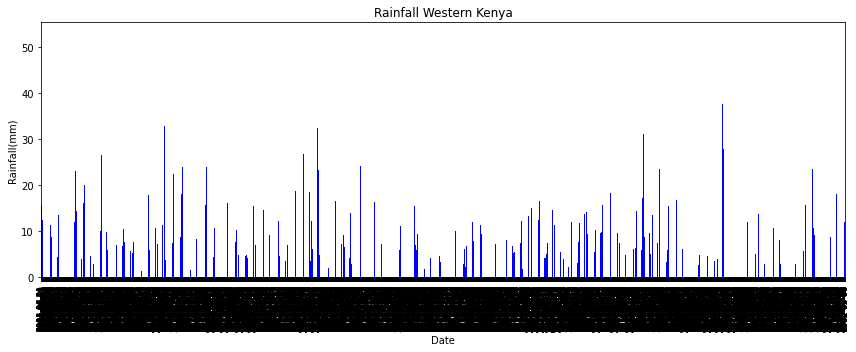

In [70]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Rainfall Western Kenya')
# ax2 = ax.twinx()
rainfall_data.plot(x='Date', y='Rainfall(mm)', kind='bar', ax=ax, color='blue')
ax.set_xticklabels(rainfall_data['Date'].dt.date, fontsize=8)
ax.get_legend().remove()
# ax2.plot(ax.get_xticks(), flood_data['Total Affected'], color='black')
ax.set_ylabel('Rainfall(mm)')
# ax.set_yticks([0, 3000])
# ax2.set_ylabel('Total Affected')
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

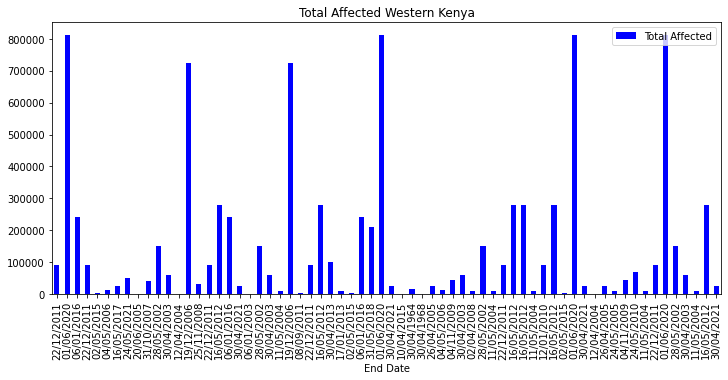

In [72]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Total Affected Western Kenya')
# ax2 = ax.twinx()
flood_data.plot(x='End Date', y='Total Affected', kind='bar', ax=ax, color='blue')
ax.set_xticklabels(flood_data['End Date'].dt.date, fontsize=8)
ax.get_legend().remove()
# ax2.plot(ax.get_xticks(), flood_data['Total Affected'], color='black')
ax.set_ylabel('Total Affected')
# ax.set_yticks([0, 3000])
# ax2.set_ylabel('Total Affected')
plt.tight_layout()
plt.show()

In [73]:
# slice rainfall data according date range in flood data
# pick a point in the coordinates to plot

In [75]:
start_date = "2011-12-20"
end_date = "2021-5-1"

after_start_date = rainfall_data["Date"] >= start_date
before_end_date = rainfall_data["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates_rainfall = rainfall_data.loc[between_two_dates]
filtered_dates_rainfall.head()

Date  Rainfall(mm)  longitude  latitude
17 2018-06-02     12.453967  34.867031  0.560573
18 2018-06-02      2.978756  34.130239 -0.156918
19 2018-06-02      8.849317  34.591660  0.455657
20 2018-06-02      0.000000  34.357426 -0.495278
21 2018-06-02      5.554148  34.733406 -0.453487

In [78]:
longit = coords["longitude"]

In [91]:
for i in longit:
    float(i)
longit = [float(i) for i in longit]

In [93]:
bool_series = filtered_dates_rainfall.longitude.isin(longit)
bool_series

17      True
18      True
19      True
20      True
21      True
        ... 
7918    True
7919    True
7920    True
7921    True
7936    True
Name: longitude, Length: 3566, dtype: bool

In [94]:
filtered_df = filtered_dates_rainfall[bool_series]

In [101]:
filtered_df["Flood"] = 0

In [102]:
filtered_df.head()

Date  Rainfall(mm)  longitude  latitude  Flood
17 2018-06-02     12.453967  34.867031  0.560573      0
18 2018-06-02      2.978756  34.130239 -0.156918      0
19 2018-06-02      8.849317  34.591660  0.455657      0
20 2018-06-02      0.000000  34.357426 -0.495278      0
21 2018-06-02      5.554148  34.733406 -0.453487      0

In [125]:
filtered_df["Date"].max()

Timestamp('2021-04-21 00:00:00')

In [135]:
new_rdata = pd.read_excel("filtered2.xlsx")
new_rdata.drop(columns=["Flood"], inplace=True)
new_rdata.head()

Date  Rainfall(mm)  longitude  latitude   Location
0 2018-06-02     12.453967  34.867031  0.560573     Nyando
1 2018-06-02      2.978756  34.130239 -0.156918      Bondo
2 2018-06-02      8.849317  34.591660  0.455657    Kanduyi
3 2018-06-02      0.000000  34.357426 -0.495278  Suna West
4 2018-06-02      5.554148  34.733406 -0.453487        NaN

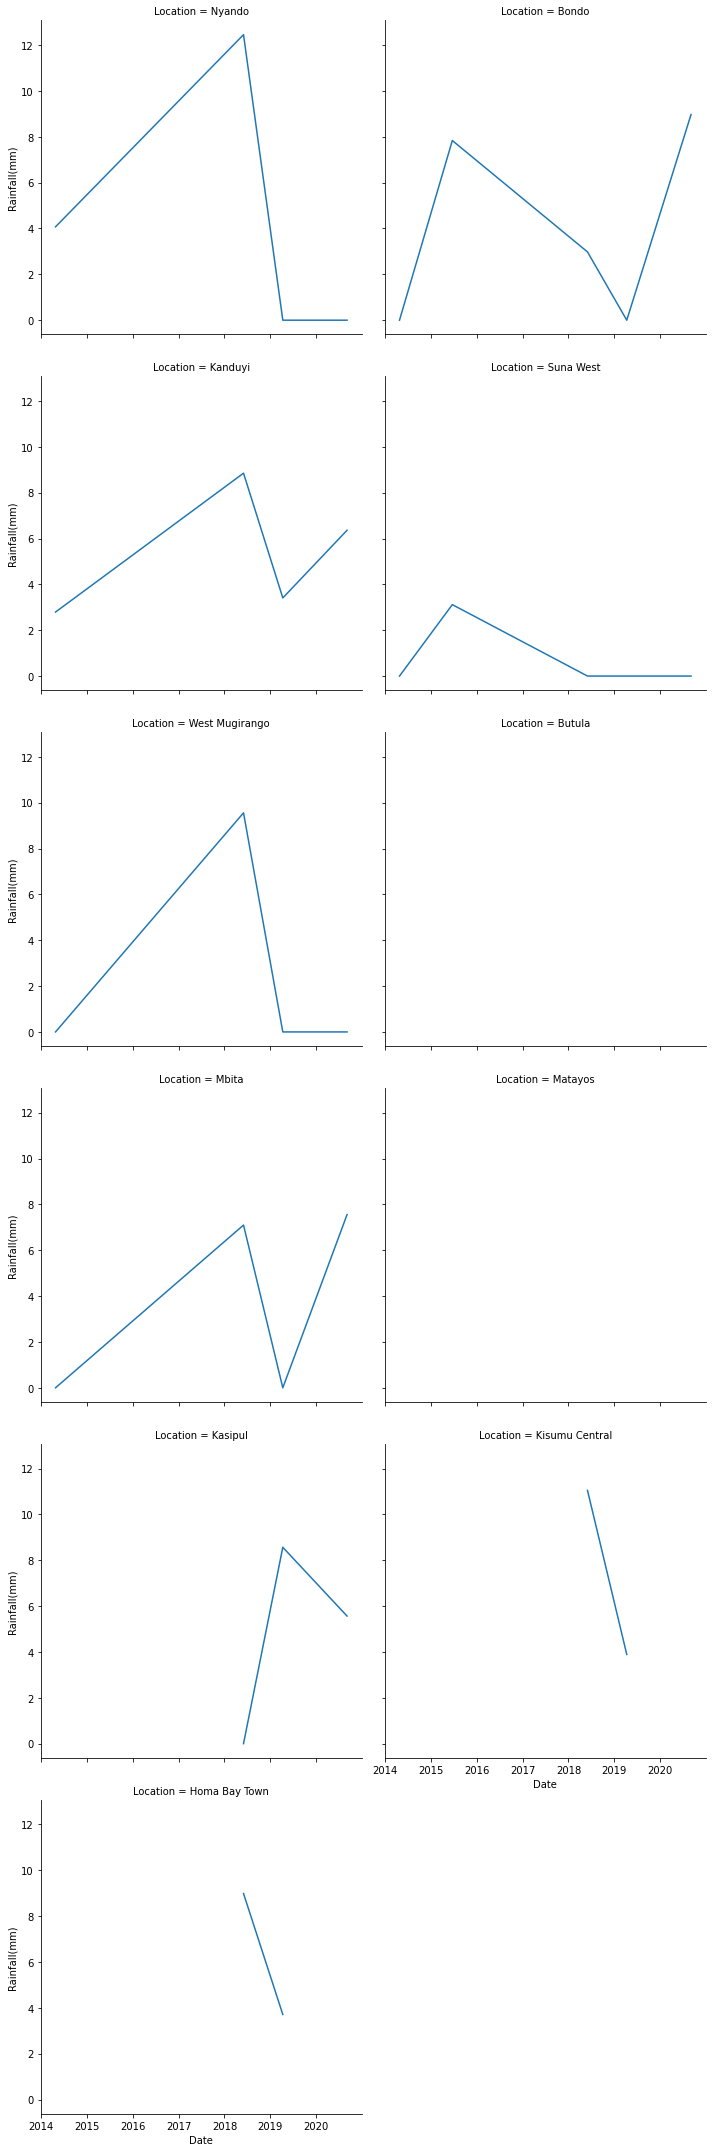

In [136]:
sns.relplot(data=new_rdata, x='Date', y='Rainfall(mm)', col='Location', col_wrap=2, kind='line')

In [137]:
flood_data.to_csv("flood_data.csv")